In [1]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

for k in range(5,10):
    
    tf.reset_default_graph()
    
    print('---------' + str(k) + '------------')
    
    MAX_EPISODE = 2000
    MAX_EPISODE_LEN = 200

    NUM_T = 1
    NUM_R = 4
    SIGMA2 = 1e-9

    t_factor = 0.8
    epsilon = 1.0

    config = {'state_dim':3, 'action_dim':2};
    train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                    'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                    'random_seed':int(time.clock()*1000%1000), 'epsilon':epsilon, 'sigma2':SIGMA2}
    
    IS_TRAIN = False
#     rate = 3.0
    res_path = 't_M_08_nB_dqn/'
    model_path = 'model_M_08_nB_dqn/my_train_model_'+str(k)+'-2000'
    meta_path = model_path+'.meta'
    init_path = ''
    init_seqCnt = 40
    
    user_config = [{'id':'1', 'model':'AR', 'num_r':NUM_R, 'rate':1.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'2', 'model':'AR', 'num_r':NUM_R, 'rate':2.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'3', 'model':'AR', 'num_r':NUM_R, 'rate':3.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5}]
    
    if not os.path.exists(res_path):
        os.mkdir(res_path) 
    
    print(user_config)
    # 0. initialize the session object
    sess = tf.Session() 

    # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
    # sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 

    # 1. include all user in the system according to the user_config
    user_list = [];
    for info in user_config:
        info.update(config)
        info['init_path'] = init_path
        info['init_seqCnt'] = init_seqCnt
        user_list.append(MecTermDQN(sess, info, train_config))
        print('Initialization OK!----> user ' + info['id'])

    # 2. create the simulation env
    env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)

    sess.run(tf.global_variables_initializer())
    
    tflearn.config.is_training(is_training=IS_TRAIN, session=sess)

    env.init_target_network()

    res_r = []
    res_p = []
    res_b = []
    res_o = []
    res_d = []
    # 3. start to explore for each episode
    for i in range(MAX_EPISODE):

        cur_init_ds_ep = env.reset()

        cur_r_ep = np.zeros(len(user_list))
        cur_p_ep = np.zeros(len(user_list))
        cur_op_ep = np.zeros(len(user_list))
        cur_ts_ep = np.zeros(len(user_list))
        cur_ps_ep = np.zeros(len(user_list))
        cur_rs_ep = np.zeros(len(user_list))
        cur_ds_ep = np.zeros(len(user_list))
        cur_ch_ep = np.zeros(len(user_list))
        cur_of_ep = np.zeros(len(user_list))

        for j in range(MAX_EPISODE_LEN):

            # first try to transmit from current state
            [cur_r, done, cur_p, cur_op, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()

            cur_r_ep += cur_r
            cur_p_ep += cur_p
            cur_op_ep += cur_op
            cur_ts_ep += cur_ts
            cur_ps_ep += cur_ps
            cur_rs_ep += cur_rs
            cur_ds_ep += cur_ds
            cur_ch_ep += cur_ch
            cur_of_ep += cur_of


            if done:
                res_r.append(cur_r_ep/MAX_EPISODE_LEN)
                res_p.append(cur_p_ep/MAX_EPISODE_LEN)
                res_b.append(cur_ds_ep/MAX_EPISODE_LEN)
                res_o.append(cur_of_ep/MAX_EPISODE_LEN)
                res_d.append(cur_ds)
                print('%d:r:%s,p:%s,op:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s,rbuf:%s' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_op_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep, cur_ds))

    name = res_path+'test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
    np.savez(name, res_r, res_p, res_b, res_o, res_d)
    
    tflearn.config.is_training(is_training=False, session=sess)
    #Create a saver object which will save all the variables
    saver = tf.train.Saver() 
    saver.save(sess, model_path)

    sess.close()

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
---------5------------
[{'id': '1', 'model': 'AR', 'num_r': 4, 'rate': 1.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.8, 'penalty': 1000, 'action_level': 5}, {'id': '2', 'model': 'AR', 'num_r': 4, 'rate': 2.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.8, 'penalty': 1000, 'action_level': 5}, {'id': '3', 'model': 'AR', 'num_r': 4, 'rate': 3.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.8, 'penalty': 1000, 'action_level': 5}]
Initialization OK!----> user 1
Initialization OK!----> user 2
Initialization OK!----> user 3
0:r:[-15.39699581 -16.91559572 -24.47247746],p:[1.00940394 1.65098324 2.1625    ],op:[0.88809606 0.30901676 0.        ],tr:[1.21294366 1.05158098 1.0915772 ],pr:[1.64222861 1.61941534 1.80640939],rev:[0.93  2.055 2.97 ],dbuf:[ 1.08497905  6.17797859 35.86238731],ch:[4.58912266 3.02005968 3.18343053],ibuf:

21:r:[-17.45835649 -17.59879814 -23.45660237],p:[1.30897191 1.49894976 2.1       ],op:[0.79352809 0.57855024 0.        ],tr:[1.401573   1.4715778  1.22453274],pr:[1.68889988 1.76573875 1.72967143],rev:[1.02  2.015 2.96 ],dbuf:[ 3.19178244  4.89399072 33.28301184],ch:[4.52255582 4.41023371 3.75626998],ibuf:[39.0, 29.0, 22.0],rbuf:[ 1.         15.47675211 23.15916519]
22:r:[-16.38917463 -17.44231979 -24.5093837 ],p:[1.22584125 1.65425284 1.93      ],op:[0.78165875 0.34074716 0.        ],tr:[1.16896281 1.32256486 1.19613788],pr:[1.68660512 1.62925217 1.62736868],rev:[1.035 1.97  2.87 ],dbuf:[ 1.64587317  7.41159897 45.3469185 ],ch:[3.72063636 3.86417916 3.57806659],ibuf:[20.0, 47.5, 33.5],rbuf:[ 0.          5.50984868 42.7986892 ]
23:r:[-15.95320527 -16.76183805 -26.37692971],p:[1.21565521 1.47770706 1.9925    ],op:[0.69184479 0.53979294 0.        ],tr:[1.14857355 1.26571697 1.0890414 ],pr:[1.5891366  1.58751247 1.67528217],rev:[1.055 1.99  2.985],dbuf:[ 3.46602636  3.10919023 52.18464856

44:r:[-13.136545   -17.21784709 -22.70155866],p:[1.01809057 1.46190231 1.71892528],op:[0.58440943 0.11309769 0.02607472],tr:[0.96496882 1.00063961 0.95027056],pr:[1.29823501 1.40858625 1.47037187],rev:[1.03  2.165 2.88 ],dbuf:[ 1.58272499 23.08923546 43.70779329],ch:[3.61696787 4.4080173  3.22904723],ibuf:[3.0, 42.5, 8.5],rbuf:[  6.          25.51631674 105.98958778]
45:r:[-14.22395829 -15.67604362 -22.5825124 ],p:[1.0110393  1.34586602 1.6925    ],op:[0.7239607  0.20413398 0.        ],tr:[1.16221242 1.06613336 1.17762775],pr:[1.48872785 1.39307062 1.48583609],rev:[0.97 1.86 2.96],dbuf:[ 1.71979145 16.38021811 45.212562  ],ch:[4.58432398 4.97184779 4.37192993],ibuf:[21.0, 41.0, 5.5],rbuf:[ 1.          2.35328697 64.80723064]
46:r:[-14.33035382 -14.46186709 -22.32527098],p:[1.1191411  1.41038197 1.7125    ],op:[0.5333589  0.24711803 0.        ],tr:[1.10874167 1.00508122 1.11035634],pr:[1.29753371 1.35232011 1.47238317],rev:[0.99  1.94  2.835],dbuf:[ 5.5517691   6.00933546 43.1263549 ],c

67:r:[-12.36545347 -15.99764991 -26.6388684 ],p:[1.03105328 1.49432614 1.54482548],op:[0.46644672 0.08317386 0.00267452],tr:[0.75613561 0.82232366 0.88047428],pr:[1.22124296 1.40759349 1.49140559],rev:[1.015 1.92  3.18 ],dbuf:[ 1.92726736 16.88824954 71.29434202],ch:[3.0633051  3.23818625 3.7971987 ],ibuf:[9.0, 37.0, 2.5],rbuf:[  1.4801579    9.17405521 164.48901794]
68:r:[-13.50133562 -14.08609931 -29.878429  ],p:[1.0795157  1.34231441 1.6225    ],op:[0.5054843  0.05018559 0.        ],tr:[1.00629326 0.91308884 0.92204117],pr:[1.32395804 1.26347465 1.40607471],rev:[1.005 2.07  2.935],dbuf:[ 4.1066781  14.73049656 84.49214502],ch:[4.18054492 4.21135835 3.84716016],ibuf:[48.5, 4.0, 36.5],rbuf:[  3.           3.30481785 157.8768248 ]
69:r:[-12.15856555 -13.88529148 -31.04585024],p:[1.01572214 1.28423396 1.585     ],op:[0.43177786 0.28076604 0.        ],tr:[1.00691351 0.83265423 1.07983795],pr:[1.16918934 1.48084006 1.40171476],rev:[1.105 1.87  3.015],dbuf:[ 2.89282776  6.82645738 91.82925

90:r:[-12.53732587 -14.05514488 -32.19203853],p:[0.88652184 1.34823157 1.6875    ],op:[0.64097816 0.09926843 0.        ],tr:[1.03932943 0.8189625  1.03230724],pr:[1.30177308 1.44253776 1.49180354],rev:[0.945 1.92  2.96 ],dbuf:[ 1.58662933 12.37572438 93.46019265],ch:[4.68201566 3.32617962 3.53040787],ibuf:[11.5, 40.5, 46.0],rbuf:[  0.           0.84399166 133.17784459]
91:r:[-11.26000889 -11.90597617 -25.33938689],p:[0.82568644 1.16693877 1.845     ],op:[0.51931356 0.20306123 0.        ],tr:[0.8940681  0.803128   1.38315823],pr:[1.38107678 1.51408199 1.63851826],rev:[1.05  1.925 3.115],dbuf:[ 2.50004444  4.72988087 52.89693445],ch:[4.50070526 3.87731026 4.7640183 ],ibuf:[23.0, 10.0, 32.5],rbuf:[ 5.          5.4801579  51.16470212]
92:r:[-11.27866314 -12.3580434  -31.50378082],p:[0.85898223 1.18812322 1.815     ],op:[0.50851777 0.24437678 0.        ],tr:[0.95471665 0.87689573 1.15826438],pr:[1.1609971  1.57151678 1.41124519],rev:[1.025 1.955 2.915],dbuf:[ 1.69331569  4.49021699 84.91890

113:r:[-12.04199046 -12.9225141  -21.91395352],p:[0.94285237 1.20433649 1.5825    ],op:[0.43714763 0.03566351 0.        ],tr:[1.02406673 0.60039374 1.0873577 ],pr:[1.22766837 1.39211853 1.60414998],rev:[1.015 1.97  2.8  ],dbuf:[ 5.00995231 15.01257051 46.2697676 ],ch:[5.30957971 2.85982195 4.31927426],ibuf:[44.0, 8.0, 29.0],rbuf:[ 3.         10.72726957 50.69846294]
114:r:[-10.79003121 -12.20509088 -21.71018867],p:[0.82445313 1.14755788 1.66562531],op:[0.48054687 0.10744212 0.00687469],tr:[0.7628421  0.63589561 1.08657141],pr:[1.16807931 1.48882741 1.54800555],rev:[0.985 1.835 2.915],dbuf:[ 1.75015603 10.8254544  41.65094337],ch:[4.13905603 3.80660479 3.70863178],ibuf:[1.0, 24.5, 0.0],rbuf:[ 5.          3.41259895 61.05317055]
115:r:[-10.25807766 -13.39852967 -34.75496168],p:[0.78362431 1.3236634  1.705     ],op:[0.38137569 0.1513366  0.        ],tr:[0.74193033 0.85369469 1.03561542],pr:[1.14923027 1.56344512 1.50963544],rev:[0.86  2.075 3.09 ],dbuf:[  4.6903883    7.99264833 105.57480

136:r:[ -9.46060567 -11.85569967 -22.82288857],p:[0.79049353 1.1816773  1.675     ],op:[0.31700647 0.1508227  0.        ],tr:[0.64351043 0.82345473 1.06123638],pr:[1.11337977 1.45604318 1.61493344],rev:[0.985 2.05  2.925],dbuf:[ 3.00302835  5.97849837 47.11444285],ch:[3.72523343 4.01281009 3.28609588],ibuf:[24.0, 0.0, 27.5],rbuf:[ 1.41259895  5.         77.26603672]
137:r:[ -9.88614037 -12.15550413 -26.46544414],p:[0.83943553 1.18566123 1.915     ],op:[0.30306447 0.13683877 0.        ],tr:[0.68577505 0.85010984 1.15778472],pr:[1.24858042 1.41546713 1.5542725 ],rev:[1.07 2.04 2.95],dbuf:[ 3.73070183  7.87752066 55.72722071],ch:[4.52195454 3.75149156 3.4226498 ],ibuf:[43.5, 0.0, 20.0],rbuf:[ 1.          9.20871785 67.58855558]
138:r:[-10.06139387 -13.27732104 -28.19960019],p:[0.83169383 1.23396784 1.5825    ],op:[0.34830617 0.09353216 0.        ],tr:[0.5760594  0.81994405 1.03679532],pr:[1.23270641 1.41155186 1.41987769],rev:[0.93  1.915 3.04 ],dbuf:[ 3.10696935 13.2866052  77.69800093],

159:r:[ -9.67655085 -12.88569782 -29.48602824],p:[0.77345548 1.17372345 1.9275    ],op:[0.34404452 0.07127655 0.        ],tr:[0.79574097 0.82303894 1.33563518],pr:[1.2133878  1.40681001 1.64337264],rev:[1.07  1.915 3.24 ],dbuf:[ 3.68275425 14.62848908 70.3301412 ],ch:[5.16947642 4.90933852 4.93110499],ibuf:[21.0, 40.5, 46.5],rbuf:[ 4.          2.         98.69843598]
160:r:[ -9.4988452  -10.31514554 -30.51585284],p:[0.75020038 1.06070542 1.95      ],op:[0.38729962 0.07179458 0.        ],tr:[0.74816553 0.66383142 1.32876954],pr:[1.1015286  1.46030606 1.78361858],rev:[1.035 1.955 3.415],dbuf:[ 1.99422601  6.27572768 74.57926419],ch:[4.00469774 4.06682468 3.99761663],ibuf:[5.0, 12.5, 49.0],rbuf:[  0.           5.56771263 109.52237458]
161:r:[ -9.81868426 -10.26151764 -32.28867364],p:[0.79974911 1.04948682 1.765     ],op:[0.33275089 0.06051318 0.        ],tr:[0.82433397 0.81461058 1.11839388],pr:[1.13028886 1.31768471 1.65007218],rev:[0.985 2.045 3.205],dbuf:[ 3.79342132  6.90758822 90.843

182:r:[ -7.69639078 -11.50308873 -25.65005754],p:[0.62835132 1.12420169 1.8       ],op:[0.25664868 0.04829831 0.        ],tr:[0.56744753 0.66842087 1.06202919],pr:[0.96516759 1.42562752 1.72304016],rev:[1.01 2.   3.1 ],dbuf:[ 3.08195391 10.61544366 56.25028768],ch:[4.54891269 3.64300095 3.62244527],ibuf:[19.0, 16.0, 35.0],rbuf:[ 4.50081365 15.42052965 97.98613078]
183:r:[ -9.66994366 -11.61569927 -18.10743638],p:[0.76680506 1.15021982 1.6200023 ],op:[0.30069494 0.06978018 0.0199977 ],tr:[0.86596279 0.69418363 1.2886644 ],pr:[0.9427744  1.53374846 1.60014674],rev:[0.96  2.015 2.91 ],dbuf:[ 5.64971828  9.27849634 24.9371819 ],ch:[4.77866089 3.67139237 3.93844106],ibuf:[48.5, 21.0, 15.0],rbuf:[ 3.          4.82454019 31.88587893]
184:r:[ -8.37878451 -11.42939452 -21.34459957],p:[0.69575035 1.08674313 1.7175    ],op:[0.24424965 0.03075687 0.        ],tr:[0.54993902 0.70589057 1.13112965],pr:[0.99271827 1.26521903 1.6906703 ],rev:[0.995 1.945 2.825],dbuf:[ 4.29392253 12.44697259 38.02299783

205:r:[ -7.52432082 -10.80007621 -23.43784848],p:[0.67108062 1.07370281 1.68      ],op:[0.17641938 0.11129719 0.        ],tr:[0.47551438 0.95574465 1.18980617],pr:[1.04528458 1.30366298 1.60412676],rev:[1.06  1.955 2.99 ],dbuf:[ 3.72160412  6.60038103 49.98924239],ch:[3.50096821 5.84663232 3.69128471],ibuf:[25.0, 27.0, 29.5],rbuf:[ 2.          7.41259895 68.71341233]
206:r:[ -8.72661169 -12.99648437 -34.22066008],p:[0.74042435 1.247101   1.7175    ],op:[0.26957565 0.010399   0.        ],tr:[0.73966197 0.65292314 0.84827686],pr:[1.03655499 1.52183645 1.70047115],rev:[0.95  2.085 3.105],dbuf:[  3.23305846  14.68242184 102.40330039],ch:[4.9347376  3.85419379 3.46079762],ibuf:[42.5, 26.0, 44.0],rbuf:[  0.          11.38950227 155.25039654]
207:r:[ -7.17443014 -10.85491554 -30.43074497],p:[0.56895181 1.07842906 1.7025    ],op:[0.27354819 0.03657094 0.        ],tr:[0.68894796 0.93392867 0.75592778],pr:[0.90592281 1.13341961 1.85197417],rev:[0.915 1.895 3.26 ],dbuf:[ 2.17215069  9.67457769 84

228:r:[ -6.78116518  -9.82656922 -20.19601516],p:[0.59368371 1.01336482 1.71074965],op:[0.20131629 0.00413518 0.01175035],tr:[0.52844063 0.64470071 1.1159174 ],pr:[0.92163283 1.34559353 1.70830529],rev:[1.005 1.98  3.03 ],dbuf:[ 2.10582588  8.43284608 32.08007581],ch:[4.38506669 5.30673719 3.29838904],ibuf:[0.0, 11.5, 2.0],rbuf:[ 0.62198434 10.15679311 45.76835782]
229:r:[ -8.02792644 -10.21520519 -20.66494307],p:[0.71198456 0.97732529 1.7725    ],op:[0.21051544 0.03767471 0.        ],tr:[0.56037213 0.56034861 1.35954949],pr:[1.06114117 1.40265141 1.68676556],rev:[1.005 1.915 3.11 ],dbuf:[ 3.23963222 10.47602596 32.42471534],ch:[4.30055688 4.45234473 4.09006012],ibuf:[25.5, 14.0, 36.0],rbuf:[ 2.         15.40187575 48.73699139]
230:r:[ -7.82467636 -13.21057397 -21.79668809],p:[0.65015597 1.24093461 1.63007813],op:[0.19484403 0.02656539 0.00992188],tr:[0.48069534 0.71549208 0.68151567],pr:[1.07057092 1.5418633  1.85032631],rev:[0.975 2.06  2.885],dbuf:[ 5.32338178 15.35286987 43.3834404

251:r:[ -7.09997127 -10.17935357 -28.74364965],p:[0.58437446 1.01312443 1.445     ],op:[0.21562554 0.06437557 0.        ],tr:[0.65427286 0.76271234 1.01554485],pr:[0.91979357 1.44657829 1.41005709],rev:[0.975 1.96  2.945],dbuf:[ 3.49985636  7.79676785 85.91824823],ch:[5.35259788 5.10285957 3.76181976],ibuf:[27.5, 41.0, 42.5],rbuf:[  2.           9.27353153 146.3796118 ]
252:r:[ -8.5537801  -11.47514113 -21.03239661],p:[0.79334514 1.08306456 1.8325    ],op:[0.10665486 0.02193544 0.        ],tr:[0.49302546 0.44746996 1.1964639 ],pr:[1.10846233 1.54372827 1.71701276],rev:[1.145 2.045 3.17 ],dbuf:[ 6.7689005  13.17570567 31.86198307],ch:[3.55931648 3.17444889 4.92444395],ibuf:[48.0, 3.0, 33.5],rbuf:[ 2.         17.61939528 84.80466773]
253:r:[ -7.71209971 -12.92350165 -21.83325929],p:[0.66865394 1.2375     1.615     ],op:[0.16384606 0.         0.        ],tr:[0.61417862 0.71253619 1.14594722],pr:[0.86677981 1.45551389 1.56232232],rev:[0.96  2.135 2.99 ],dbuf:[ 5.26049853 15.11750827 44.566

274:r:[ -6.49708071 -11.48899599 -19.21531571],p:[0.54220259 1.10335319 1.745     ],op:[0.18529741 0.08164681 0.        ],tr:[0.36137982 0.73391872 1.20188184],pr:[0.91445577 1.46120066 1.73783133],rev:[1.    1.98  3.085],dbuf:[ 3.38540354 10.04497997 26.27657857],ch:[3.04509043 3.81752959 3.97371888],ibuf:[1.0, 20.5, 9.5],rbuf:[ 4.41259895  2.         38.5573664 ]
275:r:[ -6.35672862  -9.80127374 -22.57187605],p:[0.55466823 1.00247958 1.57      ],op:[0.14033177 0.09002042 0.        ],tr:[0.33512587 0.93340279 1.20121672],pr:[0.93342427 1.20283526 1.52561096],rev:[0.83 1.92 3.02],dbuf:[ 3.98364309  5.30636872 50.05938023],ch:[2.85478387 4.89036682 4.02816091],ibuf:[32.0, 8.0, 4.5],rbuf:[ 1.41259895  1.         63.13446272]
276:r:[ -6.62949111 -13.18688586 -31.11883359],p:[0.56372331 1.21       1.56      ],op:[0.17127669 0.         0.        ],tr:[0.48277629 0.7743781  1.21501702],pr:[0.99486203 1.38306592 1.19660421],rev:[1.01  2.005 2.975],dbuf:[ 3.74745555 17.5344293  93.19416794],ch

297:r:[ -6.15730256 -11.32445074 -21.50587075],p:[0.56697401 1.09700838 1.6475    ],op:[0.08302599 0.01549162 0.        ],tr:[0.508475   0.88052724 1.01950581],pr:[0.68497562 1.32909206 1.71557525],rev:[0.915 2.145 2.965],dbuf:[ 4.78651282 12.12225369 41.62935377],ch:[3.71868464 4.57350547 3.72939206],ibuf:[28.0, 27.0, 45.5],rbuf:[ 3.88348808 16.79969207 91.48378893]
298:r:[ -8.15865117 -10.20754157 -36.02111462],p:[0.69812099 0.9475     1.4825    ],op:[0.14937901 0.         0.        ],tr:[0.51306155 0.71406458 0.90797431],pr:[1.0582386  1.30800662 1.51129631],rev:[1.025 2.045 3.135],dbuf:[  6.89325586  13.13770787 120.80557311],ch:[4.06988006 4.07104645 3.64839744],ibuf:[48.5, 13.5, 32.0],rbuf:[  3.          18.11478207 175.14587647]
299:r:[ -7.11183141 -17.02411882 -24.80918992],p:[0.62478009 1.26750015 2.0175    ],op:[0.17521991 0.00499985 0.        ],tr:[0.55656485 0.63863964 1.42917468],pr:[0.89797171 1.63472463 1.70429877],rev:[0.905 2.1   3.11 ],dbuf:[ 3.55915706 34.22059408 43

320:r:[ -6.85683658 -12.74708624 -31.78443081],p:[0.65583331 1.14481283 1.7075    ],op:[0.07166669 0.02518717 0.        ],tr:[0.51452846 0.77437431 1.05315617],pr:[0.77834419 1.44007648 1.67405643],rev:[1.    2.15  3.165],dbuf:[ 5.18418289 16.93543121 90.62215407],ch:[3.76913656 3.86917632 3.84420975],ibuf:[33.5, 12.5, 38.5],rbuf:[  5.           9.3503086  126.05748072]
321:r:[ -7.98296232 -11.68675522 -30.68301591],p:[0.69413614 1.15981966 1.535     ],op:[0.10336386 0.01268034 0.        ],tr:[0.48138446 0.61423546 0.9289389 ],pr:[0.92806296 1.54122885 1.21335547],rev:[0.995 1.995 2.855],dbuf:[ 8.01481159 11.53377609 92.01507953],ch:[3.69440057 3.58033306 3.39231927],ibuf:[48.5, 35.0, 34.0],rbuf:[  1.77356626   5.97072244 176.54112599]
322:r:[ -5.69086251  -9.85809223 -35.89482603],p:[0.50396337 0.96890154 1.4775    ],op:[0.14353663 0.01109846 0.        ],tr:[0.34813588 0.58428004 0.69800678],pr:[0.90049486 1.38587228 1.69528073],rev:[0.99  1.905 3.23 ],dbuf:[  2.55431255  10.09046114 

343:r:[ -5.741923    -9.3158031  -19.93289868],p:[0.53199641 0.90460938 1.6       ],op:[0.11800359 0.01789063 0.        ],tr:[0.38636421 0.7169852  1.29542904],pr:[0.98090692 1.28540985 1.51337177],rev:[1.075 2.025 2.96 ],dbuf:[ 2.70961499  9.6790155  35.66449338],ch:[5.09435559 4.22144865 3.59122406],ibuf:[13.5, 1.5, 23.5],rbuf:[ 5.88819264 14.18898514 53.73983784]
344:r:[ -7.31160178 -13.45159728 -38.41596807],p:[0.65717673 1.1175     1.615     ],op:[0.09532327 0.         0.        ],tr:[0.48351584 0.63607189 0.90210302],pr:[0.92027362 1.52969267 1.42365024],rev:[1.015 2.025 3.045],dbuf:[  6.45800892  22.55798642 127.47984036],ch:[3.92886352 3.75672708 5.10495669],ibuf:[44.0, 46.5, 49.0],rbuf:[  1.          18.34708864 192.84934856]
345:r:[ -5.94173957 -11.50016796 -19.61388184],p:[0.52403986 1.07383174 1.52      ],op:[0.10596014 0.01366826 0.        ],tr:[0.4650402  0.99473556 1.12378422],pr:[0.88481167 1.13760393 1.69326474],rev:[1.01  2.015 3.13 ],dbuf:[ 4.50869787 14.00083979 37.

366:r:[ -5.86061371 -12.44939527 -22.23049429],p:[0.50650853 1.135      1.5925    ],op:[0.13099147 0.         0.        ],tr:[0.44077477 0.52420191 0.90514733],pr:[0.85516064 1.55559746 1.57816393],rev:[0.86  2.18  2.825],dbuf:[ 3.80306855 16.84697636 47.45247144],ch:[4.24054328 4.01816953 2.9267744 ],ibuf:[35.0, 3.0, 28.5],rbuf:[ 3.84010955 23.04012767 96.8377467 ]
367:r:[ -6.59636023 -12.09548451 -22.97556233],p:[0.58840042 1.13787648 1.85865286],op:[0.08159958 0.00962352 0.01134714],tr:[0.3588166  0.55296609 1.41256365],pr:[0.98220889 1.65776086 1.67091007],rev:[0.97 2.13 2.89],dbuf:[ 6.18180113 14.57742257 40.07781164],ch:[3.60214838 3.81368164 4.4255315 ],ibuf:[48.0, 20.5, 49.0],rbuf:[ 7.06299474  7.06299474 16.86740353]
368:r:[ -6.04055883 -11.80317533 -23.63142295],p:[0.54621441 1.12       1.72      ],op:[0.11378559 0.         0.        ],tr:[0.43113933 0.7822922  1.18073854],pr:[0.85329899 1.34311985 1.44376948],rev:[1.055 2.115 2.985],dbuf:[ 3.80279413 14.21587664 49.35711474]

389:r:[ -8.09215937 -17.98252103 -36.15542765],p:[0.757251 1.295    1.3175  ],op:[0.082749 0.       0.      ],tr:[0.59332076 0.80896799 0.46426271],pr:[0.83206144 1.36215251 1.58824417],rev:[1.055 2.055 3.12 ],dbuf:[  6.86079686  38.11260515 128.07713823],ch:[3.77052095 3.25369043 3.14254136],ibuf:[46.5, 44.0, 10.5],rbuf:[  0.          20.77590066 223.99862386]
390:r:[ -6.36396501 -11.22023107 -28.14271037],p:[0.54420641 1.01       1.85      ],op:[0.07329359 0.         0.        ],tr:[0.23361418 0.49206685 1.08624125],pr:[1.09406809 1.5384035  1.86883828],rev:[0.98  2.07  3.135],dbuf:[ 7.11982504 15.70115537 66.71355184],ch:[3.55682933 3.44480714 3.26604611],ibuf:[45.0, 4.0, 37.0],rbuf:[ 3.72132344 11.90593089 72.98409402]
391:r:[ -7.05776407 -12.62517987 -27.55269286],p:[0.61755975 1.1775     1.8875    ],op:[0.05994025 0.         0.        ],tr:[0.40733613 0.68045117 1.2581261 ],pr:[0.88649995 1.50983096 1.57804184],rev:[1.085 2.175 2.81 ],dbuf:[ 8.18882033 16.02589935 62.2634643 ],ch

412:r:[ -5.85238051 -14.76667594 -26.44800087],p:[0.54515039 1.31       1.8775    ],op:[0.08484961 0.0075     0.        ],tr:[0.56423261 0.9810125  1.20560399],pr:[0.74937207 1.29025708 1.64087019],rev:[1.045 2.16  2.99 ],dbuf:[ 4.06190257 21.1333797  57.14000437],ch:[3.80009512 3.64913533 3.75869186],ibuf:[16.0, 35.0, 7.0],rbuf:[ 0.         15.66353735 35.70516515]
413:r:[ -5.12264643 -10.29478208 -18.87370742],p:[0.47817061 1.005      1.33      ],op:[0.06182939 0.005      0.        ],tr:[0.29997073 0.73347076 0.90176378],pr:[0.90869403 1.34009196 1.71469922],rev:[1.055 2.105 2.92 ],dbuf:[ 4.01323215 11.07391041 41.1685371 ],ch:[4.44898176 4.29596978 4.02129505],ibuf:[12.0, 5.5, 20.5],rbuf:[ 4.63278675 18.70578105 81.20739868]
414:r:[ -5.707342   -10.84935923 -25.36186884],p:[0.51553799 1.045      1.7575    ],op:[0.11696201 0.         0.        ],tr:[0.37010811 0.61085567 0.83108618],pr:[0.81293257 1.35697647 1.8628791 ],rev:[1.   1.98 2.92],dbuf:[ 3.23670998 12.44679613 56.50934418],

435:r:[ -6.47894721 -10.23917938 -29.865822  ],p:[0.62146082 0.92120895 1.525     ],op:[0.09353918 0.01379105 0.        ],tr:[0.46800714 0.55087532 1.03042862],pr:[0.79303791 1.35341576 1.69666311],rev:[0.945 1.94  3.105],dbuf:[ 3.79473604 13.79589691 88.32911001],ch:[3.76414485 3.56190543 4.29742158],ibuf:[26.0, 7.0, 37.5],rbuf:[  1.8251979   17.75761812 113.08165249]
436:r:[ -6.14473948  -9.69680256 -23.02970004],p:[0.55991458 0.89603381 1.545     ],op:[0.08258542 0.01896619 0.        ],tr:[0.43038786 0.77367809 1.2681863 ],pr:[0.86729141 1.13034252 1.67309415],rev:[1.03  1.975 3.25 ],dbuf:[ 5.0236974  11.88401281 53.34850021],ch:[3.6433582  3.96191212 3.9895614 ],ibuf:[33.5, 0.0, 34.0],rbuf:[ 2.06748582 21.51347231 95.74391093]
437:r:[ -5.32237666 -11.44655016 -22.53973281],p:[0.47930898 1.1        1.48554307],op:[0.12069102 0.         0.01695693],tr:[0.48343607 0.7840625  1.40455836],pr:[0.90484322 1.08482577 1.25259051],rev:[1.03  1.94  2.985],dbuf:[ 2.61188329 13.23275081 52.5986

458:r:[ -5.44313654 -10.30269059 -18.92349321],p:[0.4926471  0.92486054 1.20782138],op:[0.0573529  0.01763946 0.01967862],tr:[0.34477141 0.68232359 0.90766059],pr:[0.842278   1.45971257 1.6062843 ],rev:[1.    2.125 2.855],dbuf:[ 5.21568269 13.81345297 45.51746603],ch:[3.44567685 4.85345694 3.49814111],ibuf:[19.5, 20.0, 3.0],rbuf:[ 2.         25.1663322  80.48132808]
459:r:[ -5.59090436  -9.33190775 -15.30702335],p:[0.48065921 0.9215752  1.36538621],op:[0.10184079 0.0059248  0.03461379],tr:[0.25624092 0.51965701 1.20593573],pr:[1.04408799 1.28002174 1.65803232],rev:[0.98  1.8   2.945],dbuf:[ 4.65452178  9.55953877 20.53511675],ch:[3.76834542 3.93410093 4.36214189],ibuf:[33.0, 6.0, 29.0],rbuf:[ 2.          7.53922532 61.66838152]
460:r:[ -6.70561187  -9.74705331 -26.34109025],p:[0.58243715 0.92462722 1.795     ],op:[0.12756285 0.01537278 0.        ],tr:[0.39829622 0.91175987 0.94486861],pr:[0.92950102 1.12287619 1.93573935],rev:[0.97 2.   2.99],dbuf:[ 5.12805933 11.13526655 59.90545124],

481:r:[ -4.60445173 -14.47750345 -18.98286754],p:[0.40492568 1.1925     1.84492232],op:[9.25743192e-02 0.00000000e+00 7.76811082e-05],tr:[0.27029467 0.75763386 1.28961396],pr:[0.90981816 1.42538751 1.71368816],rev:[0.935 2.03  2.875],dbuf:[ 3.12225866 24.68751726 21.1143377 ],ch:[5.22456168 3.21568072 4.8835462 ],ibuf:[10.0, 43.0, 30.5],rbuf:[ 2.88879403 12.39572706  4.85619082]
482:r:[ -5.3624426  -12.21373067 -34.23627409],p:[0.48891091 1.1075     1.3675    ],op:[0.11858909 0.         0.        ],tr:[0.38875986 0.55309288 1.06726572],pr:[0.87893766 1.60757659 1.41748149],rev:[1.035 2.065 3.25 ],dbuf:[  2.51221298  16.76865334 116.48137046],ch:[3.22043037 4.06275361 4.26026262],ibuf:[4.0, 41.0, 49.0],rbuf:[  0.          21.86610586 202.05055759]
483:r:[ -5.89516774  -9.59791177 -22.46693096],p:[0.5589768  0.87801821 1.5375    ],op:[0.1110232  0.02198179 0.        ],tr:[0.27699785 0.66292514 1.08240354],pr:[1.04409628 1.24730305 1.58934972],rev:[1.165 1.79  3.135],dbuf:[ 2.67583868 11.

504:r:[ -5.78870894 -11.16009263 -35.90336938],p:[0.56254063 1.00529114 1.5025    ],op:[0.03245937 0.00220886 0.        ],tr:[0.36279053 0.30400514 0.58296042],pr:[0.84787103 1.69064707 1.81175391],rev:[0.995 2.05  3.05 ],dbuf:[  5.14354469  15.50046313 119.41684692],ch:[4.21808502 3.22091665 3.9286495 ],ibuf:[30.0, 15.5, 34.0],rbuf:[  0.          26.82089884 165.05713496]
505:r:[ -5.1478195  -10.20797485 -16.8635335 ],p:[0.46004    0.95063786 1.53      ],op:[0.07996    0.02686214 0.        ],tr:[0.46027722 0.52992091 1.12755187],pr:[0.79362334 1.47472518 1.60085443],rev:[0.915 1.84  2.795],dbuf:[ 4.13909749 11.93987426 23.11766751],ch:[4.68461515 4.17971776 3.71109822],ibuf:[28.5, 28.0, 16.5],rbuf:[ 1.11236523  3.24402125 29.81873937]
506:r:[ -6.34487406  -9.26922048 -29.97378692],p:[0.57152828 0.8632992  1.7575    ],op:[0.13847172 0.0367008  0.        ],tr:[0.46314257 0.49674319 1.20292323],pr:[0.9638095  1.48344752 1.66391533],rev:[1.09  1.905 3.125],dbuf:[ 3.32437028 10.34610241 79

527:r:[ -4.97616707 -11.08256866 -20.88551019],p:[0.45549638 0.99       1.575     ],op:[0.08450362 0.         0.        ],tr:[0.37455005 0.60976364 1.05250355],pr:[0.82265271 1.54062934 1.77123694],rev:[1.01  1.985 3.115],dbuf:[ 3.28083534 15.8128433  41.42755093],ch:[4.0518351  3.98800079 4.23440779],ibuf:[5.5, 47.0, 11.0],rbuf:[ 1.74056201 13.92140315 69.25190119]
528:r:[ -6.55159215 -10.8131468  -22.53082965],p:[0.65692806 0.99000273 2.03801545],op:[0.07057194 0.00499727 0.01198455],tr:[0.58041514 0.6148877  1.55423877],pr:[0.77325692 1.42768833 1.42330543],rev:[1.04  1.925 3.11 ],dbuf:[ 3.65796073 14.26573401 30.65414823],ch:[3.85746763 4.16244242 3.45145659],ibuf:[34.5, 34.5, 24.5],rbuf:[ 2.47851977 12.82138934 57.35852622]
529:r:[ -5.28062467 -10.81599775 -34.8141966 ],p:[0.47564812 0.94249268 1.375     ],op:[0.09935188 0.00250732 0.        ],tr:[0.53727227 0.55636802 1.03833802],pr:[0.74778916 1.34407674 1.31797327],rev:[1.005 1.835 2.94 ],dbuf:[  3.40312336  16.27998875 119.070

550:r:[ -4.58848766 -11.10095071 -24.58727753],p:[0.40238612 0.9475     1.7825    ],op:[0.08511388 0.         0.        ],tr:[0.3075097  0.79174396 1.06252221],pr:[0.85633596 1.27095592 1.84443896],rev:[1.045 2.135 2.86 ],dbuf:[ 3.44243829 17.60475355 51.63638763],ch:[4.06567831 4.17381609 3.3669368 ],ibuf:[3.0, 0.0, 39.0],rbuf:[ 4.77638527 14.46002343 29.60776684]
551:r:[ -5.37525504 -11.97851341 -20.558463  ],p:[0.48808174 1.075      1.7225    ],op:[0.07941826 0.         0.        ],tr:[0.29283218 0.68205421 1.10634366],pr:[1.02490876 1.24984476 1.82303426],rev:[1.035 2.03  3.005],dbuf:[ 4.17627522 16.89256703 33.89231502],ch:[4.41530106 3.36858468 4.14730797],ibuf:[29.5, 3.0, 24.5],rbuf:[ 0.78858599 22.62020681 39.62441696]
552:r:[ -4.9766143  -12.32973667 -17.36419266],p:[0.45748418 1.12103472 1.4925    ],op:[0.07501582 0.00146528 0.        ],tr:[0.3987293  0.49277231 1.15236637],pr:[0.88468752 1.63531411 1.65009375],rev:[1.045 1.975 2.92 ],dbuf:[ 3.58307149 16.74868334 27.12096328

573:r:[ -5.94274381  -8.64454534 -22.83796022],p:[0.49270914 0.80875354 1.83      ],op:[0.06729086 0.00874646 0.        ],tr:[0.24957192 0.41243119 1.17433278],pr:[0.96226862 1.50645522 1.85968361],rev:[1.035 1.92  3.015],dbuf:[ 7.31371903 10.52272668 40.98980108],ch:[4.18600073 3.97177295 4.73439644],ibuf:[20.5, 9.0, 41.5],rbuf:[ 1.73130239 11.69018194 37.69672217]
574:r:[ -6.34564406 -10.36042372 -21.7846444 ],p:[0.5785365 0.975     1.45     ],op:[0.0414635 0.        0.       ],tr:[0.3571134  0.52359866 1.28159097],pr:[0.93576824 1.50056852 1.22621248],rev:[1.04  2.065 2.99 ],dbuf:[ 6.92822032 12.80211861 50.923222  ],ch:[3.71809827 3.78685477 4.51829001],ibuf:[31.5, 10.5, 6.0],rbuf:[  1.08125247  18.66656457 102.43931035]
575:r:[ -5.26376889 -10.52056684 -22.91104166],p:[0.45449639 1.01064211 1.7025    ],op:[0.10050361 0.03435789 0.        ],tr:[0.44888612 0.4894267  1.03739735],pr:[0.78018346 1.63750937 1.79278526],rev:[0.98  2.005 2.895],dbuf:[ 4.11884446 10.80283422 46.45520831],

596:r:[ -5.62340918 -10.17055265 -22.89706689],p:[0.5101682  0.88907165 1.4075    ],op:[0.0823318  0.01592835 0.        ],tr:[0.2959259  0.84642001 1.04561139],pr:[1.03802097 1.20043625 1.44356147],rev:[0.995 1.975 3.045],dbuf:[ 4.41704591 14.65276323 58.18533447],ch:[4.87002473 5.00238008 4.70029806],ibuf:[35.0, 15.0, 11.0],rbuf:[  1.           3.         122.16542833]
597:r:[ -7.24069941 -10.06615567 -23.76586311],p:[0.61558172 0.955      2.0025    ],op:[0.18941828 0.         0.        ],tr:[0.67910422 0.41778145 0.7108435 ],pr:[1.0296506  1.56255898 2.13401385],rev:[0.925 1.965 3.105],dbuf:[ 4.00349706 12.13077834 38.72931554],ch:[3.89238272 3.22052103 2.5940813 ],ibuf:[43.0, 16.0, 10.5],rbuf:[ 1.         12.93191432 62.52852965]
598:r:[ -6.04229465 -12.65772821 -17.51840766],p:[0.54052958 1.07       1.68946018],op:[0.07197042 0.         0.01053982],tr:[0.36885426 0.69947223 1.08151467],pr:[0.95594741 1.39102391 1.87062605],rev:[0.97  2.115 3.07 ],dbuf:[ 5.71147325 20.48864103 19.59

619:r:[ -6.53024953  -8.87767364 -21.4403472 ],p:[0.55274402 0.8473672  1.9175    ],op:[0.08975598 0.0126328  0.        ],tr:[0.46703105 0.6533331  1.27377266],pr:[0.84444302 1.29089395 1.69165998],rev:[0.93  1.93  3.065],dbuf:[ 6.95124767  9.98836818 30.50173598],ch:[4.01097319 4.05404772 3.02448599],ibuf:[49.0, 11.0, 32.0],rbuf:[15.44075636 14.82634234 51.91347257]
620:r:[ -5.32159701 -10.46186455 -27.39965379],p:[0.48832946 1.03521097 1.765     ],op:[0.06167054 0.02978903 0.        ],tr:[0.32530092 0.84330512 1.44354255],pr:[0.91099236 1.16866025 1.39107427],rev:[0.995 2.06  3.38 ],dbuf:[ 4.60798505  9.70932274 66.39826896],ch:[5.03817454 3.95413492 3.55698088],ibuf:[27.0, 7.0, 10.5],rbuf:[ 10.79580063  25.39447163 119.57663505]
621:r:[ -6.00571645 -15.60715074 -37.53574424],p:[0.53333314 1.22       1.8375    ],op:[0.13166686 0.         0.        ],tr:[0.58105277 0.86124793 1.19551629],pr:[0.88797641 1.18688631 1.15348676],rev:[1.005 1.95  3.15 ],dbuf:[  3.42858223  29.23575372 114.

642:r:[ -5.0943245  -11.04309135 -19.43975704],p:[0.43041895 0.9775     1.7475    ],op:[0.14208105 0.         0.        ],tr:[0.26524262 0.68262095 1.35776563],pr:[1.08764957 1.47289721 1.79555267],rev:[0.975 2.065 3.225],dbuf:[ 2.57162248 16.11545676 27.29878521],ch:[4.39051536 4.1609888  4.61622537],ibuf:[16.0, 46.0, 18.5],rbuf:[ 2.41259895 27.89636709 32.83634062]
643:r:[ -5.46685547  -9.39722372 -23.79391861],p:[0.50372296 0.85300793 1.57      ],op:[0.03877704 0.00199207 0.        ],tr:[0.45574161 0.68478858 0.57915886],pr:[0.68467006 1.2017194  1.90175018],rev:[1.035 1.935 3.065],dbuf:[ 5.63427733 12.78611858 56.16959305],ch:[3.8380436  3.92157945 2.52416281],ibuf:[22.0, 6.0, 29.0],rbuf:[ 13.05230209  16.35260846 145.81819266]
644:r:[ -5.72694899 -11.70930535 -20.78645926],p:[0.4945341  1.0525     1.65978088],op:[0.1304659  0.         0.06771912],tr:[0.4647635  0.93788667 1.67516954],pr:[0.9585945  1.25260354 1.80469233],rev:[1.09  2.035 3.21 ],dbuf:[ 3.63474496 16.44652675 34.832

665:r:[ -5.62936786 -11.38492883 -44.88334671],p:[0.48804973 0.97289982 1.385     ],op:[0.12195027 0.04710018 0.        ],tr:[0.24781639 0.78987526 0.96580561],pr:[1.0632509  1.4483133  1.00393482],rev:[0.965 1.95  3.175],dbuf:[  3.74683929  16.12464415 169.01673353],ch:[3.79563082 4.90181605 4.12586079],ibuf:[36.0, 46.5, 48.5],rbuf:[  0.37389895   5.68676272 289.5519145 ]
666:r:[ -6.18627754 -14.61326197 -17.42482092],p:[0.54907174 1.325      1.635     ],op:[0.13092826 0.         0.        ],tr:[0.28304894 0.81221039 0.87395328],pr:[1.27303301 1.46477201 1.85536093],rev:[1.14  2.215 2.835],dbuf:[ 3.73138769 20.06630986 21.72410462],ch:[4.15311797 3.22108501 3.24823586],ibuf:[28.5, 28.5, 10.0],rbuf:[ 4.47919103 16.10352002 31.13715699]
667:r:[ -5.28472853 -11.56782332 -29.45839379],p:[0.5210657 1.0525    1.4475   ],op:[0.0089343 0.        0.       ],tr:[0.55942471 0.82570542 0.95315707],pr:[0.60311754 1.3106938  1.589721  ],rev:[0.96  2.    2.985],dbuf:[ 5.22364265 15.7391166  89.39196

688:r:[ -5.30593848 -14.08046874 -28.15053481],p:[0.50449822 1.1975     1.7575    ],op:[0.10550178 0.         0.        ],tr:[0.41601952 0.74631889 1.24272509],pr:[0.80774352 1.52942802 1.82420157],rev:[1.    2.15  3.085],dbuf:[ 2.12969238 22.50234371 70.45267406],ch:[4.09882737 4.1990348  4.52275639],ibuf:[3.5, 42.0, 35.5],rbuf:[ 4.23779684 16.85061903 39.11466946]
689:r:[ -5.28155767 -12.53224592 -30.36117787],p:[0.51476442 1.09953202 1.30513418],op:[0.06523558 0.00546798 0.00236582],tr:[0.37482285 0.87153899 0.42883525],pr:[0.83100423 1.12400364 1.88697074],rev:[0.98  1.945 3.06 ],dbuf:[ 3.20778837 18.4612296  99.50588934],ch:[3.72428605 3.85771933 3.64957473],ibuf:[25.5, 21.0, 2.5],rbuf:[  4.59384368  12.06788378 152.32742015]
690:r:[ -5.85160156 -10.31461904 -25.46042137],p:[0.50105169 0.99       1.775     ],op:[0.15894831 0.         0.        ],tr:[0.45230302 0.68557594 1.48755786],pr:[0.85771198 1.39014096 1.57231448],rev:[1.01  2.035 3.16 ],dbuf:[ 2.85800778 11.97309521 56.3021

711:r:[ -4.79720888 -11.27220971 -21.28565157],p:[0.4567721 1.        1.885    ],op:[0.0632279 0.        0.       ],tr:[0.18683683 0.67343419 1.3010152 ],pr:[1.04549062 1.19958751 1.72338862],rev:[1.09  1.9   3.165],dbuf:[ 3.18604439 16.36104853 31.02825786],ch:[3.89560476 3.94180688 4.09107937],ibuf:[4.5, 5.5, 16.5],rbuf:[ 0.         10.89565991 44.61923588]
712:r:[ -5.69184168 -10.06245405 -26.03050096],p:[0.49773352 0.91960937 1.6275    ],op:[0.06726648 0.00039062 0.        ],tr:[0.1533881  0.54210749 0.91895494],pr:[1.02824574 1.27820346 1.88942241],rev:[0.865 1.93  3.07 ],dbuf:[ 5.8592084  13.51227027 65.05250482],ch:[3.90384378 2.85469835 3.95907411],ibuf:[42.5, 1.5, 47.0],rbuf:[ 2.04426302 23.52521122 99.32452874]
713:r:[ -6.06364656 -12.4623734  -19.40097963],p:[0.57892673 1.15074328 1.4625    ],op:[0.08857327 0.00425672 0.        ],tr:[0.66379893 0.60187745 1.18030476],pr:[0.66913922 1.42075965 1.48044961],rev:[1.005 2.075 3.075],dbuf:[ 3.61823278 16.11186701 38.50489815],ch:[

734:r:[ -5.71171633 -11.24531001 -21.87304781],p:[0.51393165 1.0175     1.595     ],op:[0.09106835 0.         0.        ],tr:[0.38466723 0.72426434 1.00646986],pr:[0.80621094 1.45144426 1.72087421],rev:[0.985 2.06  2.915],dbuf:[ 4.35858166 15.52655005 45.56523905],ch:[3.3777641  4.08785416 3.0256203 ],ibuf:[7.5, 36.0, 37.0],rbuf:[ 1.18546407 12.85827992 74.53118641]
735:r:[ -6.07556121 -11.60180752 -18.96296547],p:[0.46193843 1.0374551  1.52      ],op:[0.16806157 0.0050449  0.        ],tr:[0.26162466 0.67885884 1.13000595],pr:[1.23505617 1.4742786  1.80837655],rev:[0.955 2.04  2.905],dbuf:[ 5.17780605 16.30903761 34.01482736],ch:[5.00806104 3.31797978 5.13142034],ibuf:[44.0, 38.0, 27.5],rbuf:[ 3.23779684 16.08409942 20.82350035]
736:r:[ -5.01470172 -10.8178393  -21.3657378 ],p:[0.4796391  1.02450225 1.835     ],op:[0.0528609  0.02299775 0.        ],tr:[0.40696177 0.91971628 1.50105346],pr:[0.69850678 1.26733932 1.53940014],rev:[0.97  2.075 2.92 ],dbuf:[ 3.77350859 12.18919651 33.428688

757:r:[ -6.55167677  -8.76244178 -22.53725452],p:[0.57803658 0.83350837 1.565     ],op:[0.07446342 0.00149163 0.        ],tr:[0.47974593 0.78904404 1.15544321],pr:[0.84797886 1.03985796 1.77485549],rev:[0.925 1.775 3.065],dbuf:[ 6.65838384 10.4122089  50.0862726 ],ch:[4.16920318 4.48746322 4.79689223],ibuf:[44.0, 25.5, 31.0],rbuf:[ 1.         16.55055177 57.9402596 ]
758:r:[ -6.14677634 -10.27417368 -26.40225276],p:[0.50403776 0.94780079 1.51603729],op:[0.11096224 0.01469921 0.03646271],tr:[0.3538733  0.40070402 0.98251743],pr:[1.00048189 1.6196249  1.41737563],rev:[0.94  1.895 3.11 ],dbuf:[ 6.13388169 12.87086841 69.9112638 ],ch:[4.14110542 3.78315621 3.60277127],ibuf:[27.0, 30.0, 18.5],rbuf:[  0.          10.28366882 169.61933617]
759:r:[ -5.19545541 -10.38839073 -13.67019088],p:[0.47607773 0.8575     1.39615093],op:[0.08142227 0.         0.01134907],tr:[0.35888694 0.34204024 1.40647384],pr:[0.84470161 1.48811802 1.46590602],rev:[0.95  2.02  2.785],dbuf:[ 3.67727706 17.64195367 12.05

780:r:[ -4.97886224 -12.50061781 -38.20578758],p:[0.43574859 1.205      1.575     ],op:[0.08675141 0.         0.        ],tr:[0.38135072 0.64676199 1.08527841],pr:[0.87661943 1.50721538 0.89996889],rev:[0.995 2.075 3.09 ],dbuf:[  3.99431122  14.30308907 128.02893789],ch:[5.49859127 4.06232598 3.23134466],ibuf:[21.5, 28.0, 48.5],rbuf:[  4.95118738  12.20452621 269.4505398 ]
781:r:[ -5.47954573 -13.29290548 -24.85708881],p:[0.48873049 1.1218103  1.7725    ],op:[0.05626951 0.0106897  0.        ],tr:[0.25955348 0.6741544  0.96788619],pr:[0.86464768 1.67427163 1.94070544],rev:[0.96  2.155 3.005],dbuf:[ 5.59772867 21.1645274  53.38544404],ch:[2.91271421 4.14799854 4.29758709],ibuf:[9.5, 40.5, 49.0],rbuf:[ 2.60525702  6.67901107 68.28167313]
782:r:[ -6.78683169 -11.11965632 -18.84123162],p:[0.5678214  1.02494025 1.59865427],op:[0.0871786  0.00755975 0.02384573],tr:[0.3646816  0.60778396 0.98884342],pr:[0.95821398 1.41361732 1.8298829 ],rev:[0.99 1.92 2.9 ],dbuf:[ 7.73415847 14.29828161 29.306

803:r:[ -5.85522462 -13.18834816 -26.09930942],p:[0.49360126 1.0825     2.0225    ],op:[0.17889874 0.         0.        ],tr:[0.35596752 0.5353389  1.2451385 ],pr:[1.01758674 1.65901708 2.11749014],rev:[0.98  2.16  3.195],dbuf:[ 2.37612312 22.6417408  49.59654708],ch:[4.57373617 3.77704465 4.47085972],ibuf:[15.0, 21.0, 48.0],rbuf:[ 3.02915327 14.12880389 14.47427272]
804:r:[ -6.02509754 -11.33766055 -29.20973774],p:[0.48145063 1.05942261 1.2       ],op:[0.22354937 0.01307739 0.        ],tr:[0.48166806 0.45168894 1.4531713 ],pr:[1.03725994 1.66158488 0.71152321],rev:[1.04  2.145 3.115],dbuf:[ 1.9254877  13.78830274 98.04868871],ch:[3.80552422 3.76949803 4.49966334],ibuf:[12.5, 8.0, 17.5],rbuf:[  4.45287897  16.57644487 207.56109777]
805:r:[ -5.42389722 -13.27380452 -33.19958283],p:[0.47300877 1.0725     1.3925    ],op:[0.08949123 0.         0.        ],tr:[0.31263735 0.89227296 0.63017887],pr:[1.01881931 1.01301696 1.81578514],rev:[0.97 1.88 3.01],dbuf:[  4.61948608  23.46902262 110.297

826:r:[ -6.45478361 -10.38523802 -26.63782233],p:[0.60622488 0.99555077 1.38209197],op:[0.04127512 0.00944923 0.00040803],tr:[0.41224607 0.45223732 0.65261753],pr:[0.86398287 1.65380125 1.77812874],rev:[1.125 2.08  3.165],dbuf:[ 6.37391803 11.72619011 77.88911166],ch:[3.75829461 3.985361   3.97425917],ibuf:[14.5, 9.0, 3.0],rbuf:[  0.80878641   5.7189659  149.89304054]
827:r:[ -6.65070617 -11.84951246 -19.03978158],p:[0.58265428 1.1275     1.48      ],op:[0.04984572 0.         0.        ],tr:[0.67412045 1.16123632 1.30855074],pr:[0.53380971 1.06583161 1.37650698],rev:[0.915 2.09  3.02 ],dbuf:[ 7.95353083 14.14756228 35.9989079 ],ch:[3.77883866 4.62063265 4.65912359],ibuf:[30.5, 43.5, 7.0],rbuf:[ 0.         16.08641509 73.98845566]
828:r:[ -7.32540701 -10.14346785 -33.96677426],p:[0.63145023 0.94818643 1.935     ],op:[0.16604977 0.01931357 0.        ],tr:[0.50008825 0.81935654 1.0576595 ],pr:[0.96124096 1.20862849 1.70047958],rev:[0.99 2.   3.31],dbuf:[ 4.72703507 12.01733924 92.43387132

849:r:[ -6.55945627 -11.82082513 -35.11272115],p:[0.55368365 1.0425     1.89      ],op:[0.15631635 0.         0.        ],tr:[0.17546805 0.70808861 1.13924816],pr:[1.34637602 1.47003919 1.81775745],rev:[1.08  2.125 3.05 ],dbuf:[ 4.39728135 17.40412564 99.96360574],ch:[3.98794278 3.22573679 4.60173504],ibuf:[35.5, 22.5, 45.5],rbuf:[ 1.41259895 11.87443951 64.09887675]
850:r:[ -4.29182358 -10.33839772 -17.40869347],p:[0.35845411 1.00608336 1.56602245],op:[0.13154589 0.00391664 0.01397755],tr:[0.1184083  0.58689205 1.27615396],pr:[1.16339363 1.33294421 1.51573673],rev:[1.025 1.89  2.975],dbuf:[ 1.85911788 11.2919886  23.84346736],ch:[4.73126806 3.40592429 4.24484039],ibuf:[2.0, 16.0, 30.0],rbuf:[ 4.65039579 13.32720879 69.13595848]
851:r:[ -7.45040262 -13.3345921  -21.6141806 ],p:[0.55666377 1.18010765 1.865     ],op:[0.21083623 0.01989235 0.        ],tr:[0.38662593 0.97526983 1.19529633],pr:[1.02029828 1.36268985 1.87919803],rev:[0.945 2.1   3.085],dbuf:[ 6.55201311 18.67296051 33.470903

872:r:[ -5.90490664 -10.34480952 -17.66954087],p:[0.56031192 0.98999818 1.575     ],op:[0.04218808 0.01000182 0.        ],tr:[0.77779489 1.1143185  1.14821436],pr:[0.52253345 0.9236737  1.80650485],rev:[1.035 1.855 2.96 ],dbuf:[ 5.42453321 11.72404758 25.34770435],ch:[4.63360511 4.77630609 3.41650428],ibuf:[33.5, 41.0, 22.5],rbuf:[ 4.37388724  9.92648244 23.55615824]
873:r:[ -6.71650562 -12.03287066 -23.80773377],p:[0.58769043 1.14070659 1.455     ],op:[0.06230957 0.06679341 0.        ],tr:[0.33876191 0.78694439 0.93012247],pr:[1.01931817 1.47277416 1.63686393],rev:[1.075 1.96  3.125],dbuf:[ 7.58252812 11.86435332 60.83866887],ch:[3.89120517 3.45773409 4.14065117],ibuf:[40.0, 34.5, 35.0],rbuf:[  1.92107849  10.87049376 146.60272138]
874:r:[ -5.34397938 -11.48847157 -22.20223457],p:[0.46244566 0.905      1.6325    ],op:[0.11505434 0.         0.        ],tr:[0.29125883 0.54107255 1.40663954],pr:[1.05230955 1.54281736 1.19713583],rev:[1.    2.01  3.075],dbuf:[ 3.61989691 21.24235784 45.71

895:r:[ -6.11038693 -11.89392071 -30.16700174],p:[0.54511053 1.0775     1.46      ],op:[0.08738947 0.         0.        ],tr:[0.2690937  0.57271236 1.45971179],pr:[1.02616285 1.44092473 0.73478234],rev:[0.925 1.955 2.94 ],dbuf:[ 5.25193466 16.36960356 92.43500872],ch:[3.90444178 4.09690296 4.78113361],ibuf:[41.5, 19.5, 17.5],rbuf:[  1.12598948   7.77258207 166.60117468]
896:r:[ -6.00269698 -11.21829646 -19.41675244],p:[0.48657868 1.05032552 1.75785807],op:[0.11592132 0.01967448 0.01464193],tr:[0.2374196  0.64848043 1.27425083],pr:[1.22973831 1.4688616  1.82650347],rev:[1.045 2.    2.97 ],dbuf:[ 5.91348489 13.29148232 26.18376218],ch:[3.79792074 4.81974967 4.29844905],ibuf:[40.5, 29.0, 44.5],rbuf:[ 1.2717398   9.53617949 23.42379776]
897:r:[ -6.04471049  -9.18732699 -19.12414505],p:[0.4857924  0.93648961 1.71755632],op:[0.1117076  0.02851039 0.00744368],tr:[0.32052817 1.20137512 1.44989866],pr:[1.08910501 0.93736881 1.61532777],rev:[1.03  1.915 2.94 ],dbuf:[ 6.32355244  7.33663493 26.62

918:r:[ -7.60529977 -10.195088   -24.63661189],p:[0.72223575 0.9625     2.        ],op:[0.13526425 0.         0.        ],tr:[0.4573943  0.64463535 0.92480507],pr:[0.97494188 1.28639574 2.00065072],rev:[0.97  1.91  3.145],dbuf:[ 3.72649887 12.47544    43.18305943],ch:[3.22639616 4.10690193 3.55603583],ibuf:[37.5, 20.5, 32.5],rbuf:[ 3.         16.29378313 76.40884276]
919:r:[ -5.09602351 -10.99262651 -33.99639553],p:[0.47143145 0.955      1.8425    ],op:[0.08356855 0.         0.        ],tr:[0.56260894 0.46718819 0.89957261],pr:[0.50270325 1.50198852 1.80346642],rev:[0.87  2.045 3.185],dbuf:[ 3.28011755 16.76313253 96.28197767],ch:[3.97918404 3.02660664 3.49322403],ibuf:[15.0, 10.5, 39.0],rbuf:[  1.          25.66465855 135.39219238]
920:r:[ -6.11731138  -9.27975782 -17.57738952],p:[0.62450191 0.86716179 1.72349827],op:[0.05049809 0.01033821 0.00400173],tr:[0.57069796 0.46610256 1.30516068],pr:[0.81006756 1.41266659 1.80554252],rev:[1.075 1.835 2.9  ],dbuf:[ 3.5865569  11.2987891  18.78

941:r:[ -6.29159569 -10.82339694 -26.74257182],p:[0.54439715 1.03414161 1.8       ],op:[0.05810285 0.01835839 0.        ],tr:[0.297964   0.58348534 1.13629157],pr:[1.09816946 1.57053557 1.7549921 ],rev:[1.08  2.045 3.21 ],dbuf:[ 7.35797845 12.0169847  61.7128591 ],ch:[5.44545411 4.07416797 3.58657161],ibuf:[48.0, 35.0, 15.0],rbuf:[11.70537807 19.07702248 78.74326678]
942:r:[ -4.22737165 -10.76688976 -33.6089898 ],p:[0.35536549 0.9625     1.395     ],op:[0.12713451 0.0025     0.        ],tr:[0.25766936 0.52640176 1.09605857],pr:[0.89318064 1.4262586  1.31248205],rev:[0.855 1.98  3.195],dbuf:[  1.83685823  15.23444878 112.24494902],ch:[4.55894646 4.51979075 5.06176336],ibuf:[7.5, 4.0, 38.0],rbuf:[  9.82992621  12.94348295 195.2918775 ]
943:r:[ -6.35779241 -11.58657443 -15.95749764],p:[0.61766272 1.05255555 1.6025    ],op:[0.04983728 0.00494445 0.        ],tr:[0.72197861 0.61782244 1.38658816],pr:[0.44431547 1.52768669 1.55760733],rev:[0.955 2.075 2.78 ],dbuf:[ 5.08896204 15.63287213 15.6

964:r:[ -5.87280885 -10.13528472 -42.4881948 ],p:[0.53851218 0.95800605 1.4325    ],op:[0.06648782 0.00699395 0.        ],tr:[0.61859621 0.58210455 1.23182125],pr:[0.60768378 1.33385514 1.24312094],rev:[0.835 1.745 3.02 ],dbuf:[  5.16404424  12.0764236  155.14097401],ch:[5.2957087  4.92952969 3.85107202],ibuf:[46.5, 41.5, 38.0],rbuf:[  1.          10.63329683 147.01156304]
965:r:[ -5.80520922 -10.57645741 -21.39382674],p:[0.55409588 0.98456075 1.4325    ],op:[0.03090412 0.09293925 0.        ],tr:[0.63357683 0.74068674 0.62269009],pr:[0.47925865 1.49058391 1.96161923],rev:[1.01  2.09  3.145],dbuf:[ 5.62604609  9.78228704 49.66913369],ch:[4.09831578 4.24889783 4.29203395],ibuf:[16.0, 9.5, 8.0],rbuf:[  8.20733428  26.98738803 120.13813554]
966:r:[ -7.19429304 -12.74962865 -24.70949878],p:[0.6381105 1.245     1.165    ],op:[0.1318895 0.        0.       ],tr:[0.69878209 0.7588923  0.46637991],pr:[0.94014366 1.32765293 1.82322768],rev:[0.91  1.96  2.845],dbuf:[ 5.17146522 13.94814327 76.9474

987:r:[ -5.68665251  -9.280767   -15.07185471],p:[0.4567675  0.865      1.63169266],op:[0.1582325  0.         0.01080734],tr:[0.15279382 0.69389767 1.82685861],pr:[1.27842697 1.20872558 1.08112593],rev:[1.05  1.925 2.84 ],dbuf:[ 3.83326253 11.803835    9.65927353],ch:[2.74490713 4.01711236 5.21030465],ibuf:[10.5, 9.5, 24.5],rbuf:[ 0.         13.97535002 13.6286361 ]
988:r:[ -5.57936232 -11.99922543 -19.80994821],p:[0.51431518 1.085      1.605     ],op:[0.07318482 0.         0.        ],tr:[0.34629083 0.50491361 1.20838194],pr:[0.80053827 1.51381282 1.64867903],rev:[0.885 2.03  3.01 ],dbuf:[ 4.39681161 16.59612717 34.84974107],ch:[4.65263628 3.13837549 3.8933044 ],ibuf:[22.0, 8.5, 17.5],rbuf:[ 2.         10.75471502 48.08780642]
989:r:[ -7.32132252 -11.11354325 -25.99650431],p:[0.65135599 1.07760535 1.495     ],op:[0.10114401 0.01489465 0.        ],tr:[0.33774379 0.64586653 1.05070547],pr:[1.10594384 1.22153107 1.557965  ],rev:[1.065 1.89  3.04 ],dbuf:[ 6.50661258 11.86771625 70.1825215

1010:r:[ -6.29187838  -9.89279692 -21.06333415],p:[0.50304558 0.85416212 2.0325    ],op:[0.17945442 0.01333788 0.        ],tr:[0.44408308 0.66201875 1.29105787],pr:[0.99569441 1.15360322 1.80008288],rev:[0.845 1.98  2.96 ],dbuf:[ 4.15939191 14.76398461 24.01667076],ch:[3.60550032 4.0006536  3.44482145],ibuf:[36.0, 7.5, 34.0],rbuf:[ 4.         43.08064233  7.77185121]
1011:r:[ -6.66664059 -10.47682747 -34.58574011],p:[0.60660211 1.00122371 1.59      ],op:[0.09839789 0.00627629 0.        ],tr:[0.52868759 0.74414853 1.2208528 ],pr:[0.90077112 1.36665678 1.33883564],rev:[1.1   2.205 3.11 ],dbuf:[  5.13320296  12.08413737 109.32870056],ch:[3.92967524 4.48164688 3.44560111],ibuf:[25.5, 5.5, 30.5],rbuf:[  1.          26.87209432 140.5623123 ]
1012:r:[ -6.36210206 -16.02258477 -25.93615791],p:[0.61607168 0.9175     1.635     ],op:[0.07142832 0.         0.        ],tr:[0.64965105 0.86342556 1.05768683],pr:[0.44871663 0.73509178 1.5338884 ],rev:[0.895 1.95  2.89 ],dbuf:[ 4.31051031 43.41292386 6

1033:r:[ -5.32723539 -10.39450846 -20.08507805],p:[0.53494481 0.85309183 1.48      ],op:[0.03505519 0.01440817 0.        ],tr:[0.73256025 0.43938869 1.16248261],pr:[0.50883362 1.57598097 1.68381988],rev:[1.085 1.86  3.055],dbuf:[ 3.83617695 17.27254232 41.22539025],ch:[3.71503829 4.61025959 4.01580216],ibuf:[6.0, 39.5, 24.5],rbuf:[10.87707265 14.16208425 66.23950133]
1034:r:[ -6.23455701 -12.33813634 -24.84833948],p:[0.58500555 1.08261618 1.41250958],op:[0.05999445 0.00738382 0.00749042],tr:[0.57722189 0.69813138 1.24788364],pr:[0.62267506 1.3577503  1.1391241 ],rev:[0.995 2.    3.02 ],dbuf:[ 5.37278503 18.09068168 67.44169739],ch:[5.05911728 3.83279572 5.44038636],ibuf:[16.5, 16.5, 6.5],rbuf:[  2.02036278   9.06299474 138.40496269]
1035:r:[ -6.24501671  -9.7807749  -23.19423527],p:[0.60537453 0.88683491 1.8775    ],op:[0.04212547 0.10566509 0.        ],tr:[0.74766823 0.84967121 1.2462117 ],pr:[0.47969891 1.41790236 1.7332304 ],rev:[0.925 1.88  3.135],dbuf:[ 5.32508355  9.20387448 40.8

1056:r:[ -5.08590847 -11.58131557 -24.63871883],p:[0.4507768  1.05162677 1.4575    ],op:[0.0867232  0.01587323 0.        ],tr:[0.509796   0.67079337 0.77359642],pr:[0.62124785 1.45207666 1.76473158],rev:[0.835 2.005 3.02 ],dbuf:[ 3.92954234 15.20657783 64.89359414],ch:[4.45665966 3.73960065 3.2403969 ],ibuf:[34.0, 31.5, 37.0],rbuf:[  5.22442257  10.39619549 133.3343985 ]
1057:r:[ -5.95920187 -17.78360478 -22.12874627],p:[0.52370711 1.38693017 1.675     ],op:[0.04879289 0.00806983 0.        ],tr:[0.27018671 0.62156737 0.95425316],pr:[0.94357997 1.64250732 1.73867231],rev:[1.015 2.08  2.935],dbuf:[ 6.89600936 33.11802389 43.64373135],ch:[4.94219871 3.72419302 3.57683143],ibuf:[23.0, 43.5, 3.0],rbuf:[ 3.30079158  8.99549295 51.41490583]
1058:r:[ -4.74826623 -11.74865191 -26.26667812],p:[0.42267758 1.1375     1.54      ],op:[0.06482242 0.         0.        ],tr:[0.25645625 0.78757385 0.94310197],pr:[0.95340188 1.23735947 1.43761171],rev:[0.975 1.995 3.005],dbuf:[ 4.24133115 13.24325953 69.

1078:r:[ -5.26142696 -12.43994552 -18.82319253],p:[0.52296912 1.12386593 1.3725    ],op:[0.05953088 0.00363407 0.        ],tr:[0.46279454 0.62164445 1.06731567],pr:[0.71774352 1.64633492 1.28860097],rev:[1.03  2.065 2.91 ],dbuf:[ 3.00713478 17.09972759 39.21596267],ch:[3.84401051 3.69896213 3.84934596],ibuf:[2.5, 42.5, 5.5],rbuf:[  1.          3.8251979 116.3166722]
1079:r:[ -4.9492743  -13.37605081 -27.13910531],p:[0.41944237 1.2425     1.19      ],op:[0.13305763 0.         0.0025    ],tr:[0.14108748 0.71195335 1.39674377],pr:[1.18694356 1.56713217 0.76319361],rev:[1.04  2.145 3.07 ],dbuf:[ 2.64637152 17.18025403 87.99552655],ch:[3.14532448 4.55197969 5.26444993],ibuf:[12.0, 34.5, 14.5],rbuf:[  1.           7.68289583 198.11851583]
1080:r:[ -5.75132242  -8.87568917 -27.20816025],p:[0.50150539 0.88759088 1.5675    ],op:[0.14599461 0.01990912 0.        ],tr:[0.49949733 0.63297651 0.91766281],pr:[0.98971034 1.37237152 1.69459917],rev:[0.875 1.965 3.095],dbuf:[ 2.85661208  8.07844587 73.3

1101:r:[ -5.377037   -11.82653894 -21.5157237 ],p:[0.54047286 1.02551929 1.5175    ],op:[0.03702714 0.01448071 0.        ],tr:[0.50136276 1.4061139  0.61492967],pr:[0.60156283 0.74313276 1.99437331],rev:[1.04  2.12  3.075],dbuf:[ 3.785185   17.53269469 46.87861848],ch:[4.14786435 5.7480384  4.79696164],ibuf:[6.0, 9.0, 11.0],rbuf:[  3.04018253   7.51050661 104.1394048 ]
1102:r:[ -6.75842362 -11.04248609 -38.08138079],p:[0.59897362 1.11442831 1.6075    ],op:[0.06102638 0.01807169 0.        ],tr:[0.52871695 0.6790867  0.76728474],pr:[0.72475551 1.4124462  1.96743862],rev:[0.93 1.93 3.1 ],dbuf:[  7.39211811   9.91243043 126.10690396],ch:[3.17031086 3.9321373  5.26871379],ibuf:[34.5, 37.0, 47.5],rbuf:[  1.          13.52839787 120.55532959]
1103:r:[ -5.6761506  -11.29104154 -16.38272198],p:[0.42256168 1.02       1.6170872 ],op:[0.20243832 0.         0.0129128 ],tr:[0.11216537 0.35419734 1.33489519],pr:[1.47237711 1.62850321 1.61388478],rev:[1.15  2.015 2.96 ],dbuf:[ 3.38075299 15.6552077  1

1124:r:[ -6.86503951 -11.04297876 -31.64969201],p:[0.63139832 0.955      1.4625    ],op:[0.07110168 0.         0.        ],tr:[0.55262444 0.37230049 1.30223278],pr:[0.68409069 1.60301311 1.038399  ],rev:[1.065 1.975 2.805],dbuf:[ 6.22519754 17.01489382 99.74846004],ch:[3.30165566 3.42005489 4.08299894],ibuf:[21.0, 17.0, 2.0],rbuf:[10.81947321 16.93728024 94.87364406]
1125:r:[ -8.14137771 -12.05300484 -23.63246433],p:[0.72941887 1.1475     1.35      ],op:[0.09058113 0.         0.        ],tr:[0.5946858  0.5798375  1.00675294],pr:[0.75889223 1.63984674 1.47382202],rev:[1.05 2.   2.88],dbuf:[ 7.90688857 14.3650242  64.16232165],ch:[3.45618764 3.85523835 3.69378762],ibuf:[37.0, 48.0, 18.0],rbuf:[ 3.74385308  8.51314546 97.88500823]
1126:r:[ -6.5221118  -12.6283432  -22.49233827],p:[0.59112828 1.035      1.9525    ],op:[0.11387172 0.         0.        ],tr:[0.66708083 0.66449967 1.54453588],pr:[0.78311758 1.54970432 1.60019657],rev:[1.03  2.085 3.075],dbuf:[ 4.410559   21.74171599 34.361691

1147:r:[ -8.02006635 -11.62289679 -21.51646658],p:[0.74217584 1.16372061 1.8125    ],op:[0.13282416 0.06377939 0.        ],tr:[0.5075555  0.92672824 1.30695251],pr:[0.84376634 1.41152368 1.95434948],rev:[0.945 2.045 3.105],dbuf:[ 5.10033174  9.01448395 35.08233288],ch:[3.809184   3.96029057 4.82613101],ibuf:[47.0, 28.5, 48.5],rbuf:[ 3.          4.0528753  17.23960066]
1148:r:[ -5.37929728  -9.38598222 -17.7695695 ],p:[0.46785347 0.8825     1.58484298],op:[0.08964653 0.         0.00515702],tr:[0.31460868 0.9974927  1.23951851],pr:[0.92132728 0.91846367 1.72288923],rev:[1.045 1.81  2.915],dbuf:[ 4.59648641 11.62991112 25.2478475 ],ch:[3.01708023 4.68565813 4.60043153],ibuf:[1.5, 29.0, 43.5],rbuf:[ 2.69613673  8.45002897 36.34052592]
1149:r:[ -5.21927394 -10.86898021 -37.26926005],p:[0.49458732 1.09328493 1.6825    ],op:[0.07041268 0.00171507 0.        ],tr:[0.37743044 0.80034807 0.76280485],pr:[0.87172189 1.23033423 1.50115342],rev:[0.99  2.015 2.99 ],dbuf:[  3.49636972  10.54490105 119.

1170:r:[ -6.93319146 -10.46084151 -24.60711805],p:[0.65400872 0.985      1.55574024],op:[0.04599128 0.         0.00175976],tr:[0.61763035 0.62062956 1.47239021],pr:[0.73137558 1.48219819 1.02763378],rev:[1.06  2.035 2.895],dbuf:[ 6.66595729 12.90420755 60.73559027],ch:[4.35421018 3.31522134 4.00829008],ibuf:[47.5, 24.0, 30.0],rbuf:[  3.          10.43445134 110.94809057]
1171:r:[ -5.9981659  -12.77512384 -26.78880685],p:[0.57176249 1.2075     1.65285945],op:[0.08323751 0.         0.00464055],tr:[0.33082884 0.59291044 1.25458194],pr:[0.90051837 1.65600371 1.15605782],rev:[1.055 2.145 3.085],dbuf:[ 3.79082949 15.5756192  67.64403426],ch:[3.04002061 3.79415876 3.38154121],ibuf:[11.5, 31.0, 6.0],rbuf:[  1.40838498  10.21717008 142.04044047]
1172:r:[ -6.62701463 -23.41147917 -40.84574746],p:[0.58078092 1.135      1.25      ],op:[0.18171908 0.         0.        ],tr:[0.5621447  0.7736843  1.07478646],pr:[1.04161406 1.42207666 0.53258962],rev:[0.965 2.02  2.89 ],dbuf:[  2.63507317  71.6573958

1193:r:[ -4.88316249 -10.29725203 -22.64796972],p:[0.43637882 1.06692131 1.885     ],op:[0.10362118 0.02057869 0.        ],tr:[0.44885093 0.80807976 1.5977225 ],pr:[0.80616865 1.31469451 1.37350114],rev:[0.915 2.015 3.035],dbuf:[ 2.81581243  7.98626015 37.83984862],ch:[4.71666616 3.52107473 4.46566638],ibuf:[8.5, 31.5, 10.5],rbuf:[ 0.         14.85394509 23.25527263]
1194:r:[ -6.01840569 -11.71520091 -24.48707618],p:[0.56608205 1.1575     1.605     ],op:[0.08141795 0.         0.        ],tr:[0.62226204 0.69581261 0.67257626],pr:[0.64483514 1.39142215 1.91615354],rev:[1.    2.035 2.865],dbuf:[ 4.19202847 12.27600454 58.23538089],ch:[4.44656106 3.29061584 3.35048231],ibuf:[20.0, 27.5, 31.5],rbuf:[ 2.86150203 17.05304697 86.75403966]
1195:r:[ -8.52319623 -10.14673322 -24.23353656],p:[0.82076776 0.985      1.745     ],op:[0.02173224 0.         0.        ],tr:[0.62332457 0.45048628 1.09670336],pr:[0.57058052 1.40504016 1.69845625],rev:[0.995 1.885 2.91 ],dbuf:[ 8.91598117 11.33366612 51.367

1216:r:[ -6.72732459  -9.46351898 -40.98943803],p:[0.64378219 0.83862594 1.2875    ],op:[0.05871781 0.00137406 0.        ],tr:[0.70224685 1.0138806  0.91220752],pr:[0.47652836 0.97237509 1.31882133],rev:[1.035 1.965 3.065],dbuf:[  5.53662294  13.71759491 153.44719013],ch:[3.54165247 5.82903954 4.28034986],ibuf:[4.0, 31.5, 41.5],rbuf:[  1.          27.9323491  208.29422963]
1217:r:[ -7.5248934   -8.7237316  -20.52867817],p:[0.70589922 0.80151096 1.985     ],op:[0.03410078 0.01348904 0.        ],tr:[0.7956315  0.50922693 1.05419619],pr:[0.41962975 1.53275182 1.94183535],rev:[0.97 1.99 2.85],dbuf:[ 8.024467   11.01865799 23.24339083],ch:[4.02129602 4.85891066 3.38632428],ibuf:[42.0, 25.0, 38.0],rbuf:[ 8.41028152 16.56452818  8.7936912 ]
1218:r:[ -7.40156252  -9.85595225 -20.21991896],p:[0.66794799 0.905      2.0375    ],op:[0.11205201 0.         0.        ],tr:[0.50003704 0.41907168 1.28023772],pr:[1.08326138 1.42869024 1.72739682],rev:[1.095 1.96  3.035],dbuf:[ 5.80781258 13.07976123 19.

1239:r:[ -7.4748658  -11.80793972 -38.4832093 ],p:[0.63402902 1.125      1.525     ],op:[0.10847098 0.0025     0.        ],tr:[0.67208689 1.03917886 1.01222292],pr:[0.81232609 0.99433411 1.46976349],rev:[1.035 2.085 3.02 ],dbuf:[  7.67432902  13.9396986  131.41604652],ch:[3.82169098 3.72114826 3.74879151],ibuf:[45.5, 9.5, 41.0],rbuf:[  0.41259895  21.84768751 148.60271845]
1240:r:[ -5.79860596 -11.45363731 -20.4829243 ],p:[0.50121491 1.03006047 1.655     ],op:[0.10628509 0.02743953 0.        ],tr:[0.29450559 0.70523715 0.9802011 ],pr:[1.04235987 1.25887078 1.81993948],rev:[0.95  1.955 2.89 ],dbuf:[ 4.69302981 14.96818657 36.21462152],ch:[5.27607592 3.56838328 4.00601333],ibuf:[42.0, 6.5, 46.5],rbuf:[ 2.         13.86894529 64.47188399]
1241:r:[ -5.22938323  -9.87592654 -22.30129668],p:[0.49703193 0.9375     2.095     ],op:[0.09046807 0.         0.        ],tr:[0.29156327 0.77027273 0.92874754],pr:[0.91001366 1.19839071 2.16386972],rev:[0.955 1.905 3.02 ],dbuf:[ 2.64691614 11.87963269 2

1262:r:[ -6.72052801 -10.48217894 -25.82413639],p:[0.4918087  1.00002782 1.7675    ],op:[0.1456913  0.11497218 0.        ],tr:[0.19024749 1.55495972 0.35053104],pr:[1.34387011 0.86151225 2.22688605],rev:[1.03  2.1   3.035],dbuf:[ 8.10264005  7.81089468 58.42068194],ch:[3.8808762  5.10497904 3.72835929],ibuf:[41.5, 4.0, 7.0],rbuf:[ 1.          9.76583053 98.516582  ]
1263:r:[ -4.64058073  -9.83492255 -30.10346896],p:[0.42928887 0.92       1.7375    ],op:[0.05821113 0.         0.        ],tr:[0.22760253 0.47507287 0.35974794],pr:[0.80582794 1.52871977 2.24175628],rev:[0.945 2.02  3.11 ],dbuf:[ 3.70290367 12.37461275 81.01734478],ch:[3.04635466 3.82384385 3.51026137],ibuf:[6.0, 8.5, 39.5],rbuf:[  3.64651871  11.74147184 141.19915422]
1264:r:[ -5.63159446 -10.03327475 -36.23447065],p:[0.45209737 0.905      1.42      ],op:[0.17040263 0.         0.        ],tr:[0.15467213 0.49797231 1.13465481],pr:[1.03037687 1.49555259 0.99591283],rev:[0.985 2.015 3.2  ],dbuf:[  3.25797231  13.96637375 124.

1285:r:[ -4.99829667 -11.32999341 -23.43888426],p:[0.4505805 1.0825    1.075    ],op:[0.0944195 0.        0.       ],tr:[0.1964417  0.86127209 1.23649138],pr:[1.11121945 1.08644026 0.99106061],rev:[1.05  1.905 2.95 ],dbuf:[ 3.19148333 13.34996705 74.19442129],ch:[3.95832577 3.84629373 4.96972181],ibuf:[23.5, 16.5, 8.5],rbuf:[  1.           7.957531   152.98960316]
1286:r:[ -5.21207527 -11.66512647 -17.54844679],p:[0.44309594 1.12269518 1.48      ],op:[0.12940406 0.00980482 0.        ],tr:[0.22704335 0.84861378 1.09769341],pr:[0.8698276  1.41527607 1.66163096],rev:[0.92  2.065 2.91 ],dbuf:[ 3.16037634 13.02563233 28.54223394],ch:[4.41125464 4.21760567 5.21741295],ibuf:[2.0, 48.0, 23.0],rbuf:[ 4.         11.94760914 53.13512653]
1287:r:[ -6.56269221 -10.18356667 -18.6629896 ],p:[0.5649609 0.85      1.535    ],op:[0.0275391 0.        0.       ],tr:[0.36365651 0.52926212 0.8883162 ],pr:[0.83884772 1.48610625 1.88342339],rev:[1.135 2.035 2.935],dbuf:[ 9.11346107 16.91783335 31.914948  ],ch:

1308:r:[ -6.03870925  -9.70717618 -25.3000707 ],p:[0.52207944 1.00422481 1.815     ],op:[0.06792056 0.00577519 0.        ],tr:[0.5585384  0.71776029 1.39792634],pr:[0.61300168 1.36071744 1.17517951],rev:[0.965 2.02  2.95 ],dbuf:[ 6.59354625  8.13588089 53.90035352],ch:[2.8845015  4.36254565 4.04680018],ibuf:[15.0, 8.0, 15.0],rbuf:[ 7.38775554  2.87614216 90.37882885]
1309:r:[ -6.01813477 -14.58983721 -28.39035949],p:[0.54223062 1.3745569  1.835     ],op:[0.08526938 0.0179431  0.        ],tr:[0.35724979 0.82643795 0.98492217],pr:[0.87068568 1.41761665 1.64355106],rev:[0.945 2.045 3.085],dbuf:[ 4.99067385 17.24918605 68.55179746],ch:[3.06060742 3.7729754  3.72019532],ibuf:[32.0, 44.0, 24.5],rbuf:[  0.          10.01731133 115.8053533 ]
1310:r:[ -4.67006307 -12.57372592 -25.20816339],p:[0.37507224 1.1175     1.7425    ],op:[0.11992776 0.         0.        ],tr:[0.11693843 0.89183427 0.88806203],pr:[1.04019511 1.35838129 1.63929086],rev:[0.925 2.11  2.885],dbuf:[ 3.55031536 18.16862961 56.

1331:r:[ -6.02439369 -11.48680892 -17.11063386],p:[0.52308959 1.1251197  1.505     ],op:[0.11441041 0.0648803  0.        ],tr:[0.42835461 0.86483327 0.87257665],pr:[0.93020091 1.5646702  1.79528517],rev:[0.91  2.045 2.735],dbuf:[ 4.62196843  9.83404462 25.35316929],ch:[3.79868156 5.02263114 4.32773826],ibuf:[36.5, 32.5, 25.5],rbuf:[ 5.27854297  1.69830045 38.92763475]
1332:r:[ -6.36147695 -14.28733012 -40.52400074],p:[0.60328636 1.31       1.875     ],op:[0.02671364 0.         0.        ],tr:[0.32460609 0.75372694 1.7262928 ],pr:[0.99934972 1.39565244 0.61125366],rev:[1.08 2.03 3.04],dbuf:[  6.60738474  19.03665061 127.6200037 ],ch:[3.40650806 3.12685146 3.72461206],ibuf:[42.5, 48.0, 34.5],rbuf:[  0.8251979   24.12412514 174.99070737]
1333:r:[ -5.27110729 -12.91822161 -23.88408941],p:[0.43635606 1.29322893 2.08      ],op:[0.17614394 0.00677107 0.        ],tr:[0.29817605 0.83884544 1.20114883],pr:[1.01988594 1.15140693 2.01842411],rev:[0.97 2.   3.15],dbuf:[ 1.85553647 12.59110805 36.22

1354:r:[ -6.42302686 -11.90954647 -19.64090682],p:[0.59655943 1.065      1.73      ],op:[0.09594057 0.         0.        ],tr:[0.59476357 0.74449818 1.14936009],pr:[0.67288718 1.26241355 1.62504243],rev:[0.895 1.975 2.99 ],dbuf:[ 4.41513428 16.94773234 29.00453411],ch:[5.4918203  3.76600347 4.15267537],ibuf:[43.0, 20.0, 17.5],rbuf:[ 0.         13.61765353 60.61949608]
1355:r:[ -6.1618993  -14.97311519 -20.66691951],p:[0.60668645 1.225      1.625     ],op:[0.04331355 0.         0.        ],tr:[0.50297878 0.86218407 1.23086111],pr:[0.74953383 1.23204575 1.73325439],rev:[1.02  2.03  2.965],dbuf:[ 4.80949651 25.86557594 38.33459756],ch:[4.77969406 3.59011131 4.19140174],ibuf:[33.0, 34.5, 31.5],rbuf:[ 2.43461716 21.65403595 31.6768989 ]
1356:r:[ -5.20599443  -9.19385762 -25.38155235],p:[0.4812008 0.8644709 1.605    ],op:[0.0887992 0.0330291 0.       ],tr:[0.6398534  0.83258082 0.51435931],pr:[0.5494459  1.16559238 2.0892781 ],rev:[0.97  1.875 2.905],dbuf:[ 3.22997215 10.06928809 62.70776176

1377:r:[ -6.76606819 -11.1252055  -30.32936242],p:[0.5620238  1.12709014 1.3675    ],op:[0.2279762  0.01790986 0.        ],tr:[0.42909936 0.69594843 0.52592794],pr:[1.09500472 1.23134471 1.91649926],rev:[0.98  1.9   3.055],dbuf:[ 2.23034093  9.82602749 96.94681212],ch:[3.88084877 3.9587519  3.33330793],ibuf:[2.0, 5.5, 8.5],rbuf:[  0.38447068   6.         131.01456013]
1378:r:[ -6.07292076 -11.52575595 -19.83136784],p:[0.49939034 1.08255411 1.7925    ],op:[0.05810966 0.09744589 0.        ],tr:[0.45912577 0.97370993 1.21467068],pr:[0.68592167 1.46113375 1.91536542],rev:[0.955 2.    3.04 ],dbuf:[ 8.06460382 10.42877974 27.45683921],ch:[4.13609193 4.64847024 4.61913786],ibuf:[11.5, 47.0, 23.0],rbuf:[2.22209851 9.1592581  4.99277946]
1379:r:[ -6.50687472 -10.96013411 -17.1562856 ],p:[0.57164264 1.07374489 1.62635775],op:[0.12335736 0.04625511 0.07114225],tr:[0.41033263 0.78742504 1.03583347],pr:[1.0813192  1.51568142 1.87822024],rev:[1.085 2.03  2.89 ],dbuf:[ 4.73437362 10.00067056 17.88142

1400:r:[ -7.32259421 -13.30630345 -19.78995045],p:[0.60025196 1.14128241 1.9775    ],op:[0.04724804 0.03621759 0.        ],tr:[0.35156562 0.62460685 1.15098868],pr:[1.02897501 1.73140208 2.0067486 ],rev:[1.095 2.07  3.115],dbuf:[10.71297105 19.43151723 19.84975226],ch:[4.5247587  3.99562007 4.14910071],ibuf:[42.5, 41.5, 21.5],rbuf:[ 0.          3.36465141 12.95254546]
1401:r:[ -6.58827359 -12.47338373 -18.65904801],p:[0.55864835 1.244406   1.7749166 ],op:[0.19135165 0.055594   0.0800834 ],tr:[0.57175715 0.89548603 1.28651573],pr:[0.89829502 1.35698451 1.59376204],rev:[1.08  1.975 3.005],dbuf:[ 2.94136793 10.36691864 19.09524007],ch:[4.72555126 3.59051951 4.0521813 ],ibuf:[10.0, 36.0, 19.0],rbuf:[ 4.67549239  3.59666565 71.03766074]
1402:r:[ -6.49600835  -9.75237428 -27.41441076],p:[0.55213282 0.92983684 1.95      ],op:[0.14036718 0.08016316 0.        ],tr:[0.45559528 0.88045214 1.6921679 ],pr:[1.03216437 1.31326835 0.81894403],rev:[0.995 1.955 3.08 ],dbuf:[ 4.78004174  8.36187142 59.07

1423:r:[ -6.1963227  -10.84227358 -19.1003171 ],p:[0.52161901 0.96355411 1.7425    ],op:[0.10838099 0.00394589 0.        ],tr:[0.2175047  0.83619294 0.66164122],pr:[1.16700575 1.24484322 2.00305545],rev:[0.985 1.905 3.   ],dbuf:[ 5.7816135  15.51136789 25.8015855 ],ch:[4.50897924 5.2410557  2.7615141 ],ibuf:[46.5, 48.5, 17.5],rbuf:[ 2.8251979  15.56475828 84.5606669 ]
1424:r:[ -6.24185011  -9.68943172 -27.81885056],p:[0.55935606 0.96261713 2.1725    ],op:[0.09814394 0.11238287 0.        ],tr:[0.40333238 0.60567929 1.0609426 ],pr:[0.96642389 1.53637021 2.14902816],rev:[0.885 1.94  3.115],dbuf:[ 4.90925055  5.44715862 52.1942528 ],ch:[3.4344782  4.11338621 3.75933938],ibuf:[40.0, 4.0, 42.5],rbuf:[ 9.8251979   3.59298106 23.50584758]
1425:r:[ -5.3745541  -10.5761931  -18.47918195],p:[0.41524595 1.07190748 1.54093817],op:[0.19725405 0.01059252 0.00406183],tr:[0.43230147 1.18229942 0.77615788],pr:[1.10916226 0.98696011 1.84687855],rev:[1.01  2.04  3.015],dbuf:[ 2.37277052  9.58096551 30.595

1446:r:[ -8.01624411 -12.14502835 -18.90540358],p:[0.72703432 1.05492192 1.95663551],op:[0.07796568 0.00507808 0.00836449],tr:[0.4707837  0.27268224 1.1737963 ],pr:[0.98947409 1.82288937 1.70948659],rev:[1.1   2.055 2.825],dbuf:[ 7.88122056 18.32514175 15.92701791],ch:[4.01167134 3.48911578 3.53956984],ibuf:[45.0, 7.0, 25.5],rbuf:[ 1.12312067  2.86180508 17.9869836 ]
1447:r:[ -5.22812844 -10.41537173 -19.46118548],p:[0.49862433 1.01005704 1.855     ],op:[0.04637567 0.03994296 0.        ],tr:[0.35521166 0.60450798 1.56676416],pr:[0.75299588 1.65576575 1.5811092 ],rev:[1.02 2.11 3.03],dbuf:[ 4.34064221 10.07685866 23.10592738],ch:[3.13392619 4.52837875 5.45030702],ibuf:[3.0, 18.5, 33.5],rbuf:[2.00451791 5.53358092 9.9253291 ]
1448:r:[ -3.81577379 -13.23202769 -18.84846539],p:[0.3298419  1.20872021 1.8775    ],op:[0.0751581  0.00627979 0.        ],tr:[0.05872709 0.74402519 1.00583134],pr:[0.99871977 1.36120755 1.93409692],rev:[0.92  1.945 2.77 ],dbuf:[ 2.87886894 17.56013844 19.14232695],

1469:r:[ -6.25795289  -9.92613684 -26.00784043],p:[0.52075955 0.94471759 1.64      ],op:[0.11924045 0.05528241 0.        ],tr:[0.47432167 1.15311324 1.42019825],pr:[0.78962979 1.26845625 1.44524268],rev:[0.845 2.205 3.19 ],dbuf:[ 5.68976446  9.63068422 64.43920214],ch:[4.65638334 5.23861938 3.68437503],ibuf:[35.5, 32.5, 3.0],rbuf:[ 8.28109464 15.28477162 67.91181278]
1470:r:[ -7.20297478 -11.22899272 -17.1450367 ],p:[0.66984573 1.01207854 1.61      ],op:[0.12765427 0.06792146 0.        ],tr:[0.56827795 0.81992715 0.98784049],pr:[0.91035329 1.45215586 1.85900334],rev:[1.015 1.955 2.845],dbuf:[ 4.11487391 12.94496361 21.3251835 ],ch:[3.49104599 3.46624663 3.5159559 ],ibuf:[43.0, 29.5, 6.0],rbuf:[1.95678095 6.273878   5.6312335 ]
1471:r:[ -9.64090424 -15.34549088 -24.82850601],p:[0.89023252 1.03468529 1.8675    ],op:[0.01726748 0.01031471 0.        ],tr:[0.70388709 0.8058352  0.62606967],pr:[0.68249365 1.37373073 2.12932223],rev:[1.165 1.935 3.07 ],dbuf:[11.9045212  34.92745441 49.4425300

1492:r:[ -7.66506683 -11.23730238 -26.42174574],p:[0.60161611 1.15125171 1.8475    ],op:[0.16588389 0.05624829 0.        ],tr:[0.52051105 1.08774795 0.62984024],pr:[0.94531991 1.12019294 2.17423715],rev:[1.225 1.98  2.835],dbuf:[ 7.62533416  7.88651188 58.20872868],ch:[3.99746186 5.1634155  3.8514057 ],ibuf:[13.5, 21.5, 28.5],rbuf:[11.13869034 10.69524104 34.6845209 ]
1493:r:[ -6.8019334  -12.69076846 -22.34575299],p:[0.44923974 1.29898686 1.8625    ],op:[0.32826026 0.03351314 0.        ],tr:[0.20737431 0.98695152 0.79666982],pr:[1.4926008  1.11286566 2.14311094],rev:[0.905 2.04  3.02 ],dbuf:[ 2.90966699 10.15384231 37.22876494],ch:[3.45443407 3.67454259 3.00843431],ibuf:[42.0, 9.5, 36.5],rbuf:[ 1.         12.84915194 52.54384926]
1494:r:[ -6.99806431 -11.23787103 -14.01359563],p:[0.686254   1.10482072 1.36      ],op:[0.118746   0.01267928 0.        ],tr:[0.80005967 0.68504052 1.11167472],pr:[0.56228765 1.58338198 1.66484527],rev:[0.93  2.085 2.79 ],dbuf:[ 2.79032157 11.48935515 15.667

1515:r:[ -7.93826232 -13.85715732 -25.60071509],p:[0.62531069 0.88081443 1.95      ],op:[0.23468931 0.04168557 0.        ],tr:[0.48185567 1.10287945 1.00779471],pr:[1.19678472 0.64684809 1.97575233],rev:[0.98  2.085 2.975],dbuf:[ 5.29131161 32.3857866  50.00357547],ch:[3.50536781 5.11121082 3.39637118],ibuf:[47.5, 11.0, 38.0],rbuf:[ 3.         93.12152211 36.29059322]
1516:r:[ -6.16997001 -10.09328267 -15.97601738],p:[0.56423792 1.04949703 1.41265791],op:[0.10576208 0.09050297 0.15984209],tr:[0.46869958 0.78799234 1.09625445],pr:[0.82185765 1.41277215 1.73785137],rev:[1.015 1.985 2.855],dbuf:[ 4.04985006  4.86641337 16.98008691],ch:[4.88442665 4.42751842 4.92332252],ibuf:[17.5, 7.5, 12.5],rbuf:[ 1.90588316  3.11425882 63.56636084]
1517:r:[ -5.20415398 -16.71316168 -22.25543359],p:[0.44341658 1.1625     1.725     ],op:[0.15658342 0.         0.        ],tr:[0.2900132  1.18979088 0.95891708],pr:[0.94531389 1.09223572 1.79054498],rev:[0.845 2.08  2.87 ],dbuf:[ 2.02076988 37.06580841 42.277

1538:r:[ -5.50277485 -10.38247059 -38.56160638],p:[0.42071252 0.98783758 1.2225    ],op:[0.14428748 0.03716242 0.        ],tr:[0.26381306 0.71844724 0.85166177],pr:[0.89742855 1.49878755 1.26570043],rev:[0.83 2.03 3.09],dbuf:[  4.91387426  10.91235297 143.90803191],ch:[2.91575084 4.80362394 4.63671388],ibuf:[15.0, 39.5, 21.5],rbuf:[  1.          19.20177593 216.02756025]
1539:r:[ -7.29863932 -10.30127043 -28.12521797],p:[0.59868652 0.98199231 1.73029818],op:[0.24881348 0.06300769 0.00220182],tr:[0.49158893 0.44857583 0.92564542],pr:[0.9812503  1.67518512 1.55106267],rev:[0.96 1.97 3.21],dbuf:[ 2.5931966   9.70635216 71.32608986],ch:[3.85816695 3.8789925  4.39483827],ibuf:[24.0, 14.5, 3.5],rbuf:[  1.08421116   3.         150.35884699]
1540:r:[ -6.82122747 -10.83705496 -18.57618013],p:[0.49272246 1.02982341 1.93078594],op:[0.28477754 0.01017659 0.04921406],tr:[0.36109941 0.90155784 1.33720548],pr:[1.11385654 1.30540989 1.85553358],rev:[1.03  2.025 2.935],dbuf:[ 3.00613733 12.58527479 13.

1561:r:[ -5.65368725 -10.02331534 -15.59343713],p:[0.54353915 1.02803707 1.41305588],op:[0.10146085 0.11696293 0.04694412],tr:[0.4528851  0.95696849 0.70139018],pr:[0.74116595 1.15337618 1.94652542],rev:[0.995 1.745 2.875],dbuf:[ 2.46843625  4.3165767  19.56718563],ch:[3.83394151 3.31756602 3.15232329],ibuf:[0.5, 13.5, 12.0],rbuf:[ 0.13253757  4.23698163 70.22206705]
1562:r:[ -6.60494347 -10.80690776 -35.68904413],p:[0.51506205 1.08312702 1.3375    ],op:[0.24743795 0.07937298 0.        ],tr:[0.54842133 0.66058295 0.5148956 ],pr:[0.9245649 1.5152141 1.9516812],rev:[0.955 1.88  3.16 ],dbuf:[  2.52471737   7.5345388  124.94522065],ch:[5.51374978 3.40011436 4.42677835],ibuf:[14.0, 31.0, 25.5],rbuf:[  5.50518823   7.02331054 164.18464079]
1563:r:[ -5.54436289  -9.31970262 -18.16830181],p:[0.47818238 0.91148313 1.6925    ],op:[0.14181762 0.09601687 0.        ],tr:[0.35835106 0.64990479 0.97634698],pr:[0.90389851 1.52480316 2.01657913],rev:[0.93  1.835 3.17 ],dbuf:[ 2.92181446  6.29851311 23.

1584:r:[ -6.58221824 -15.84561156 -34.96680023],p:[0.65097548 1.23668054 1.345     ],op:[0.05152452 0.01581946 0.        ],tr:[0.53343013 0.72851641 0.54204898],pr:[0.83417613 1.45091358 1.86229818],rev:[1.05 1.97 3.12],dbuf:[  4.8110912   29.12805781 121.03400114],ch:[4.50970189 3.16970141 3.03928589],ibuf:[47.0, 38.0, 38.5],rbuf:[  1.09077042   3.07304309 181.6305677 ]
1585:r:[ -6.46424168 -10.44717959 -18.31385851],p:[0.62839943 0.91915086 1.8225    ],op:[0.08410057 0.06084914 0.        ],tr:[0.5011274  0.96011726 1.1564958 ],pr:[0.79094113 1.40597517 1.89508914],rev:[1.02 2.12 3.03],dbuf:[ 3.82120839 13.03589795 18.66929255],ch:[3.61274978 5.01661107 4.13183983],ibuf:[29.5, 24.0, 20.0],rbuf:[ 3.52565604  1.         15.68301305]
1586:r:[ -7.53231981 -11.71920106 -18.29953781],p:[0.7326955  1.05931048 1.6974388 ],op:[0.0548045  0.06318952 0.0775612 ],tr:[0.77088572 0.7596936  1.20378829],pr:[0.5788126  1.28535156 1.95345222],rev:[1.035 1.935 2.895],dbuf:[ 6.16159907 13.69600528 20.49

1606:r:[ -6.3920392  -11.916306   -19.36162552],p:[0.59688634 1.18192046 1.8       ],op:[0.06561366 0.03807954 0.        ],tr:[0.49458062 0.82543524 1.05840463],pr:[0.69844622 1.60272394 1.88280166],rev:[0.99  2.13  2.845],dbuf:[ 5.46019601 10.78152999 24.8081276 ],ch:[4.29352839 4.01443434 3.66118514],ibuf:[28.5, 47.0, 39.5],rbuf:[13.02602663  6.66302944 20.25874232]
1607:r:[ -5.71710761  -9.50180344 -19.1400932 ],p:[0.55389353 0.94727695 1.435     ],op:[0.10610647 0.02522305 0.        ],tr:[0.64020485 0.56091465 0.64936291],pr:[0.47683504 1.40843526 1.8492036 ],rev:[0.945 1.865 2.95 ],dbuf:[ 2.18553803  8.60901719 38.30046599],ch:[4.23273593 4.15287021 4.73752518],ibuf:[1.5, 13.5, 6.0],rbuf:[ 3.8251979   2.         96.28669851]
1608:r:[ -6.32111218 -12.03400448 -32.9457912 ],p:[0.59379336 1.22688581 1.1       ],op:[0.02120664 0.02561419 0.        ],tr:[0.7030463  1.10012124 0.3410463 ],pr:[0.49472173 1.24082044 1.83500557],rev:[0.99  2.14  3.025],dbuf:[  7.00556088  10.07002238 120.7

1629:r:[ -6.90985118 -12.19223964 -16.77120966],p:[0.57570968 1.1140472  1.74378805],op:[0.15929032 0.2534528  0.08871195],tr:[0.54573836 0.79234062 1.42374997],pr:[0.95266075 1.77020357 1.63148331],rev:[0.985 1.96  2.845],dbuf:[ 5.14925592  6.26119821 10.55604831],ch:[3.385856   3.52764933 4.02070224],ibuf:[27.0, 32.5, 15.0],rbuf:[1.         4.41259895 9.64263199]
1630:r:[ -6.5701934   -9.67633138 -18.4600009 ],p:[0.56174359 1.00971168 1.71187877],op:[0.15325641 0.05778832 0.04062123],tr:[0.26643789 0.55832412 1.21373858],pr:[1.13044703 1.52879143 1.84685791],rev:[0.87  1.87  3.015],dbuf:[ 4.25096699  5.68165688 22.20000448],ch:[3.74325931 4.19765158 3.87922789],ibuf:[46.5, 23.5, 22.5],rbuf:[ 3.          1.60767467 23.95437407]
1631:r:[ -6.46574782  -9.40393408 -17.93911825],p:[0.56592453 0.95720474 1.68530611],op:[0.15157547 0.07029526 0.01469389],tr:[0.55761765 0.8392868  0.98663744],pr:[0.87768025 1.27750003 1.75012348],rev:[0.89  1.895 2.97 ],dbuf:[ 3.62873912  5.91967041 21.69559

1652:r:[ -8.02388166 -10.15751202 -17.7272331 ],p:[0.83327132 0.90410191 1.87226576],op:[0.02672868 0.27339809 0.00773424],tr:[0.85043018 0.77826427 1.54555326],pr:[0.42851752 1.57833118 1.70454125],rev:[0.985 1.815 3.21 ],dbuf:[ 5.7194083  3.6875601 13.4361655],ch:[3.2196085  4.23178472 4.4235982 ],ibuf:[45.0, 1.5, 6.5],rbuf:[3.06668426 0.         4.        ]
1653:r:[ -6.10430007 -11.02257793 -16.86668255],p:[0.48365805 1.05980555 1.41      ],op:[0.15134195 0.19019445 0.        ],tr:[0.45334691 0.80457319 1.30099016],pr:[1.00010718 1.7900159  1.66757801],rev:[0.92  2.235 3.03 ],dbuf:[ 5.12150033  5.11288963 27.93341275],ch:[4.25452969 4.0778737  5.24797405],ibuf:[34.0, 9.5, 24.5],rbuf:[ 0.          6.15157131 36.78636438]
1654:r:[ -5.22205336 -15.22600697 -23.53901337],p:[0.49710027 1.3125     1.5575    ],op:[0.10039973 0.         0.        ],tr:[0.75547036 1.07391604 1.24743115],pr:[0.5292844  1.20093288 1.71610066],rev:[0.98  2.22  3.075],dbuf:[ 2.21026678 23.63003484 55.39506685],c

1675:r:[ -6.2125379  -10.78697402 -33.7378116 ],p:[0.64472527 1.062012   1.625     ],op:[0.04777473 0.062988   0.        ],tr:[0.61779303 0.91715016 0.20176913],pr:[0.65337884 1.27683281 2.20552478],rev:[1.105 2.025 2.99 ],dbuf:[  3.3626895    8.9348701  103.68905802],ch:[3.86734369 3.98585414 3.27911115],ibuf:[16.5, 7.5, 37.0],rbuf:[  5.6055782    0.96509787 153.5412167 ]
1676:r:[ -8.67048664 -11.46638018 -17.01619728],p:[0.69833679 1.05729043 1.67893596],op:[0.29666321 0.24020957 0.11106404],tr:[0.71775231 1.00060883 1.31950354],pr:[1.27322873 1.59981232 1.89210023],rev:[1.08  2.025 2.905],dbuf:[ 3.55243321  5.43190089 13.48098638],ch:[4.17126693 4.449157   3.90373439],ibuf:[12.0, 24.0, 11.5],rbuf:[3.74258483 2.         2.        ]
1677:r:[ -6.75792053 -10.91793114 -23.79229101],p:[0.59963664 1.08365645 2.0825    ],op:[0.15036336 0.02634355 0.        ],tr:[0.7252141  0.93781145 1.48519191],pr:[0.71448884 1.2151441  1.79220312],rev:[1.015 1.9   3.29 ],dbuf:[ 3.78960264 10.18965571 35.

1698:r:[ -7.89034252 -10.11118252 -20.60160648],p:[0.65355694 0.97595145 1.7625    ],op:[0.25144306 0.08654855 0.        ],tr:[0.8515784  0.78173702 1.00400545],pr:[0.85457442 1.51862604 1.88611399],rev:[0.92  1.965 2.815],dbuf:[ 3.25171261  8.05591258 32.5080324 ],ch:[4.33004851 4.0472985  3.29916478],ibuf:[37.0, 25.0, 23.5],rbuf:[1.         4.95218001 8.47611318]
1699:r:[ -6.5964061  -10.60797492 -21.62676355],p:[0.69146625 1.01663111 1.1725    ],op:[0.03103375 0.11586889 0.        ],tr:[0.82698943 0.91943455 1.11885431],pr:[0.48586799 1.662087   1.58028369],rev:[0.95  2.11  3.025],dbuf:[ 4.0820305   7.73987458 61.23381775],ch:[3.94960171 5.19706801 4.57218558],ibuf:[46.0, 31.5, 44.0],rbuf:[  5.60196278   1.         109.17239974]
1700:r:[ -6.62992792  -9.29942044 -17.08095619],p:[0.63583502 0.91720397 1.64711298],op:[0.02166498 0.12029603 0.12038702],tr:[0.81246638 1.14428495 1.24214175],pr:[0.23240594 1.21259053 1.81307453],rev:[0.99 1.91 2.94],dbuf:[ 6.84963961  4.99710221 14.70478

1721:r:[ -4.80694391 -13.98245854 -28.80931476],p:[0.35262816 1.33089193 1.1525    ],op:[0.19987184 0.26910807 0.        ],tr:[0.236843   0.83349254 0.91894719],pr:[1.18806164 1.75288937 1.3998019 ],rev:[0.97 1.94 3.05],dbuf:[ 1.93471955  5.91229272 97.9465738 ],ch:[4.16998946 2.76242693 4.32079684],ibuf:[0.0, 36.0, 47.0],rbuf:[  5.60158317  10.73978239 193.25018243]
1722:r:[ -7.81959956 -11.50389603 -31.61226799],p:[0.76597398 1.15251784 1.3125    ],op:[0.06652602 0.07498216 0.        ],tr:[0.83125405 0.79438547 1.56689163],pr:[0.54923295 1.54409873 0.8930218 ],rev:[1.02 1.92 3.15],dbuf:[  5.7979978    8.41948014 105.56133995],ch:[3.02254962 4.11013519 4.94427575],ibuf:[41.5, 49.0, 24.5],rbuf:[ 14.33820713   5.13918693 162.51731477]
1723:r:[-12.60510631 -10.690072   -33.80548421],p:[0.77365919 1.02424417 1.6575    ],op:[0.05884081 0.01825583 0.        ],tr:[0.59409244 1.2724513  1.05263932],pr:[0.70012149 0.91130153 1.51314548],rev:[0.955 1.945 3.22 ],dbuf:[ 29.72553156  11.75035999 1

1744:r:[ -8.75415958 -11.28375629 -16.83763937],p:[0.80702926 1.09041941 1.55856248],op:[0.05297074 0.08208059 0.07643752],tr:[0.95691421 0.7069339  1.41453228],pr:[0.56150777 1.57469581 1.76581031],rev:[1.05 1.91 3.16],dbuf:[ 9.37079789  9.51878145 18.78819686],ch:[4.31701268 3.58075586 4.01672141],ibuf:[44.0, 48.5, 17.0],rbuf:[ 2.08414749  6.43833291 53.52793281]
1745:r:[ -6.73469938 -11.73808995 -37.47722615],p:[0.65782914 1.17498065 1.        ],op:[0.11967086 0.03501935 0.        ],tr:[0.88299065 0.85059078 0.41199815],pr:[0.55724021 1.52115391 1.71466632],rev:[1.04  2.165 3.05 ],dbuf:[  2.57349691  10.29044973 147.38613074],ch:[4.66882235 3.82059438 4.27447438],ibuf:[23.5, 29.5, 29.0],rbuf:[  1.           5.28764621 213.66710603]
1746:r:[ -5.91655428 -10.86390514 -15.65035386],p:[0.48537697 1.08418964 1.60169422],op:[0.18212303 0.07331036 0.13580578],tr:[0.53455199 0.72485588 1.39696886],pr:[0.86953383 1.37821621 1.70966523],rev:[1.015 1.89  2.91 ],dbuf:[2.88277138 8.01952569 8.75

1767:r:[ -5.46101761  -9.76835569 -39.40086762],p:[0.53241406 0.93953009 1.2225    ],op:[0.07508594 0.05296991 0.        ],tr:[0.32680449 0.76265959 0.44942867],pr:[0.86935217 1.22373322 1.87245388],rev:[0.975 1.865 3.215],dbuf:[  3.00508804   9.14177846 148.10433809],ch:[3.77789613 3.68105853 4.32131185],ibuf:[18.5, 6.5, 26.5],rbuf:[  2.29846915  13.23931462 205.12348956]
1768:r:[ -7.25925607 -11.36976121 -23.82901341],p:[0.50867525 1.22469546 1.645     ],op:[0.35132475 0.02530454 0.        ],tr:[0.3973453  0.80968273 0.20169359],pr:[1.23099258 1.22200174 2.25184957],rev:[0.885 1.94  2.85 ],dbuf:[ 1.89628037  6.84880605 53.34506704],ch:[3.9812893  3.00950292 3.15133381],ibuf:[26.0, 19.0, 30.0],rbuf:[  1.87933145  12.15302349 109.29136806]
1769:r:[ -5.90736195 -11.85662208 -12.47660383],p:[0.53183679 1.18554153 1.32519925],op:[0.12816321 0.04195847 0.03980075],tr:[0.33630139 0.88369519 1.49634163],pr:[0.9285972  1.40381037 1.468399  ],rev:[1.045 2.01  2.885],dbuf:[ 3.13680976 10.183110

1790:r:[ -6.27792391 -12.56955307 -20.62989186],p:[0.58694477 1.21155118 1.895     ],op:[0.10055523 0.11094882 0.        ],tr:[0.28773564 0.57795071 0.77288354],pr:[1.01207666 1.66259521 1.98874733],rev:[1.14  1.835 3.08 ],dbuf:[ 3.88961956  9.94776536 27.3494593 ],ch:[4.66893779 4.22247798 3.21456176],ibuf:[0.5, 46.0, 13.0],rbuf:[ 1.          6.81947743 76.6738254 ]
1791:r:[ -6.62357047 -11.31958986 -17.67837523],p:[0.61332251 1.17696294 1.67185533],op:[0.08417749 0.07053706 0.01564467],tr:[0.72469487 0.81947306 1.25488537],pr:[0.67654603 1.53213038 1.81057333],rev:[0.97  2.17  2.945],dbuf:[ 5.21785235  6.69794932 20.89187616],ch:[4.57460728 3.19685064 4.44806697],ibuf:[33.0, 11.0, 31.5],rbuf:[ 1.          7.73990514 13.85201679]
1792:r:[ -7.44455302 -10.88701343 -18.6004972 ],p:[0.54856901 1.12543816 1.245     ],op:[0.28143099 0.10456184 0.        ],tr:[0.75821043 0.89162983 1.12587948],pr:[1.07711959 1.32271111 1.30713221],rev:[0.865 1.87  2.775],dbuf:[ 4.02276509  5.23506716 43.202

1813:r:[ -5.80086219 -11.86893038 -26.70725598],p:[0.59558305 1.12       1.6875    ],op:[0.03691695 0.         0.        ],tr:[0.68395845 1.05040618 1.30463592],pr:[0.55098678 1.00275452 1.32556721],rev:[1.095 2.06  3.015],dbuf:[ 3.70431096 14.54465191 66.03627991],ch:[4.72420273 3.98217937 3.46386662],ibuf:[11.0, 13.0, 15.0],rbuf:[ 1.58403249 14.36786043 91.95937333]
1814:r:[ -6.77619704 -10.10241556 -15.34910251],p:[0.66117204 0.96083743 1.43903034],op:[0.07132796 0.09166257 0.05096966],tr:[0.43144206 0.66169962 1.13423833],pr:[0.84494743 1.58790463 1.62839177],rev:[1.025 1.965 2.925],dbuf:[ 4.58098521  8.41207781 17.14551256],ch:[3.77144866 4.043371   5.35836993],ibuf:[29.0, 22.0, 5.5],rbuf:[ 4.85585294  9.         55.03983814]
1815:r:[ -5.99430856 -10.03164916 -32.31290696],p:[0.40475233 0.93356856 0.6625    ],op:[0.29774767 0.07643144 0.        ],tr:[0.32882383 0.87256285 0.09244533],pr:[1.20157444 1.39198048 1.58820101],rev:[0.945 1.905 2.92 ],dbuf:[  1.87154281   9.75824579 135.

1836:r:[ -8.94925082 -11.74154631 -46.76521282],p:[0.67477094 1.20477368 0.9025    ],op:[0.28772906 0.03772632 0.        ],tr:[0.36909052 0.86838008 0.99320032],pr:[1.48254153 1.40648027 0.76914524],rev:[1.135 2.06  3.27 ],dbuf:[  6.24625411   9.00773154 197.72606412],ch:[3.10436743 3.55607665 4.4808592 ],ibuf:[49.0, 35.5, 8.5],rbuf:[  2.           8.66370808 310.03088743]
1837:r:[ -6.90330088 -11.42734363 -18.3918566 ],p:[0.68102087 1.17864937 1.5725    ],op:[0.09897913 0.04635063 0.        ],tr:[0.93046381 0.69406667 0.97508728],pr:[0.50599795 1.56278851 1.9377681 ],rev:[0.975 2.06  2.835],dbuf:[ 3.31650442  8.13671814 29.05928302],ch:[7.00055074 4.26176724 3.62359233],ibuf:[28.5, 29.0, 33.0],rbuf:[ 0.         11.60053456 17.42892387]
1838:r:[ -7.35503773 -10.48686373 -16.80735245],p:[0.81449594 1.01216614 1.63      ],op:[0.04300406 0.01033386 0.        ],tr:[0.93259039 0.72093302 1.27309975],pr:[0.38188382 1.43758159 1.78486199],rev:[1.02 1.93 3.02],dbuf:[ 2.47518865 11.53431866 18.

1859:r:[ -7.06136554 -10.79216569 -21.99418433],p:[0.70269672 1.03849786 1.655     ],op:[0.07730328 0.08900214 0.        ],tr:[0.66113798 0.86032398 0.8033319 ],pr:[0.64811823 1.53748454 2.03638105],rev:[1.035 2.015 3.02 ],dbuf:[ 4.10682772  8.86082843 43.77092163],ch:[4.05985542 4.57062857 3.13654198],ibuf:[22.0, 40.5, 9.5],rbuf:[ 3.15825306  9.0015238  45.55741034]
1860:r:[ -6.91036737 -14.33222898 -31.93651879],p:[0.54280068 1.25451328 1.1375    ],op:[0.26469932 0.02548672 0.        ],tr:[0.44076192 1.21281544 0.55427391],pr:[1.18577426 0.98809004 1.79000302],rev:[0.975 2.08  2.96 ],dbuf:[  2.25183687  20.46114488 114.18259396],ch:[4.03553663 3.41457389 3.86808444],ibuf:[15.5, 46.0, 49.0],rbuf:[  4.          36.7135152  172.14461286]
1861:r:[ -5.92833541 -10.31094299 -15.28912032],p:[0.52329989 0.90702519 1.55244659],op:[0.17920011 0.02797481 0.03255341],tr:[0.50944901 0.75267245 1.13774445],pr:[0.83196324 1.2242871  1.5658615 ],rev:[0.95  1.94  2.745],dbuf:[ 1.54167706 14.15471497 

1882:r:[ -7.157473   -10.44891547 -16.51707589],p:[0.55028319 0.95520156 1.6211564 ],op:[0.26471681 0.16729844 0.0138436 ],tr:[0.31732166 1.06490577 1.17095445],pr:[1.27716995 1.58684381 1.78359546],rev:[1.02 2.   2.89],dbuf:[ 3.18736502  7.34457733 17.18537945],ch:[3.6191846  4.05061548 4.01186493],ibuf:[20.0, 37.5, 36.5],rbuf:[ 3.          1.         27.14991851]
1883:r:[ -5.20393958  -8.95908122 -17.92104038],p:[0.53885945 0.85623262 1.68372288],op:[0.03364055 0.16626738 0.05377712],tr:[0.52946435 0.88029814 1.42395888],pr:[0.55869673 1.57697489 1.72591225],rev:[0.985 1.945 3.035],dbuf:[ 3.1196979   3.89540611 20.1052019 ],ch:[3.81047884 3.78831832 4.22461001],ibuf:[12.5, 11.5, 2.5],rbuf:[6.09982312 0.         4.634246  ]
1884:r:[ -5.56086197  -8.38080151 -23.23099336],p:[0.54993106 0.80562967 1.5375    ],op:[0.03256894 0.02937033 0.        ],tr:[0.71648713 0.56245627 1.53200773],pr:[0.38481437 1.49341331 1.24598277],rev:[1.02  1.98  2.795],dbuf:[ 4.50430987  8.50400756 54.6549668 ]

1905:r:[ -5.83942533  -9.78503231 -38.95646541],p:[0.43498272 1.05449154 0.6725    ],op:[0.24251728 0.03050846 0.        ],tr:[0.25171048 0.81702497 0.15762024],pr:[1.08054429 1.22489131 1.4877149 ],rev:[0.925 1.975 2.995],dbuf:[  2.09712667   5.52516153 167.88232705],ch:[4.53856444 3.23008906 3.47316061],ibuf:[9.0, 0.0, 49.0],rbuf:[  4.23800831   8.89567619 318.93297253]
1906:r:[ -7.16619666 -13.02248059 -28.61608659],p:[0.61758364 1.2625     0.9775    ],op:[0.10491636 0.         0.        ],tr:[0.28088125 0.91794157 0.5465114 ],pr:[1.2016796  1.25797035 1.31736615],rev:[1.125 2.06  3.015],dbuf:[  6.93098329  14.61240296 103.98043297],ch:[3.88486906 3.54783774 4.25922997],ibuf:[32.5, 47.0, 15.0],rbuf:[  3.8251979   23.81761603 245.22448996]
1907:r:[ -7.30501418 -10.93946399 -19.90081007],p:[0.56591652 1.0175     1.79522322],op:[0.29158348 0.         0.04977678],tr:[0.25864883 0.5712193  1.37202928],pr:[1.45075144 1.58066701 1.68253646],rev:[1.135 1.99  2.925],dbuf:[ 2.22507092 13.9973

1928:r:[ -7.81241619 -16.40643317 -21.38088052],p:[0.60503668 1.25310818 1.875     ],op:[0.27746332 0.01189182 0.        ],tr:[0.50420071 0.98608968 0.92828913],pr:[1.10019076 1.26426965 1.9241239 ],rev:[1.   2.18 2.97],dbuf:[ 3.76208096 31.43216585 31.90440258],ch:[5.64487139 4.49343055 3.26904189],ibuf:[41.5, 13.0, 40.0],rbuf:[ 0.          3.         63.51739379]
1929:r:[ -7.00816765 -13.67413836 -25.36046293],p:[0.6851807  1.29276792 1.7125    ],op:[0.0398193  0.14223208 0.        ],tr:[0.71601084 0.71450443 1.5004402 ],pr:[0.47755296 1.56052911 1.09541591],rev:[0.94  1.925 2.92 ],dbuf:[ 6.04083825 10.97069178 58.30231467],ch:[3.65340013 3.15466998 3.86522309],ibuf:[38.0, 34.0, 11.5],rbuf:[ 4.77180926 14.46765521 76.32877647]
1930:r:[ -7.72509068 -11.45529142 -19.91899493],p:[0.66496363 1.0919835  1.6125    ],op:[0.14753637 0.1380165  0.        ],tr:[0.69913442 0.6147278  1.56723459],pr:[0.80108029 1.70953963 1.57234779],rev:[0.89  2.035 3.005],dbuf:[ 6.12545339  8.0764571  35.09497

1951:r:[ -7.65996558 -13.55070055 -43.51396796],p:[0.73800917 1.20679801 1.1375    ],op:[0.06949083 0.01820199 0.        ],tr:[0.6827979  0.78546276 1.34320933],pr:[0.70223593 1.33039676 0.27883498],rev:[0.925 1.975 3.15 ],dbuf:[  5.99982791  18.75350276 172.06983982],ch:[3.35066237 3.18886086 4.26385859],ibuf:[47.0, 30.0, 7.5],rbuf:[  1.42044819   6.41890926 313.09113779]
1952:r:[ -5.86710699 -11.19976826 -30.77890013],p:[0.60836129 1.09530497 1.735     ],op:[0.03663871 0.01469503 0.        ],tr:[0.8985229  0.69803582 1.01908973],pr:[0.57854684 1.3227941  1.89761044],rev:[1.005 1.85  2.965],dbuf:[ 3.53553497 11.59884131 84.49450063],ch:[5.14679634 3.52555044 3.63891948],ibuf:[39.0, 40.5, 43.5],rbuf:[ 3.         10.93666783 53.1599653 ]
1953:r:[ -6.14618385  -9.89964371 -14.37050148],p:[0.53895524 1.03726715 1.41917635],op:[0.14104476 0.10023285 0.02332365],tr:[0.52856642 0.81003692 1.18102766],pr:[0.85663352 1.31204245 1.65828373],rev:[0.975 1.905 2.945],dbuf:[ 3.53091925  3.99821857 

1974:r:[ -6.00919642  -9.28464104 -15.29679236],p:[0.62849975 0.9317123  1.50371771],op:[0.07650025 0.0632877  0.01628229],tr:[0.64490135 0.97800565 1.08623638],pr:[0.46623105 1.24690376 1.78663384],rev:[0.91  1.88  2.785],dbuf:[ 1.84598211  6.62320521 15.68396178],ch:[3.8563233  4.15684999 4.29908804],ibuf:[0.0, 40.0, 22.0],rbuf:[ 0.          3.92747881 12.93741471]
1975:r:[ -6.16120164  -8.90827805 -25.48221677],p:[0.56726285 0.94549337 2.1375    ],op:[0.11023715 0.07450663 0.        ],tr:[0.48968717 0.75338547 1.41848467],pr:[0.77686079 1.37038235 1.62179859],rev:[0.955 1.915 3.245],dbuf:[ 3.7060082   3.74139023 41.91108385],ch:[4.36041791 4.45022374 3.62882908],ibuf:[27.5, 9.0, 35.0],rbuf:[ 5.59069076  2.         75.94334769]
1976:r:[ -5.91820679  -9.26750059 -31.69551857],p:[0.6324806  0.95678825 1.1825    ],op:[0.0350194  0.07571175 0.        ],tr:[0.72509306 1.03595619 1.10621237],pr:[0.44480857 1.15562663 0.47326628],rev:[0.93 1.9  2.74],dbuf:[  2.89103394   5.03750295 111.1775

1997:r:[ -7.26393486  -9.47098502 -26.77749074],p:[0.72976401 0.93963212 2.2825    ],op:[0.08023599 0.13286788 0.        ],tr:[0.75665647 0.69371297 1.14466718],pr:[0.61645457 1.4984388  1.81591964],rev:[0.975 1.96  2.9  ],dbuf:[ 3.91967428  4.4549251  42.58745371],ch:[4.0669207  3.77673841 2.54683249],ibuf:[41.0, 2.5, 39.0],rbuf:[ 0.         10.80460416 26.88263621]
1998:r:[ -7.39124382  -9.13729777 -21.4283203 ],p:[0.72322677 0.92275961 1.595     ],op:[0.12677323 0.03224039 0.        ],tr:[0.77158268 0.77386032 1.04516934],pr:[0.717397   1.36148633 1.66096498],rev:[1.11  1.885 2.79 ],dbuf:[ 2.95621911  7.48648886 43.34160151],ch:[4.43229068 3.41925993 4.63707267],ibuf:[32.5, 33.0, 17.5],rbuf:[ 0.8337901   4.95189469 34.27313606]
1999:r:[ -6.70069071 -12.92500343 -18.50552746],p:[0.72447772 1.24995084 1.485     ],op:[0.03802228 0.01004916 0.        ],tr:[0.56889365 0.97976035 1.06528253],pr:[0.57548167 1.2830952  1.66788989],rev:[0.99 2.02 3.01],dbuf:[ 3.00345354 14.22501716 33.127637

17:r:[-17.01683735 -17.26893755 -22.02248722],p:[1.20819439 1.52787614 1.86357215],op:[0.87430561 0.47712386 0.06642785],tr:[1.19477394 1.2739436  1.18971961],pr:[1.73408669 1.68832383 1.60944547],rev:[1.05  2.045 2.96 ],dbuf:[ 1.78418676  6.14468774 32.91243608],ch:[3.0832295  3.87768591 3.39216977],ibuf:[26.5, 33.5, 0.5],rbuf:[ 3.          6.22925151 51.66750233]
18:r:[-16.63521235 -18.38717578 -23.74784247],p:[1.25228764 1.59038559 2.05      ],op:[0.78021236 0.41461441 0.        ],tr:[1.00884882 1.10677573 1.13865133],pr:[1.67094045 1.69640024 1.67108845],rev:[1.03 1.9  2.96],dbuf:[ 1.87606177 11.73587892 36.73921236],ch:[2.89882281 3.55260888 3.77907751],ibuf:[18.0, 41.5, 17.5],rbuf:[ 1.          2.         47.55204395]
19:r:[-17.77258515 -17.27385467 -22.52983277],p:[1.26599788 1.60906345 1.97781535],op:[0.89400212 0.46593655 0.06468465],tr:[1.22543061 1.22747956 1.19404617],pr:[1.73975107 1.71244182 1.72180935],rev:[0.925 2.105 3.03 ],dbuf:[ 2.46292577  3.36927337 30.94916383],ch

40:r:[-13.42900133 -14.16043203 -31.50004069],p:[1.03786603 1.31795098 1.66      ],op:[0.59963397 0.30704902 0.        ],tr:[0.87891786 1.16719945 1.03229101],pr:[1.39561232 1.41958261 1.57578682],rev:[1.11  1.98  2.945],dbuf:[ 1.64500664  5.80216013 91.10020346],ch:[3.34239302 4.8738677  4.28580259],ibuf:[0.0, 14.5, 48.0],rbuf:[  5.           1.         115.38443432]
41:r:[-14.30762982 -17.162855   -30.08507502],p:[1.09615596 1.55460924 1.7325    ],op:[0.59134404 0.14289076 0.        ],tr:[1.02968564 1.10182455 1.0451531 ],pr:[1.41060111 1.50154499 1.53413948],rev:[0.955 2.155 3.27 ],dbuf:[ 4.03814909 17.91427501 81.1253751 ],ch:[3.52194469 4.794062   3.77466267],ibuf:[36.0, 47.5, 15.0],rbuf:[  1.           1.         153.14148479]
42:r:[-13.68646816 -13.44900046 -35.35117758],p:[1.03100952 1.33143292 1.77      ],op:[0.55899048 0.20106708 0.        ],tr:[1.16288249 0.87239999 1.00793184],pr:[1.3493578  1.36993991 1.56518978],rev:[0.98  1.855 3.18 ],dbuf:[  4.83234078   5.94500229 105.

63:r:[-12.55020225 -15.1512987  -28.85959028],p:[0.93901565 1.49141804 1.75      ],op:[0.57848435 0.11108196 0.        ],tr:[0.87145101 1.02123542 0.90164379],pr:[1.30887552 1.45682774 1.58921846],rev:[0.95  2.235 2.805],dbuf:[ 2.05101124 11.6564935  74.29795141],ch:[4.07478614 4.54445853 3.54195308],ibuf:[15.0, 35.0, 28.5],rbuf:[ 2.         21.28368538 91.32754826]
64:r:[-12.14250978 -12.73487613 -26.69919879],p:[0.92370625 1.24348808 1.7175    ],op:[0.50879375 0.22401192 0.        ],tr:[0.88220882 1.06708218 1.19631242],pr:[1.33374264 1.31367818 1.43707108],rev:[1.085 1.975 3.02 ],dbuf:[ 3.41254891  4.97438064 64.79599393],ch:[4.32158672 4.38399852 4.28023577],ibuf:[35.0, 12.0, 18.5],rbuf:[ 1.          1.         95.82330038]
65:r:[-12.04167133 -13.98809136 -28.22667899],p:[0.96254696 1.38448101 1.735     ],op:[0.45745304 0.19301899 0.        ],tr:[1.05790595 1.31858321 1.09136166],pr:[1.27506697 1.32538998 1.54506563],rev:[1.03  2.065 2.94 ],dbuf:[ 3.40835664  6.84045681 71.73339497

86:r:[-11.87111393 -13.93512695 -31.49221952],p:[0.92882544 1.36261945 1.59      ],op:[0.49867456 0.16488055 0.        ],tr:[0.89833068 1.03541312 1.06165756],pr:[1.36888602 1.4993365  1.49204358],rev:[0.995 2.055 2.94 ],dbuf:[ 2.25556967  8.57563474 93.86109761],ch:[3.62499315 3.95790039 3.82755072],ibuf:[20.5, 32.0, 26.0],rbuf:[  2.           0.15664388 103.25977376]
87:r:[-12.73447231 -14.91997106 -27.02490552],p:[0.90475242 1.41116332 1.6225    ],op:[0.62024758 0.07383668 0.        ],tr:[0.9552017  0.82456383 0.95489847],pr:[1.40209167 1.40942804 1.60264782],rev:[1.045 1.99  3.075],dbuf:[ 2.67236153 15.19985528 70.22452762],ch:[4.34486463 3.57020638 3.86417437],ibuf:[31.0, 32.0, 5.0],rbuf:[  1.41259895   5.29146806 108.49074129]
88:r:[-11.35554804 -12.60251857 -25.94588287],p:[0.82240499 1.20023366 1.74      ],op:[0.53759501 0.26976634 0.        ],tr:[0.93842701 0.88978375 1.3357574 ],pr:[1.30219124 1.49133176 1.58166916],rev:[1.065 1.86  2.98 ],dbuf:[ 2.3777402   4.21259287 60.129

109:r:[-11.64919623 -12.16005659 -26.22681339],p:[0.85854766 1.14878278 1.71      ],op:[0.51395234 0.25121722 0.        ],tr:[0.79467703 0.96845026 1.04258309],pr:[1.33897395 1.3640247  1.70583112],rev:[0.93  1.845 2.905],dbuf:[ 3.34598115  4.80028297 62.73406695],ch:[3.80313126 4.57708156 3.54062895],ibuf:[42.0, 17.0, 40.0],rbuf:[ 0.          6.77551897 71.31715749]
110:r:[-12.44094356 -12.83726219 -21.96295126],p:[1.01448486 1.27042171 1.65464373],op:[0.32301514 0.22457829 0.00035627],tr:[0.75818733 1.00175043 1.05769006],pr:[1.31652572 1.41170647 1.55255989],rev:[1.18 1.88 2.93],dbuf:[ 8.70471781  4.38631096 43.61475629],ch:[4.20456457 4.29787977 3.50997899],ibuf:[48.0, 24.5, 6.5],rbuf:[ 1.         0.        70.5293111]
111:r:[-12.14579212 -10.93614959 -29.43497307],p:[0.94446369 1.06330024 1.6825    ],op:[0.37553631 0.15419976 0.        ],tr:[0.61727496 0.83949801 1.18245301],pr:[1.36534765 1.38700555 1.64726555],rev:[1.055 1.945 3.27 ],dbuf:[ 7.92896058  5.98074796 79.87486534],ch

132:r:[-10.56599881 -13.31399243 -26.67542479],p:[0.87103385 1.27545788 1.6425    ],op:[0.32896615 0.12954212 0.        ],tr:[0.85400221 0.81947274 1.22729686],pr:[1.19932984 1.47621878 1.58608298],rev:[1.095 1.84  3.17 ],dbuf:[ 4.82999404 10.36996215 67.67712394],ch:[4.5185672  3.3631988  4.37037788],ibuf:[45.0, 43.0, 26.0],rbuf:[ 4.67072406  3.         97.32403165]
133:r:[-10.85369153 -11.85453207 -21.77502616],p:[0.84958486 1.13185936 1.675     ],op:[0.43041514 0.19064064 0.        ],tr:[0.73300719 0.73374701 0.98440668],pr:[1.30667313 1.51359138 1.67303086],rev:[1.005 1.87  2.895],dbuf:[ 3.06845764  6.37266035 41.87513081],ch:[3.44518771 4.11876185 4.26581094],ibuf:[36.0, 18.5, 9.5],rbuf:[ 1.          3.23779684 57.01249212]
134:r:[-10.4171161  -13.97305595 -24.69535805],p:[0.83055419 1.27942939 1.75      ],op:[0.35944581 0.21557061 0.        ],tr:[0.76583131 1.01477966 1.25432755],pr:[1.13454236 1.50137989 1.65436791],rev:[0.875 1.985 3.035],dbuf:[ 4.48558051 10.06527973 53.476790

155:r:[-11.40403782 -11.58847605 -19.83104632],p:[0.84023922 1.16251603 1.7       ],op:[0.42976078 0.06748397 0.        ],tr:[0.62319306 0.86072529 1.0992686 ],pr:[1.39610872 1.40647291 1.8063275 ],rev:[0.99  2.05  3.085],dbuf:[ 6.2201891   8.74238027 31.15523158],ch:[3.04971073 4.37919832 4.57620872],ibuf:[46.0, 17.5, 24.0],rbuf:[ 1.          6.84430303 59.8807805 ]
156:r:[ -8.84932206 -11.38344484 -32.55309218],p:[0.73671751 1.04456268 1.8875    ],op:[0.30328249 0.18293732 0.        ],tr:[0.67079298 0.88011579 1.2283469 ],pr:[1.0922277  1.42720466 1.60744691],rev:[0.945 1.925 2.995],dbuf:[ 2.64661032  7.81722422 87.2654609 ],ch:[4.18943377 4.66150216 3.57606541],ibuf:[25.5, 13.5, 43.0],rbuf:[ 1.          2.12315608 74.84123838]
157:r:[-10.24302905 -11.51203939 -26.68302393],p:[0.77985811 1.1384733  1.7425    ],op:[0.31764189 0.1715267  0.        ],tr:[0.52011155 0.71854874 0.99243348],pr:[1.34296277 1.55992197 1.80408782],rev:[1.01  1.94  2.985],dbuf:[ 7.31514527  5.16019693 63.71511

178:r:[ -9.11813857 -12.14409045 -29.85121112],p:[0.76141163 1.18594597 1.935     ],op:[0.32608837 0.11155403 0.        ],tr:[0.64641996 0.69483041 1.50779163],pr:[1.1437451  1.52066087 1.46653267],rev:[1.08  2.045 3.17 ],dbuf:[ 2.09069285  8.82045225 71.85605561],ch:[3.56604107 3.4598778  4.92337356],ibuf:[16.5, 16.0, 35.0],rbuf:[ 1.41259895 12.55422068 74.13513995]
179:r:[ -9.06958588 -17.17896867 -20.6151945 ],p:[0.73984617 1.44052884 1.94799287],op:[0.33765383 0.00697116 0.01700713],tr:[0.76569063 0.98330135 1.24588534],pr:[1.15818938 1.49118299 1.71897647],rev:[1.09 2.26 3.01],dbuf:[ 2.24792941 27.99484336 24.4759725 ],ch:[4.4140982  3.38614456 3.18355049],ibuf:[20.0, 48.5, 0.0],rbuf:[ 1.          9.00659364 13.28579932]
180:r:[ -7.87205664 -11.20099308 -25.73743072],p:[0.65195961 1.12832908 1.5325    ],op:[0.28054039 0.11417092 0.        ],tr:[0.34557997 0.81276866 1.02016706],pr:[1.21177087 1.43639908 1.61063516],rev:[1.02  1.96  3.155],dbuf:[ 2.06028318  6.3049654  67.38715362]

201:r:[ -8.56019727 -11.90895859 -16.72115031],p:[0.66526888 1.18464994 1.6859207 ],op:[0.35973112 0.06785006 0.0065793 ],tr:[0.64459853 0.79415946 1.14112029],pr:[1.16794244 1.43878289 1.71732301],rev:[1.    1.85  2.815],dbuf:[ 1.80098636  9.44479294 15.90575155],ch:[4.33682041 3.53646408 4.29536974],ibuf:[19.5, 48.5, 17.0],rbuf:[2.         3.02179515 9.46293221]
202:r:[ -8.50042647 -10.16017152 -27.06968988],p:[0.69989023 1.00628298 1.685     ],op:[0.30260977 0.12121702 0.        ],tr:[0.67590658 0.86625325 1.21754325],pr:[1.10256009 1.39116086 1.54519199],rev:[1.005 1.94  3.05 ],dbuf:[ 2.40213235  5.70085758 67.94844939],ch:[3.50898306 4.29775059 3.99832653],ibuf:[24.5, 26.5, 42.0],rbuf:[ 1.          2.         99.45295283]
203:r:[ -7.5455319  -11.84611883 -24.79579694],p:[0.61221726 1.22148345 1.5775    ],op:[0.29278274 0.07601655 0.        ],tr:[0.81724806 0.79174718 0.9072768 ],pr:[0.9674156  1.48157785 1.68721876],rev:[1.    2.135 2.995],dbuf:[ 1.52765952  7.33059417 60.87898469

224:r:[ -7.41407161  -9.78742337 -22.08748137],p:[0.58470358 0.94373214 1.725     ],op:[0.23279642 0.14626786 0.        ],tr:[0.48897786 0.99616523 1.344046  ],pr:[1.13762275 1.2263114  1.74441607],rev:[0.95  1.845 3.075],dbuf:[ 4.37035807  5.33711686 41.43740685],ch:[4.20534133 5.5005162  4.73390803],ibuf:[46.0, 29.5, 37.5],rbuf:[ 4.49330034  2.72750791 34.80758464]
225:r:[ -7.19332393 -11.55059057 -29.60595382],p:[0.63687192 1.11325533 1.9025    ],op:[0.19562808 0.05424467 0.        ],tr:[0.49049499 0.82070699 1.13751351],pr:[0.90820125 1.46003672 1.66612058],rev:[0.86  1.98  2.935],dbuf:[ 2.66661963 11.05295283 71.92976912],ch:[3.29134386 4.49872167 3.22846102],ibuf:[33.0, 41.0, 42.0],rbuf:[ 1.         5.        68.2731817]
226:r:[ -7.33687748 -11.49536752 -26.52937227],p:[0.62014007 1.15102161 1.9025    ],op:[0.22485993 0.13647839 0.        ],tr:[0.46983165 0.81137163 1.05300476],pr:[0.95903834 1.35127092 1.78925265],rev:[0.92  1.895 3.28 ],dbuf:[ 2.88438741  5.97683761 56.54686137

247:r:[ -7.61992893 -10.12874889 -23.1229425 ],p:[0.63764308 1.04560371 1.755     ],op:[0.25485692 0.06689629 0.        ],tr:[0.5441857  0.80501179 1.23836949],pr:[1.148803   1.32239613 1.84869642],rev:[1.115 1.975 3.04 ],dbuf:[ 2.39964464  6.14374447 45.4147125 ],ch:[4.1844219  3.88309609 4.70818805],ibuf:[16.5, 15.0, 48.5],rbuf:[ 2.          2.         39.08681737]
248:r:[ -6.31730293 -10.22219251 -20.20498498],p:[0.54910015 1.02957663 1.80790148],op:[0.17839985 0.06542337 0.01459852],tr:[0.54425566 0.7444102  1.19763019],pr:[0.89675768 1.42982739 1.84469474],rev:[0.975 1.975 2.87 ],dbuf:[ 2.48651464  7.31096257 28.1249249 ],ch:[4.217839   4.15099781 4.65452723],ibuf:[23.5, 19.0, 39.0],rbuf:[ 0.06299474  1.41259895 11.10816487]
249:r:[ -8.16619981 -10.48741953 -19.43350739],p:[0.62789517 1.08070631 1.7725    ],op:[0.29960483 0.09929369 0.        ],tr:[0.56277422 0.91661483 1.04717435],pr:[1.17456919 1.39041501 1.79085056],rev:[0.995 2.065 2.875],dbuf:[ 3.73099903  5.23709766 26.26753

270:r:[ -7.30181263  -9.02850975 -19.66291513],p:[0.58351265 0.90795796 1.7975    ],op:[0.27398735 0.10454204 0.        ],tr:[0.44172876 0.72836911 1.27576427],pr:[1.13391707 1.3598506  1.87890592],rev:[0.985 1.9   3.065],dbuf:[ 2.20906315  4.64254873 26.41457567],ch:[3.51153235 4.29012747 4.62493164],ibuf:[21.5, 3.0, 49.0],rbuf:[ 1.         10.01620382 31.06596295]
271:r:[ -7.5250533  -10.22975144 -21.23938844],p:[0.62380658 1.07423097 1.70025945],op:[0.27369342 0.08576903 0.01474055],tr:[0.73148939 0.78097667 0.89146958],pr:[0.9165984  1.35804533 1.76873259],rev:[1.02  2.025 2.995],dbuf:[ 1.7252665   4.74875718 37.59694221],ch:[4.0113011  3.99628768 3.14372346],ibuf:[5.5, 0.0, 7.0],rbuf:[ 1.83304085  6.41002309 77.48924487]
272:r:[ -8.47394152 -11.19188845 -26.09987767],p:[0.70722506 1.17197232 2.0825    ],op:[0.24527494 0.05302768 0.0025    ],tr:[0.56790078 0.6541701  1.03840385],pr:[1.16919379 1.42625419 1.89194301],rev:[1.035 1.91  3.205],dbuf:[ 4.26970759  6.95944224 47.09938836]

293:r:[ -6.96123644 -10.46448665 -18.29130265],p:[0.63782553 0.98250154 1.76000452],op:[0.14217447 0.00999846 0.00499548],tr:[0.45358878 0.67527475 1.08552667],pr:[1.02202968 1.42997945 1.7060982 ],rev:[1.07  1.905 2.885],dbuf:[ 3.6061822  12.62243325 20.85651325],ch:[3.98798418 4.36680121 3.15308659],ibuf:[37.5, 42.0, 2.0],rbuf:[ 0.          5.74790826 22.48160782]
294:r:[ -8.49163657 -11.28160099 -17.40234685],p:[0.70092215 1.0848582  1.6675    ],op:[0.24907785 0.0401418  0.        ],tr:[0.46614198 0.83806435 1.19441229],pr:[1.29112459 1.37248629 1.65910621],rev:[1.035 2.065 2.86 ],dbuf:[ 4.45818283 11.40800497 20.31173423],ch:[3.2975035  4.19813774 4.94616599],ibuf:[46.0, 29.5, 24.0],rbuf:[ 1.41259895  9.83357885 25.29629846]
295:r:[ -6.91483277 -10.78695975 -16.96167307],p:[0.51327428 1.1        1.55007812],op:[0.31672572 0.005      0.00492188],tr:[0.53623565 0.8352723  1.07503436],pr:[1.17590627 1.46371083 1.74596708],rev:[0.975 2.175 3.055],dbuf:[ 1.37416383  9.73479876 22.608365

316:r:[ -7.50708851 -11.81918342 -23.03435759],p:[0.62868205 1.15059069 1.765     ],op:[0.19381795 0.01690931 0.        ],tr:[0.42137318 0.51395227 0.80629132],pr:[1.14972558 1.63953202 1.88502727],rev:[0.98 1.91 2.95],dbuf:[ 4.63544255 12.3959171  44.57178796],ch:[3.08578975 2.92564847 2.87759399],ibuf:[46.5, 48.0, 25.5],rbuf:[ 1.          4.38781933 77.23628341]
317:r:[ -8.22815353 -11.08848716 -23.02974461],p:[0.72721236 1.09111996 1.6875    ],op:[0.13028764 0.07388004 0.        ],tr:[0.63790774 0.75826695 1.19784331],pr:[1.06875849 1.48887994 1.52494181],rev:[1.175 1.985 2.895],dbuf:[ 6.84076766  8.8424358  47.64872303],ch:[4.16128199 3.56549332 3.74011406],ibuf:[45.5, 37.0, 23.0],rbuf:[ 2.10630087  7.44530005 57.4429772 ]
318:r:[ -6.2784724  -12.13710405 -20.0646566 ],p:[0.5303891  1.21896518 1.8575    ],op:[0.1821109  0.03103482 0.        ],tr:[0.50992237 0.71293225 1.16038744],pr:[0.83755493 1.44492955 1.88106635],rev:[1.03 2.11 3.06],dbuf:[ 2.89236201 10.68552025 26.023283  ],c

339:r:[ -5.84130502 -10.25781562 -16.26174143],p:[0.53445599 0.98385591 1.6299172 ],op:[0.12054401 0.03614409 0.0100828 ],tr:[0.38521068 0.69013214 1.24935474],pr:[0.93157671 1.42077091 1.68816952],rev:[1.02  1.925 2.97 ],dbuf:[ 3.00652508 10.48907811 15.70870715],ch:[3.45403971 3.92059359 4.67842918],ibuf:[9.0, 30.5, 22.5],rbuf:[ 1.41259895  1.80207225 36.81584244]
340:r:[ -6.46530215 -12.52113955 -37.57274535],p:[0.57076737 1.25585319 1.8025    ],op:[0.18173263 0.01164681 0.        ],tr:[0.48774009 0.79545898 0.93691852],pr:[0.90041522 1.5091457  1.70410118],rev:[1.03  2.085 3.195],dbuf:[  2.22651076  11.90569774 115.76372675],ch:[3.95258995 3.67720025 2.84465415],ibuf:[5.5, 40.0, 49.0],rbuf:[  1.           0.57794088 159.79605973]
341:r:[ -5.73695425  -9.9046767  -16.49762395],p:[0.49156448 1.01460695 1.71100748],op:[0.17093552 0.07539305 0.00399252],tr:[0.54349174 0.8698884  1.19532352],pr:[0.84565706 1.29048077 1.70954532],rev:[0.97  1.945 2.905],dbuf:[ 2.18477125  5.9233835  13.8

362:r:[ -6.77703735 -12.13593922 -25.81692409],p:[0.55912928 1.20793729 1.865     ],op:[0.19337072 0.05706271 0.        ],tr:[0.28226597 0.80215721 1.14172815],pr:[1.21259521 1.39270169 1.70865678],rev:[0.925 1.885 2.745],dbuf:[ 3.78518673 10.07969611 54.48462046],ch:[3.53118387 3.79887399 3.74683894],ibuf:[42.5, 41.5, 47.0],rbuf:[ 1.          3.7742771  25.92301326]
363:r:[ -6.39148306 -10.98643637 -17.41530202],p:[0.45020964 1.09617135 1.6272935 ],op:[0.31479036 0.05132865 0.0252065 ],tr:[0.35155579 0.79234848 1.20234872],pr:[1.30273436 1.30346525 1.85665234],rev:[0.89  2.045 3.1  ],dbuf:[ 1.35741532  9.03218187 20.97651008],ch:[3.09638302 3.59685613 4.0727246 ],ibuf:[9.5, 2.5, 2.5],rbuf:[ 2.0997575   8.64076544 19.92753895]
364:r:[ -6.43126036 -11.24486279 -22.24473478],p:[0.63180034 1.06970066 1.3625    ],op:[0.09069966 0.01029934 0.        ],tr:[0.51693415 0.70415206 0.95732968],pr:[0.86428955 1.50601165 1.59512753],rev:[1.14  1.99  2.855],dbuf:[ 3.25630182 13.02431395 56.7236739 

385:r:[ -6.76382229 -10.08189621 -14.79179294],p:[0.57765087 1.02202677 1.55862171],op:[0.18234913 0.06047323 0.02137829],tr:[0.64222628 0.94235989 1.42771631],pr:[0.91714623 1.3311163  1.49967524],rev:[1.08  1.96  3.005],dbuf:[ 3.41911147  7.10948107 10.7589647 ],ch:[4.07498597 4.42013399 5.17776791],ibuf:[31.0, 45.0, 6.5],rbuf:[ 1.2638899   7.29027576 28.86548741]
386:r:[ -6.12524788 -12.04249877 -16.96545449],p:[0.52880578 1.15715764 1.75715042],op:[0.18619422 0.00284236 0.04534958],tr:[0.52687247 0.76235411 1.11900542],pr:[1.00035661 1.47768584 1.77349235],rev:[1.025 2.06  2.9  ],dbuf:[ 2.02623941 13.81249383 12.72727243],ch:[4.91789255 3.61816021 4.14410037],ibuf:[18.5, 32.5, 2.5],rbuf:[ 1.80349669  0.08168055 24.06600774]
387:r:[ -6.14943316 -11.22611743 -19.05198686],p:[0.58568282 1.09753963 1.665     ],op:[0.11931718 0.02496037 0.        ],tr:[0.44829615 0.7596938  1.14950453],pr:[0.92095505 1.42510649 1.84521412],rev:[1.035 1.94  3.025],dbuf:[ 2.5471658  11.23058716 28.6599343

408:r:[ -5.54118796  -9.86720319 -21.34554077],p:[0.46166612 1.00483691 2.0675    ],op:[0.16583388 0.03516309 0.        ],tr:[0.45389677 0.44090068 1.04657511],pr:[0.8316107  1.53778782 1.94080032],rev:[0.995 1.98  3.01 ],dbuf:[ 2.60593982  7.73601593 24.02770385],ch:[4.56134798 3.06198441 3.63001128],ibuf:[3.0, 0.0, 17.5],rbuf:[ 4.64133805 12.04382022 22.02491374]
409:r:[ -5.17118557 -10.5161972  -16.66703226],p:[0.47399178 1.0316663  1.43785236],op:[0.11600822 0.0408337  0.02964764],tr:[0.49300806 0.49546471 1.10179836],pr:[0.77405421 1.50932621 1.56522717],rev:[1.06  1.855 2.825],dbuf:[ 2.25592785  9.68098599 24.63516131],ch:[4.47028917 2.80586968 4.46884124],ibuf:[5.0, 25.5, 0.5],rbuf:[ 2.0612471   6.06299474 44.15021222]
410:r:[ -5.58930116 -13.64203604 -20.34614179],p:[0.51161803 1.2875     1.96      ],op:[0.11088197 0.0025     0.        ],tr:[0.39150531 0.68421591 1.12476597],pr:[0.93075951 1.60144403 1.87211312],rev:[1.035 2.12  3.065],dbuf:[ 3.04650579 16.61018022 23.33070897]

431:r:[ -5.61650561  -9.70227183 -20.42868513],p:[0.53747066 0.92374024 1.7725    ],op:[0.10502934 0.04375976 0.        ],tr:[0.59108684 0.72193242 1.30750305],pr:[0.76205095 1.41432669 1.68892446],rev:[1.065 1.965 3.01 ],dbuf:[ 2.38252807  9.81135913 31.24342566],ch:[4.36155247 3.53969706 4.62234649],ibuf:[3.0, 24.0, 34.5],rbuf:[ 1.          9.89277532 37.21449876]
432:r:[ -5.87727077 -10.63798108 -22.1914498 ],p:[0.54019163 1.04205051 1.9925    ],op:[0.11230837 0.01794949 0.        ],tr:[0.5377042  0.81511685 1.45167203],pr:[0.77702229 1.38919848 1.69376151],rev:[0.89  1.995 3.12 ],dbuf:[ 3.28635383 10.78990538 31.25724901],ch:[4.04258763 4.29967916 4.65162449],ibuf:[35.5, 46.5, 33.0],rbuf:[ 1.          9.70970124 27.91329297]
433:r:[ -4.96677433  -9.7054312  -28.93077224],p:[0.34562524 0.92682731 1.765     ],op:[0.23687476 0.03067269 0.        ],tr:[0.14318895 0.53727968 1.00542252],pr:[1.28766122 1.55299317 1.77838628],rev:[0.915 1.985 2.905],dbuf:[ 1.53387165 10.22715602 74.053861

454:r:[ -5.51934166 -13.49856799 -19.90324274],p:[0.46281967 1.115      1.6323335 ],op:[0.14218033 0.         0.0026665 ],tr:[0.28260074 0.57337733 1.022853  ],pr:[1.011895   1.58230244 1.72078314],rev:[1.025 2.065 2.875],dbuf:[ 3.39670828 22.89283993 34.11621368],ch:[3.84229939 3.47896811 4.18879777],ibuf:[14.0, 24.5, 27.0],rbuf:[ 5.85797242  6.36404644 55.78073857]
455:r:[ -5.81349497 -12.78337603 -22.66230343],p:[0.53241067 1.17257305 1.79      ],op:[0.12258933 0.04242695 0.        ],tr:[0.42421523 0.72426304 1.1125074 ],pr:[0.94198765 1.50218873 1.83496609],rev:[1.115 2.12  3.24 ],dbuf:[ 2.86747483 15.31688013 41.71151715],ch:[4.44372922 3.74316995 3.50051109],ibuf:[9.5, 22.5, 31.0],rbuf:[ 2.         12.18148246 89.50530211]
456:r:[ -5.71083626 -11.29746703 -17.72784567],p:[0.48140975 1.09118845 1.5425    ],op:[0.16109025 0.02131155 0.        ],tr:[0.56386831 0.6762439  1.03035509],pr:[0.91547897 1.57176976 1.71273219],rev:[1.03  2.055 2.93 ],dbuf:[ 2.8541813  11.98733514 26.939228

477:r:[ -7.01664472  -8.8165588  -27.99383987],p:[0.63794769 0.90984601 1.9025    ],op:[0.11205231 0.05265399 0.        ],tr:[0.62677666 1.01742793 1.16116525],pr:[0.8906143  1.21600109 1.45516171],rev:[1.085 2.075 3.045],dbuf:[ 5.08322362  5.58279402 63.86919934],ch:[5.47342627 5.35308669 3.0833208 ],ibuf:[47.0, 19.0, 9.5],rbuf:[ 0.          4.84681842 95.23460898]
478:r:[ -6.12188246 -14.83048916 -25.75010129],p:[0.47750096 1.18       1.575     ],op:[0.23749904 0.         0.        ],tr:[0.3322911  0.57850622 1.10261518],pr:[1.18178966 1.69644113 1.61469204],rev:[0.93 2.21 3.07],dbuf:[ 2.0094123  26.95244582 65.75050647],ch:[4.13775463 2.84034911 4.40715045],ibuf:[19.5, 37.0, 32.5],rbuf:[  1.          24.01053144 103.03855612]
479:r:[ -5.94220457 -10.61646785 -18.28885783],p:[0.50241418 1.0265286  1.6325    ],op:[0.12758582 0.0184714  0.        ],tr:[0.47111741 0.86378558 1.35541506],pr:[0.88253572 1.45044328 1.67352359],rev:[0.945 2.095 2.975],dbuf:[ 4.51102287 11.28233925 26.144289

500:r:[ -5.35453524  -8.19959825 -28.15037563],p:[0.4803056 0.8919536 1.87     ],op:[0.0921944 0.0305464 0.       ],tr:[0.51875634 0.54266617 1.10025831],pr:[0.75915667 1.38468996 1.95793   ],rev:[0.895 1.88  3.275],dbuf:[ 3.87267619  4.09799127 65.95187817],ch:[5.0088533  4.69949431 3.52620595],ibuf:[28.0, 2.5, 48.0],rbuf:[ 2.          3.         91.36233767]
501:r:[ -5.24633022 -11.61844167 -21.10529664],p:[0.4252398  1.04933079 1.80736581],op:[0.1172602  0.01816921 0.02763419],tr:[0.39506492 0.62493965 0.79206805],pr:[1.00885915 1.54779237 2.01094297],rev:[0.86  2.005 3.04 ],dbuf:[ 4.53165111 15.39220837 32.1264832 ],ch:[4.34464039 3.93130238 2.83530967],ibuf:[36.0, 44.0, 30.5],rbuf:[ 1.         14.95627935 84.59314342]
502:r:[ -6.56627501 -10.3713725  -22.42794152],p:[0.46709903 0.98209451 1.985     ],op:[0.23040097 0.00040549 0.        ],tr:[0.24894485 0.47796825 1.34160116],pr:[1.315164   1.59998774 1.6589933 ],rev:[0.975 1.96  2.9  ],dbuf:[ 4.93137504 12.55686252 32.7397076 ],ch

523:r:[ -6.50345139  -9.4539286  -33.43885927],p:[0.55864735 0.95108872 1.92      ],op:[0.16885265 0.01891128 0.        ],tr:[0.34855157 0.77439149 1.05066833],pr:[1.11751622 1.26759813 1.75598096],rev:[1.08  1.875 3.165],dbuf:[ 3.41725697  8.469643   90.39429635],ch:[3.35054445 4.39860011 3.2267865 ],ibuf:[16.0, 34.0, 32.5],rbuf:[  2.59570746   5.16842815 104.17014184]
524:r:[ -6.86678576 -10.28229774 -15.85980088],p:[0.60207476 1.04433292 1.57443271],op:[0.13792524 0.05566708 0.01806729],tr:[0.31250812 0.84300937 1.09192711],pr:[1.13587581 1.34344172 1.80175811],rev:[1.015 2.02  2.825],dbuf:[ 4.73392878  7.4114887  15.59900439],ch:[3.66819005 4.22809899 4.56837339],ibuf:[35.5, 7.0, 47.0],rbuf:[ 2.25492682  2.36260028 37.90069124]
525:r:[ -5.72698938 -10.60884928 -22.46806895],p:[0.47340411 1.10938087 1.955     ],op:[0.18409589 0.02311913 0.        ],tr:[0.20214629 0.80144351 1.48012257],pr:[1.22916247 1.34547652 1.79835594],rev:[1.04 2.   3.22],dbuf:[ 2.3349469   7.74424639 34.140344

546:r:[ -5.34600161  -8.11399307 -28.65321009],p:[0.44745113 0.84265557 1.785     ],op:[0.13754887 0.01484443 0.        ],tr:[0.34305786 0.52033195 1.01651913],pr:[0.97503068 1.42133063 1.98703226],rev:[1.05  1.895 3.12 ],dbuf:[ 3.33000805  6.26996533 71.86605044],ch:[3.61224438 4.02726852 4.27155913],ibuf:[7.0, 10.5, 35.5],rbuf:[ 4.08039746  6.95118738 58.78972272]
547:r:[ -6.49829033 -10.67621316 -30.8454628 ],p:[0.62328461 1.06755977 1.9125    ],op:[0.09671539 0.03744023 0.        ],tr:[0.94295132 0.77910866 1.14615424],pr:[0.54513266 1.28713462 1.63227352],rev:[0.985 1.96  2.995],dbuf:[ 3.69145163  9.1810658  77.72731402],ch:[5.21859876 4.27740587 4.19513055],ibuf:[31.0, 18.5, 39.5],rbuf:[ 0.          7.03724241 82.81444756]
548:r:[ -6.03667704 -10.66224844 -25.54335694],p:[0.49201244 1.04336245 1.735     ],op:[0.20298756 0.00163755 0.        ],tr:[0.21477345 0.60205731 1.02695694],pr:[1.24268292 1.49292655 1.82195628],rev:[0.9   2.09  3.035],dbuf:[ 2.38338521 11.51124218 58.316784

569:r:[ -6.52375484 -10.87963108 -21.74167815],p:[0.59810261 1.05691211 1.54      ],op:[0.08689739 0.01308789 0.        ],tr:[0.68298683 0.51276943 1.34291051],pr:[0.78122547 1.54849581 1.26467727],rev:[1.055 1.9   3.04 ],dbuf:[ 5.21877421 11.59815538 47.10839073],ch:[4.08906113 4.23505204 3.9565212 ],ibuf:[47.5, 29.5, 22.0],rbuf:[  1.74411241   2.41259895 108.48244355]
570:r:[ -4.93125131 -11.85392601 -25.12864129],p:[0.43275641 1.10511316 1.5       ],op:[0.14224359 0.00988684 0.        ],tr:[0.41718351 0.86120547 0.93325918],pr:[0.90057562 1.21748446 1.63394009],rev:[0.98  1.915 2.97 ],dbuf:[ 1.65625655 14.66963003 65.64320647],ch:[3.57702618 3.81316006 3.49936204],ibuf:[2.5, 31.5, 2.0],rbuf:[ 0.          6.46782636 82.56014593]
571:r:[ -5.1397585   -9.41514015 -18.68853768],p:[0.4222932 0.9301908 1.5025   ],op:[0.1752068 0.0098092 0.       ],tr:[0.26562423 0.67051793 1.0298415 ],pr:[0.98177578 1.4936887  1.79622243],rev:[0.84 2.1  3.03],dbuf:[ 1.79879249  9.47570074 33.34268839],ch:

592:r:[ -6.2079056  -12.20488277 -20.81373798],p:[0.51437386 1.16551779 1.61947391],op:[0.19062614 0.04698221 0.00802609],tr:[0.53646877 0.89431295 1.07809445],pr:[0.9811821  1.43088922 1.5890326 ],rev:[1.01  2.085 2.975],dbuf:[ 2.839528   12.52441384 38.96868989],ch:[5.0752877  3.80665696 3.73945106],ibuf:[18.0, 31.0, 13.5],rbuf:[ 1.          1.32751135 77.47507941]
593:r:[ -6.0804945  -10.77458536 -23.23937449],p:[0.56164751 0.96490808 1.6625    ],op:[0.06085249 0.01509192 0.        ],tr:[0.29537151 0.50782315 1.32430003],pr:[1.01933584 1.57621653 1.45896018],rev:[1.075 1.99  2.93 ],dbuf:[ 5.50247249 14.67292679 49.69687244],ch:[3.41323143 4.29779347 4.08964021],ibuf:[32.5, 42.5, 37.0],rbuf:[10.51552939 29.50205865 66.3479568 ]
594:r:[ -6.69339786 -12.25401768 -32.12955108],p:[0.55212408 1.20989377 1.725     ],op:[0.14787592 0.01260623 0.        ],tr:[0.28462631 0.68187095 1.23723494],pr:[1.15494722 1.49436457 1.31872365],rev:[0.995 1.94  2.905],dbuf:[ 5.46698928 12.37008841 91.64775

615:r:[ -5.04422805 -11.02196907 -18.2716563 ],p:[0.43409984 1.01648337 1.275     ],op:[0.13590016 0.01601663 0.        ],tr:[0.33010754 0.61950798 0.87015855],pr:[1.02908039 1.5242097  1.58566282],rev:[1.03  1.99  2.825],dbuf:[ 2.42114027 13.80984536 40.3582815 ],ch:[3.5472351  3.63056009 4.19004558],ibuf:[16.0, 31.5, 17.5],rbuf:[ 0.          8.32338165 91.33572673]
616:r:[ -6.96528482 -12.85230994 -17.45450026],p:[0.57376363 1.0125     1.4275    ],op:[0.15623637 0.         0.        ],tr:[0.45616806 0.62781856 1.05776996],pr:[1.12728067 1.45606083 1.64724916],rev:[1.045 2.005 2.975],dbuf:[ 5.62642409 23.7615497  30.17250128],ch:[4.42769248 3.84085781 4.57861354],ibuf:[37.0, 26.0, 5.5],rbuf:[ 1.         10.22412167 59.49617527]
617:r:[ -6.87817439  -9.54700994 -27.9772477 ],p:[0.54106231 0.95792166 1.795     ],op:[0.21143769 0.00957834 0.        ],tr:[0.43994481 0.94971362 1.33640272],pr:[1.12093263 1.04111075 1.62297557],rev:[0.88  1.93  3.215],dbuf:[ 4.29087196  9.03504971 68.086238

638:r:[ -5.98098007 -10.65078614 -18.46966048],p:[0.54099924 1.0274217  1.55      ],op:[0.09900076 0.0150783  0.        ],tr:[0.46405849 0.75942022 1.50765907],pr:[0.95229567 1.45083562 1.6085379 ],rev:[0.965 2.225 2.93 ],dbuf:[ 4.30490036 11.55393072 30.34830242],ch:[3.72232277 3.75858599 4.35094409],ibuf:[41.0, 20.5, 48.0],rbuf:[ 5.02978702 28.07900701 10.76060695]
639:r:[ -6.07903276 -12.63037837 -22.99263648],p:[0.42645765 1.15244244 1.6075    ],op:[0.23354235 0.01255756 0.        ],tr:[0.27408505 0.76896684 1.06020125],pr:[1.33553269 1.49717176 1.88305493],rev:[0.885 2.11  3.115],dbuf:[ 3.99516379 16.55189185 50.66318239],ch:[4.23688414 3.40227346 4.11532552],ibuf:[44.0, 39.5, 28.5],rbuf:[ 1.         11.38306183 62.84876435]
640:r:[ -6.14789861 -12.16872145 -18.1270268 ],p:[0.57313449 1.0675     1.75      ],op:[0.12686551 0.         0.        ],tr:[0.77337288 1.16153874 1.06081861],pr:[0.69778916 1.06666171 1.78962113],rev:[0.95 2.16 2.87],dbuf:[ 2.73949307 18.14360723 20.63513398

661:r:[ -6.1407251  -12.17672711 -23.78559852],p:[0.51430793 1.09442993 1.59      ],op:[0.14569207 0.05807007 0.        ],tr:[0.31568441 1.00039118 1.15545294],pr:[1.30834262 1.30567206 1.65956775],rev:[1.08  1.98  2.895],dbuf:[ 4.30362552 14.78363554 55.32799258],ch:[4.17130206 3.52852887 3.57000131],ibuf:[48.5, 41.0, 38.5],rbuf:[ 2.          6.76122712 54.49586288]
662:r:[ -6.11936459 -10.73015395 -18.12730922],p:[0.55565306 0.99916271 1.48144208],op:[0.08184694 0.01583729 0.01105792],tr:[0.31417878 0.75997549 1.09740528],pr:[1.06616865 1.28625052 1.71127785],rev:[1.08  1.905 3.2  ],dbuf:[ 5.09682293 13.05076976 30.93654608],ch:[3.39342454 3.68110609 4.08532449],ibuf:[32.5, 33.5, 1.0],rbuf:[1.86005849e-02 1.04842812e+01 8.23472204e+01]
663:r:[ -6.02758746  -9.91179952 -28.43345199],p:[0.53930808 0.91668576 1.835     ],op:[0.11319192 0.01081424 0.        ],tr:[0.34473666 0.62979111 1.32716638],pr:[1.09384908 1.39495663 1.57915172],rev:[1.04 1.99 3.11],dbuf:[ 4.03793729 12.45899759 68.

684:r:[ -4.99683765 -10.63179799 -21.82778826],p:[0.37915745 1.09707232 1.98      ],op:[0.19584255 0.05792768 0.        ],tr:[0.3422827  0.58379364 0.99348807],pr:[1.10662279 1.62316084 1.96867759],rev:[0.9   2.025 2.875],dbuf:[ 1.98418825  6.95898997 29.9389413 ],ch:[4.18665041 3.27239454 3.19687927],ibuf:[17.5, 15.5, 47.5],rbuf:[ 2.74013987  1.31372908 30.06686697]
685:r:[ -6.82082219  -9.66319638 -26.02780213],p:[0.55853871 0.95164993 1.85      ],op:[0.19146129 0.01585007 0.        ],tr:[0.43433176 0.64741956 1.30809809],pr:[1.06380478 1.50785092 1.70343619],rev:[0.93  2.09  3.005],dbuf:[ 4.10411096  9.61598191 56.13901064],ch:[4.33060771 4.19102315 4.70450158],ibuf:[38.5, 9.5, 42.0],rbuf:[ 0.          1.33080944 40.6931436 ]
686:r:[ -5.63836507 -13.81687894 -13.87317633],p:[0.55024046 1.20416229 1.33676106],op:[0.05725954 0.00333771 0.04073894],tr:[0.46783891 0.92613316 0.96896018],pr:[0.80799631 1.2406235  1.71250742],rev:[1.06  2.265 2.885],dbuf:[ 3.89182537 20.78439471 14.265881

707:r:[ -6.165223   -12.30240768 -21.90010188],p:[0.5483077 1.0575    1.65     ],op:[0.0866923 0.        0.       ],tr:[0.52698463 0.7495285  1.27071732],pr:[0.83211288 1.29534208 1.43202855],rev:[0.915 1.965 2.87 ],dbuf:[ 5.42611499 19.21203842 43.5005094 ],ch:[4.91311823 4.24992263 3.55539918],ibuf:[40.5, 38.0, 24.0],rbuf:[ 0.8251979  22.02588331 57.45082511]
708:r:[ -4.95183044 -10.4104148  -20.36364549],p:[0.45647658 0.945      1.2125    ],op:[0.07102342 0.005      0.        ],tr:[0.31873898 0.70116041 1.39579364],pr:[0.97086241 1.28014345 1.0746184 ],rev:[1.025 1.93  3.005],dbuf:[ 3.65915222 14.05207398 53.31822747],ch:[3.83281015 3.71551512 4.9495116 ],ibuf:[22.5, 19.5, 13.5],rbuf:[  0.          11.3225961  120.41759101]
709:r:[ -6.93311872  -9.30812327 -25.83343153],p:[0.59497117 0.84635799 1.6525    ],op:[0.18502883 0.00114201 0.        ],tr:[0.55685005 0.75462882 1.26259662],pr:[0.97791912 1.24813547 1.6542659 ],rev:[1.035 2.    3.095],dbuf:[ 3.46559362 12.64061637 63.06715765

730:r:[ -6.12169984  -9.03531631 -17.60197636],p:[0.54813223 0.88703019 1.37      ],op:[0.14186777 0.01296981 0.        ],tr:[0.52465814 0.70969689 0.80381632],pr:[0.91702229 1.21710777 1.85457074],rev:[1.1   1.855 2.945],dbuf:[ 3.00849922  9.17658153 33.20988178],ch:[4.29990941 4.41703851 4.39668372],ibuf:[20.0, 12.0, 19.0],rbuf:[ 5.          2.71202374 76.32258691]
731:r:[ -5.08487404 -12.59252431 -25.64891061],p:[0.42933469 1.1575     1.5325    ],op:[0.12566531 0.         0.        ],tr:[0.42987208 0.36606401 0.75743752],pr:[0.75599773 1.6673803  1.81066116],rev:[0.865 2.01  2.995],dbuf:[ 3.22437021 16.66262157 66.94455305],ch:[4.95230961 2.78655132 3.99056745],ibuf:[15.5, 30.5, 45.0],rbuf:[  1.          25.8111368  130.38026266]
732:r:[ -5.80395039 -10.31470308 -20.0157393 ],p:[0.47866625 1.07254938 1.4430253 ],op:[0.11383375 0.07245062 0.0044747 ],tr:[0.23018136 1.00942683 1.26862568],pr:[1.04029687 1.38413699 1.45714155],rev:[0.98  2.17  3.145],dbuf:[ 5.31975196  5.77351541 42.17

753:r:[ -5.59787506 -11.24226399 -21.9521754 ],p:[0.52543394 1.11565824 1.93569989],op:[0.08956606 0.04434176 0.01430011],tr:[0.25267328 0.52502103 1.34421216],pr:[1.03065169 1.69581142 1.64835393],rev:[1.065 2.02  3.045],dbuf:[ 3.3893753   9.81131995 31.76087702],ch:[3.22716024 3.81315904 4.10917393],ibuf:[26.0, 39.0, 8.0],rbuf:[ 4.         10.9670182  26.12455795]
754:r:[ -5.61963874  -9.94400501 -16.14960122],p:[0.47227009 0.9369071  1.43949206],op:[0.16272991 0.0330929  0.11800794],tr:[0.60016726 0.82869265 1.50911991],pr:[0.97278603 1.26339049 1.66982168],rev:[1.02 2.02 3.05],dbuf:[ 2.6981937  10.92002507 18.44800611],ch:[4.48765031 5.29540847 5.37040009],ibuf:[15.0, 15.0, 21.5],rbuf:[ 1.         15.31320105 38.70419186]
755:r:[ -6.19483544 -12.5251692  -20.65362097],p:[0.54349143 1.13639792 1.50016357],op:[0.11650857 0.03110208 0.06233643],tr:[0.50168184 1.07279339 1.27573188],pr:[1.0351499  1.18136956 1.43162466],rev:[1.085 2.015 2.93 ],dbuf:[ 4.57417722 15.92584599 40.76810483]

776:r:[ -6.85932262 -10.41850751 -30.10106695],p:[0.56584724 1.05939346 1.7125    ],op:[0.18415276 0.12560654 0.        ],tr:[0.52314366 0.91118855 0.97409346],pr:[1.1610521  1.22748829 1.87817409],rev:[1.1   1.91  3.275],dbuf:[ 4.2966131   4.69253755 82.00533476],ch:[3.83168515 3.79646232 3.27894402],ibuf:[43.0, 0.0, 36.5],rbuf:[  0.           4.82751698 121.0464916 ]
777:r:[ -5.55529613 -10.42273495 -23.44153463],p:[0.50916749 1.02934375 1.64      ],op:[0.11583251 0.02315625 0.        ],tr:[0.51764145 0.74886411 1.41463369],pr:[0.86707958 1.25462918 1.58459493],rev:[0.99  1.935 2.96 ],dbuf:[ 2.77648066 10.01367473 51.60767317],ch:[4.48296884 4.45921455 4.67425078],ibuf:[26.0, 8.5, 39.5],rbuf:[ 0.58412338  1.         31.65427572]
778:r:[ -5.14046874 -13.63981751 -23.95663758],p:[0.51824617 1.19290178 1.5175    ],op:[0.06425383 0.01709822 0.        ],tr:[0.58401674 0.75659597 1.52606335],pr:[0.68356609 1.49662991 1.19336788],rev:[1.03  2.1   3.025],dbuf:[ 2.40234372 19.79908755 59.0831

799:r:[ -5.22304432 -10.95226649 -19.06472071],p:[0.49576551 1.04778266 1.7075    ],op:[0.09923449 0.06221734 0.        ],tr:[0.48959114 0.88533649 1.33563795],pr:[0.88123956 1.27331283 1.59528677],rev:[1.065 2.025 2.81 ],dbuf:[ 2.31522161 10.36133247 27.02360353],ch:[4.06883675 4.09096746 4.15566903],ibuf:[13.0, 5.0, 31.5],rbuf:[1.         2.20163637 7.3150557 ]
800:r:[ -5.87793527 -10.66265314 -18.28709117],p:[0.51313234 1.05444592 1.4603429 ],op:[0.16936766 0.03055408 0.0146571 ],tr:[0.5953865  0.72336508 1.42112287],pr:[0.95363141 1.45809346 1.71106847],rev:[1.05 2.08 2.96],dbuf:[ 2.08967633  9.91326572 32.43545583],ch:[4.10602376 3.7317738  4.77622966],ibuf:[18.5, 29.5, 30.0],rbuf:[ 1.         16.68962042  6.8251979 ]
801:r:[ -6.36666396 -11.33179376 -37.32737792],p:[0.60060766 1.12401269 1.84      ],op:[0.08189234 0.03098731 0.        ],tr:[0.55115979 0.65639118 1.41402292],pr:[0.80286007 1.50019961 1.19193259],rev:[1.   2.07 3.13],dbuf:[  4.5333198   10.45896881 113.03688962],ch

822:r:[ -7.43193588 -14.00784985 -30.0153864 ],p:[0.57704055 1.19410323 1.88      ],op:[0.29295945 0.01089677 0.        ],tr:[0.41015854 1.04900179 1.27567067],pr:[1.50667066 1.27917055 1.78192959],rev:[1.155 2.15  3.015],dbuf:[ 2.3596794  21.83924923 74.87693202],ch:[4.4922264  3.89203886 4.54535575],ibuf:[22.5, 31.5, 43.5],rbuf:[ 0.57531682  1.39524465 34.97994808]
823:r:[ -5.20697651 -10.20572119 -19.39851456],p:[0.43688471 0.94446482 1.51      ],op:[0.16061529 0.09303518 0.        ],tr:[0.37678369 0.67495596 0.65606483],pr:[0.95054988 1.47985666 1.87880445],rev:[0.88  1.835 2.84 ],dbuf:[ 2.13488256  9.52860596 36.59257278],ch:[4.18399391 4.1370521  3.30581891],ibuf:[27.5, 31.0, 23.0],rbuf:[ 2.46936813  0.         84.02614399]
824:r:[ -5.68701304  -8.80733846 -24.15675974],p:[0.50712253 0.83884402 1.73      ],op:[0.12537747 0.03615598 0.        ],tr:[0.32866524 0.73902404 1.26955285],pr:[1.04795896 1.22586756 1.33762061],rev:[0.97  1.915 3.02 ],dbuf:[ 3.13506521  9.03669231 51.58379

845:r:[ -5.1352293  -12.10597732 -24.59922389],p:[0.44338855 1.07934054 1.99      ],op:[0.14911145 0.00815946 0.0075    ],tr:[0.27097323 0.84134012 1.26760754],pr:[0.99858869 1.30335266 1.59061525],rev:[0.975 1.995 3.16 ],dbuf:[ 1.97614651 17.02988659 43.09611947],ch:[3.33099188 4.00286839 4.04443984],ibuf:[7.5, 39.0, 35.5],rbuf:[ 6.8251979  12.30921002 99.38153716]
846:r:[ -6.03503725 -11.76569943 -21.14012476],p:[0.57753924 1.10875439 1.2925    ],op:[0.09996076 0.02874561 0.        ],tr:[0.68872697 0.83669755 0.7497907 ],pr:[0.68071744 1.29229295 1.76642731],rev:[0.945 2.01  3.07 ],dbuf:[ 3.07518626 13.32849717 54.00062378],ch:[4.61976255 4.442085   4.13975151],ibuf:[22.0, 21.0, 10.5],rbuf:[  1.8546466    9.70159991 121.25639914]
847:r:[ -7.03177458 -12.02975928 -19.06894392],p:[0.68613995 1.068676   1.69      ],op:[0.13636005 0.001324   0.        ],tr:[0.80498306 0.53822009 1.30488692],pr:[0.69383877 1.6076017  1.71678784],rev:[0.915 2.06  2.995],dbuf:[ 2.25887289 17.34879642 27.744

868:r:[ -6.48148688 -13.43373947 -29.19277839],p:[0.54421093 1.2507348  2.1075    ],op:[0.13828907 0.0192652  0.        ],tr:[0.41324025 0.76357679 1.12430431],pr:[1.05073936 1.20371934 1.80314886],rev:[1.035 1.93  3.205],dbuf:[ 5.1074344  16.36869736 61.66389197],ch:[5.04573886 3.26947437 3.56499286],ibuf:[38.5, 7.5, 10.5],rbuf:[ 6.18494367  6.40255836 66.0093664 ]
869:r:[ -5.07846434 -12.12229185 -23.23506087],p:[0.44479238 1.13107593 1.625     ],op:[0.13020762 0.07392407 0.        ],tr:[0.27995241 0.7012749  1.34496686],pr:[0.9477516  1.60628452 1.39231667],rev:[0.965 2.04  2.79 ],dbuf:[ 2.39232168 12.41145925 51.17530433],ch:[3.80057813 3.15274603 3.73082241],ibuf:[0.0, 25.0, 37.0],rbuf:[ 2.12363085  1.         47.54329207]
870:r:[ -5.50016043 -12.53857005 -21.79320639],p:[0.48090695 1.26583134 1.595     ],op:[0.12159305 0.04166866 0.        ],tr:[0.44654607 1.15234466 1.15207291],pr:[0.86405644 1.22945733 1.55405208],rev:[1.025 2.225 3.01 ],dbuf:[ 3.40080213 10.39285027 45.1660319

891:r:[ -5.42666601 -12.16572157 -22.4764727 ],p:[0.52438853 1.06774084 1.725     ],op:[0.07311147 0.01475916 0.        ],tr:[0.53092392 0.93335164 1.19755016],pr:[0.6747638  1.09934275 1.85403714],rev:[0.94  1.975 3.015],dbuf:[ 3.23333003 17.52860787 43.38236351],ch:[4.22932937 4.35233936 3.87598221],ibuf:[21.5, 21.0, 45.0],rbuf:[ 3.         13.52292748 37.68253938]
892:r:[ -5.74925509 -11.01405779 -13.40638235],p:[0.47921507 1.06545165 1.29054426],op:[0.12828493 0.03454835 0.19945574],tr:[0.34662641 0.6786283  1.49962587],pr:[1.05606083 1.5214691  1.77564271],rev:[0.98  2.055 2.72 ],dbuf:[ 4.44627545 11.07028893  7.43191177],ch:[3.64423686 3.53253252 5.98181322],ibuf:[38.5, 22.5, 21.5],rbuf:[3.         5.82271878 8.79253313]
893:r:[ -6.9928097  -13.61965972 -24.76341473],p:[0.62255808 1.1075     1.5975    ],op:[0.18494192 0.         0.        ],tr:[0.43614212 0.91320937 1.11765512],pr:[1.11649772 1.32128635 1.67229891],rev:[1.085 2.2   3.18 ],dbuf:[ 2.66404851 23.7982986  59.91707367

914:r:[ -5.43762364  -8.85671347 -23.94250119],p:[0.49608007 0.90850851 1.63341644],op:[0.11391993 0.03899149 0.00658356],tr:[0.35267333 0.64159225 1.19480526],pr:[0.98267261 1.35735345 1.38848667],rev:[1.115 1.89  3.175],dbuf:[ 2.7881182   6.38356736 54.11250596],ch:[4.03973319 3.63883586 3.69199517],ibuf:[3.5, 21.5, 10.0],rbuf:[  0.         12.4801579 129.4949622]
915:r:[ -6.3068693   -8.93716205 -21.63071352],p:[0.49410657 0.89593156 1.53      ],op:[0.20339343 0.09156844 0.        ],tr:[0.46536714 0.88755538 1.13142849],pr:[1.19958842 1.24171587 1.72256492],rev:[0.92  1.955 3.18 ],dbuf:[ 3.63434652  5.18581023 46.95356761],ch:[4.58415524 4.26006363 4.21535299],ibuf:[28.0, 6.0, 15.5],rbuf:[ 0.         12.19912917 80.70131667]
916:r:[ -6.28406187 -10.43664932 -18.47987713],p:[0.52787079 0.9075     1.415     ],op:[0.13712921 0.         0.        ],tr:[0.3561925  0.58810875 0.96752903],pr:[1.17024049 1.35339607 1.55042557],rev:[1.095 1.955 2.95 ],dbuf:[ 4.82030934 15.88324662 35.7993856

937:r:[ -7.28306197  -9.5469545  -28.40977178],p:[0.55558622 0.93830484 1.4125    ],op:[0.29191378 0.04419516 0.        ],tr:[0.46530781 0.69271569 0.67992869],pr:[1.32864961 1.30099013 1.78826172],rev:[1.115 1.765 2.945],dbuf:[ 2.51530985  8.43477251 85.54885889],ch:[4.47597354 4.24109405 3.30029632],ibuf:[18.0, 31.0, 19.5],rbuf:[  5.83371041   4.         114.86191819]
938:r:[ -6.45988817 -11.40110737 -16.62254601],p:[0.61736485 1.15827933 1.5475    ],op:[0.07263515 0.00672067 0.        ],tr:[0.62764389 0.8609046  1.05000698],pr:[0.62858891 1.21242458 1.67554115],rev:[0.91  1.875 2.945],dbuf:[ 4.69944087 10.40553683 21.21273004],ch:[4.75300343 3.87516407 3.84559065],ibuf:[41.5, 35.0, 3.5],rbuf:[ 1.          1.47043843 47.39037251]
939:r:[ -5.14377295 -13.68037361 -20.21428264],p:[0.45897027 1.22505711 1.6625    ],op:[0.13102973 0.01244289 0.        ],tr:[0.40560089 0.56822135 1.47951669],pr:[0.99179323 1.58422397 1.26405781],rev:[1.09 2.01 3.09],dbuf:[ 2.11886475 18.90186807 34.571413

960:r:[ -6.45363857 -11.24061468 -23.11935008],p:[0.57029515 1.04276457 1.685     ],op:[0.09970485 0.00473543 0.        ],tr:[0.54025128 0.60714242 1.11666297],pr:[0.88533156 1.46130856 1.93125166],rev:[1.005 2.035 3.37 ],dbuf:[ 5.46819285 14.30307342 48.1967504 ],ch:[3.90231977 3.31730452 3.84377729],ibuf:[42.0, 28.0, 18.5],rbuf:[ 1.         23.13936941 82.91707392]
961:r:[ -5.11651849 -10.02048174 -21.26822674],p:[0.46672049 0.94597847 1.9325    ],op:[0.12327951 0.03652153 0.        ],tr:[0.23637993 0.59725093 1.26696708],pr:[0.97054303 1.44010116 1.86036947],rev:[0.98 1.98 3.19],dbuf:[ 1.98259244 10.8024087  29.04113368],ch:[4.08325665 3.63825527 4.34893785],ibuf:[1.0, 6.5, 33.5],rbuf:[ 3.         11.29954812 46.0326908 ]
962:r:[ -6.97338645  -9.72714703 -22.22409662],p:[0.61548561 0.97051027 1.7125    ],op:[0.19201439 0.01198973 0.        ],tr:[0.3990487  0.63851623 0.73545814],pr:[1.13792968 1.44803236 2.02483631],rev:[1.135 1.975 3.03 ],dbuf:[ 2.56693227  9.33573514 42.62048309],

983:r:[ -6.98375159 -11.22146769 -15.99191582],p:[0.45489743 1.0025     1.5275    ],op:[0.21260257 0.0075     0.        ],tr:[0.19070754 0.57333731 1.30268631],pr:[1.51898644 1.42199122 1.72963293],rev:[1.02  1.915 3.065],dbuf:[ 8.21875793 15.70733846 18.85957909],ch:[3.83219016 3.88824302 4.34507704],ibuf:[43.5, 32.0, 21.5],rbuf:[ 2.02702587 20.70289712 28.03615097]
984:r:[ -6.03779306 -11.48107741 -21.20945831],p:[0.5039537  1.04948668 1.64      ],op:[0.1810463  0.00301332 0.        ],tr:[0.56859975 0.73397947 1.37274676],pr:[0.76285402 1.28103469 1.30292513],rev:[0.925 2.    2.905],dbuf:[ 2.78896532 15.30538705 40.44729156],ch:[3.6201016  2.88464887 4.28794271],ibuf:[7.0, 17.0, 8.5],rbuf:[ 1.         14.89561048 54.36562297]
985:r:[ -5.06657693 -10.90425495 -25.99903831],p:[0.4289993  1.00073568 1.525     ],op:[0.1035007  0.02176432 0.        ],tr:[0.45514281 0.69794613 1.108204  ],pr:[0.86869403 1.52671294 1.51690988],rev:[0.945 2.05  3.07 ],dbuf:[ 4.03288464 13.62127473 68.9951915

1006:r:[ -6.55984927 -10.63277984 -22.70580361],p:[0.55507344 1.0329046  2.0325    ],op:[0.16742656 0.0420954  0.        ],tr:[0.46978794 0.96466489 1.34699215],pr:[0.96546736 1.33203913 1.71681172],rev:[0.91 2.2  3.03],dbuf:[ 3.89924635 10.16389918 32.22901807],ch:[3.03041632 4.62375432 3.8513423 ],ibuf:[37.5, 11.5, 28.5],rbuf:[ 4.38915671  9.76208531 21.73922631]
1007:r:[ -7.21554741 -11.91413877 -19.92155192],p:[0.64008086 1.09263437 1.695     ],op:[0.16741914 0.01486563 0.        ],tr:[0.67097196 0.70264666 0.65669841],pr:[0.78812648 1.59851241 2.00510886],rev:[1.03  2.095 2.925],dbuf:[ 3.77773707 15.27069385 31.8077596 ],ch:[3.96212544 4.30816657 3.64730102],ibuf:[27.5, 44.0, 18.0],rbuf:[ 1.03043719 10.89725452 70.63854614]
1008:r:[ -5.61929385  -8.68660843 -17.18001731],p:[0.55924076 0.84621067 1.31517944],op:[0.06075924 0.03378933 0.01732056],tr:[0.3759181  0.75250093 0.86966551],pr:[0.94996449 1.25252499 1.71756802],rev:[1.13  1.9   3.005],dbuf:[ 3.29646926  8.23304213 32.60008

1029:r:[ -5.29661148  -9.30252761 -24.91013865],p:[0.41171974 1.02051128 1.775     ],op:[0.19328026 0.01198872 0.        ],tr:[0.24908208 0.48835286 0.74286628],pr:[1.21568367 1.54268894 1.89495775],rev:[0.955 1.92  2.91 ],dbuf:[ 2.28305741  5.21263806 53.55069323],ch:[3.67943801 4.30030265 3.15790424],ibuf:[14.0, 27.5, 46.5],rbuf:[  0.           9.15395115 100.93519285]
1030:r:[ -5.18816967 -13.57229607 -21.91813272],p:[0.45662568 1.28352139 1.9425    ],op:[0.14337432 0.01147861 0.        ],tr:[0.26638795 0.70959247 1.47055776],pr:[1.05936962 1.44064204 1.71704737],rev:[0.995 2.255 2.98 ],dbuf:[ 1.94084836 16.06148037 31.89066362],ch:[3.47012744 3.80462528 4.37157382],ibuf:[14.5, 5.0, 49.0],rbuf:[ 1.38285258 28.67195676  7.47897455]
1031:r:[ -5.69163155 -13.16821584 -26.06557045],p:[0.52860637 1.175      1.53515292],op:[0.11389363 0.         0.00234708],tr:[0.69920611 0.69790214 0.87411087],pr:[0.64262697 1.38725246 1.63214909],rev:[1.045 1.99  3.115],dbuf:[ 2.75815776 18.84107922 68.

1052:r:[ -7.1099868  -10.14414762 -17.78550522],p:[0.63611676 0.97499862 1.52241219],op:[0.15888324 0.04500138 0.01758781],tr:[0.55734058 0.33620314 0.8599524 ],pr:[0.90396769 1.69369944 1.79752558],rev:[0.99  1.955 2.81 ],dbuf:[ 3.74993398  9.92073811 27.3275261 ],ch:[4.89849177 3.19115692 4.36535861],ibuf:[36.5, 4.5, 2.0],rbuf:[ 2.45045736  8.87429253 35.73536906]
1053:r:[ -6.56707479  -9.14500768 -18.35644405],p:[0.58995054 0.88654135 1.6675    ],op:[0.13504946 0.03345865 0.        ],tr:[0.46787372 0.61901733 1.18646993],pr:[0.89247127 1.25794133 1.85056801],rev:[0.97  1.735 3.07 ],dbuf:[ 3.83537393  8.9250384  25.08222024],ch:[3.46262287 3.45413499 5.16867804],ibuf:[17.0, 19.5, 12.5],rbuf:[2.50609728e-03 2.30646405e+00 1.90924119e+01]
1054:r:[ -5.48148158 -12.59661818 -19.37666983],p:[0.41980907 1.045      1.7       ],op:[0.20769093 0.         0.        ],tr:[0.46940695 0.85943338 1.10615939],pr:[1.06818936 1.27915061 1.97095835],rev:[0.945 1.995 3.07 ],dbuf:[ 2.3074079  21.1830908

1075:r:[ -4.85999152 -10.26027831 -19.18739345],p:[0.45758003 0.99104094 1.8539477 ],op:[0.04241997 0.03145906 0.0110523 ],tr:[0.36976904 0.76652464 0.98082432],pr:[0.72725767 1.33794735 1.8682845 ],rev:[0.975 1.99  2.915],dbuf:[ 4.29995762 10.40139156 21.33696725],ch:[5.09093081 4.8995499  2.90574314],ibuf:[15.5, 14.5, 2.0],rbuf:[ 6.85423756  2.98033638 18.68362137]
1076:r:[ -6.77763814  -9.51055076 -19.95262311],p:[0.601083   0.87908292 1.6825    ],op:[0.191417   0.02591708 0.        ],tr:[0.39533142 0.57747901 0.6878634 ],pr:[1.23748227 1.53695744 2.03580884],rev:[1.135 1.98  2.955],dbuf:[ 2.18819068 11.35275378 32.46311555],ch:[3.50415756 4.16660942 3.85956771],ibuf:[17.5, 14.0, 15.5],rbuf:[ 2.          6.         61.76555093]
1077:r:[ -4.92530955 -14.06246387 -19.43823515],p:[0.36972893 1.27438884 1.765     ],op:[0.21277107 0.01811116 0.        ],tr:[0.21391409 0.88155559 0.9806608 ],pr:[1.14818356 1.36909091 1.91209494],rev:[0.94  2.015 3.06 ],dbuf:[ 1.32654777 18.61231936 26.591

1098:r:[ -5.80958979 -11.90376389 -19.95225364],p:[0.50070491 1.18983325 1.495     ],op:[0.15929509 0.00516675 0.        ],tr:[0.2964125  0.61936003 0.97271721],pr:[1.18775744 1.62661015 1.63403564],rev:[0.98  2.055 2.855],dbuf:[ 2.64794895 11.71881946 39.9612682 ],ch:[3.48922735 3.49024964 3.38186227],ibuf:[38.5, 41.0, 18.0],rbuf:[ 0.         10.00239433 67.64943091]
1099:r:[ -4.99018139 -13.24954632 -24.79933648],p:[0.4125592  1.15661407 1.6275    ],op:[0.1449408  0.00588593 0.        ],tr:[0.1642955  0.62126245 1.26599539],pr:[1.0729395  1.66508009 1.72638611],rev:[0.985 2.145 3.225],dbuf:[ 2.65090697 19.7477316  58.89668238],ch:[3.06539817 4.23752634 3.84213388],ibuf:[1.0, 42.0, 34.5],rbuf:[ 1.         15.58928363 81.0237012 ]
1100:r:[ -5.48013469 -10.77924209 -20.18842079],p:[0.49509232 0.9615245  1.3775    ],op:[0.11740768 0.0084755  0.        ],tr:[0.46312736 0.61624475 0.99726459],pr:[0.91262452 1.46736863 1.70891011],rev:[0.925 1.95  3.02 ],dbuf:[ 2.90067347 15.09621045 45.842

1121:r:[ -5.18897051  -9.73903742 -25.70177169],p:[0.46555236 0.99942052 1.715     ],op:[0.09944764 0.03307948 0.        ],tr:[0.35057527 0.74988626 1.33563094],pr:[0.84380117 1.42009536 1.64950525],rev:[0.895 2.085 3.02 ],dbuf:[ 3.34485253  7.3951871  59.90885847],ch:[4.37848614 3.78060014 3.09375838],ibuf:[25.5, 24.0, 33.5],rbuf:[ 1.         14.49685842 40.47276284]
1122:r:[ -5.25272928 -10.12076026 -19.12081379],p:[0.46129191 1.04286186 1.1668488 ],op:[0.13870809 0.03213814 0.0131512 ],tr:[0.42094877 0.71414514 0.67979716],pr:[0.99689212 1.31652108 1.63443787],rev:[1.025 1.935 2.87 ],dbuf:[ 2.2636464   7.60380131 48.40406897],ch:[4.8431407  3.82337968 2.92439379],ibuf:[17.0, 22.5, 10.0],rbuf:[  1.          17.71718134 124.82913729]
1123:r:[ -5.93278668 -10.69720521 -18.82521235],p:[0.4725177  1.08713583 1.91343423],op:[0.1974823  0.01786417 0.00156577],tr:[0.30863883 0.6540075  1.24733784],pr:[1.16053557 1.60968473 1.64115482],rev:[0.975 2.135 2.965],dbuf:[ 2.86393339  9.28602606 17

1144:r:[ -5.78490058 -11.59896593 -17.12778398],p:[0.54221509 1.14923605 1.58383055],op:[0.07778491 0.04576395 0.00366945],tr:[0.38572532 0.90213072 1.15040008],pr:[1.10665098 1.23115391 1.75347703],rev:[1.095 1.88  2.83 ],dbuf:[ 4.12450292 10.19482965 22.13891989],ch:[4.50411574 4.20810461 4.45868903],ibuf:[33.5, 42.0, 43.5],rbuf:[ 0.          3.68555499 30.15939517]
1145:r:[ -5.10960686 -16.52567767 -22.16847191],p:[0.43399866 1.42       1.28496006],op:[0.14350134 0.         0.00253994],tr:[0.14764489 0.73040309 1.01148529],pr:[1.00637825 1.58358192 1.58967299],rev:[0.85  2.105 3.055],dbuf:[ 2.44803432 25.82838834 59.34235953],ch:[3.09052164 3.73895021 3.97396187],ibuf:[15.5, 47.0, 8.5],rbuf:[  2.           5.20299753 100.29524416]
1146:r:[ -6.07349667 -10.71267677 -17.4309379 ],p:[0.54595768 1.11547183 1.42535989],op:[0.15404232 0.01202817 0.01464011],tr:[0.53394988 0.9068372  1.31865837],pr:[0.88838735 1.22867889 1.20043852],rev:[1.01  2.015 3.09 ],dbuf:[ 2.36748335  8.46338384 29.

1167:r:[ -5.0674883  -12.00382758 -21.24949954],p:[0.40926692 1.14971446 1.92005037],op:[0.18073308 0.07778554 0.00744963],tr:[0.25059317 0.8553566  1.55569597],pr:[1.06008728 1.41390907 1.56481657],rev:[0.995 1.945 2.955],dbuf:[ 1.7374415  10.91913788 29.14749772],ch:[3.850756   3.70338818 4.45466649],ibuf:[2.0, 42.5, 41.5],rbuf:[ 7.17536734 21.28424444 10.25496109]
1168:r:[ -4.24711517 -11.83900544 -23.98960619],p:[0.3840165  0.98456571 1.4625    ],op:[0.0834835  0.02543429 0.        ],tr:[0.42930403 0.63018406 1.58174503],pr:[0.73825155 1.37000299 1.06070558],rev:[0.98  2.005 3.16 ],dbuf:[ 2.53557584 18.7950272  61.44803096],ch:[4.87889767 3.17190571 5.31687841],ibuf:[11.5, 2.0, 28.0],rbuf:[  3.67027854  10.15419223 131.50987706]
1169:r:[ -4.8511028  -10.32555963 -24.73690819],p:[0.42182307 1.05670415 1.8075    ],op:[0.11067693 0.11079585 0.        ],tr:[0.23707114 0.73446315 1.22839423],pr:[0.93613466 1.50049241 1.45782405],rev:[0.84  1.985 3.13 ],dbuf:[ 2.95551399  4.92779816 51.3

1190:r:[ -5.4292428  -12.04657028 -19.95928419],p:[0.51771772 1.18373743 1.6075    ],op:[0.10728228 0.07126257 0.        ],tr:[0.61058389 1.07240797 1.20327498],pr:[0.69650353 1.26459266 1.81341017],rev:[1.    2.13  2.995],dbuf:[ 2.146214   10.03285142 35.49642095],ch:[4.1420533  4.51259082 4.26503463],ibuf:[17.5, 34.5, 36.0],rbuf:[ 2.00702491 19.70770511 31.66297054]
1191:r:[ -5.54503863 -11.58328179 -15.01492474],p:[0.50441654 0.9775     1.0975    ],op:[0.09558346 0.         0.        ],tr:[0.60212802 0.67864834 1.24729556],pr:[0.73387861 1.37910858 1.19353772],rev:[0.865 2.    2.875],dbuf:[ 3.72519314 18.81640896 31.17462371],ch:[4.69677771 3.55989493 6.06390148],ibuf:[43.5, 33.0, 12.5],rbuf:[ 6.97794655 21.44861631 99.33334483]
1192:r:[ -7.19407032 -11.30270621 -23.06505564],p:[0.63421563 1.07395104 1.575     ],op:[0.17578437 0.02104896 0.        ],tr:[0.42141736 0.86659724 1.0677097 ],pr:[1.1277972  1.41769543 1.45627305],rev:[1.005 2.115 2.965],dbuf:[ 3.57035161 12.71353107 52.32

1213:r:[ -5.09649493 -12.48068428 -35.27950291],p:[0.43806591 0.96822024 2.1075    ],op:[0.10943409 0.00427976 0.        ],tr:[0.36419956 0.45014206 1.384159  ],pr:[0.88295359 1.67133762 1.66015961],rev:[0.875 1.935 3.045],dbuf:[ 3.58247467 23.50342139 92.09751454],ch:[4.86083022 3.77043346 4.38311378],ibuf:[26.5, 38.0, 44.0],rbuf:[ 0.          2.         44.13627748]
1214:r:[ -5.52123398  -9.82973921 -17.72110983],p:[0.47151362 1.00355181 1.78783117],op:[0.15848638 0.07644819 0.06216883],tr:[0.23155875 0.85205539 1.46569904],pr:[1.24502466 1.4364917  1.65549072],rev:[1.04  2.09  2.905],dbuf:[ 2.40616991  5.94869604 14.60554917],ch:[3.65227112 4.99667093 4.40963277],ibuf:[21.5, 4.0, 39.5],rbuf:[ 2.          7.17849825 15.16702033]
1215:r:[ -6.29838237  -9.47711997 -18.35399065],p:[0.50328444 0.86170558 1.62001038],op:[0.20421556 0.00829442 0.00998962],tr:[0.46720093 0.66017761 1.31242972],pr:[1.24835091 1.46441797 1.39210376],rev:[0.96  2.05  2.855],dbuf:[ 3.19191186 12.58559985 26.569

1236:r:[ -6.33935968  -8.99544762 -19.95071026],p:[0.54285578 0.87233768 1.475     ],op:[0.19964422 0.02266232 0.        ],tr:[0.32882847 0.55469281 0.87776293],pr:[1.12969267 1.46459357 1.80462705],rev:[0.87  2.025 2.9  ],dbuf:[ 1.99679841  9.1772381  40.75355131],ch:[3.47817138 4.24615017 4.50763712],ibuf:[6.5, 2.0, 21.0],rbuf:[ 1.         9.8251979 64.5220044]
1237:r:[ -6.9367     -10.0274428  -19.11246085],p:[0.62036645 1.01608331 1.87      ],op:[0.14463355 0.02391669 0.        ],tr:[0.56625458 0.95557374 1.29084772],pr:[0.99997029 1.18560425 1.76870657],rev:[1.06 2.08 3.04],dbuf:[ 4.08350001  8.53721399 20.76230423],ch:[3.81933519 5.21058757 3.55551206],ibuf:[44.5, 8.5, 33.0],rbuf:[ 1.41259895  8.99311144 29.08914172]
1238:r:[ -6.07852173 -10.32722128 -24.6299891 ],p:[0.53181388 1.03624062 1.79      ],op:[0.16068612 0.01125938 0.        ],tr:[0.28301762 0.74187892 1.33015862],pr:[1.23478684 1.32163396 1.35749743],rev:[1.085 1.99  3.105],dbuf:[ 2.69260864  9.73610642 51.5499455 ],c

1259:r:[ -7.34456791 -10.82117345 -20.0160269 ],p:[0.74839853 1.10743255 1.69227358],op:[0.09660147 0.04506745 0.01522642],tr:[0.84891874 0.7695281  0.80911204],pr:[0.61407656 1.22664847 2.04752406],rev:[1.115 1.725 3.055],dbuf:[ 2.92283956  8.00586724 31.78013449],ch:[4.28205292 3.48453865 3.60078503],ibuf:[20.0, 41.5, 2.5],rbuf:[ 4.20527846  4.36368127 48.05610214]
1260:r:[ -5.33113721  -9.93245089 -20.76849687],p:[0.42528351 0.94193882 2.135     ],op:[0.16471649 0.05056118 0.        ],tr:[0.2167069  0.84234871 1.09212529],pr:[1.08083086 1.38438642 1.93425844],rev:[1.01  2.1   3.005],dbuf:[ 3.05568605  9.96225443 18.44248437],ch:[4.96225882 5.05632619 2.85092312],ibuf:[2.5, 21.0, 22.5],rbuf:[ 4.11863107 10.82682848 18.22325289]
1261:r:[ -6.62265099  -9.89665012 -16.08318911],p:[0.63615122 1.04053251 1.52128472],op:[0.08134878 0.05196749 0.00371528],tr:[0.36025769 0.69770148 1.04703027],pr:[0.91522152 1.49793657 1.68600534],rev:[0.98 2.05 2.81],dbuf:[ 4.41325496  5.78325061 19.4159455

1282:r:[ -6.65239434 -12.01598477 -25.01038454],p:[0.60270207 1.07915517 1.61      ],op:[0.09979793 0.00334483 0.        ],tr:[0.76516884 1.01541    1.19213297],pr:[0.67761244 1.23197939 1.61787585],rev:[0.915 2.175 3.015],dbuf:[ 5.16197169 16.77992383 60.65192268],ch:[3.82583629 3.69256155 3.46236218],ibuf:[37.5, 20.0, 20.0],rbuf:[ 1.77807393  7.08770005 60.99823635]
1283:r:[ -6.52699107  -9.78336583 -20.86509246],p:[0.48065765 0.92753109 1.235     ],op:[0.25684235 0.07996891 0.        ],tr:[0.37769597 0.53971694 1.08139425],pr:[1.38253306 1.51144079 1.59010452],rev:[0.985 2.055 2.99 ],dbuf:[ 3.13495536  8.61682914 54.92546228],ch:[4.42335654 4.40607268 4.01836944],ibuf:[39.5, 8.0, 35.5],rbuf:[ 2.65039579 28.42761779 99.20024748]
1284:r:[ -5.38013752 -10.7542838  -23.65543782],p:[0.44792613 1.00585207 1.1625    ],op:[0.18707387 0.03164793 0.        ],tr:[0.37160715 0.52710927 0.93948443],pr:[1.01397213 1.57749751 1.63282539],rev:[0.96  1.86  3.135],dbuf:[ 1.50068758 12.27141902 71.777

1305:r:[ -7.26171795 -11.43497531 -21.29221178],p:[0.5487981  1.23043892 1.65      ],op:[0.3112019  0.02206108 0.        ],tr:[0.57475464 0.65769846 1.27773496],pr:[1.1987701  1.49096334 1.75564051],rev:[1.015 2.07  3.045],dbuf:[ 1.90858974  7.07487656 40.4610589 ],ch:[3.63293451 3.17511255 4.21591245],ibuf:[22.5, 11.5, 44.5],rbuf:[ 7.          3.16000436 46.82490636]
1306:r:[ -7.02612691 -11.54488485 -24.75252087],p:[0.63589654 1.07       1.655     ],op:[0.15410346 0.         0.        ],tr:[0.68506062 0.72695861 0.46884255],pr:[0.96477187 1.44369587 2.16721044],rev:[1.025 2.06  3.26 ],dbuf:[ 3.53063455 14.92442424 57.56260435],ch:[4.29872766 4.39648488 3.46917562],ibuf:[41.5, 47.5, 14.5],rbuf:[  2.47559369  27.7301866  139.28940088]
1307:r:[ -5.47535342 -11.81684794 -24.59912873],p:[0.46701251 1.18419538 1.52988797],op:[0.17798749 0.02580462 0.02011203],tr:[0.78988951 0.84645527 0.32053852],pr:[0.74207666 1.40580338 2.13630204],rev:[0.87  2.015 2.94 ],dbuf:[ 1.57676709 10.68423972 60

1328:r:[ -5.20972514 -10.8922796  -22.00030224],p:[0.41713073 1.04820762 1.815     ],op:[0.18786927 0.06429238 0.        ],tr:[0.26659203 0.81246503 1.31691   ],pr:[1.19478684 1.39435736 1.77797864],rev:[1.015 1.995 2.945],dbuf:[ 1.8486257   9.96139799 37.4015112 ],ch:[4.01788082 4.44282957 4.3288387 ],ibuf:[2.0, 32.5, 47.5],rbuf:[ 0.         17.97960957 17.52227033]
1329:r:[ -5.23724451  -9.44299833 -16.45268932],p:[0.51409297 0.7825     1.25      ],op:[0.06590703 0.         0.        ],tr:[0.27604395 0.19125389 1.19913327],pr:[0.99422047 1.68252477 1.34304606],rev:[1.025 1.87  2.78 ],dbuf:[ 2.98622254 15.91499163 32.26344662],ch:[3.72123496 4.11261891 4.88501379],ibuf:[21.5, 8.0, 2.0],rbuf:[ 0.          7.24426703 49.56413419]
1330:r:[ -5.51513738 -13.17382723 -31.92448528],p:[0.45374502 1.27359141 1.69      ],op:[0.12375498 0.11390859 0.        ],tr:[0.18587022 0.8992436  1.03484762],pr:[1.13819765 1.65665569 1.40395726],rev:[0.95 2.19 2.98],dbuf:[ 4.47568688 10.36913617 92.0224264 

1351:r:[ -5.02813924 -12.48449196 -19.83624189],p:[0.4596799  1.33122044 1.7861561 ],op:[0.1028201  0.03377956 0.0188439 ],tr:[0.59890224 0.70993404 1.38342718],pr:[0.79297349 1.54183244 1.74242328],rev:[1.075 1.995 2.965],dbuf:[ 2.6406962   7.82245978 26.98120943],ch:[4.53883848 3.22527093 3.78711049],ibuf:[13.5, 44.0, 28.5],rbuf:[2.         2.2039698  4.57009776]
1352:r:[ -6.63355086 -12.46722559 -15.25022569],p:[0.61264192 1.1075     1.56359507],op:[0.08485808 0.         0.09640493],tr:[0.53307065 0.86335417 1.45407494],pr:[0.94059775 1.15320194 1.62530246],rev:[1.155 1.965 3.065],dbuf:[ 5.26775428 18.03612795  9.85112845],ch:[4.59745639 4.01213104 4.74891141],ibuf:[41.0, 41.5, 9.5],rbuf:[ 2.52798618 31.18877848 39.05609854]
1353:r:[ -5.75698843 -11.38349343 -26.03636445],p:[0.57569008 0.93908303 1.81      ],op:[0.07680992 0.00841697 0.        ],tr:[0.72586856 0.43760117 1.26605578],pr:[0.52155702 1.57768112 1.43373711],rev:[0.99  2.085 2.93 ],dbuf:[ 2.68494213 19.01746713 57.781822

1374:r:[ -6.32385457  -9.83021749 -37.04970586],p:[0.59313388 0.91239283 1.2625    ],op:[0.14936612 0.01010717 0.        ],tr:[0.64324455 0.54313013 1.2005868 ],pr:[0.93093515 1.51172996 0.97145863],rev:[1.07  2.035 3.225],dbuf:[  1.91927284  12.25108744 134.74852932],ch:[4.00606117 4.34731589 3.57286575],ibuf:[14.0, 21.5, 4.5],rbuf:[  0.          22.4736449  215.09091309]
1375:r:[ -5.33593642 -11.76999242 -22.72099779],p:[0.52426813 1.08606985 2.12      ],op:[0.10573187 0.03143015 0.        ],tr:[0.60739125 0.65645173 1.47282826],pr:[0.48789115 1.47688296 1.69437845],rev:[0.795 1.875 3.13 ],dbuf:[ 1.47968209 14.14996209 28.80498893],ch:[4.13667989 4.12166143 3.43038983],ibuf:[2.0, 47.0, 29.5],rbuf:[ 1.          3.43974559 22.05865942]
1376:r:[ -7.31956387 -12.07253455 -22.99120334],p:[0.65143875 1.22870752 1.895     ],op:[0.18606125 0.05129248 0.        ],tr:[0.66045382 0.55254062 1.25374382],pr:[1.04753036 1.74021039 1.74023246],rev:[1.085 2.1   3.045],dbuf:[ 3.09781936  9.16267275 3

1397:r:[ -5.69882255 -12.04072105 -21.05990509],p:[0.49772243 1.17       1.4825    ],op:[0.12977757 0.         0.        ],tr:[0.39971331 1.17106648 0.69526041],pr:[1.0194175  0.95770617 1.79241189],rev:[0.995 2.035 2.885],dbuf:[ 3.39411273 13.40360523 45.99952547],ch:[4.23398739 4.94629249 3.96812784],ibuf:[23.0, 21.0, 21.5],rbuf:[  2.16675424   2.24546905 100.9655389 ]
1398:r:[ -7.77679258 -11.94058906 -18.57106221],p:[0.66052549 1.17846156 1.54      ],op:[0.23447451 0.09653844 0.        ],tr:[0.39123359 1.02231966 1.4801416 ],pr:[0.994857   1.34407992 1.62857347],rev:[1.005 1.925 3.09 ],dbuf:[ 3.08396289  8.70294531 31.25531106],ch:[3.57003559 4.58577536 6.25729134],ibuf:[30.5, 48.5, 46.5],rbuf:[ 0.17655531  2.         42.75698652]
1399:r:[ -5.19368733 -10.63073683 -37.31159273],p:[0.42586318 1.13965375 1.0575    ],op:[0.18163682 0.02284625 0.        ],tr:[0.27126096 0.7494275  1.00752799],pr:[1.00310122 1.27698843 0.56877031],rev:[0.925 1.99  2.665],dbuf:[  1.66843664   6.65368415 

1420:r:[ -4.30781536 -10.00110044 -22.29358446],p:[0.35697453 1.04856365 1.275     ],op:[0.13302547 0.02143635 0.        ],tr:[0.13284903 0.87928966 0.8727763 ],pr:[1.14051924 1.0686428  1.66373367],rev:[0.97  1.905 3.03 ],dbuf:[ 1.93907679  7.20550218 60.46792231],ch:[2.83181832 5.03077666 4.93721742],ibuf:[5.0, 10.0, 15.5],rbuf:[  1.15251076   5.84981637 114.19800547]
1421:r:[ -6.07437548 -12.71394138 -31.90371828],p:[0.61418698 1.1525     1.76      ],op:[0.06831302 0.         0.        ],tr:[0.84655021 0.56692826 0.73365867],pr:[0.52067429 1.62048274 1.88677541],rev:[1.06  2.1   2.835],dbuf:[ 3.07187739 17.46970691 89.11859141],ch:[5.11508774 2.92300117 4.65042392],ibuf:[20.0, 28.5, 27.0],rbuf:[ 2.32422117 11.01779996 69.9131847 ]
1422:r:[ -5.32591571 -12.2929555  -18.98097066],p:[0.41802378 0.9825     1.645     ],op:[0.19697622 0.         0.        ],tr:[0.24665303 0.93812435 0.92215125],pr:[1.06669322 0.98231567 1.74542156],rev:[1.03  1.865 2.83 ],dbuf:[ 2.02957853 22.16477752 29.

1443:r:[ -5.61393398 -10.25723297 -23.15407264],p:[0.4629389  1.06812325 1.6925    ],op:[0.1520611  0.11437675 0.        ],tr:[0.24046883 0.92328289 1.96836747],pr:[1.26401171 1.34145479 1.10160577],rev:[1.095 1.95  3.325],dbuf:[ 3.46966988  3.98616487 48.07036319],ch:[4.34661312 4.09401531 5.09130818],ibuf:[23.0, 3.0, 12.0],rbuf:[ 1.          1.         63.00535173]
1444:r:[ -4.64680255  -9.58042973 -18.7722344 ],p:[0.36484416 0.91759352 1.775     ],op:[0.16515584 0.00740648 0.        ],tr:[0.11083746 0.45879158 1.36714435],pr:[1.28856386 1.56193732 1.60548184],rev:[1.045 1.935 2.865],dbuf:[ 2.03401274 10.90214867 22.86117198],ch:[3.68449576 4.33019703 3.29932972],ibuf:[2.0, 25.5, 36.5],rbuf:[ 2.41259895 19.84430774 14.9747625 ]
1445:r:[ -7.3541807  -11.12427784 -19.09582626],p:[0.713888   1.09842391 1.725     ],op:[0.113612   0.06657609 0.        ],tr:[0.62927377 0.79247545 1.2048529 ],pr:[0.97231535 1.54587725 1.76734157],rev:[1.09  2.105 3.035],dbuf:[ 3.6709035   9.02138919 26.4791

1466:r:[ -5.61036194  -9.89600484 -42.72670477],p:[0.39286918 1.03489945 1.36      ],op:[0.27213082 0.07010055 0.        ],tr:[0.24289389 0.60542698 1.13406145],pr:[1.42814354 1.45289504 1.06443228],rev:[1.   1.99 3.01],dbuf:[  1.45180971   5.2800242  159.23352386],ch:[3.91522279 3.28343521 3.74954105],ibuf:[11.0, 6.0, 46.0],rbuf:[  1.          14.77352534 208.30125322]
1467:r:[ -6.18988963 -10.83981675 -21.68669228],p:[0.52876782 1.0604743  1.81065635],op:[0.12873218 0.0645257  0.01934365],tr:[0.34823613 1.10002675 1.3990914 ],pr:[0.92723528 1.06831622 1.59300709],rev:[1.015 2.065 2.95 ],dbuf:[ 4.64944814  9.19908373 35.23346142],ch:[3.70397904 4.13554539 3.57104795],ibuf:[0.0, 5.0, 22.0],rbuf:[ 5.57865141  5.49935343 17.62699967]
1468:r:[ -8.45662792 -10.58536874 -26.02698026],p:[0.81410965 1.055      1.6375    ],op:[0.06589035 0.         0.        ],tr:[0.94918112 0.82748279 0.79549673],pr:[0.56267506 1.03979025 1.66354352],rev:[0.99  1.945 2.785],dbuf:[ 7.08313958 10.72684372 64.63

1489:r:[ -6.96040948 -11.67622271 -22.94556792],p:[0.68402318 1.08145204 1.3875    ],op:[0.07347682 0.00604796 0.        ],tr:[0.89762985 0.39359902 0.95656368],pr:[0.73482934 1.76896105 1.73147512],rev:[1.095 1.97  2.855],dbuf:[ 4.50204739 14.88111357 59.22783962],ch:[4.86984024 3.84377565 3.86611042],ibuf:[28.0, 39.0, 42.0],rbuf:[ 4.15490938  3.42644681 75.39224102]
1490:r:[ -6.06797344 -10.93932358 -25.05981307],p:[0.64126553 1.14582186 1.5125    ],op:[0.01623447 0.01417814 0.        ],tr:[0.38332021 0.96029673 1.63615761],pr:[0.87235764 1.1785012  1.17519197],rev:[1.205 2.08  3.045],dbuf:[ 4.03986722  8.29661791 64.79906535],ch:[4.03338983 4.8909511  5.76193141],ibuf:[3.5, 10.0, 24.0],rbuf:[ 1.6290138   5.33832811 70.7300844 ]
1491:r:[ -4.21789279 -12.10131631 -24.49424839],p:[0.38302687 1.13346944 1.57      ],op:[0.09947313 0.06403056 0.        ],tr:[0.23075516 0.96216171 2.03958795],pr:[0.85180733 1.35863455 0.84060133],rev:[0.82  1.955 2.92 ],dbuf:[ 1.78946393 12.60658153 59.671

1512:r:[ -5.8237613  -13.77891195 -23.70016288],p:[0.59247857 1.22062598 2.185     ],op:[0.04752143 0.05437402 0.        ],tr:[0.64249254 0.83039662 1.6041786 ],pr:[0.59119392 1.41936168 1.6456602 ],rev:[1.005 1.94  3.08 ],dbuf:[ 3.51880652 17.89455976 31.10081441],ch:[4.02319307 3.27626933 3.26395554],ibuf:[21.0, 40.5, 48.0],rbuf:[ 2.82497155  1.         14.03224161]
1513:r:[ -5.71935803 -10.90864046 -18.35201912],p:[0.53383715 0.955      1.6975    ],op:[0.12116285 0.         0.        ],tr:[0.49404947 0.4453764  1.5116941 ],pr:[0.90875377 1.51960251 1.51466963],rev:[0.91  1.965 2.955],dbuf:[ 2.39679016 16.34320229 23.86009561],ch:[4.19670924 3.85895574 4.45805456],ibuf:[26.5, 8.0, 42.0],rbuf:[ 1.          8.00421804 27.72725415]
1514:r:[ -6.28389843 -10.97772423 -18.90317142],p:[0.60627786 1.16453074 1.69      ],op:[0.06872214 0.01546926 0.        ],tr:[0.67944001 0.61646468 0.77697859],pr:[0.62325692 1.61326276 1.97198574],rev:[0.995 1.975 2.77 ],dbuf:[ 4.41949213  7.68862117 26.915

1535:r:[ -6.6225248  -12.02555419 -34.34795496],p:[0.4984454  1.25342094 1.52      ],op:[0.2665546  0.09907906 0.        ],tr:[0.49038912 0.68730946 1.22917538],pr:[1.31177556 1.57066505 1.16798078],rev:[1.105 2.05  3.2  ],dbuf:[  2.51262402   6.02777096 110.93977479],ch:[4.45559428 4.02054238 4.10657146],ibuf:[10.0, 18.5, 17.5],rbuf:[  0.          2.9436805 178.0687684]
1536:r:[ -7.10504473 -12.57233596 -35.02745466],p:[0.59932427 1.32420892 1.4425    ],op:[0.21067573 0.12579108 0.        ],tr:[0.33491613 0.93702686 0.71923142],pr:[1.25829397 1.40044247 1.8436994 ],rev:[1.06 2.05 3.06],dbuf:[  3.12522366   4.86167981 117.43727332],ch:[4.43383132 3.68531535 3.68710274],ibuf:[35.0, 31.0, 31.0],rbuf:[  1.67366918   8.12598948 130.41383673]
1537:r:[ -9.36088364 -15.95498767 -22.09114157],p:[0.71675979 1.03       1.4675    ],op:[0.34324021 0.         0.        ],tr:[0.59950161 0.50922505 0.98348929],pr:[1.26874832 1.6761803  1.77255811],rev:[1.1  2.03 3.07],dbuf:[ 4.40441821 38.57493833 51

1558:r:[ -7.62351595 -11.57756739 -24.23455979],p:[0.55538283 1.09742835 1.53      ],op:[0.20961717 0.03257165 0.        ],tr:[0.44325005 1.16383571 1.2027398 ],pr:[1.34258115 0.98696014 1.21028831],rev:[1.055 1.905 2.925],dbuf:[ 7.51757977 12.68783695 59.97279893],ch:[5.42669541 3.76689775 3.54344586],ibuf:[46.5, 48.0, 9.5],rbuf:[  1.58218831  21.65970601 111.894378  ]
1559:r:[ -7.36868232 -10.6281161  -22.2767152 ],p:[0.69364643 0.9975     1.885     ],op:[0.10135357 0.         0.        ],tr:[0.4370391  0.53316075 1.65250985],pr:[0.92117769 1.40634627 0.93225591],rev:[1.18 2.02 2.72],dbuf:[ 5.04341159 13.24058052 35.98357598],ch:[3.23176655 3.05183902 4.54680914],ibuf:[13.5, 1.5, 2.5],rbuf:[11.93292638 18.81589887 29.54684759]
1560:r:[ -6.62078039 -10.47894834 -16.83582088],p:[0.53126326 1.07276698 1.465     ],op:[0.11873674 0.04473302 0.        ],tr:[0.37364266 0.75931551 1.3503515 ],pr:[0.81759145 1.49287763 1.46402085],rev:[0.905 1.965 2.9  ],dbuf:[ 7.10390195  7.6947417  25.57910

1581:r:[ -6.71586667 -12.57649412 -31.3960012 ],p:[0.61575363 1.1225     2.06      ],op:[0.15924637 0.         0.        ],tr:[0.50056746 0.62346097 0.54738545],pr:[0.89508104 1.52435126 2.2543577 ],rev:[0.965 1.975 2.98 ],dbuf:[ 2.57933334 17.9824706  74.58000601],ch:[3.11965338 4.02425325 3.28974178],ibuf:[21.5, 46.0, 33.5],rbuf:[ 2.         11.43755353 69.15137088]
1582:r:[ -5.83826322 -11.39026747 -25.27719381],p:[0.58146839 1.07286913 1.4175    ],op:[0.04853161 0.06463087 0.        ],tr:[0.36833766 0.91762973 0.42096674],pr:[0.86715813 1.37610625 1.90338319],rev:[1.005 1.945 2.785],dbuf:[ 3.99131611 11.45133737 69.68596907],ch:[3.58410632 4.24223124 3.30419716],ibuf:[29.5, 46.0, 39.5],rbuf:[  1.07311432   6.87523682 131.63001533]
1583:r:[ -7.27830744 -17.15414816 -29.58600148],p:[0.64103579 1.37       1.3       ],op:[0.13146421 0.         0.        ],tr:[0.65108388 1.2026332  0.89005591],pr:[0.72684312 0.87008973 1.59209648],rev:[0.97  2.155 3.035],dbuf:[ 5.49153722 30.97074081 95

1604:r:[ -6.69240928 -10.1973602  -18.51825058],p:[0.52965486 1.05545422 1.86      ],op:[0.15784514 0.11204578 0.        ],tr:[0.46150869 0.87951845 1.4378163 ],pr:[1.04560897 1.43325565 1.52238287],rev:[1.005 2.025 3.015],dbuf:[ 5.96204639  4.28680098 18.19125288],ch:[4.53037349 3.8488772  3.46430838],ibuf:[27.5, 5.0, 10.0],rbuf:[ 3.26153848  7.10112875 22.16366068]
1605:r:[ -7.82662203 -10.48644634 -22.46222512],p:[0.56569808 1.02951899 1.8975    ],op:[0.34680192 0.05048101 0.        ],tr:[0.53867934 0.88376502 0.924486  ],pr:[1.18546981 1.21810615 1.99347058],rev:[0.835 1.925 3.015],dbuf:[ 2.63311016  9.2322317  36.41112558],ch:[3.58251376 4.5178193  3.20941851],ibuf:[34.0, 13.0, 10.5],rbuf:[ 0.          2.         29.90868346]
1606:r:[ -5.55628516 -10.0324278  -19.94667575],p:[0.44306462 1.06466103 1.61      ],op:[0.20193538 0.01783897 0.        ],tr:[0.41996187 0.58849059 1.42644749],pr:[1.14755942 1.4756152  1.57045205],rev:[0.98  1.955 3.05 ],dbuf:[ 1.98142582  6.86213901 35.333

1627:r:[ -8.03947496 -11.45701796 -25.01662336],p:[0.74838753 1.1025     1.5325    ],op:[0.11161247 0.         0.        ],tr:[0.75552493 0.24047056 0.90595597],pr:[0.81566063 1.86860322 1.75605609],rev:[1.07 2.08 2.84],dbuf:[ 5.79737482 13.1850898  63.7831168 ],ch:[4.15730891 4.54941542 2.95034643],ibuf:[47.0, 14.5, 28.5],rbuf:[ 0.          8.68524472 64.09758836]
1628:r:[ -6.2603229  -10.89854904 -31.69921996],p:[0.58738212 1.13991627 1.475     ],op:[0.06011788 0.09508373 0.        ],tr:[0.50328495 0.40166792 0.93568598],pr:[0.79877726 1.72055625 1.80786721],rev:[1.07  1.955 3.195],dbuf:[ 5.40161449  5.09274519 99.49609982],ch:[4.5826699  3.75190212 3.53342625],ibuf:[33.5, 7.0, 26.5],rbuf:[  6.07329164   4.38023189 116.78936235]
1629:r:[ -4.81861283 -11.98050268 -16.88951978],p:[0.36746919 1.05065031 1.4       ],op:[0.19003081 0.35184969 0.        ],tr:[0.1408147  1.01251683 1.26663713],pr:[1.33703128 1.3775789  1.63922982],rev:[1.03  1.85  2.805],dbuf:[ 1.79306416  3.80251339 28.447

1650:r:[ -7.42187645 -13.28329381 -17.56685421],p:[0.66703591 1.12764808 1.48      ],op:[0.14046409 0.08985192 0.        ],tr:[0.53434531 0.72174118 0.87240371],pr:[1.10546959 1.66286252 1.84729364],rev:[1.135 2.215 2.79 ],dbuf:[ 4.80938225 17.71646905 28.63427104],ch:[3.16279748 4.36858717 3.9332338 ],ibuf:[48.0, 2.0, 23.5],rbuf:[ 3.65039579  5.09591613 37.56052942]
1651:r:[ -6.30477085 -12.08236697 -23.42104096],p:[0.58324557 0.88       1.5825    ],op:[0.11925443 0.         0.        ],tr:[0.4876131  0.27478504 0.95622239],pr:[0.90383877 1.66768007 1.81881723],rev:[1.015 1.945 2.975],dbuf:[ 3.42385424 25.21183483 53.80520478],ch:[4.71515355 3.50854598 3.47641356],ibuf:[33.0, 24.5, 30.5],rbuf:[ 3.         25.00697715 70.49207629]
1652:r:[ -7.71803645 -12.3833793  -22.20108661],p:[0.71719291 1.31052187 1.855     ],op:[0.14780709 0.05447813 0.        ],tr:[0.54603702 0.78549806 1.49627062],pr:[1.13833926 1.51702192 1.64337235],rev:[1.06 2.02 3.06],dbuf:[ 3.99018226  7.31689649 36.805433

1673:r:[ -5.20049884 -11.70302889 -21.77493425],p:[0.3669251  1.11808325 1.7975    ],op:[0.2105749  0.00441675 0.        ],tr:[0.19289229 0.31295687 1.64854858],pr:[1.33030608 1.81842156 1.49116469],rev:[0.96  2.075 3.025],dbuf:[ 2.90249421 13.61514445 36.97467127],ch:[5.01662407 4.14227072 4.34011438],ibuf:[20.5, 16.0, 46.5],rbuf:[ 3.41259895  5.61560687 23.55734768]
1674:r:[ -5.27388239 -11.85721838 -18.30848877],p:[0.44232736 1.082206   1.6825    ],op:[0.13767264 0.010294   0.        ],tr:[0.15205642 0.26682338 1.53001673],pr:[1.17876765 1.85598731 1.60211964],rev:[0.885 1.935 3.08 ],dbuf:[ 3.16941195 15.58609191 24.24244384],ch:[3.70892486 4.00172869 4.01630482],ibuf:[34.0, 48.5, 37.5],rbuf:[ 2.41259895 16.14611024 27.072726  ]
1675:r:[ -6.22391605 -15.46666471 -20.23959485],p:[0.59292063 1.1275     1.45572874],op:[0.14957937 0.         0.02427126],tr:[0.70048163 0.44977867 0.78599217],pr:[0.79235183 1.59311776 1.78489755],rev:[0.945 1.945 3.015],dbuf:[ 1.41958025 32.23332354 41.99

1696:r:[ -6.44242462  -9.78133514 -19.75113203],p:[0.47870745 1.04349063 1.7825    ],op:[0.25129255 0.05150937 0.        ],tr:[0.44997061 0.7579903  1.04899235],pr:[0.88225261 1.20298764 1.90826314],rev:[0.965 1.85  3.135],dbuf:[ 3.01212312  5.10667569 27.45566014],ch:[3.63330802 4.48740092 3.47293627],ibuf:[10.5, 8.0, 17.5],rbuf:[ 4.06299474 11.98641425 53.04890341]
1697:r:[ -5.79494292 -17.73117    -20.67720548],p:[0.51958318 1.24754499 1.8375    ],op:[0.15291682 0.00495501 0.        ],tr:[0.47057342 1.2876249  1.14560364],pr:[0.96879941 0.89957485 1.85978252],rev:[0.995 2.045 2.845],dbuf:[ 2.07471461 38.55584999 29.88602739],ch:[4.18979157 4.56422841 4.50817706],ibuf:[11.0, 30.5, 42.0],rbuf:[4.03630942 4.81885412 9.92276883]
1698:r:[ -6.08293108 -11.29512792 -18.21631303],p:[0.47253865 1.17925126 1.605     ],op:[0.16246135 0.04574874 0.005     ],tr:[0.18650063 0.99390412 1.17874581],pr:[1.32259053 1.22677513 1.73136729],rev:[0.96  2.035 3.185],dbuf:[ 5.01465539  7.4756396  26.681565

1719:r:[ -5.9856319  -11.80999299 -21.03024839],p:[0.35707458 1.08267757 1.7325    ],op:[0.34792542 0.01232243 0.        ],tr:[0.16381048 0.70865198 1.17907721],pr:[1.53267218 1.59836972 1.68837581],rev:[0.885 2.07  3.015],dbuf:[ 1.7281595  15.24996496 35.85124197],ch:[3.91776973 4.1626698  3.87235687],ibuf:[20.0, 46.0, 13.0],rbuf:[ 3.41259895  3.40383519 42.5093965 ]
1720:r:[ -6.27335624 -11.31465175 -13.50316197],p:[0.5457022  1.11581731 1.29340993],op:[0.0842978  0.05668269 0.01409007],tr:[0.23806456 0.83647553 1.15935382],pr:[1.12508436 1.47925966 1.61178721],rev:[1.03  2.17  2.805],dbuf:[ 6.16678119  9.67325877 15.21580986],ch:[2.70124652 3.56836503 3.71644095],ibuf:[33.5, 17.5, 5.5],rbuf:[ 1.         15.51770975 18.29747967]
1721:r:[ -7.34755934 -16.16264841 -20.94748202],p:[0.75167762 1.04712844 1.7925    ],op:[0.06082238 0.06287156 0.        ],tr:[0.54268457 1.37491356 1.42830526],pr:[0.81402162 0.84119392 1.4462273 ],rev:[1.    1.985 2.85 ],dbuf:[ 4.23779669 36.41324206 33.037

1742:r:[ -5.02033307 -12.3842269  -17.91260148],p:[0.48316583 1.35858665 1.535     ],op:[0.05683417 0.01391335 0.        ],tr:[0.31062954 0.84525941 1.03554501],pr:[0.82792497 1.34235333 1.55611227],rev:[1.   2.03 2.83],dbuf:[ 3.50166537  7.02113451 28.16300741],ch:[3.8036662  3.42842006 3.1681178 ],ibuf:[13.0, 31.5, 11.0],rbuf:[ 3.84068771  3.61264322 58.66854286]
1743:r:[ -4.78171704 -11.44561232 -28.42257655],p:[0.35640552 1.1700156  1.76      ],op:[0.19609448 0.1049844  0.        ],tr:[0.15603333 0.80308915 1.29035098],pr:[1.31366632 1.55875055 1.74162837],rev:[0.945 1.9   2.935],dbuf:[ 1.80858521  6.2280616  71.71288273],ch:[4.02965391 3.76914997 3.3918105 ],ibuf:[7.5, 41.0, 39.0],rbuf:[ 1.          5.1065811  19.60412943]
1744:r:[ -5.98071958 -10.6885896  -24.93336356],p:[0.50919283 1.02565927 1.725     ],op:[0.13580717 0.11184073 0.        ],tr:[0.41070832 1.02392517 0.61224834],pr:[1.01180375 1.28707139 2.08014643],rev:[0.97  1.915 2.835],dbuf:[ 4.10359788  7.94294798 55.666817

1765:r:[ -8.19235278 -11.52540627 -20.26801021],p:[0.67271981 1.16576136 1.64      ],op:[0.26478019 0.08173864 0.        ],tr:[0.91210273 1.13529658 1.16766997],pr:[1.1545786  1.24724606 1.72234218],rev:[1.05  1.98  3.025],dbuf:[ 3.46176391  7.72703136 35.74005106],ch:[4.50560855 4.63998293 4.02263167],ibuf:[29.5, 37.5, 27.5],rbuf:[ 1.          2.48635406 54.4975702 ]
1766:r:[ -7.36222876 -11.70759905 -20.98514467],p:[0.60573106 1.12477664 1.7       ],op:[0.23926894 0.05772336 0.        ],tr:[0.72930935 0.78630503 1.55676243],pr:[1.25973002 1.47314909 1.71201915],rev:[1.135 1.92  3.18 ],dbuf:[ 3.01114382 11.23799524 36.92572335],ch:[3.86584785 3.48866566 5.1715708 ],ibuf:[31.0, 46.5, 38.0],rbuf:[ 7.67869089  1.         20.24368412]
1767:r:[ -6.85469851 -11.86813524 -22.24273309],p:[0.63501326 1.14876826 1.82      ],op:[0.06748674 0.05623174 0.        ],tr:[0.47308101 0.46379637 1.00115552],pr:[0.90390655 1.74423003 1.86640159],rev:[1.075 1.86  2.875],dbuf:[ 6.17349257 11.1406762  38.41

1788:r:[ -5.81207871 -11.17835379 -19.63868749],p:[0.57322668 1.18000682 1.73828903],op:[0.06427332 0.05249318 0.00671097],tr:[0.84535473 1.11682079 1.40086361],pr:[0.51564898 1.15723192 1.48783601],rev:[1.04 1.97 2.92],dbuf:[ 3.56039355  6.59176897 28.39343747],ch:[4.61940266 3.88080833 3.79307536],ibuf:[24.0, 38.0, 25.5],rbuf:[ 1.62651924  0.         35.48394051]
1789:r:[ -6.34294839 -12.49232163 -25.3939669 ],p:[0.58572608 1.0125     1.635     ],op:[0.12177392 0.         0.        ],tr:[0.45092356 0.5931523  1.19868428],pr:[1.07442871 1.49775138 1.78447924],rev:[1.025 1.985 3.1  ],dbuf:[ 3.41474193 21.96160815 61.5698345 ],ch:[3.33252561 3.62422514 4.26619248],ibuf:[33.5, 41.5, 23.0],rbuf:[ 0.         20.31926378 46.3672954 ]
1790:r:[ -5.61530838 -11.0011537  -14.89240375],p:[0.425794   1.11652209 1.46009745],op:[0.126706   0.00847791 0.04740255],tr:[0.23755949 0.69331976 1.0177214 ],pr:[1.16324845 1.26868462 1.86686261],rev:[1.01  1.965 2.895],dbuf:[ 5.97654192 10.0057685  14.16201

1811:r:[ -7.73606477 -10.43614307 -21.25731033],p:[0.59010281 1.11901354 1.4475    ],op:[0.30989719 0.00348646 0.        ],tr:[0.51344538 0.58954997 1.13635602],pr:[1.34311488 1.41299933 1.78995397],rev:[0.95  2.025 2.93 ],dbuf:[ 2.68032384  7.28071536 48.38655166],ch:[2.85997572 3.96835289 5.54761502],ibuf:[31.5, 6.5, 39.0],rbuf:[ 2.         13.74870686 39.73800304]
1812:r:[ -8.34750179  -9.05310896 -18.25899355],p:[0.69774546 0.88801312 1.6       ],op:[0.24725454 0.02948688 0.        ],tr:[0.76721822 0.46874397 1.21408482],pr:[1.14261266 1.49981438 1.59669322],rev:[0.94 1.89 3.08],dbuf:[ 3.93750895  8.56554478 27.29496776],ch:[4.23801591 3.86663642 3.45839857],ibuf:[46.0, 10.0, 14.0],rbuf:[ 4.09459907  3.1450011  67.84439104]
1813:r:[ -8.11700443 -12.43956378 -17.29668062],p:[0.75136569 1.03510385 1.77962688],op:[0.14363431 0.00489615 0.02287312],tr:[1.02137843 0.77199403 1.42415139],pr:[0.81152635 1.40715564 1.84779777],rev:[1.08  2.06  3.145],dbuf:[ 4.78502217 20.59781891 14.383403

1834:r:[ -5.97155475 -10.51564157 -16.05679199],p:[0.53556187 1.07453554 1.55392989],op:[0.14443813 0.10296446 0.00107011],tr:[0.58638739 0.55142133 1.3987236 ],pr:[0.94174982 1.56367524 1.40258468],rev:[1.13  1.905 2.925],dbuf:[ 2.65777373  5.47820783 18.08395995],ch:[3.97604175 4.03176846 4.15494095],ibuf:[17.0, 3.5, 19.0],rbuf:[ 4.90128665  9.44988155 44.00807157]
1835:r:[ -8.31015281 -15.89393113 -29.00312231],p:[0.80644405 0.8025     1.4       ],op:[0.13605595 0.         0.        ],tr:[1.09433978 0.39001026 0.87620798],pr:[0.77205676 1.54102954 1.7477681 ],rev:[0.98  2.045 3.055],dbuf:[ 3.85076404 47.36965565 89.01561157],ch:[4.26072669 3.84799414 3.52363344],ibuf:[38.5, 30.0, 26.0],rbuf:[  2.65039579  52.79203975 112.20478362]
1836:r:[ -6.0615879  -10.80495487 -26.50358792],p:[0.52085972 1.0571009  1.895     ],op:[0.18914028 0.0103991  0.        ],tr:[0.69724717 0.58434846 1.18158794],pr:[0.94551881 1.4815453  1.91808785],rev:[1.015 1.945 2.93 ],dbuf:[ 1.90793952 11.32477434 56.

1857:r:[ -7.16161054 -11.92374971 -15.9869561 ],p:[0.53682907 1.04981377 1.52553449],op:[0.26317093 0.06518623 0.00696551],tr:[0.34791406 0.51451079 1.74411456],pr:[1.39775719 1.59756907 1.4667503 ],rev:[0.93  1.88  2.975],dbuf:[ 3.80805271 15.01874856 18.63478051],ch:[3.57812257 3.72343218 5.11313352],ibuf:[47.5, 30.5, 45.0],rbuf:[1.         9.         7.15356065]
1858:r:[ -4.83154149  -8.99782523 -23.35816856],p:[0.40622333 0.96035916 1.33948006],op:[0.14127667 0.02714084 0.00551994],tr:[0.06914633 0.40413247 0.69293142],pr:[1.28056712 1.54719566 1.79817454],rev:[1.04  1.85  3.115],dbuf:[ 2.25770745  5.48912616 62.9908428 ],ch:[2.39331016 4.91741918 4.60677185],ibuf:[9.0, 12.0, 0.0],rbuf:[  1.          10.         128.93032191]
1859:r:[ -6.51762168 -12.3605571  -38.84932406],p:[0.4630077  1.25031431 0.8425    ],op:[0.1794923  0.07968569 0.        ],tr:[0.12091852 0.59215685 0.43721678],pr:[1.48255632 1.79526103 1.60048503],rev:[1.01 2.09 3.1 ],dbuf:[  6.88810839   8.60278552 160.5466

1880:r:[ -5.090546   -12.07216932 -16.81045801],p:[0.40734816 1.2464777  1.6325    ],op:[0.17765184 0.0660223  0.        ],tr:[0.21929834 1.09029277 1.28397267],pr:[1.18319452 1.3402247  1.61437584],rev:[0.945 2.105 3.02 ],dbuf:[ 2.05273     7.86084661 18.75229007],ch:[3.24359644 5.30111889 4.0723432 ],ibuf:[18.0, 22.5, 3.5],rbuf:[ 1.71057151  5.29020466 27.8302983 ]
1881:r:[ -5.1661848  -11.30065053 -33.20165222],p:[0.48327337 1.14770788 1.4925    ],op:[0.11422663 0.01229212 0.        ],tr:[0.44560337 0.92623182 0.65324023],pr:[0.87651517 1.04627291 1.89850555],rev:[0.9   1.925 3.05 ],dbuf:[  1.93092402  10.10325264 106.30826109],ch:[4.72514145 3.71684842 4.05748429],ibuf:[23.0, 8.5, 26.5],rbuf:[  1.           5.59966716 126.15084454]
1882:r:[ -5.85119816 -11.37923259 -26.69985859],p:[0.49760362 1.20112756 1.6675    ],op:[0.13989638 0.07887244 0.        ],tr:[0.22232589 1.21073304 0.72569783],pr:[1.1433726  1.14624136 1.91769921],rev:[1.04 2.19 3.07],dbuf:[ 3.75599081  5.69616295 66.7

1903:r:[ -5.84377284 -10.30132101 -17.27589769],p:[0.4693494  1.09166384 1.2975    ],op:[0.2181506  0.03083616 0.        ],tr:[0.29403941 1.23785904 1.03647701],pr:[1.30619998 0.95969869 1.72386296],rev:[1.04 2.   2.9 ],dbuf:[ 1.71886419  6.60660504 34.47948846],ch:[3.32853353 3.67192817 4.67594948],ibuf:[5.5, 29.5, 29.5],rbuf:[ 2.          6.4970695  57.43200646]
1904:r:[ -5.94920272 -12.0098821  -19.97072747],p:[0.4756403  1.28023898 1.5575    ],op:[0.1418597  0.03976102 0.        ],tr:[0.18307576 0.79917157 1.02624094],pr:[1.3653347  1.44169614 1.78209302],rev:[0.995 2.1   2.62 ],dbuf:[ 5.04601361  7.24941048 37.55363734],ch:[4.88619464 4.04045429 3.3097376 ],ibuf:[42.0, 25.0, 45.0],rbuf:[5.65654051 7.10910568 7.33320705]
1905:r:[ -4.90230621  -9.83809976 -18.05222316],p:[0.44927203 1.01003831 1.82562185],op:[0.07322797 0.12246169 0.03937815],tr:[0.34740837 0.65530244 1.23044993],pr:[0.96062707 1.5651924  1.77842983],rev:[1.01  1.915 3.   ],dbuf:[ 3.61153104  3.89049879 15.66111581]

1926:r:[ -5.54335934 -11.02266575 -15.95362087],p:[0.53311076 1.15940216 1.4775    ],op:[0.03188924 0.04809784 0.        ],tr:[0.36470224 1.13419104 1.11387521],pr:[0.96802786 0.98351334 1.66733282],rev:[1.    2.02  3.085],dbuf:[ 5.11679671  6.81332875 20.66810435],ch:[3.23765409 4.14145525 4.51112243],ibuf:[40.0, 10.0, 4.5],rbuf:[ 2.41259895  7.38911072 65.25839281]
1927:r:[ -4.84862599 -11.29138814 -29.35546995],p:[0.46489635 1.19840891 1.275     ],op:[0.05510365 0.03909109 0.0075    ],tr:[0.21195274 0.65965981 0.9053372 ],pr:[1.02244535 1.51050152 1.60405491],rev:[1.055 2.125 3.075],dbuf:[ 3.44312997  6.95694071 95.47734974],ch:[3.944415   4.13000821 3.67926815],ibuf:[18.5, 22.5, 0.5],rbuf:[  3.          24.06043822 117.043875  ]
1928:r:[ -4.63629735 -10.04693368 -19.08298674],p:[0.44132086 1.01145927 1.4375    ],op:[0.07367914 0.00854073 0.        ],tr:[0.51467179 0.60016379 1.05190834],pr:[0.67772943 1.51316668 1.62658358],rev:[0.88  2.035 2.845],dbuf:[ 2.58148675  9.43466839 37.9

1949:r:[ -8.33566116 -11.83434523 -17.54926162],p:[0.55305131 1.18642541 1.70296586],op:[0.11194869 0.01357459 0.00203414],tr:[0.37643736 0.56101841 1.20549851],pr:[0.98663327 1.50553166 1.75566758],rev:[0.945 1.885 2.87 ],dbuf:[15.07830581 11.17172616 19.54630812],ch:[2.65305222 2.99637647 4.09915635],ibuf:[37.5, 37.0, 38.5],rbuf:[ 0.          5.90579245 20.94749731]
1950:r:[ -6.94336031 -12.47483942 -19.96992684],p:[0.6138064  1.23758049 1.8525    ],op:[0.1461936  0.01241951 0.        ],tr:[0.42116476 0.36167399 0.96579986],pr:[1.09021396 1.71180063 1.9603401 ],rev:[1.01  1.945 3.04 ],dbuf:[ 4.31680154 12.37419708 25.7496342 ],ch:[3.89799147 3.29233241 4.02409535],ibuf:[29.0, 31.0, 10.5],rbuf:[ 2.          9.16518339 33.27200724]
1951:r:[ -6.21735187 -11.0121695  -19.74328602],p:[0.61000339 1.07       1.96323423],op:[0.04249661 0.         0.00926577],tr:[0.24139828 0.89135232 1.48275928],pr:[1.14271363 1.10236816 1.79572082],rev:[1.075 2.07  3.085],dbuf:[ 4.98675933 12.26084751 19.81

1972:r:[ -3.99900028 -11.99029718 -23.11194566],p:[0.33311799 1.20131666 1.96      ],op:[0.10938201 0.15368334 0.        ],tr:[0.16766296 0.90106534 1.41341023],pr:[1.06815537 1.50177592 1.77565206],rev:[1.015 2.065 3.015],dbuf:[ 2.29500138  5.75148589 37.1597283 ],ch:[4.26401304 3.69284374 3.60908545],ibuf:[7.0, 23.5, 47.5],rbuf:[ 3.00092914  8.41654643 12.68754202]
1973:r:[ -6.00417516 -11.89932315 -16.90466137],p:[0.57890679 1.13225638 1.65848195],op:[0.02859321 0.22524362 0.02401805],tr:[0.26281399 0.69964885 1.22948141],pr:[1.06554094 1.71975602 1.62556105],rev:[1.125 1.98  2.89 ],dbuf:[ 5.72087581  5.19661573 17.22330686],ch:[3.74413068 4.6877675  3.53599911],ibuf:[34.0, 23.5, 16.0],rbuf:[ 2.89693703 14.92548084 37.62495131]
1974:r:[ -5.23503293 -11.96409979 -28.88257882],p:[0.46709181 1.11431646 2.2125    ],op:[0.13040819 0.01568354 0.        ],tr:[0.1697088  0.93080273 1.17881973],pr:[1.07972688 1.22714875 1.91479792],rev:[1.025 1.935 3.33 ],dbuf:[ 2.27516465 14.62049893 55.912

1995:r:[ -5.15043912 -11.43298481 -19.69788324],p:[0.50062779 1.10715595 1.2775    ],op:[0.07687221 0.01784405 0.        ],tr:[0.17721907 0.73229982 0.97831691],pr:[1.06871977 1.47673843 1.60804152],rev:[1.1  2.09 2.95],dbuf:[ 2.65219559 12.16492403 47.38941619],ch:[3.52502772 4.10587337 3.23007001],ibuf:[0.0, 18.0, 24.0],rbuf:[ 1.07717686  4.1575696  96.72831305]
1996:r:[ -5.43735048 -10.79543743 -16.75745039],p:[0.52564936 1.0348825  1.64391994],op:[0.07685064 0.1701175  0.06608006],tr:[0.47949841 0.71304919 1.34109755],pr:[0.67167982 1.58535975 1.81238583],rev:[0.845 1.86  2.905],dbuf:[ 3.08675242  5.77718717 15.38725197],ch:[4.65272895 3.39329774 3.82536032],ibuf:[28.5, 33.0, 35.0],rbuf:[3.         3.         8.61993462]
1997:r:[ -7.00403223 -10.99231409 -17.17991413],p:[0.6601421  1.18279086 1.83330968],op:[0.0848579  0.02720914 0.00919032],tr:[0.84247557 0.73067222 1.30769281],pr:[0.58785715 1.4083912  1.785188  ],rev:[0.895 1.975 3.17 ],dbuf:[ 5.22016114  6.56157046 12.19957067]

15:r:[-16.58572871 -17.22745562 -21.76571491],p:[1.25444333 1.5067996  1.88841276],op:[0.72305667 0.5657004  0.06408724],tr:[1.41667114 1.26762785 1.27366259],pr:[1.59782522 1.77430213 1.70000411],rev:[1.08 2.02 3.17],dbuf:[ 3.82864354  3.23727808 30.72857454],ch:[4.31067108 4.07181247 4.5509547 ],ibuf:[45.5, 11.0, 0.5],rbuf:[ 1.          2.45071321 57.80634474]
16:r:[-15.6522973  -18.26844444 -18.56598118],p:[1.12829992 1.61571829 1.95435778],op:[0.79670008 0.40428171 0.07064222],tr:[1.58956459 1.17286546 1.20336694],pr:[1.52982851 1.6604665  1.72820796],rev:[1.04  1.93  2.855],dbuf:[ 1.26148652 10.5422222  11.82990589],ch:[4.64720269 3.14247905 3.24501341],ibuf:[8.0, 44.5, 23.0],rbuf:[ 0.          2.18616508 28.16135138]
17:r:[-16.04419601 -16.36844056 -26.14684194],p:[1.21432652 1.49678781 1.9325    ],op:[0.74317348 0.45821219 0.        ],tr:[1.43447293 1.36990775 1.37574691],pr:[1.54354933 1.5593122  1.62164427],rev:[0.99  2.105 3.   ],dbuf:[ 1.92098004  3.6422028  53.43420971],ch:

38:r:[-13.98595881 -16.68363034 -30.73728035],p:[1.00733651 1.52673543 1.71001051],op:[0.68266349 0.28326457 0.02248949],tr:[1.0499409  1.11676797 1.135573  ],pr:[1.40572238 1.4519255  1.45404352],rev:[0.98  1.845 3.2  ],dbuf:[ 2.32979407 11.01815169 84.38640174],ch:[4.42500276 4.32420004 3.75435496],ibuf:[26.0, 40.0, 2.0],rbuf:[  2.           2.         132.85669408]
39:r:[-13.22662063 -15.51407749 -20.5833055 ],p:[1.03855256 1.47842232 1.58985211],op:[0.52644744 0.20157768 0.01514789],tr:[0.85244622 0.96496845 1.28862615],pr:[1.39207425 1.48348379 1.37101923],rev:[0.965 2.06  3.005],dbuf:[ 3.53310316 10.37038746 38.71652749],ch:[3.90868173 4.23681973 5.96161072],ibuf:[34.0, 13.5, 0.5],rbuf:[ 2.          5.51841553 71.80356552]
40:r:[-14.52581487 -15.49247029 -28.65428231],p:[1.01930853 1.50006626 1.7325    ],op:[0.76319147 0.25243374 0.        ],tr:[1.3085592  1.10375034 0.99232095],pr:[1.43115365 1.45668476 1.51714134],rev:[1.    2.05  3.135],dbuf:[ 1.32907433  7.36235143 73.9714115

61:r:[-12.17479028 -15.11984566 -27.01998684],p:[0.96136522 1.36787904 1.67      ],op:[0.48863478 0.32712096 0.        ],tr:[0.72795147 1.02797961 1.05309814],pr:[1.29197829 1.56419093 1.40700111],rev:[1.02 1.9  3.06],dbuf:[ 2.8739514   7.79922828 68.2999342 ],ch:[2.90726523 3.70610874 3.79267835],ibuf:[16.5, 37.0, 2.5],rbuf:[  0.           7.77203717 122.48014927]
62:r:[-13.70809252 -15.24759781 -29.62087604],p:[1.09346414 1.5025     1.7775    ],op:[0.51403586 0.         0.        ],tr:[0.88766861 0.71544642 1.08189993],pr:[1.33207173 1.37157539 1.55198633],rev:[1.065 1.945 3.115],dbuf:[ 4.24046261 16.13798904 77.00438022],ch:[3.32519274 3.22540505 4.09547875],ibuf:[31.0, 37.0, 31.0],rbuf:[  2.           8.59563859 127.22274935]
63:r:[-12.91994    -14.67941241 -31.83531537],p:[0.97643412 1.41862493 1.8475    ],op:[0.47606588 0.12887507 0.        ],tr:[0.94966149 0.80120601 1.14653316],pr:[1.28450947 1.44384802 1.49281981],rev:[0.975 1.95  3.07 ],dbuf:[ 6.49970002 11.49706205 85.276576

84:r:[-12.1811747  -13.49413304 -20.69120095],p:[0.9798172  1.26777078 1.56489919],op:[0.4551828  0.31222922 0.03260081],tr:[0.87826063 1.12122777 0.89325962],pr:[1.3709056  1.44914349 1.56214315],rev:[1.04  1.915 2.88 ],dbuf:[ 3.50587352  4.27066521 39.55600473],ch:[4.68227158 4.81834823 3.38727354],ibuf:[41.5, 9.0, 0.5],rbuf:[ 0.          2.         95.02742835]
85:r:[-12.95515291 -12.66302217 -31.0964952 ],p:[1.01757613 1.20995469 1.5725    ],op:[0.46992387 0.22504531 0.        ],tr:[0.82318209 0.8477154  1.33049132],pr:[1.40569085 1.46894576 1.32017162],rev:[0.99  1.935 3.065],dbuf:[ 5.27576456  5.91511087 92.58247601],ch:[3.87913626 4.13951678 4.54372353],ibuf:[46.0, 3.5, 37.0],rbuf:[  2.           7.98428002 119.86741194]
86:r:[-11.73665272 -14.4546509  -35.05215382],p:[0.89357949 1.29888214 1.6375    ],op:[0.53642051 0.12361786 0.        ],tr:[0.93104686 0.83211323 1.14935344],pr:[1.26130379 1.49706417 1.32021037],rev:[1.065 2.19  3.085],dbuf:[  1.48326359  15.37325448 109.76076

107:r:[-12.22518402 -15.36820237 -34.18716636],p:[0.92301261 1.42039713 1.6025    ],op:[0.46448739 0.01210287 0.        ],tr:[0.73587817 0.87259229 0.9449476 ],pr:[1.42010006 1.43218656 1.54658879],rev:[1.03  2.075 3.01 ],dbuf:[  5.62592008  19.54101183 106.83583178],ch:[3.31889865 4.33058743 3.79474325],ibuf:[46.5, 47.0, 38.5],rbuf:[  1.88304059   6.05729858 142.19272172]
108:r:[-10.39218437 -13.031297   -19.01265219],p:[0.82186035 1.25275388 1.545     ],op:[0.41063965 0.06474612 0.        ],tr:[0.70558656 0.77540185 0.8765136 ],pr:[1.17352248 1.44421329 1.58745495],rev:[0.915 1.98  2.885],dbuf:[ 2.66092187 12.45648502 33.26326097],ch:[3.78650363 3.93549172 3.86433302],ibuf:[31.0, 34.0, 4.0],rbuf:[ 1.          7.87636039 88.20629071]
109:r:[-10.43889719 -10.75330016 -23.52309211],p:[0.75144322 1.06620551 1.64      ],op:[0.51105678 0.15379449 0.        ],tr:[0.85482074 0.72016901 1.01356277],pr:[1.19991887 1.39612862 1.52022778],rev:[0.975 1.85  2.99 ],dbuf:[ 1.69448593  4.96650079 52.

130:r:[ -9.80417266 -10.6116312  -25.28584548],p:[0.71010247 1.02701774 1.8175    ],op:[0.47989753 0.17548226 0.        ],tr:[0.72920051 0.56941025 1.18372108],pr:[1.19378713 1.47658301 1.71497185],rev:[0.96  1.78  3.155],dbuf:[ 1.42086332  4.958156   53.72922741],ch:[3.60219532 3.0932908  4.01638972],ibuf:[9.0, 11.0, 21.0],rbuf:[ 2.          7.64130963 72.26141339]
131:r:[-11.26044315 -12.75044191 -30.71307074],p:[0.86260368 1.26536877 1.625     ],op:[0.50239632 0.10713123 0.        ],tr:[0.72995266 0.62345318 1.12965751],pr:[1.3164367  1.67120652 1.42926073],rev:[0.95 2.01 2.94],dbuf:[ 1.70221576  8.85220954 88.56535368],ch:[3.83870424 3.64323638 4.37673165],ibuf:[20.0, 28.5, 41.0],rbuf:[  5.           3.92012061 117.2163526 ]
132:r:[ -9.52666151 -12.46505645 -27.65849677],p:[0.76260079 1.26477377 1.545     ],op:[0.37489921 0.08022623 0.        ],tr:[0.57156627 0.57938819 0.68140696],pr:[1.10489356 1.57194289 1.69081544],rev:[0.925 1.95  3.085],dbuf:[ 2.13330753  8.52528224 76.492483

153:r:[ -9.83203124 -11.53923634 -31.35393892],p:[0.83422199 1.20949309 1.675     ],op:[0.29577801 0.04050691 0.        ],tr:[0.56647859 0.62039315 0.99331348],pr:[1.21131901 1.55317241 1.70555628],rev:[1.02  2.05  3.245],dbuf:[ 3.96015619  7.69618171 89.7696946 ],ch:[3.58544487 3.25099195 4.13495888],ibuf:[39.0, 19.5, 45.5],rbuf:[  1.           9.27061655 154.72604911]
154:r:[-10.48583486 -10.5991675  -21.65987499],p:[0.83497231 1.04841162 1.6625    ],op:[0.33752769 0.11658838 0.        ],tr:[0.60825992 0.66925983 0.93047417],pr:[1.21730888 1.46017274 1.69158015],rev:[0.99  1.965 2.87 ],dbuf:[ 5.52917429  6.39583752 41.79937497],ch:[2.92086753 4.14770473 3.6685033 ],ibuf:[47.5, 1.0, 18.5],rbuf:[ 2.          8.25954516 68.08913727]
155:r:[ -9.24493599 -11.58756328 -27.36118895],p:[0.79187348 1.15716526 1.845     ],op:[0.19812652 0.11283474 0.        ],tr:[0.59206295 0.81772549 1.2182375 ],pr:[1.12716256 1.42626219 1.7879306 ],rev:[1.13  1.88  3.065],dbuf:[ 6.62467994  7.13781641 63.005

176:r:[ -9.57250235 -11.25208567 -31.67457977],p:[0.73291964 1.13890557 1.9075    ],op:[0.41958036 0.07359443 0.        ],tr:[0.59470016 0.81047602 1.27894133],pr:[1.27963295 1.44507364 1.47962688],rev:[0.97  1.98  2.955],dbuf:[ 1.76251175  7.76042833 82.07289885],ch:[3.62027639 4.35701962 3.78387967],ibuf:[11.5, 26.0, 35.5],rbuf:[ 1.          3.         74.78635965]
177:r:[ -9.69461875 -11.32821156 -18.46711181],p:[0.71553126 1.16746758 1.6375    ],op:[0.43696874 0.05253242 0.        ],tr:[0.63316563 0.77133402 1.34527472],pr:[1.34069129 1.46217604 1.68729125],rev:[1.025 2.025 3.16 ],dbuf:[ 2.37309375  7.84105779 26.83555904],ch:[3.66770873 4.21457918 5.13153926],ibuf:[24.0, 26.5, 27.5],rbuf:[ 3.         3.        52.9868064]
178:r:[ -9.37140337 -10.08821512 -26.26730543],p:[0.74617957 1.01865858 1.6125    ],op:[0.37132043 0.10384142 0.        ],tr:[0.7067398  0.63128339 0.8719422 ],pr:[1.08128746 1.37404101 1.71032605],rev:[0.985 1.805 3.11 ],dbuf:[ 2.15701685  5.5410756  66.83652716

199:r:[ -8.54210944 -11.66696838 -35.74144393],p:[0.64612875 1.17923361 1.6675    ],op:[0.38387125 0.01076639 0.        ],tr:[0.621098   0.57798555 0.82423232],pr:[1.10974187 1.50554789 1.72414284],rev:[0.92 1.96 3.1 ],dbuf:[  1.51054718  10.73484188 112.00721963],ch:[4.54011546 3.97554828 3.09901336],ibuf:[4.0, 30.5, 44.0],rbuf:[  1.           9.79239447 154.32496792]
200:r:[ -6.95035318 -11.29968694 -20.13982191],p:[0.61682642 1.15754264 1.6575    ],op:[0.19317358 0.00495736 0.        ],tr:[0.43838924 0.64505815 1.1238919 ],pr:[1.02429759 1.45453411 1.72520836],rev:[0.99  2.08  3.015],dbuf:[ 2.35176592  9.9984347  34.39910955],ch:[3.70339458 4.79704014 3.97750159],ibuf:[10.0, 10.5, 8.0],rbuf:[ 1.03139029  8.17293414 41.17994827]
201:r:[ -8.31211412 -11.94781234 -19.3770682 ],p:[0.69052135 1.17582113 1.615     ],op:[0.29947865 0.02167887 0.        ],tr:[0.65742444 0.75658481 1.0762562 ],pr:[1.06398153 1.47942221 1.62318731],rev:[0.98  2.265 2.925],dbuf:[ 1.96057061 11.8390617  32.2853

222:r:[ -8.69962772 -11.87590432 -21.77881373],p:[0.79268917 1.13796332 1.495     ],op:[0.18231083 0.04453668 0.        ],tr:[0.61054573 0.59846143 0.88086374],pr:[1.02617229 1.45390769 1.65615235],rev:[0.98  2.06  2.945],dbuf:[ 4.49813858 12.0795216  49.09406865],ch:[4.21527461 3.32822164 3.87055965],ibuf:[49.0, 1.5, 16.5],rbuf:[ 5.45893635 18.79130378 98.09678286]
223:r:[ -8.78604947 -11.75881581 -18.53574764],p:[0.76158791 1.17726804 1.5475    ],op:[0.21591209 0.09023196 0.        ],tr:[0.76197217 0.76375358 1.06989378],pr:[1.07985911 1.44667897 1.60032376],rev:[0.99  1.905 2.89 ],dbuf:[ 4.83024733  8.09407904 30.77873821],ch:[4.20951486 4.25659355 3.81699679],ibuf:[48.5, 35.0, 11.0],rbuf:[ 2.13491663 10.47754261 54.95649059]
224:r:[ -6.77382401 -11.04744652 -24.15927206],p:[0.52389298 1.09679849 1.7725    ],op:[0.26860702 0.09320151 0.        ],tr:[0.49243675 0.58922816 1.00168313],pr:[0.98612996 1.51814374 1.7380589 ],rev:[0.835 1.99  2.865],dbuf:[ 2.16912006  7.63723262 49.896360

245:r:[ -8.50972311 -11.19516675 -17.98794148],p:[0.70234541 1.1130586  1.5825    ],op:[0.24765459 0.0394414  0.        ],tr:[0.64589678 0.90450868 1.12910775],pr:[1.09727623 1.38170645 1.53935563],rev:[1.045 2.1   2.705],dbuf:[ 4.54861556  9.87583376 26.6397074 ],ch:[4.06731494 4.1600444  3.71793818],ibuf:[37.0, 32.5, 19.5],rbuf:[ 3.         12.74749695 26.80732441]
246:r:[ -6.69162436 -10.99674345 -18.35295057],p:[0.57687928 1.0786717  1.65      ],op:[0.20812072 0.0313283  0.        ],tr:[0.65350955 0.47939466 1.24508458],pr:[0.9982585  1.62046314 1.52125822],rev:[1.05 2.06 3.01],dbuf:[ 2.05812181 10.58371726 25.76475287],ch:[5.21046647 2.9891709  4.25857232],ibuf:[17.0, 10.0, 5.5],rbuf:[ 0.68495023 11.11647481 54.23143911]
247:r:[ -7.8430473  -13.56956223 -18.74739528],p:[0.68163871 1.3025     1.62440648],op:[0.20586129 0.02       0.00059352],tr:[0.64689266 0.84009904 1.11387528],pr:[1.00911549 1.51398737 1.5169422 ],rev:[1.05 2.15 2.8 ],dbuf:[ 3.71523649 14.94781113 28.73697638],ch

268:r:[ -6.51468509 -10.55799593 -20.12792166],p:[0.54247554 1.04120058 1.625     ],op:[0.20002446 0.12129942 0.        ],tr:[0.4334632  0.99647928 1.11186143],pr:[0.96092574 1.23268179 1.60557478],rev:[0.98  1.83  2.935],dbuf:[ 2.87342543  6.28997963 35.63960828],ch:[3.93284334 4.75674712 3.27581472],ibuf:[19.0, 29.5, 5.5],rbuf:[ 1.73602534  1.         49.01275848]
269:r:[ -7.76636035  -9.99330746 -23.81116142],p:[0.68380708 0.98801835 1.685     ],op:[0.17119292 0.06448165 0.        ],tr:[0.49927162 0.67790478 1.00965444],pr:[1.07044569 1.34282701 1.56767749],rev:[1.025 1.95  2.875],dbuf:[ 4.63180175  7.86653728 51.65580712],ch:[4.25973268 3.42713169 2.98367979],ibuf:[48.0, 4.0, 19.5],rbuf:[ 1.43284777  9.86793492 79.03361306]
270:r:[ -7.24192836 -12.0308229  -16.41094779],p:[0.60425351 1.13930499 1.50251061],op:[0.20324649 0.12569501 0.00998939],tr:[0.62328518 0.62394286 1.05674606],pr:[0.93452712 1.61821487 1.69043378],rev:[0.92  1.895 2.835],dbuf:[ 3.90964178  9.55411449 21.5547389

291:r:[ -5.3709767   -9.60970915 -20.41634573],p:[0.44854775 0.9575     1.835     ],op:[0.15895225 0.         0.        ],tr:[0.51773302 0.48665139 1.20303609],pr:[0.72844373 1.40098303 1.80345449],rev:[0.9   1.915 3.13 ],dbuf:[ 2.55488348  9.74854573 28.68172865],ch:[4.5260429  3.16068469 3.72531631],ibuf:[1.0, 9.5, 30.5],rbuf:[ 0.         14.97311732 55.20188414]
292:r:[ -5.39454543 -11.41877532 -26.74188655],p:[0.46057867 0.97838947 1.6975    ],op:[0.16942133 0.01411053 0.        ],tr:[0.34092615 0.57142983 1.02889749],pr:[0.86560312 1.55688501 1.54234698],rev:[0.845 1.95  3.06 ],dbuf:[ 1.77272713 17.39387662 65.80943275],ch:[3.41931033 4.70091826 3.42410935],ibuf:[14.5, 41.0, 37.0],rbuf:[  3.           9.47559369 134.75110571]
293:r:[ -7.31766535 -10.24379062 -36.71527885],p:[0.595561   1.03813708 1.9775    ],op:[0.264439   0.05436292 0.        ],tr:[0.45001696 0.81990827 1.17384905],pr:[1.16424841 1.32681943 1.70860484],rev:[0.9  1.89 3.39],dbuf:[  2.18832676   7.51895311 104.4763

314:r:[ -5.45341409 -11.21052403 -26.5052839 ],p:[0.41067616 1.09162751 1.6625    ],op:[0.21182384 0.01837249 0.        ],tr:[0.26568059 0.7612426  0.93997923],pr:[1.10047832 1.36888243 1.73710296],rev:[0.94  2.005 2.875],dbuf:[ 2.36707043 11.65262016 66.02641952],ch:[4.21020642 3.83957869 3.62610002],ibuf:[5.0, 26.0, 49.0],rbuf:[ 1.41259895  5.06066068 88.58356191]
315:r:[ -5.50234784  -8.93771163 -18.29665222],p:[0.47342146 0.89345342 1.555     ],op:[0.14157854 0.03404658 0.        ],tr:[0.41371653 0.82916627 1.31035513],pr:[0.9277715  1.13663218 1.66136191],rev:[0.975 1.81  3.05 ],dbuf:[ 2.91173921  7.58855816 29.28326109],ch:[4.04523217 5.18076771 4.26767528],ibuf:[16.5, 33.0, 2.0],rbuf:[ 2.         10.57531935 17.65659315]
316:r:[ -5.98951823 -13.28571099 -24.68302765],p:[0.50692893 1.15705745 1.595     ],op:[0.19807107 0.01794255 0.        ],tr:[0.35218809 0.57586037 1.18398347],pr:[0.98831823 1.62634299 1.61216447],rev:[0.935 2.015 3.145],dbuf:[ 1.74759114 19.42855497 59.6151382

337:r:[ -5.81027599  -9.79397152 -32.15272589],p:[0.49103179 0.9329525  1.7825    ],op:[0.17646821 0.0220475  0.        ],tr:[0.39963141 0.80690842 1.36916604],pr:[1.16159059 1.21801019 1.43457971],rev:[0.98  2.015 3.37 ],dbuf:[ 2.35137994 10.76985761 89.46362945],ch:[4.21435891 3.86788313 3.58571067],ibuf:[18.0, 2.5, 14.0],rbuf:[  4.10711029   8.02439441 127.25085023]
338:r:[ -6.54776395 -11.83305259 -18.91467506],p:[0.56908143 1.17526347 1.515     ],op:[0.14091857 0.02973653 0.0075    ],tr:[0.29430254 0.78691787 0.91718518],pr:[1.11608321 1.37896563 1.80387741],rev:[0.97  1.915 3.03 ],dbuf:[ 4.33881976 10.96526293 33.67337532],ch:[3.28237666 4.11185124 3.91703221],ibuf:[34.0, 49.0, 0.0],rbuf:[ 2.          7.18064222 67.27785486]
339:r:[ -6.72201069 -11.57060558 -24.30384432],p:[0.55340346 1.14412323 1.62      ],op:[0.22409654 0.04337677 0.        ],tr:[0.58403054 0.73110262 1.07869318],pr:[0.99188811 1.59676222 1.62151901],rev:[0.985 2.105 3.05 ],dbuf:[ 2.51005347 10.35302792 56.7192

360:r:[ -5.40386369 -10.55696387 -32.47449229],p:[0.48379784 1.0004819  1.595     ],op:[0.13620216 0.0145181  0.        ],tr:[0.43621967 0.47920831 0.99903212],pr:[0.81240215 1.53007408 1.53319673],rev:[0.96  1.97  2.995],dbuf:[ 2.21931845 12.18481933 98.57246146],ch:[5.08368889 3.47863898 3.66059592],ibuf:[13.5, 12.5, 19.5],rbuf:[  4.41259895   9.43635663 112.05423094]
361:r:[ -5.61615132 -10.08729657 -33.35676526],p:[0.50874724 0.97528998 1.675     ],op:[0.13625276 0.04721002 0.        ],tr:[0.43278644 0.66509262 1.13852538],pr:[0.95838735 1.45974526 1.43609796],rev:[1.005 1.955 2.98 ],dbuf:[ 2.28075658  9.53648285 99.78382629],ch:[4.99559586 4.19084695 4.02210533],ibuf:[18.5, 24.0, 32.0],rbuf:[  0.           6.10109423 113.07533065]
362:r:[ -5.77935777 -11.65294255 -33.31305341],p:[0.50839148 1.19112965 1.6475    ],op:[0.16410852 0.01887035 0.        ],tr:[0.42025258 0.81337519 1.40852549],pr:[0.85811109 1.54132821 1.27844606],rev:[0.885 2.125 3.17 ],dbuf:[  1.99678885   9.86471275 

383:r:[ -5.68820557 -13.61020428 -24.18095512],p:[0.5051527  1.21804241 1.80034357],op:[0.1473473  0.02195759 0.00465643],tr:[0.5237471  0.86569114 1.40428506],pr:[0.81494524 1.48906304 1.54051703],rev:[0.98 2.16 2.87],dbuf:[ 2.34102783 18.45102141 48.7047756 ],ch:[3.67625528 3.49821468 3.65491006],ibuf:[11.5, 44.5, 41.0],rbuf:[ 2.38005603 11.97845499 29.6147108 ]
384:r:[ -5.00009173 -10.24996029 -15.88659323],p:[0.41385239 1.03817697 1.3775    ],op:[0.16614761 0.01932303 0.        ],tr:[0.38583472 0.714729   1.09961374],pr:[0.86443116 1.35578461 1.74518702],rev:[0.935 2.015 2.86 ],dbuf:[ 1.80045863  8.94980146 24.33296613],ch:[4.06686717 3.64401292 5.13061246],ibuf:[2.0, 13.0, 43.0],rbuf:[ 1.41259895  8.53395088 46.03984853]
385:r:[ -6.19616956 -11.07240965 -21.85119071],p:[0.49656964 1.075      1.745     ],op:[0.20843036 0.         0.        ],tr:[0.45107939 0.64439545 1.00617069],pr:[1.04426359 1.52761201 1.91121894],rev:[0.85 2.06 3.04],dbuf:[ 2.78084778 12.36204825 39.45595354],ch

406:r:[ -5.5877725   -9.22517222 -13.44412564],p:[0.50098107 0.87164851 1.34057132],op:[0.14401893 0.02835149 0.00442868],tr:[0.39289479 0.58568884 1.21533725],pr:[1.05139862 1.52766703 1.63744693],rev:[1.08  2.015 2.845],dbuf:[ 2.1388625  10.1258611  13.42062819],ch:[4.43442866 4.40656125 4.84520972],ibuf:[2.0, 0.5, 25.0],rbuf:[ 1.41259895  2.         26.87206135]
407:r:[ -5.36601463 -11.58865246 -19.69801509],p:[0.49551104 1.14102588 1.875     ],op:[0.10448896 0.02647412 0.        ],tr:[0.34487705 0.6807772  1.10307613],pr:[0.813518   1.58625279 1.85281483],rev:[0.95  2.025 2.93 ],dbuf:[ 2.83007316 11.2432623  23.49007545],ch:[3.44376341 3.88457463 4.24481693],ibuf:[5.0, 45.0, 41.0],rbuf:[ 5.          5.99058211 35.82180717]
408:r:[ -6.02470304  -9.20992783 -29.20824835],p:[0.50713837 0.88574585 1.6475    ],op:[0.16536163 0.02925415 0.        ],tr:[0.45719851 0.62782404 1.19921986],pr:[1.11963874 1.39793055 1.15997858],rev:[0.97 2.05 2.91],dbuf:[ 3.2235152   9.44963913 80.14124173],c

429:r:[ -6.19555294 -11.68432616 -31.12705913],p:[0.49719701 1.12799433 1.77      ],op:[0.23530299 0.01700567 0.        ],tr:[0.36417156 0.59703373 1.00510307],pr:[1.11522596 1.574327   1.77975754],rev:[0.975 2.02  3.26 ],dbuf:[ 1.67776468 12.6216308  84.83529564],ch:[3.44597463 4.20940513 4.15694984],ibuf:[11.0, 34.5, 7.5],rbuf:[  0.           9.47861233 102.52787834]
430:r:[ -6.70839251 -10.66674421 -23.2493678 ],p:[0.66772741 1.02005391 1.805     ],op:[0.03727259 0.05494609 0.        ],tr:[0.54258344 0.66375764 1.07519276],pr:[0.78434121 1.54338674 1.61672106],rev:[1.095 1.955 2.86 ],dbuf:[ 5.34196255 10.33372104 44.04683899],ch:[3.98973837 3.37285677 3.04851859],ibuf:[33.5, 39.0, 49.0],rbuf:[ 5.48470507  8.56919486 82.61723545]
431:r:[ -6.36800691 -10.18807953 -23.62810781],p:[0.61135408 1.00351186 1.67      ],op:[0.10364592 0.07398814 0.        ],tr:[0.50340595 0.88717413 1.41514707],pr:[0.79979487 1.27425421 1.68032815],rev:[1.075 1.91  3.11 ],dbuf:[ 3.24003456  7.84039766 51.340

452:r:[ -5.02370619  -8.69648278 -18.37252793],p:[0.40566851 0.84561867 1.70768384],op:[0.13433149 0.02688133 0.00481616],tr:[0.20268876 0.82934549 1.03285323],pr:[1.10862604 1.27439223 1.7880495 ],rev:[0.96  1.94  2.805],dbuf:[ 3.51853097  8.58241388 23.36263964],ch:[3.32377077 4.81524688 3.33483507],ibuf:[23.5, 25.5, 16.5],rbuf:[ 0.          2.         15.82341111]
453:r:[ -5.17533846  -9.24996347 -16.21462641],p:[0.39952972 0.86198442 1.43836379],op:[0.20297028 0.01801558 0.00163621],tr:[0.34428547 0.60800744 1.35439145],pr:[1.13678429 1.47193462 1.58441461],rev:[0.955 2.025 3.15 ],dbuf:[ 1.77669231 11.04981734 23.47313207],ch:[3.93637509 3.68873176 4.77121845],ibuf:[1.0, 12.5, 20.5],rbuf:[ 4.20239591  7.254365   63.21229614]
454:r:[ -4.65322102 -11.09993745 -20.85045955],p:[0.41704979 1.01602438 1.78      ],op:[0.11795021 0.02147562 0.        ],tr:[0.2831641  0.57343025 1.26151682],pr:[0.95401193 1.37359053 1.6854918 ],rev:[0.985 2.045 3.   ],dbuf:[ 1.86610511 13.99968723 33.052297

475:r:[ -4.88783834  -8.60144288 -18.42082924],p:[0.44606821 0.825      1.62      ],op:[0.09643179 0.         0.        ],tr:[0.22003284 0.34302825 1.26939035],pr:[0.95663933 1.5570078  1.59740008],rev:[0.945 1.955 2.82 ],dbuf:[ 2.73919172 10.00721441 27.3041462 ],ch:[3.58396447 4.07360218 4.36289326],ibuf:[12.0, 0.0, 33.0],rbuf:[ 2.         10.99278872 23.64191326]
476:r:[ -5.65617235  -9.87240287 -15.56780885],p:[0.56130851 0.9310384  1.5125    ],op:[0.05369149 0.0064616  0.        ],tr:[0.46688828 0.80232066 1.49665801],pr:[0.76314909 1.14723528 1.58572465],rev:[1.13  1.96  3.055],dbuf:[ 3.68086175 11.86201434 17.33904424],ch:[4.53201799 4.0727544  4.85688389],ibuf:[7.5, 12.5, 20.0],rbuf:[ 4.18159713 16.30492113 14.52346685]
477:r:[ -5.24530521  -9.27710213 -21.72152512],p:[0.47805842 0.84848018 1.50148981],op:[0.09444158 0.00901982 0.01101019],tr:[0.6546799  0.60418202 1.16448827],pr:[0.60075724 1.35239722 1.29770025],rev:[0.98 1.83 2.93],dbuf:[ 3.32652605 12.08551066 48.10762558],

498:r:[ -6.50284331 -10.93071425 -33.04387121],p:[0.60373004 1.0475     1.97      ],op:[0.09126996 0.         0.        ],tr:[0.37359436 0.66127075 0.84446246],pr:[1.17644581 1.43054277 1.98296428],rev:[1.145 2.06  3.13 ],dbuf:[ 4.71421654 12.75357124 86.41935603],ch:[4.14659016 3.8972423  3.58354375],ibuf:[42.0, 13.5, 46.5],rbuf:[  1.           7.13729429 107.01465262]
499:r:[ -4.44759486 -10.20640269 -25.2405535 ],p:[0.36339227 0.99935771 1.35547966],op:[0.14160773 0.01314229 0.00202034],tr:[0.18824294 0.71184233 0.83664592],pr:[1.1270033  1.55453051 1.49238348],rev:[0.94  2.135 3.12 ],dbuf:[ 2.03797432 10.53201345 71.90276748],ch:[4.59600843 4.0524996  3.6150856 ],ibuf:[12.0, 28.0, 5.5],rbuf:[  3.16353232   4.62298251 164.57867331]
500:r:[ -6.44878113  -9.34050312 -26.82899488],p:[0.5863181  0.89346755 1.83      ],op:[0.0761819  0.00903245 0.        ],tr:[0.39450591 0.94278918 0.99835969],pr:[1.05071142 1.06001013 1.71446827],rev:[1.11  1.91  2.965],dbuf:[ 5.74390563 10.60251562 60.

521:r:[ -5.62686625  -9.95505063 -22.08090024],p:[0.49319151 0.9466679  1.57      ],op:[0.10430849 0.0433321  0.        ],tr:[0.34741856 0.92902509 1.22597549],pr:[1.05016111 1.26118545 1.69624926],rev:[0.955 1.965 3.005],dbuf:[ 4.23433126 10.17525317 47.6045012 ],ch:[4.44921115 4.83439933 3.83866821],ibuf:[37.0, 33.5, 11.0],rbuf:[ 5.          5.4105601  27.55504973]
522:r:[ -5.44391135  -9.91884925 -23.47685741],p:[0.43966766 1.01386004 1.66      ],op:[0.16783234 0.02113996 0.        ],tr:[0.24474133 0.42773022 1.32125458],pr:[1.23264421 1.62723978 1.61606426],rev:[1.    1.965 3.15 ],dbuf:[ 2.91955676  8.19424626 50.98428703],ch:[3.5645302  3.34660652 5.02687792],ibuf:[27.0, 15.5, 38.5],rbuf:[ 2.          4.00598623 81.03623034]
523:r:[ -5.95962284 -11.37957549 -28.4122004 ],p:[0.5467865 1.03      1.4275   ],op:[0.0682135 0.        0.       ],tr:[0.31674092 0.69319253 0.900466  ],pr:[0.90861688 1.57951934 1.48600336],rev:[0.9   2.14  3.025],dbuf:[ 5.19811421 15.69787745 84.96100202],c

544:r:[ -5.87494397 -14.49520537 -23.11957131],p:[0.55229721 1.1625     1.7525    ],op:[0.08520279 0.         0.        ],tr:[0.41626403 0.80081221 0.85615866],pr:[1.00552461 1.34361623 1.85443423],rev:[1.045 2.015 3.02 ],dbuf:[ 3.87471984 25.97602684 45.49785656],ch:[4.01468876 3.45925051 3.81399002],ibuf:[40.0, 31.0, 31.5],rbuf:[ 2.41259895  5.11431267 93.38142207]
545:r:[ -5.85464435  -9.49504053 -30.40097737],p:[0.54081307 0.91013319 1.4575    ],op:[0.08168693 0.00236681 0.        ],tr:[0.63729996 0.57946494 1.09925578],pr:[0.86412556 1.45553517 1.65052619],rev:[1.105 1.965 3.105],dbuf:[ 4.37322174 10.97520264 93.70488684],ch:[4.22056976 3.616702   3.81883209],ibuf:[32.0, 27.5, 41.0],rbuf:[  4.2648381   14.0986091  112.04360564]
546:r:[ -5.537767   -10.17901196 -25.727245  ],p:[0.53153505 1.00239742 1.56      ],op:[0.07596495 0.01010258 0.        ],tr:[0.44367149 0.74357068 1.0240337 ],pr:[0.92904523 1.42893719 1.50548126],rev:[1.085 2.045 3.1  ],dbuf:[ 3.388835   10.3950598  66.23

567:r:[ -6.11766226 -10.86320951 -28.28507779],p:[0.54375074 0.9375     1.2575    ],op:[0.12124926 0.01       0.        ],tr:[0.27969354 0.84338343 0.71482699],pr:[1.20565212 1.14504705 1.73902677],rev:[1.08  2.005 2.905],dbuf:[ 3.98831128 16.41604753 91.12538897],ch:[4.54558145 4.36114851 3.54851279],ibuf:[31.0, 0.5, 41.0],rbuf:[  1.           8.78446686 131.22924682]
568:r:[ -6.11237759  -9.11734454 -14.40386266],p:[0.56003261 0.90403448 1.4575    ],op:[0.14746739 0.05846552 0.        ],tr:[0.40106716 0.43805283 1.5700844 ],pr:[0.96368426 1.56895154 1.18031433],rev:[1.035 1.88  2.74 ],dbuf:[ 2.26188793  7.0867227  13.71931331],ch:[4.08311786 3.02258155 4.43829787],ibuf:[12.0, 11.0, 25.5],rbuf:[ 1.35435062  1.63069095 23.42025511]
569:r:[ -5.54368881 -10.10607044 -15.61121446],p:[0.53688412 0.99       1.42      ],op:[0.10811588 0.         0.        ],tr:[0.57696719 0.72727503 1.32308264],pr:[0.91607492 1.35291498 1.62200488],rev:[1.055 1.95  2.985],dbuf:[ 1.91844404 10.93035222 21.256

590:r:[ -4.97895812 -11.02156642 -18.79743833],p:[0.43694959 1.06664957 1.5025    ],op:[0.11555041 0.01085043 0.        ],tr:[0.3135983  0.73394411 1.11958976],pr:[0.98972666 1.56050049 1.72453519],rev:[1.06  2.105 2.865],dbuf:[ 2.79479058 12.00783211 33.88719163],ch:[4.03781968 4.84687006 4.3614244 ],ibuf:[9.0, 42.5, 47.0],rbuf:[ 4.          6.79787084 51.17500875]
591:r:[ -4.55258893  -9.34454639 -22.92302414],p:[0.41784594 0.93441403 1.4625    ],op:[0.09965406 0.02558597 0.        ],tr:[0.20728605 0.73986005 1.0285567 ],pr:[1.05812382 1.3979635  1.84422772],rev:[0.985 1.92  3.045],dbuf:[ 2.06294467  8.32273197 56.1151207 ],ch:[4.57367005 4.81856529 4.40207182],ibuf:[5.5, 35.5, 26.5],rbuf:[ 1.          2.82639743 60.94311534]
592:r:[ -5.1828169  -11.50622589 -13.68019601],p:[0.45418023 1.12       1.22      ],op:[0.11331977 0.0075     0.        ],tr:[0.25563996 0.57606    0.89434855],pr:[1.1338842  1.63292078 1.57302367],rev:[1.09  2.155 2.645],dbuf:[ 3.21408448 12.43112944 19.6009800

613:r:[ -6.22565327 -10.70214183 -25.60027986],p:[0.56031724 1.08335878 2.105     ],op:[0.05468276 0.01414122 0.        ],tr:[0.33521446 0.85259419 1.38374967],pr:[1.02801848 1.40758739 1.71157991],rev:[1.1   2.075 3.14 ],dbuf:[ 6.52826634  9.61070916 43.80139931],ch:[3.79131663 3.63525909 3.57479705],ibuf:[39.0, 37.0, 28.5],rbuf:[ 3.03569203  7.55199313 37.43408357]
614:r:[ -5.24372729  -9.9523593  -20.1356485 ],p:[0.48868728 0.96299427 1.77439683],op:[0.07631272 0.00450573 0.01060317],tr:[0.37993394 0.51998767 1.34161884],pr:[0.8763899  1.56288203 1.29576471],rev:[0.925 2.07  2.84 ],dbuf:[ 3.61863647 11.06179651 29.2782425 ],ch:[3.52922261 3.90084544 3.15423879],ibuf:[45.0, 13.5, 3.0],rbuf:[ 3.93062238 12.28505793 45.43151922]
615:r:[ -5.25181421 -10.17749365 -23.22142575],p:[0.49688047 1.005      2.035     ],op:[0.08811953 0.         0.        ],tr:[0.40970435 0.52187847 1.34019782],pr:[0.95995148 1.6190509  1.99810427],rev:[1.105 2.105 3.32 ],dbuf:[ 2.85907103 10.68746826 34.707128

636:r:[ -5.14920372 -10.1781304  -21.99522988],p:[0.4049712 0.925     1.3375   ],op:[0.2000288 0.        0.       ],tr:[0.3150833  0.47509454 0.93079841],pr:[1.05637223 1.55490523 1.46394033],rev:[0.94  2.065 2.93 ],dbuf:[ 1.54601861 13.890652   56.47614941],ch:[4.57573624 3.96013627 3.5432674 ],ibuf:[4.0, 6.0, 16.0],rbuf:[  2.          13.00004711 123.05225301]
637:r:[ -5.27625709 -10.17513318 -28.6069011 ],p:[0.42748569 1.04922909 1.8925    ],op:[0.17001431 0.00827091 0.        ],tr:[0.23437944 0.57989889 1.11013939],pr:[1.19159996 1.48940484 1.78372357],rev:[0.925 1.91  3.2  ],dbuf:[ 2.48128547  8.57566591 67.3345055 ],ch:[3.72197216 3.59832602 3.31292626],ibuf:[28.5, 32.0, 29.0],rbuf:[ 0.23918566  2.         90.22740746]
638:r:[ -5.85004336  -9.559305   -25.86967383],p:[0.51649896 0.92873237 1.975     ],op:[0.13350104 0.02376763 0.        ],tr:[0.44990055 0.63700894 1.07156858],pr:[1.11816009 1.31276252 1.93714445],rev:[1.055 1.855 3.09 ],dbuf:[ 3.25021682  9.69652498 50.34836914],

659:r:[ -5.22768187 -12.77614979 -24.50783457],p:[0.44146444 1.14082473 1.63      ],op:[0.16603556 0.04167527 0.        ],tr:[0.4297078  0.67686903 1.07275554],pr:[1.0657915  1.60190592 1.58724947],rev:[0.975 2.06  3.045],dbuf:[ 1.83840937 16.58074894 57.33917283],ch:[4.08552889 3.80625147 3.31494082],ibuf:[19.5, 44.0, 4.5],rbuf:[ 1.         14.81066937 81.49899711]
660:r:[ -4.68888847  -9.26968958 -24.2685347 ],p:[0.42097749 0.95530064 1.275     ],op:[0.10902251 0.03469936 0.        ],tr:[0.33365177 0.50518723 0.81518777],pr:[0.85383048 1.38373095 1.5830281 ],rev:[0.935 1.87  2.885],dbuf:[ 2.24444237  6.7484479  70.3426735 ],ch:[4.61394715 4.14667081 3.69885745],ibuf:[12.5, 1.0, 28.5],rbuf:[  0.41259895   9.83127708 125.85682542]
661:r:[ -5.61610293 -11.36958917 -27.75729243],p:[0.54364974 1.1386853  1.5675    ],op:[0.07635026 0.0163147  0.        ],tr:[0.49353186 0.70857446 1.49352826],pr:[0.75439489 1.55518036 1.43778206],rev:[1.    2.075 3.085],dbuf:[ 3.28051466 10.64794583 76.0864

682:r:[ -4.61729667 -10.09489276 -22.72233961],p:[0.43457198 0.955      1.48416174],op:[0.08042802 0.         0.01083826],tr:[0.23017993 0.77408881 1.01642777],pr:[0.93696595 1.11875959 1.38885639],rev:[0.89  1.945 3.005],dbuf:[ 2.48648333 12.27446381 53.81169804],ch:[3.29555392 5.32261017 4.57270373],ibuf:[17.5, 4.0, 2.5],rbuf:[  1.50853333  14.43031944 125.87722095]
683:r:[ -6.08737688 -11.5234279  -28.58306194],p:[0.56776245 1.07       1.6275    ],op:[0.11723755 0.         0.        ],tr:[0.22988365 0.99026914 1.4408612 ],pr:[1.19112816 1.140345   1.17591427],rev:[1.11  2.02  3.005],dbuf:[ 3.03688441 14.8171395  77.81530969],ch:[3.10457961 4.08397091 4.35924616],ibuf:[26.5, 24.0, 48.0],rbuf:[  1.33828208   1.87717086 125.64490716]
684:r:[ -6.34658395 -18.13157221 -28.25071659],p:[0.46493907 1.49       1.73      ],op:[0.22256093 0.         0.        ],tr:[0.33705712 0.23603462 1.22810748],pr:[1.24577985 2.07089626 1.33853087],rev:[0.935 2.23  3.085],dbuf:[ 4.23291975 31.05786104 72.0

705:r:[ -5.33882486  -9.87702075 -16.19665673],p:[0.48457622 0.98768271 1.4725    ],op:[0.13292378 0.02231729 0.        ],tr:[0.6347985  0.51825594 1.19028507],pr:[0.71292785 1.46711476 1.76836972],rev:[0.925 1.995 2.855],dbuf:[ 1.99412432  8.98510376 22.08328367],ch:[4.66630543 3.84972217 3.86165712],ibuf:[18.0, 3.5, 45.5],rbuf:[ 1.75009619 11.78761194 24.76904094]
706:r:[ -5.79352048  -8.58390526 -19.10689758],p:[0.53280418 0.87282907 1.4936088 ],op:[0.13219582 0.02217093 0.0063912 ],tr:[0.39010365 0.39960108 0.8864718 ],pr:[0.90516648 1.4737426  1.88182981],rev:[0.995 1.87  3.06 ],dbuf:[ 2.36760241  7.1195263  35.53448791],ch:[4.00237775 3.80194897 4.2520253 ],ibuf:[12.0, 0.5, 2.5],rbuf:[ 1.4116982   5.334443   61.91853424]
707:r:[ -4.92673938 -10.61384201 -20.57769554],p:[0.41903244 1.05879622 1.3975    ],op:[0.13596756 0.03870378 0.        ],tr:[0.32521368 0.27553816 0.91319632],pr:[1.0018552  1.76266884 1.74089304],rev:[0.96 1.95 3.05],dbuf:[ 2.43369691  9.16921006 46.98847771],c

728:r:[ -5.367689    -9.380722   -19.82726074],p:[0.47100207 0.94891924 1.8625    ],op:[0.08399793 0.02608076 0.        ],tr:[0.13015691 1.14062532 1.29253929],pr:[1.12377659 0.94412451 1.63124513],rev:[0.97  1.915 2.86 ],dbuf:[ 4.63844498  7.90361001 24.63630368],ch:[2.97724389 5.03924085 4.00287331],ibuf:[30.5, 10.5, 44.5],rbuf:[ 7.87810059  3.         31.74311416]
729:r:[ -5.48962673  -9.69876068 -33.48331074],p:[0.49445457 0.97298421 1.715     ],op:[0.10054543 0.00201579 0.        ],tr:[0.32466938 0.50185851 1.289178  ],pr:[0.93570021 1.4741381  1.52571584],rev:[0.96  1.905 3.09 ],dbuf:[ 3.64813363  9.49380338 98.8165537 ],ch:[3.81181458 3.1595823  3.91713585],ibuf:[26.5, 14.0, 26.0],rbuf:[ 0.          3.39944656 81.02123184]
730:r:[ -6.54702166 -10.46318231 -20.38266442],p:[0.60576167 1.00688034 1.613125  ],op:[0.12423833 0.01061966 0.016875  ],tr:[0.25427526 0.83173226 1.19220114],pr:[1.17243727 1.36908511 1.76947005],rev:[1.095 2.005 2.85 ],dbuf:[ 3.53510828 11.61591157 36.71332

751:r:[ -5.55115868 -12.08658316 -19.94285793],p:[0.47870134 1.13542771 1.8525    ],op:[0.15129866 0.01207229 0.        ],tr:[0.45098707 0.57239458 1.19324976],pr:[0.88451079 1.62295229 1.84635846],rev:[0.985 2.035 2.97 ],dbuf:[ 2.55579338 14.53291581 25.61428967],ch:[4.28866168 3.12249333 3.8054128 ],ibuf:[18.5, 39.0, 49.0],rbuf:[ 1.12366165 12.31265238 35.07835652]
752:r:[ -5.75240322 -11.87466802 -16.40880598],p:[0.52052649 1.08136515 1.44025652],op:[0.12697351 0.00613485 0.00474348],tr:[0.45294633 0.46694774 1.06521464],pr:[0.90180152 1.70013883 1.67664636],rev:[1.005 1.965 2.73 ],dbuf:[ 2.86201611 15.8733401  24.24402991],ch:[4.58323632 4.13901808 4.38962563],ibuf:[20.5, 47.5, 38.5],rbuf:[ 3.49755564  8.75465703 37.69975907]
753:r:[ -6.14771723 -15.12032022 -32.99506894],p:[0.55806303 1.235      1.2225    ],op:[0.09693697 0.         0.        ],tr:[0.24783859 0.50604566 0.82220615],pr:[1.10945755 1.76623325 1.5358416 ],rev:[1.025 2.15  2.895],dbuf:[  4.53858614  26.20160111 116.07

774:r:[ -4.77672494 -12.38131529 -18.24809957],p:[0.36481275 1.22332729 1.52      ],op:[0.18018725 0.07167271 0.        ],tr:[0.13021616 0.80198453 0.93004655],pr:[1.29735205 1.60612066 1.65570864],rev:[1.05 2.09 2.8 ],dbuf:[ 2.08362471 10.10657647 30.44049783],ch:[5.47041479 3.71117389 3.49647513],ibuf:[2.5, 38.5, 21.5],rbuf:[ 1.8251979   9.95608474 64.34896297]
775:r:[ -5.20294267 -11.1562001  -18.79973809],p:[0.44267204 1.08927472 1.61476567],op:[0.13732796 0.04322528 0.00273433],tr:[0.23208208 0.53058873 0.97076149],pr:[1.07377659 1.58200985 1.93224189],rev:[0.94  1.925 2.93 ],dbuf:[ 2.81471336 10.4810005  29.29869043],ch:[4.17306641 2.91678607 4.44521407],ibuf:[15.0, 26.5, 38.0],rbuf:[ 2.28120818  3.7114756  43.86315512]
776:r:[ -6.6644206   -9.76951092 -20.32895994],p:[0.6601993  0.98487826 1.985     ],op:[0.0848007  0.05762174 0.        ],tr:[0.74033762 0.64712745 0.80020927],pr:[0.59188361 1.41170894 2.09658991],rev:[0.95  1.995 2.895],dbuf:[ 3.52210298  7.1475546  22.24479971]

797:r:[ -6.29914085 -10.14620396 -23.70611757],p:[0.60954739 1.01436914 1.405     ],op:[0.06045261 0.02313086 0.        ],tr:[0.40162844 0.69478133 0.90198824],pr:[0.93922221 1.38869988 1.66641451],rev:[1.025 2.06  2.97 ],dbuf:[ 4.69570423  9.23101979 62.33058787],ch:[3.18065534 3.3764546  3.41760892],ibuf:[40.0, 1.5, 17.5],rbuf:[ 0.          9.36390897 97.81945022]
798:r:[ -5.31462202 -11.56607392 -28.87113764],p:[0.46770046 0.97326407 1.435     ],op:[0.13979954 0.00173593 0.        ],tr:[0.5036967  0.86809145 1.51058773],pr:[0.93202857 1.2078064  1.1272737 ],rev:[1.    1.865 3.15 ],dbuf:[ 2.27311011 18.83036961 86.9556882 ],ch:[5.60407776 4.2510306  5.34616419],ibuf:[15.0, 49.0, 33.0],rbuf:[  1.74928342   7.33856722 135.42771338]
799:r:[ -5.80648605 -10.67524585 -17.58080377],p:[0.52449198 1.07       1.74      ],op:[0.11550802 0.         0.        ],tr:[0.52907586 0.4758999  1.27760952],pr:[0.77339852 1.5652202  1.63253219],rev:[1.005 2.005 3.03 ],dbuf:[ 3.43243026 10.57622925 18.304

820:r:[ -5.7743672  -10.72208897 -26.94020953],p:[0.54035512 1.06361787 1.7275    ],op:[0.08214488 0.02138213 0.        ],tr:[0.39780906 0.65101328 1.24180166],pr:[0.94829942 1.54565461 1.35388787],rev:[1.145 2.025 3.075],dbuf:[ 3.97183598 10.21044483 65.60104767],ch:[4.02459209 4.27566065 3.31812645],ibuf:[5.5, 36.5, 34.0],rbuf:[  0.51495647   9.28046349 129.86209399]
821:r:[ -4.96697242 -11.45886563 -24.62365881],p:[0.44698702 1.105      1.5675    ],op:[0.11301298 0.005      0.        ],tr:[0.27577075 0.91367283 1.49875966],pr:[0.92494524 1.24911553 1.49599398],rev:[0.995 2.055 3.015],dbuf:[ 2.43486208 12.89432816 60.41829403],ch:[4.86743199 4.1899646  4.98068784],ibuf:[0.0, 28.5, 46.5],rbuf:[ 5.2636167   9.89044547 50.54927085]
822:r:[ -6.09035364 -11.35462216 -20.27586963],p:[0.57613014 1.10547787 1.82336825],op:[0.12886986 0.08952213 0.00163175],tr:[0.62611806 0.64749437 1.16702998],pr:[0.8474601  1.47658326 1.63483526],rev:[0.975 1.935 2.965],dbuf:[ 2.25176821  8.97311078 28.3793

843:r:[ -6.08645154 -11.50463657 -15.98278612],p:[0.52365986 1.09299562 1.535     ],op:[0.11884014 0.02700438 0.        ],tr:[0.29135885 0.68580423 1.13006168],pr:[1.13380478 1.62457258 1.75500162],rev:[1.005 2.11  3.07 ],dbuf:[ 4.73225772 12.72318283 18.5139306 ],ch:[4.2662155  3.37568916 4.14421   ],ibuf:[38.0, 42.5, 2.0],rbuf:[ 1.41259895 12.34944045 39.23753029]
844:r:[ -5.76908268 -10.40297293 -25.45439519],p:[0.52518809 0.93910597 1.4275    ],op:[0.09731191 0.00339403 0.        ],tr:[0.50127137 0.33170667 1.00863902],pr:[0.90973853 1.73567097 1.72670021],rev:[0.965 2.055 2.87 ],dbuf:[ 3.94541342 14.31486464 70.17197593],ch:[4.28350042 3.54675307 5.2583749 ],ibuf:[42.0, 14.0, 46.0],rbuf:[ 2.         12.1861652  72.93215464]
845:r:[ -5.00237091 -11.03148131 -17.54819858],p:[0.43703544 1.08519735 1.46916229],op:[0.11796456 0.06230265 0.01833771],tr:[0.28661675 0.77309716 0.96087641],pr:[1.12051924 1.62739552 1.72995952],rev:[1.01  2.21  2.945],dbuf:[ 2.81185456  9.25740655 28.240992

866:r:[ -4.72986008 -11.41798815 -26.911579  ],p:[0.44759131 1.1190295  1.795     ],op:[0.07990869 0.0109705  0.        ],tr:[0.32321854 0.59869151 1.42315262],pr:[0.82101832 1.56778786 1.31862271],rev:[0.94  2.025 3.04 ],dbuf:[ 2.54930042 11.88994077 62.75789499],ch:[4.45761214 4.11916709 4.00731964],ibuf:[6.5, 33.5, 34.0],rbuf:[ 1.          8.29833751 93.64493561]
867:r:[ -5.7742032  -10.21010242 -15.67140272],p:[0.52009233 1.02845921 1.45318921],op:[0.08240767 0.01404079 0.01181079],tr:[0.44981613 0.65683163 1.27763005],pr:[0.82018926 1.44679839 1.62796656],rev:[0.935 1.98  2.915],dbuf:[ 4.77101601  9.3505121  19.75701361],ch:[5.14820395 3.92339711 4.03380757],ibuf:[38.0, 29.0, 19.5],rbuf:[ 0.         11.43284979 28.58969327]
868:r:[ -5.88307856 -10.40269154 -21.9960194 ],p:[0.53968819 1.00809388 1.6625    ],op:[0.09781181 0.02440612 0.        ],tr:[0.68432276 0.86389163 1.36456365],pr:[0.73537965 1.27068323 1.5919946 ],rev:[0.965 1.975 3.   ],dbuf:[ 3.91539279 10.71345769 43.480097

889:r:[ -5.45180073 -10.30216495 -23.14900904],p:[0.49951922 1.08034944 1.61      ],op:[0.02298078 0.01215056 0.        ],tr:[0.44464236 0.83276022 0.88151211],pr:[0.76298178 1.26807378 1.92540427],rev:[1.   2.02 2.96],dbuf:[ 6.35900367  7.81082477 51.34504519],ch:[3.81737671 3.79064984 3.25931031],ibuf:[40.5, 18.0, 38.0],rbuf:[ 3.4623233   6.79303841 68.61672498]
890:r:[ -5.79392492 -11.15463012 -19.21968863],p:[0.49160622 0.89634576 1.48948469],op:[0.14089378 0.00365424 0.00051531],tr:[0.4455205  0.43488297 1.12290607],pr:[1.05274042 1.61183509 1.63913229],rev:[1.03  2.055 2.955],dbuf:[ 3.66962462 19.77315059 36.49844313],ch:[3.66726176 3.46130655 4.60207086],ibuf:[22.5, 31.0, 3.0],rbuf:[ 0.         33.7825229  41.70988805]
891:r:[ -5.98403212  -9.01700059 -18.96398324],p:[0.52829001 0.90579597 1.39      ],op:[0.10670999 0.08920403 0.        ],tr:[0.30428309 1.0223068  0.85670669],pr:[1.03057785 1.22940837 1.75015591],rev:[1.015 1.955 2.965],dbuf:[ 4.5201606   5.28500294 39.2199162 ]

912:r:[ -4.55195955 -11.11477907 -23.84439516],p:[0.44129395 1.09537815 1.275     ],op:[0.07120605 0.01212185 0.        ],tr:[0.41315525 0.82545684 0.95190016],pr:[0.74098433 1.26435152 1.67607113],rev:[0.925 1.915 3.08 ],dbuf:[ 2.25979776 11.27389533 68.2219758 ],ch:[4.06585349 3.77873434 4.06605501],ibuf:[2.0, 38.5, 7.0],rbuf:[ 3.69397261  7.1125127  97.40574086]
913:r:[ -4.92130256 -11.89203314 -22.77155476],p:[0.43850273 1.1075     1.575     ],op:[0.11149727 0.         0.        ],tr:[0.2448845  0.81286118 1.3840994 ],pr:[0.99361732 1.48034587 1.08740954],rev:[1.035 2.135 3.035],dbuf:[ 2.60651278 15.16016571 50.85777382],ch:[3.63881059 3.59026623 4.40295607],ibuf:[5.0, 37.0, 13.5],rbuf:[  1.           5.35858833 126.1982126 ]
914:r:[ -5.51893943  -9.3172757  -27.07259353],p:[0.47735071 0.93278127 1.625     ],op:[0.11514929 0.04471873 0.        ],tr:[0.21815294 0.70606384 0.85701475],pr:[1.20620243 1.38488777 1.92552398],rev:[1.02  1.98  3.055],dbuf:[ 3.89469715  7.48637851 70.36296

935:r:[ -6.50933702  -8.31194594 -27.12043221],p:[0.59717084 0.83556243 1.8775    ],op:[0.06032916 0.04693757 0.        ],tr:[0.4786172  0.70448651 1.14389068],pr:[0.93667087 1.16659124 1.70551663],rev:[0.985 1.845 2.895],dbuf:[ 6.2466851   6.25972969 60.50216107],ch:[3.75679807 3.65388271 4.5081254 ],ibuf:[43.0, 1.0, 14.5],rbuf:[ 0.         12.0306315  23.61853875]
936:r:[ -5.91028215  -9.75353101 -31.74071888],p:[0.48941381 1.0115625  1.4575    ],op:[0.15558619 0.0659375  0.        ],tr:[0.33387787 0.72923796 0.95914121],pr:[1.10953008 1.53127348 1.68181961],rev:[1.055 2.07  3.04 ],dbuf:[  3.75141075   5.66765507 100.40359438],ch:[4.22116596 5.20443576 3.53314667],ibuf:[31.0, 0.5, 17.0],rbuf:[ 5.38993036  4.96982144 96.80783617]
937:r:[ -6.00238257 -11.47294854 -17.00495415],p:[0.57022907 1.09944109 1.5575    ],op:[0.12477093 0.00305891 0.        ],tr:[0.58271174 0.7794008  1.21624408],pr:[0.8743269  1.44001132 1.64475511],rev:[1.035 2.055 2.915],dbuf:[ 2.21191286 13.26474269 22.7247

958:r:[ -6.11399485 -12.84289573 -19.50692579],p:[0.60311118 1.20526725 1.53760109],op:[0.08188882 0.01973275 0.00739891],tr:[0.63290712 0.56956053 1.08387274],pr:[0.6880444  1.62328363 1.52845414],rev:[0.99  2.005 2.86 ],dbuf:[ 3.16997424 15.21447865 35.73462895],ch:[3.6018724  2.69911323 3.4171102 ],ibuf:[24.0, 41.5, 10.5],rbuf:[ 3.          9.62953248 63.41202352]
959:r:[ -5.69368805  -9.46500521 -17.15662227],p:[0.56481153 0.9225     1.5975    ],op:[0.08268847 0.0075     0.        ],tr:[0.61336343 1.06121425 1.29862109],pr:[0.6105302  1.04093267 1.61139926],rev:[0.985 2.065 3.   ],dbuf:[ 2.56844027 10.12502606 21.88311134],ch:[4.08173752 4.94361571 3.85522883],ibuf:[16.0, 7.5, 11.5],rbuf:[ 5.          3.58543755 29.49592994]
960:r:[ -7.11047912 -11.1497105  -32.87556335],p:[0.68808137 1.005      1.4025    ],op:[0.08191863 0.         0.        ],tr:[0.58173288 1.03658958 0.85446607],pr:[0.80882648 1.00979823 1.76628807],rev:[0.965 1.96  3.065],dbuf:[  4.75239558  15.54855252 108.277

981:r:[ -5.5091668  -10.25291818 -19.70628683],p:[0.46493434 1.00313013 1.555     ],op:[0.15756566 0.01436987 0.        ],tr:[0.25870508 0.67807989 1.26671416],pr:[1.04759005 1.44480922 1.47537563],rev:[0.965 2.07  2.85 ],dbuf:[ 2.64583401 10.56459091 36.33143416],ch:[3.63740454 3.55941684 3.89394265],ibuf:[15.0, 16.0, 19.5],rbuf:[ 0.          9.79123557 41.0820421 ]
982:r:[ -7.20517695  -9.29021209 -23.48203482],p:[0.6218059  0.97073715 1.765     ],op:[0.1731941  0.00676285 0.        ],tr:[0.85001088 0.50898215 1.03674403],pr:[0.92209883 1.38944215 1.88337515],rev:[1.015 1.91  3.015],dbuf:[ 4.22588475  7.35106043 46.8101741 ],ch:[5.19795139 3.49897888 3.47584418],ibuf:[40.0, 2.5, 5.0],rbuf:[ 5.29467231  6.07128662 23.97616384]
983:r:[ -7.20985137  -9.67138553 -17.34631231],p:[0.63412015 1.02776231 1.31838511],op:[0.14587985 0.01223769 0.05911489],tr:[0.65125201 0.85980868 1.09953251],pr:[0.97820233 1.27751377 1.58642367],rev:[1.045 2.015 2.865],dbuf:[ 4.84925683  6.75692765 31.6315615

1004:r:[ -5.17116675  -9.80383834 -23.04380323],p:[0.46101756 0.95765751 1.25295692],op:[0.14148244 0.00234249 0.01954308],tr:[0.51390251 0.64189574 1.01733059],pr:[0.87523783 1.27865668 1.41267463],rev:[0.975 1.875 2.875],dbuf:[ 1.75583373 10.61919172 64.31901613],ch:[3.70331385 3.96727369 4.25551204],ibuf:[4.5, 15.5, 3.5],rbuf:[  0.           7.3320267  101.25067559]
1005:r:[ -4.68159706 -11.25607797 -16.24135065],p:[0.44118899 1.12383377 1.63010434],op:[0.09381101 0.01866623 0.02489566],tr:[0.51864383 0.95392969 1.2659146 ],pr:[0.71274644 1.12293012 1.68990821],rev:[0.855 2.06  2.98 ],dbuf:[ 2.00798529 10.58038983 15.00675323],ch:[4.05606364 4.2569455  3.8657127 ],ibuf:[19.5, 4.0, 5.0],rbuf:[ 1.          7.13291314 23.63039499]
1006:r:[ -6.04959287 -10.18530639 -21.15230024],p:[0.55817794 1.03182836 1.84      ],op:[0.12932206 0.02317164 0.        ],tr:[0.32866384 0.71649483 1.18410408],pr:[0.99638052 1.32734783 1.89775464],rev:[0.935 1.87  3.1  ],dbuf:[ 2.74796434  8.72653197 32.161

1027:r:[ -5.95531258  -9.33490504 -22.08681167],p:[0.55834537 0.915      1.3475    ],op:[0.08665463 0.         0.        ],tr:[0.26129132 0.53697324 1.2264923 ],pr:[1.0632766  1.43686414 1.38644584],rev:[0.995 1.875 3.12 ],dbuf:[ 3.97656288 10.07452518 56.53405834],ch:[3.42076023 3.98677563 4.52623424],ibuf:[29.0, 27.5, 14.0],rbuf:[  1.           7.73252274 115.41237164]
1028:r:[ -5.56309124 -14.10192341 -19.08922814],p:[0.4747202 1.1075    1.3725   ],op:[0.1477798 0.        0.       ],tr:[0.33821907 0.37504672 0.86679541],pr:[0.96949962 1.83727998 1.65967174],rev:[0.995 2.045 2.99 ],dbuf:[ 2.91545619 26.20961705 40.5461407 ],ch:[3.47218603 4.3670148  4.55637869],ibuf:[4.5, 47.0, 0.5],rbuf:[ 0.         13.53466026 93.9726901 ]
1029:r:[ -4.56867893 -11.87081594 -24.08043789],p:[0.40144655 1.19971787 1.9775    ],op:[0.12355345 0.00778213 0.        ],tr:[0.31910454 0.65155288 1.44100726],pr:[1.03816946 1.52148882 1.39975355],rev:[1.09  2.105 3.055],dbuf:[ 1.84339463 11.05407971 41.3021894

1050:r:[ -5.35750996 -11.01864248 -15.22553759],p:[0.45368319 1.06       1.55553529],op:[0.11631681 0.         0.03196471],tr:[0.19474381 0.58032219 1.40176806],pr:[1.26615211 1.44164225 1.66906499],rev:[0.965 2.095 2.925],dbuf:[ 3.98754981 12.69321242 12.62768793],ch:[5.03312749 3.74556341 5.24763288],ibuf:[42.0, 8.5, 28.5],rbuf:[ 0.         23.10711231 23.10057359]
1051:r:[ -4.94546894  -9.76516061 -16.47084281],p:[0.47774385 1.00368291 1.50967634],op:[0.04975615 0.03881709 0.04782366],tr:[0.19879972 0.39757641 1.30693762],pr:[1.00308691 1.63707958 1.65432754],rev:[0.975 1.965 2.85 ],dbuf:[ 3.6273447   7.12580306 20.05421403],ch:[3.30986002 3.70850102 5.26990357],ibuf:[29.5, 13.5, 7.5],rbuf:[ 2.49969255  9.53885742 13.31080375]
1052:r:[ -5.94805718  -8.91063279 -20.61331094],p:[0.53323828 0.80065258 1.7675    ],op:[0.14426172 0.08684742 0.        ],tr:[0.3281024  0.43613433 1.44764178],pr:[1.07816611 1.57276613 1.2840249 ],rev:[1.08 1.95 2.84],dbuf:[ 2.64028592  9.05316396 32.3665546

1073:r:[ -5.34792466 -10.89655202 -14.78323829],p:[0.45025878 0.9475     1.43137294],op:[0.16224122 0.         0.00862706],tr:[0.24367368 0.66494168 1.46657274],pr:[1.31195452 1.50251316 1.5792079 ],rev:[1.105 2.085 3.035],dbuf:[ 2.2396233  16.58276011 16.31619147],ch:[3.79287594 4.23914135 4.89366989],ibuf:[19.0, 32.5, 18.5],rbuf:[ 2.50361885 16.32340124 22.97172603]
1074:r:[ -5.07790122 -13.18784774 -31.94295779],p:[0.36500405 1.28426319 1.435     ],op:[0.23249595 0.01073681 0.        ],tr:[0.18409281 0.86497243 0.87873015],pr:[1.18095837 1.31239282 1.73561599],rev:[0.945 2.09  3.32 ],dbuf:[  1.48950611  14.13923868 102.31478896],ch:[4.402109   4.01703859 3.15846758],ibuf:[7.0, 15.0, 23.5],rbuf:[  2.           2.59431521 164.63077062]
1075:r:[ -4.59194781 -10.64152135 -22.8156783 ],p:[0.37934862 1.02722161 1.9275    ],op:[0.14315138 0.00277839 0.        ],tr:[0.13121088 0.61534806 1.37306722],pr:[1.13683242 1.46196551 1.86305084],rev:[0.95  2.145 3.18 ],dbuf:[ 2.05973907 12.00760676 

1096:r:[ -4.63749037 -12.00525627 -21.37180071],p:[0.42830255 1.17361249 1.715     ],op:[0.07669745 0.04388751 0.        ],tr:[0.33783287 0.87782819 1.1772338 ],pr:[0.85146081 1.39915785 1.89526999],rev:[0.99  2.08  3.335],dbuf:[ 2.98745186 11.32628133 38.25900354],ch:[4.70903484 3.64581795 6.09421526],ibuf:[18.5, 43.0, 14.5],rbuf:[ 4.03695843 23.82131043 66.99924223]
1097:r:[ -5.97071145 -11.58918057 -23.28104708],p:[0.51538253 1.13526204 1.7875    ],op:[0.15211747 0.01473796 0.        ],tr:[0.43139661 0.57102129 1.10730986],pr:[1.07720352 1.54482312 1.65448715],rev:[1.175 1.995 2.865],dbuf:[ 3.15355726 11.94590284 44.90523539],ch:[4.33205381 3.6136434  4.58404356],ibuf:[12.0, 31.0, 21.5],rbuf:[ 2.8251979  12.55161624 42.14059969]
1098:r:[ -5.80607035 -15.17427772 -16.87586947],p:[0.5205258 0.8875    1.635    ],op:[0.1119742 0.        0.       ],tr:[0.33124198 0.41078957 0.97094813],pr:[1.06241132 1.61265585 1.79498989],rev:[1.03 2.05 2.78],dbuf:[ 3.73035176 40.37138858 18.97934736],c

1119:r:[ -4.97756861 -11.46778319 -20.73552354],p:[0.42733468 1.14652049 1.6575    ],op:[0.13016532 0.00847951 0.        ],tr:[0.26556707 0.91340501 1.17809788],pr:[1.09549891 1.36521824 1.86980896],rev:[0.915 2.135 3.135],dbuf:[ 2.58784307 11.13891593 37.3776177 ],ch:[4.84854714 4.32258597 4.40029332],ibuf:[25.5, 36.0, 16.0],rbuf:[ 2.13055369  8.45025802 33.41863034]
1120:r:[ -4.95200248 -10.73144288 -25.76992055],p:[0.41235318 0.99       1.9925    ],op:[0.06514682 0.         0.        ],tr:[0.30080568 0.97006098 1.05320329],pr:[0.98771288 1.12380705 2.0801607 ],rev:[0.885 2.095 3.21 ],dbuf:[ 5.66001239 14.0572144  49.14960273],ch:[4.46111013 4.55408743 3.78937259],ibuf:[48.0, 5.0, 8.0],rbuf:[ 5.          5.22639295 23.32720252]
1121:r:[ -4.83043751  -7.65841747 -14.93330761],p:[0.46374111 0.81656479 1.3225    ],op:[0.06125889 0.03593521 0.        ],tr:[0.30654534 0.66719014 1.20435062],pr:[0.96673642 1.33684403 1.65376228],rev:[0.965 1.95  2.905],dbuf:[ 3.15218756  4.19208737 21.7665

1142:r:[ -5.99352522 -11.73315298 -25.21060383],p:[0.58038216 1.07404446 1.3775    ],op:[0.04711784 0.01595554 0.        ],tr:[0.55259893 0.6851271  1.19072809],pr:[0.66820591 1.57037024 1.40475312],rev:[1.025 1.995 3.15 ],dbuf:[ 4.86762609 15.0657649  70.95301915],ch:[3.57207898 3.70124858 4.46021347],ibuf:[17.0, 44.0, 46.0],rbuf:[  0.          2.        156.9037594]
1143:r:[ -6.01582433 -10.46037724 -21.23725822],p:[0.5463167  0.94578971 1.91      ],op:[0.1461833  0.10421029 0.        ],tr:[0.5390661  1.02759678 1.45540505],pr:[0.89727512 1.23348959 1.8821331 ],rev:[1.05 1.95 3.25],dbuf:[ 2.37912164 10.30188618 29.78629111],ch:[3.45623006 3.78922536 4.54054863],ibuf:[8.0, 22.5, 44.0],rbuf:[ 6.         16.8064487  26.49236923]
1144:r:[ -4.72839727 -10.4379687  -18.29949091],p:[0.44520863 0.91691411 1.71315807],op:[0.05979137 0.01308589 0.05934193],tr:[0.27806984 0.74379651 1.01793551],pr:[0.75705384 1.49264176 1.94945165],rev:[0.85  2.235 3.155],dbuf:[ 3.44198636 14.98984348 20.597454

1165:r:[ -4.86877654 -10.63377578 -28.61504754],p:[0.31904263 0.89000394 1.725     ],op:[0.25095737 0.01499606 0.        ],tr:[0.29179844 0.70355886 1.30859505],pr:[1.16679839 1.58076623 1.1740352 ],rev:[0.88  2.16  2.885],dbuf:[ 1.54388271 16.96887891 74.0752377 ],ch:[5.6262475  5.13003789 3.44855479],ibuf:[1.5, 29.0, 8.0],rbuf:[ 0.29836295 12.29384964 88.47394996]
1166:r:[ -4.30029325 -10.09629196 -17.08155962],p:[0.3709445  1.02642109 1.1725    ],op:[0.1140555  0.04107891 0.        ],tr:[0.14793534 0.4717343  0.61806329],pr:[1.06039396 1.5944044  1.82358934],rev:[0.94  2.005 2.92 ],dbuf:[ 2.10146623  7.78145981 38.5077981 ],ch:[4.02377651 3.00651727 3.83043618],ibuf:[7.5, 3.0, 21.5],rbuf:[  2.           2.96147823 117.16947264]
1167:r:[ -5.911225    -9.2467012  -32.57644305],p:[0.49949281 0.95772811 0.9425    ],op:[0.16300719 0.02727189 0.        ],tr:[0.4443187  0.7415192  0.38940074],pr:[0.99492866 1.4133071  1.63008602],rev:[0.955 1.97  2.76 ],dbuf:[  3.05612502   6.83350602 125.

1187:r:[ -6.52152594  -9.93363703 -26.05461184],p:[0.51379098 0.91059061 1.5125    ],op:[0.09370902 0.00940939 0.        ],tr:[0.24165828 0.53042404 0.8433045 ],pr:[1.24805583 1.4861732  1.79328633],rev:[1.105 1.925 3.045],dbuf:[ 8.30762971 12.86818516 69.77305919],ch:[3.60938219 3.97486576 3.35819682],ibuf:[35.5, 29.0, 16.5],rbuf:[ 4.63445145 15.17901964 98.18183414]
1188:r:[ -5.59821585  -8.66526108 -24.78096296],p:[0.4819466  0.84157009 1.1475    ],op:[0.1080534  0.04092991 0.        ],tr:[0.28642045 0.54305253 0.91413741],pr:[1.12104965 1.46040225 1.65416496],rev:[1.03  1.925 3.19 ],dbuf:[ 4.39107926  8.02630542 78.00481478],ch:[3.5875127  3.72029424 4.35315335],ibuf:[27.0, 13.0, 11.5],rbuf:[  0.          15.28998498 135.83952575]
1189:r:[ -6.40814834 -11.86747585 -18.143643  ],p:[0.58794873 1.13964241 1.4125    ],op:[0.10455127 0.02785759 0.        ],tr:[0.53349335 0.49343963 0.73816671],pr:[1.03810973 1.73419134 1.8956111 ],rev:[1.18  1.96  2.955],dbuf:[ 4.34074172 12.63737926 34

1210:r:[ -6.13984515 -13.57218511 -50.32615663],p:[0.52289613 1.32209992 1.74      ],op:[0.12460387 0.03290008 0.        ],tr:[0.22070602 1.04339741 1.63011198],pr:[1.20944324 1.5274019  0.5061852 ],rev:[0.945 2.235 3.29 ],dbuf:[  4.79922576  13.66092557 182.03078314],ch:[4.29912874 4.10305919 3.52631925],ibuf:[47.5, 44.5, 39.5],rbuf:[  2.          10.2931766  270.24056574]
1211:r:[ -5.15623177 -11.04283245 -16.67388906],p:[0.46247973 1.0104847  1.44414965],op:[0.12752027 0.0295153  0.00085035],tr:[0.24697693 1.18772659 0.75858168],pr:[1.08535124 0.94232609 1.89480567],rev:[1.015 2.095 2.755],dbuf:[ 2.18115885 13.61416226 25.56944529],ch:[3.31034764 4.69008862 3.51195318],ibuf:[8.0, 21.0, 11.0],rbuf:[ 1.23779684 23.99214668 31.41254887]
1212:r:[ -5.10865327  -9.87886719 -21.19045217],p:[0.49078258 1.01641092 1.9025    ],op:[0.07921742 0.01108908 0.        ],tr:[0.38510471 0.73797673 1.27620676],pr:[0.94233193 1.19054273 1.78683868],rev:[1.055 1.87  3.03 ],dbuf:[ 2.74326635  8.29433597 

1233:r:[ -5.95520336 -11.24633829 -31.324947  ],p:[0.46707136 0.9425     1.4475    ],op:[0.14292864 0.         0.        ],tr:[0.2447034  0.58711263 1.10566945],pr:[1.25834262 1.38042774 1.25069016],rev:[0.97 1.77 3.12],dbuf:[ 5.37601681 18.53169143 98.72473502],ch:[3.58775856 3.43116302 4.18918921],ibuf:[46.5, 40.0, 19.5],rbuf:[  1.8251979    0.49192511 172.22807685]
1234:r:[ -6.25909796 -11.7075174  -42.7591324 ],p:[0.52169508 1.17634413 1.72      ],op:[0.18080492 0.00115587 0.        ],tr:[0.22954174 0.49649318 1.44813531],pr:[1.29131764 1.73723653 0.81828009],rev:[1.02 2.16 2.91],dbuf:[  3.1954898   11.437587   144.99566199],ch:[3.39620001 4.58217162 3.08044751],ibuf:[39.5, 27.5, 47.5],rbuf:[  0.          16.16970567 176.21691944]
1235:r:[ -5.31133198  -8.50323868 -29.35484045],p:[0.47608964 0.81091443 1.39      ],op:[0.11391036 0.01408557 0.        ],tr:[0.31791887 0.49796519 0.47655921],pr:[1.14518145 1.42389249 2.00571235],rev:[1.055 1.94  3.02 ],dbuf:[ 2.9566599   9.51619338 91

1256:r:[ -6.6226426  -10.93646337 -31.17472755],p:[0.48285442 0.9693859  1.7325    ],op:[0.18964558 0.0056141  0.        ],tr:[0.34834512 0.6126091  1.59959797],pr:[1.27228359 1.46816925 1.03269727],rev:[1.035 1.98  3.27 ],dbuf:[ 6.21321302 15.68231684 86.57363775],ch:[3.7707406  3.84919838 5.06007084],ibuf:[45.0, 24.5, 6.0],rbuf:[  6.41259895   4.94965527 133.54095255]
1257:r:[ -4.77353343 -10.25482085 -20.49489352],p:[0.43268364 1.04785118 1.73      ],op:[0.08231636 0.02964882 0.        ],tr:[0.26633624 0.88306968 1.20583017],pr:[0.82189997 1.38248493 1.90798725],rev:[0.88  1.975 3.205],dbuf:[ 3.26766713  8.17410427 33.27446761],ch:[4.11119709 4.75169951 4.34491845],ibuf:[25.5, 31.0, 23.5],rbuf:[12.35533085  1.         41.73651632]
1258:r:[ -6.42382346  -9.13347962 -15.50299726],p:[0.58863717 0.88360059 1.56210937],op:[0.08636283 0.02389941 0.00289062],tr:[0.95117333 0.7909888  1.07693926],pr:[0.4519176  1.18932045 1.82925382],rev:[0.985 1.89  2.97 ],dbuf:[ 5.11911729  9.3673981  14.

1279:r:[ -5.86202945 -11.38959952 -18.03914403],p:[0.5921483  1.10305994 1.7625    ],op:[0.0353517  0.04444006 0.        ],tr:[0.31514298 0.73764737 1.25189599],pr:[0.9635039  1.4412339  1.73277452],rev:[1.055 2.015 3.06 ],dbuf:[ 4.21014726 11.04799762 19.69572015],ch:[3.75347509 3.92829708 3.48790783],ibuf:[31.5, 37.0, 3.5],rbuf:[ 1.23779684 18.14683597 18.56589941]
1280:r:[ -5.64728397 -11.48926112 -24.20782243],p:[0.5640659  0.92084264 2.125     ],op:[0.0484341  0.02415736 0.        ],tr:[0.43111054 0.55433397 0.89053009],pr:[0.87499669 1.51807552 2.11600536],rev:[1.07 1.84 3.09],dbuf:[ 3.73641984 19.6463056  36.03911214],ch:[3.1019213  3.24696721 2.6739389 ],ibuf:[26.5, 38.0, 25.0],rbuf:[ 3.34390717  1.         41.6929105 ]
1281:r:[ -5.10647955  -9.13446502 -25.22178814],p:[0.41785822 0.92691047 2.1525    ],op:[0.14964178 0.02308953 0.        ],tr:[0.20976682 0.92860767 1.40527081],pr:[1.29917971 1.09567202 1.68465246],rev:[1.105 1.9   3.02 ],dbuf:[ 2.83239774  7.67232511 40.008940

1302:r:[ -5.41061087 -11.973108   -21.2439178 ],p:[0.45548219 1.00612473 1.6875    ],op:[0.13451781 0.02387527 0.        ],tr:[0.34686125 0.4876334  0.89537658],pr:[1.00818356 1.58799973 1.94583276],rev:[0.9  2.07 2.95],dbuf:[ 3.45305435 18.66554002 38.71958899],ch:[3.63014081 3.80414468 3.88013471],ibuf:[34.5, 10.0, 43.5],rbuf:[ 0.80884964 15.40257254 65.25813051]
1303:r:[ -6.35585103 -10.77799716 -21.39881185],p:[0.63661978 0.975      1.66872244],op:[0.05088022 0.         0.04127756],tr:[0.42582482 0.43386562 0.9438156 ],pr:[1.03878532 1.65040452 1.80066479],rev:[1.16  2.045 3.05 ],dbuf:[ 4.27925517 14.88998582 38.59405923],ch:[3.8682044  4.66076805 3.61616084],ibuf:[38.5, 14.5, 2.0],rbuf:[ 0.          6.64597061 71.77806909]
1304:r:[ -5.13199934 -12.29682857 -30.12603453],p:[0.39931043 1.0825     1.1975    ],op:[0.18818957 0.         0.        ],tr:[0.1939805  0.62619488 0.97521081],pr:[1.30610647 1.58902292 1.59239704],rev:[1.04  2.24  2.875],dbuf:[  2.15999672  18.18414286 102.730

1325:r:[ -6.3830677  -14.09394003 -18.08387337],p:[0.56714164 0.91298382 1.75160837],op:[0.13535836 0.00201618 0.00339163],tr:[0.36603363 0.43001606 1.61232324],pr:[1.10143708 1.66867976 1.37945848],rev:[1.015 2.03  2.895],dbuf:[ 3.81533851 33.86970013 20.21936685],ch:[3.87168134 3.53416224 4.37513887],ibuf:[46.0, 49.0, 29.5],rbuf:[ 3.23779684 35.87869812 11.87778496]
1326:r:[ -7.11432517 -11.14400509 -18.19416414],p:[0.60229041 0.90220766 1.5725    ],op:[0.18020959 0.01029234 0.        ],tr:[0.53346385 0.49747706 1.45090142],pr:[1.27679009 1.57255632 1.70473186],rev:[1.07  1.985 3.065],dbuf:[ 4.27162586 19.22002544 28.07082069],ch:[4.9272998  3.41888279 4.33141198],ibuf:[46.5, 24.0, 36.5],rbuf:[ 2.         11.21153281 18.37334529]
1327:r:[ -5.5992351  -10.23616345 -20.33280566],p:[0.39737992 1.01314188 1.79      ],op:[0.26262008 0.04935812 0.        ],tr:[0.2659507  0.58716392 1.25119065],pr:[1.31631585 1.64567652 1.76981582],rev:[0.945 1.935 2.955],dbuf:[ 1.59617549  8.68081726 30.06

1348:r:[ -4.91663844 -10.59821605 -24.90848127],p:[0.42827327 1.08290678 1.6025    ],op:[0.13672673 0.09209322 0.        ],tr:[0.2670804  1.09229274 1.30499155],pr:[0.97514881 1.28294177 1.5157971 ],rev:[0.94  1.955 3.295],dbuf:[ 1.98319218  5.99108025 60.44240633],ch:[3.99431697 4.05827651 4.45635719],ibuf:[10.0, 31.0, 19.0],rbuf:[  0.           2.05831497 113.84226931]
1349:r:[ -6.84958273 -11.40687408 -25.26554662],p:[0.63896416 1.125      1.0175    ],op:[0.12853584 0.         0.        ],tr:[0.66770013 0.9281061  0.64328638],pr:[0.79320883 1.21163868 1.55112078],rev:[0.88  2.135 2.755],dbuf:[ 3.54791365 12.03437039 85.62773309],ch:[3.66929512 5.06869949 3.251886  ],ibuf:[35.5, 17.5, 44.0],rbuf:[  0.8251979   16.55104558 156.11856802]
1350:r:[ -5.04258032  -9.21449787 -19.74027853],p:[0.40356191 0.84919795 1.3575    ],op:[0.14643809 0.02830205 0.        ],tr:[0.13714886 0.5004199  0.75972476],pr:[1.28194649 1.54392404 1.93548971],rev:[1.045 1.93  2.84 ],dbuf:[ 3.2129016  10.97248936

1371:r:[ -5.24212915  -9.32661946 -18.77295714],p:[0.47349182 0.92480217 1.6125    ],op:[0.11900818 0.06269783 0.        ],tr:[0.359222   0.82177608 1.06545356],pr:[0.91290214 1.4559331  1.83252386],rev:[0.93  2.07  2.865],dbuf:[ 2.51064575  7.13309729 29.36478571],ch:[4.49153724 3.82432421 4.05456146],ibuf:[17.0, 29.0, 26.5],rbuf:[ 2.23779684 16.48378275 19.90451578]
1372:r:[ -5.18138509 -13.54417428 -23.0359806 ],p:[0.46544822 1.24833574 1.6825    ],op:[0.10705178 0.05416426 0.        ],tr:[0.24963696 0.84273617 1.12657889],pr:[1.16211628 1.68238322 1.64426699],rev:[1.11  2.165 2.785],dbuf:[ 3.00692544 15.6208714  47.879903  ],ch:[3.75451105 5.31928099 3.21572306],ibuf:[23.5, 48.5, 22.0],rbuf:[ 3.65039579  3.65039579 24.8308251 ]
1373:r:[ -7.07368935  -9.50338263 -22.73449257],p:[0.66752196 0.88226916 1.3975    ],op:[0.08497804 0.02523084 0.        ],tr:[0.62003497 0.47575524 0.92902016],pr:[0.75887129 1.57482667 1.66933768],rev:[0.955 1.86  2.98 ],dbuf:[ 5.26844676 11.21691316 57.77

1394:r:[ -5.38860556 -20.91763083 -17.64787247],p:[0.50644947 1.3975     1.55952207],op:[0.08105053 0.         0.01797793],tr:[0.63497236 0.44915164 1.12496728],pr:[0.80585368 1.79242028 1.69616865],rev:[1.095 2.095 2.98 ],dbuf:[ 3.44302779 48.68815415 25.13936234],ch:[4.74786394 3.09620013 4.05438429],ibuf:[12.5, 42.5, 40.0],rbuf:[ 3.45422382 13.18561695 77.61992024]
1395:r:[ -6.36559194 -10.56068678 -14.90422258],p:[0.56249705 1.01439415 1.4725    ],op:[0.08250295 0.15560585 0.        ],tr:[0.37813214 0.74306832 1.21692901],pr:[1.0739041  1.65246525 1.67568367],rev:[1.06  1.98  2.925],dbuf:[ 6.0279597   6.00343389 15.62111292],ch:[3.35396761 4.35337756 3.67745898],ibuf:[46.0, 26.0, 6.0],rbuf:[ 0.          5.70879656 12.47746402]
1396:r:[ -4.9808211  -11.12142247 -21.96496224],p:[0.37697556 1.04291666 1.5125    ],op:[0.19052444 0.02958334 0.        ],tr:[0.1517922  0.79524012 1.04631585],pr:[1.35025214 1.40300374 1.84161651],rev:[1.03  2.025 3.13 ],dbuf:[ 2.20410551 12.70711235 49.324

1417:r:[ -6.24198943 -11.02646989 -18.46974656],p:[0.58389542 0.8375     1.52      ],op:[0.11110458 0.         0.        ],tr:[0.55645193 0.70183247 1.35631578],pr:[0.85382468 1.13706772 1.70003803],rev:[1.155 1.9   2.955],dbuf:[ 3.40994714 21.63234945 31.54873279],ch:[4.33177544 4.17693902 4.86403325],ibuf:[5.0, 4.5, 38.5],rbuf:[ 5.65039579 16.71996288 18.22923785]
1418:r:[ -5.52807994 -10.63060576 -19.36486495],p:[0.4773058  1.09994755 1.8125    ],op:[0.1451942  0.02255245 0.        ],tr:[0.2391806  0.70118063 1.63546171],pr:[1.19511591 1.50646858 1.60492285],rev:[1.025 2.06  3.17 ],dbuf:[ 2.7403997   8.25302879 24.32432476],ch:[4.36384484 4.72167576 4.7288002 ],ibuf:[25.5, 30.0, 35.5],rbuf:[ 0.         13.7533108  21.42308729]
1419:r:[ -4.92742404 -11.25682287 -22.65757123],p:[0.36760591 1.12653784 1.8975    ],op:[0.16489409 0.05096216 0.        ],tr:[0.28160043 0.86559146 1.194744  ],pr:[1.16648922 1.28114842 1.86477197],rev:[0.945 2.075 3.09 ],dbuf:[ 3.33712022  9.18411437 37.3878

1440:r:[ -5.83388207 -11.9052     -19.86268644],p:[0.51554371 1.17358521 1.7475    ],op:[0.13195629 0.00891479 0.        ],tr:[0.41975037 0.48204812 0.97291377],pr:[0.78343727 1.73842505 1.84208554],rev:[1.01 2.2  2.98],dbuf:[ 3.26941037 12.226      29.41343219],ch:[3.44703827 3.47783944 3.02044918],ibuf:[2.0, 19.5, 3.0],rbuf:[ 1.         22.34268338 36.00013826]
1441:r:[ -4.83838207 -11.45785128 -31.36828655],p:[0.43203651 0.9825     1.0575    ],op:[0.11546349 0.         0.        ],tr:[0.26153299 0.76503778 0.67455897],pr:[0.95797864 1.05926428 1.2385008 ],rev:[0.99  1.835 2.96 ],dbuf:[  2.29191034  17.9892564  114.54143273],ch:[3.69106842 4.00148448 3.39876011],ibuf:[9.0, 1.0, 27.0],rbuf:[  4.           4.039468   236.38804519]
1442:r:[ -6.51856378 -11.75488483 -24.30606273],p:[0.5972777 0.9225    1.4525   ],op:[0.0902223 0.        0.       ],tr:[0.39636247 0.5083314  0.63157214],pr:[1.03349456 1.56546689 1.8492052 ],rev:[1.025 1.885 2.775],dbuf:[ 5.09281888 21.87442415 63.43031363]

1463:r:[ -5.8621781   -9.44687813 -27.78192568],p:[0.41087151 0.83321197 1.6625    ],op:[0.26662849 0.03178803 0.        ],tr:[0.26061698 0.38413945 0.92465946],pr:[1.24599756 1.58522107 1.90218447],rev:[0.885 2.05  3.155],dbuf:[ 2.21089049 12.63439063 72.40962842],ch:[3.77148738 2.89619863 4.70407011],ibuf:[14.0, 5.0, 33.0],rbuf:[ 1.78545805 35.40502638 98.6312146 ]
1464:r:[ -6.97643032 -14.04109433 -25.39296407],p:[0.64798358 1.37065341 1.4825    ],op:[0.10701642 0.00184659 0.        ],tr:[0.57376002 0.941364   1.07625557],pr:[0.94829362 1.30850098 1.66308065],rev:[1.06  2.09  2.975],dbuf:[ 4.68215159 15.30547165 67.66482035],ch:[3.87743086 3.34080102 4.42799865],ibuf:[49.0, 38.5, 14.0],rbuf:[ 2.          7.09947691 61.13275549]
1465:r:[ -6.87450913 -10.5852304  -17.2926028 ],p:[0.64670556 1.04206165 1.0275    ],op:[0.07079444 0.01043835 0.005     ],tr:[0.58499082 0.78325908 0.55802739],pr:[0.7793043  1.23884728 1.48256492],rev:[1.09  1.825 2.71 ],dbuf:[ 5.67254564 10.826152   45.163

1486:r:[ -5.0689961   -9.24760149 -19.92289031],p:[0.4047583  0.91428326 1.3625    ],op:[0.1852417  0.03321674 0.        ],tr:[0.20806107 0.65030958 0.74404442],pr:[1.20510181 1.36889873 1.85429238],rev:[1.025 1.965 2.945],dbuf:[ 1.74498048  8.33800744 45.11445153],ch:[3.60738516 4.03821158 3.62224236],ibuf:[5.0, 3.5, 3.5],rbuf:[ 4.          4.41259895 72.83263979]
1487:r:[ -6.46886882  -9.2590511  -23.03945905],p:[0.48104588 0.84017203 1.505     ],op:[0.24645412 0.14232797 0.        ],tr:[0.13783441 0.83813138 1.11500496],pr:[1.52003941 1.51014432 1.33558571],rev:[1.045 1.91  2.85 ],dbuf:[ 3.2443441   6.99525552 54.99729524],ch:[4.2660989  4.14476736 4.3599614 ],ibuf:[31.0, 24.5, 13.0],rbuf:[ 2.          2.         92.88186547]
1488:r:[ -6.26341961 -11.44529974 -21.39953143],p:[0.48588764 1.18010575 1.6325    ],op:[0.24911236 0.12239425 0.        ],tr:[0.32245198 0.86081946 0.86925802],pr:[1.15305781 1.40903953 1.77261686],rev:[1.03  2.055 3.01 ],dbuf:[ 1.91709803  5.12649871 41.69765

1509:r:[ -5.74991994 -12.86086972 -16.3681251 ],p:[0.44557946 1.08432345 1.57750234],op:[0.18942054 0.03567655 0.00499766],tr:[0.19010663 0.80814481 1.21892427],pr:[1.3026525  1.30851103 1.72471008],rev:[0.955 2.145 2.755],dbuf:[ 3.34959969 19.50434859 18.54062549],ch:[3.2192785  3.86567241 4.27349839],ibuf:[22.5, 40.0, 37.0],rbuf:[ 2.         63.71575196  4.76132191]
1510:r:[ -5.54234796  -9.75029674 -15.90315375],p:[0.4740982  0.98049686 1.4       ],op:[0.1434018  0.00450314 0.        ],tr:[0.27144561 0.44198235 1.12689163],pr:[1.16482912 1.59618232 1.62693419],rev:[1.04 1.98 2.74],dbuf:[ 3.01173979  9.35148369 23.51576873],ch:[5.18594039 3.88347859 4.5416004 ],ibuf:[25.0, 19.0, 23.5],rbuf:[ 2.47559369  9.6155007  20.73483594]
1511:r:[ -4.82945717 -10.45691662 -17.79912333],p:[0.43458752 0.90216344 1.4825    ],op:[0.06791248 0.10283656 0.        ],tr:[0.19606533 0.60443318 1.00958167],pr:[0.95686057 1.71478103 1.80421593],rev:[0.935 1.915 2.965],dbuf:[ 4.04728583 12.08458312 29.69561

1532:r:[ -6.81695678 -10.80263678 -23.84688358],p:[0.63426432 1.04729076 1.45      ],op:[0.14073568 0.07020924 0.        ],tr:[0.50545709 0.62281456 1.23139771],pr:[0.83477681 1.57732497 1.63444014],rev:[0.935 1.93  3.05 ],dbuf:[ 3.0847839   9.31318392 61.2344179 ],ch:[4.89294491 4.59065129 3.98655099],ibuf:[23.0, 27.0, 33.0],rbuf:[ 1.34079488  6.76031934 69.83242976]
1533:r:[ -6.06714452 -10.52019157 -17.91300183],p:[0.55815161 0.98752795 2.0186989 ],op:[0.08684839 0.04747205 0.0088011 ],tr:[0.55592222 0.87015412 1.4319091 ],pr:[0.7974612  1.31597766 1.72433211],rev:[0.995 2.055 3.115],dbuf:[ 4.53572261 11.20095787  8.46500914],ch:[4.78263925 5.18062283 4.11465682],ibuf:[33.0, 8.5, 11.5],rbuf:[7.         7.         9.20590892]
1534:r:[ -5.87353593 -10.28553732 -20.91030929],p:[0.52986687 1.07733709 1.885     ],op:[0.06263313 0.07016291 0.        ],tr:[0.40617218 0.50231175 1.47552732],pr:[0.9196506  1.63424016 1.43245892],rev:[0.925 1.995 3.04 ],dbuf:[ 5.66767964  5.52768659 29.151546

1555:r:[ -6.54445657 -14.45649543 -33.99765277],p:[0.65370232 1.40199349 1.5125    ],op:[0.03629768 0.06050651 0.        ],tr:[0.3962991  0.8959789  0.46077032],pr:[0.85967409 1.50914155 2.06834998],rev:[0.955 2.185 2.905],dbuf:[  5.12228283  13.78247714 109.48826384],ch:[3.20540546 4.73009381 3.06031817],ibuf:[45.0, 39.5, 38.5],rbuf:[  1.          10.73841502 113.67594116]
1556:r:[ -7.1928759  -15.21474556 -20.14571898],p:[0.64672138 1.28008379 1.5694665 ],op:[0.13827862 0.00991621 0.0005335 ],tr:[0.22283995 0.82208085 1.39843607],pr:[1.16561832 1.5128572  1.49043939],rev:[0.925 2.22  2.98 ],dbuf:[ 4.56437951 24.4737278  37.92859489],ch:[4.04041755 3.89065142 3.44816578],ibuf:[45.0, 20.5, 0.5],rbuf:[ 0.          3.66482193 19.07579553]
1557:r:[ -7.62236881  -9.35672622 -21.71528134],p:[0.65338392 0.98232751 2.1       ],op:[0.25161608 0.01017249 0.        ],tr:[0.44355055 0.49780698 1.57274413],pr:[0.927444   1.46350015 1.6223454 ],rev:[0.935 1.95  3.05 ],dbuf:[ 1.91184405  7.08363108 

1578:r:[ -6.75934224  -8.07624586 -19.19476447],p:[0.58444137 0.80444401 1.5525    ],op:[0.18055863 0.10555599 0.        ],tr:[0.35366006 0.62859049 1.09869415],pr:[1.0183957  1.48938934 1.69564859],rev:[0.87  1.91  2.935],dbuf:[ 3.19671119  3.9812293  33.87382237],ch:[3.65554809 3.77201029 3.57914041],ibuf:[37.5, 5.5, 34.0],rbuf:[ 3.10933478  2.51052467 62.13145166]
1579:r:[ -7.90464112  -9.38839594 -32.06178344],p:[0.72848993 0.92835069 1.275     ],op:[0.15651007 0.02664931 0.        ],tr:[0.65859739 0.67968791 1.15340383],pr:[1.04110248 1.54775474 0.88202276],rev:[1.01  2.035 2.87 ],dbuf:[  4.12320561   8.74197972 109.30891722],ch:[6.60855509 3.91034708 4.19284873],ibuf:[45.0, 36.0, 32.0],rbuf:[  3.30376921   7.26107462 198.91468021]
1580:r:[ -7.34164461 -10.13204161 -21.38156163],p:[0.75461524 0.98299715 1.4175    ],op:[0.08038476 0.03450285 0.        ],tr:[0.73892178 0.95951062 0.7735689 ],pr:[0.60042957 1.28146643 1.76719321],rev:[0.88  2.05  2.885],dbuf:[ 3.30822305  9.96020807 

1601:r:[ -7.04055118 -10.9136664  -17.39887911],p:[0.61321496 1.13682533 1.38949876],op:[0.19178504 0.00567467 0.03800124],tr:[0.77166199 1.04590388 1.17990735],pr:[1.00593555 0.919556   1.62142926],rev:[1.015 1.97  2.885],dbuf:[ 3.00275589  8.86833199 29.89439556],ch:[4.12198413 4.26727848 4.50000201],ibuf:[18.0, 5.0, 28.0],rbuf:[ 3.4603549  10.86892185 60.52001745]
1602:r:[ -6.28450239 -11.82820638 -19.89372642],p:[0.64504881 0.96125    1.53      ],op:[0.04495119 0.00375    0.        ],tr:[0.54030589 0.32666927 1.08146841],pr:[0.75637244 1.58598709 1.78533383],rev:[0.975 2.085 2.935],dbuf:[ 3.82251196 20.54103189 38.26863212],ch:[4.06881596 3.35999105 4.00979092],ibuf:[39.0, 1.0, 45.0],rbuf:[ 2.48669058 36.64352954 58.63955234]
1603:r:[ -6.63982763 -12.90306503 -12.67233402],p:[0.67161101 1.15471119 1.31819077],op:[0.08838899 0.03528881 0.02430923],tr:[0.79162291 0.53136644 1.23372246],pr:[0.68388329 1.65978119 1.58910007],rev:[0.965 2.135 2.825],dbuf:[ 2.79913816 16.91532513  9.6616

1623:r:[ -6.75439155  -9.12590081 -26.23784093],p:[0.6785757  0.93909577 1.1725    ],op:[0.1014243  0.02840423 0.        ],tr:[0.87321587 0.93597954 0.84528506],pr:[0.68667332 0.98230374 1.62545641],rev:[0.985 1.815 3.065],dbuf:[ 2.57195774  6.92950403 84.28920463],ch:[4.5204523  3.93456582 3.12022566],ibuf:[17.0, 7.5, 32.5],rbuf:[  1.           0.         151.35170692]
1624:r:[ -4.40462771 -13.05367637 -19.37276795],p:[0.41989151 1.14       1.85      ],op:[0.05260849 0.         0.        ],tr:[0.32255067 0.78936521 1.41474024],pr:[0.69933807 1.27525171 1.55134116],rev:[0.86 2.12 2.92],dbuf:[ 3.12313857 19.66838184 22.86383975],ch:[4.34034118 3.23816968 4.12041125],ibuf:[10.0, 9.5, 27.5],rbuf:[ 0.         20.57661727 18.28372118]
1625:r:[ -5.52104694 -17.50341638 -18.08180927],p:[0.39516368 1.31266875 1.5925    ],op:[0.24733632 0.01233125 0.        ],tr:[0.13588553 0.63702535 1.19917856],pr:[1.48845023 1.75441828 1.77056153],rev:[1.   2.18 2.99],dbuf:[ 1.9052347  34.51708192 26.7090463

1646:r:[ -7.74985679  -9.62762466 -30.32673473],p:[0.72935315 0.99355691 1.8175    ],op:[0.19564685 0.04894309 0.        ],tr:[0.8845108  0.48456616 0.59030207],pr:[0.92877615 1.73645767 2.20219789],rev:[1.11  2.105 3.24 ],dbuf:[ 1.74928396  6.43812329 78.93367366],ch:[4.80516362 4.28724042 3.64858918],ibuf:[10.5, 21.5, 44.0],rbuf:[  3.          16.58487865 133.50000775]
1647:r:[ -6.16574004 -11.21579756 -17.4783492 ],p:[0.50453832 1.11178889 1.6975    ],op:[0.20796168 0.03321111 0.0025    ],tr:[0.59151222 0.60130272 0.86086399],pr:[1.04522596 1.57768021 1.91508438],rev:[1.09  2.07  2.915],dbuf:[ 2.3287002  10.27898782 19.39174599],ch:[4.73254295 4.45688243 3.38454905],ibuf:[4.0, 14.5, 25.5],rbuf:[ 3.23779684  4.57753314 55.514501  ]
1648:r:[ -4.6248259   -8.92290281 -29.34783775],p:[0.42538406 0.82749026 1.2275    ],op:[0.06961594 0.02500974 0.        ],tr:[0.31021393 0.16665347 0.32165837],pr:[0.72750461 1.70014716 1.93323723],rev:[0.855 1.825 2.99 ],dbuf:[ 3.32412948 10.51451404 97.

1669:r:[ -4.27454252 -11.84852337 -25.14904427],p:[0.39316451 1.19300886 1.04      ],op:[0.03683549 0.06699114 0.        ],tr:[0.18860856 0.60744212 0.85427173],pr:[0.87395219 1.58920381 1.5961378 ],rev:[1.   2.07 2.97],dbuf:[ 4.17271261  8.84261685 84.14522135],ch:[3.55857707 3.58311813 3.89685484],ibuf:[8.0, 11.0, 27.5],rbuf:[  7.18852882   7.07198848 131.41809433]
1670:r:[ -6.78771447  -9.38961743 -31.27796392],p:[0.60171918 0.88446528 1.3225    ],op:[0.10328082 0.02553472 0.        ],tr:[0.49023601 0.91122639 0.74838279],pr:[1.02161045 1.11345804 1.41182156],rev:[1.06  1.92  3.135],dbuf:[  5.73857233  10.54808713 103.4898196 ],ch:[4.6550925  5.49788858 3.6218959 ],ibuf:[35.0, 13.0, 17.0],rbuf:[  2.29073676   2.41259895 211.95912942]
1671:r:[ -5.74830113  -9.83293762 -24.94355506],p:[0.54861888 0.98403614 1.21566346],op:[0.10388112 0.10596386 0.00683654],tr:[0.59392953 0.609415   0.81519593],pr:[0.79962486 1.54257513 1.71547741],rev:[0.97  1.895 2.85 ],dbuf:[ 2.64150563  5.56468808 

1692:r:[ -5.72061927 -12.38779122 -19.37849036],p:[0.44433305 1.20407442 1.745     ],op:[0.20316695 0.04342558 0.        ],tr:[0.14899716 0.74123323 1.04649577],pr:[1.31476585 1.38750717 1.96942174],rev:[0.945 2.005 2.96 ],dbuf:[ 2.70309636 12.03895611 27.09245179],ch:[4.07022336 4.54919721 4.66717202],ibuf:[19.0, 33.5, 34.0],rbuf:[ 0.41259895 19.96216411 22.81649911]
1693:r:[ -8.4314003  -13.55101005 -22.42207518],p:[0.76379452 1.2518039  1.6475    ],op:[0.05620548 0.0231961  0.        ],tr:[0.70571502 0.68435077 1.52342217],pr:[0.75892133 1.50603052 1.30145814],rev:[1.115 2.    2.945],dbuf:[ 9.35700152 16.75505026 46.21037592],ch:[4.23317426 3.61159512 4.29069562],ibuf:[41.0, 38.5, 44.5],rbuf:[ 3.36954253  7.48815525 68.52393807]
1694:r:[ -8.42763018 -11.95765719 -20.2247351 ],p:[0.6936703 1.005     1.2875   ],op:[0.2363297 0.        0.       ],tr:[0.41949755 0.8970672  0.81210798],pr:[1.12127824 1.11022805 1.74229188],rev:[0.895 1.93  2.81 ],dbuf:[ 4.93815092 19.58828594 49.62367551

1715:r:[ -6.65146061 -10.79940591 -29.3584638 ],p:[0.63277308 0.95031401 1.4025    ],op:[0.14722692 0.02718599 0.        ],tr:[0.87939143 0.99543852 0.94398826],pr:[0.75001258 1.14654315 1.35987119],rev:[1.135 2.05  2.905],dbuf:[ 2.05730303 14.89702955 90.69231901],ch:[4.0930468  4.67708207 4.08839113],ibuf:[7.5, 41.0, 27.0],rbuf:[  3.41259895  32.63802964 147.22811035]
1716:r:[ -6.4480348  -12.35649845 -30.02946392],p:[0.65650657 0.965      1.3575    ],op:[0.09599343 0.         0.        ],tr:[0.59407486 0.33076704 0.79544197],pr:[0.71673778 1.55831806 1.63587974],rev:[1.01  1.925 3.115],dbuf:[ 2.14017402 23.18249226 95.8473196 ],ch:[4.59497371 2.79073313 5.27909743],ibuf:[11.5, 16.0, 11.0],rbuf:[  0.          23.18298015 147.73565905]
1717:r:[ -6.53883553 -13.33807561 -18.62054552],p:[0.64259314 1.0525     1.23959176],op:[0.08740686 0.         0.00290824],tr:[0.74462076 0.80155789 0.76533133],pr:[0.72095278 1.33437373 1.7579131 ],rev:[0.975 2.085 3.05 ],dbuf:[ 3.49417766 24.59037805 

1737:r:[ -6.22562887 -15.51842737 -18.10041072],p:[0.65912011 0.6763661  1.26      ],op:[0.04087989 0.0286339  0.        ],tr:[0.74133971 0.73708312 0.81975384],pr:[0.49451543 0.53205008 1.7407223 ],rev:[0.975 1.825 2.88 ],dbuf:[ 3.12814433 49.39213685 40.10205359],ch:[3.78657721 3.95220635 5.39177715],ibuf:[12.5, 1.0, 20.5],rbuf:[  1.         118.20551313  84.4047724 ]
1738:r:[ -8.57648544 -11.58563489 -19.83819513],p:[0.78837743 0.97683264 1.5475    ],op:[0.21662257 0.01566736 0.        ],tr:[0.75034923 0.60783884 1.09490755],pr:[1.0351164  1.45083086 1.50665378],rev:[1.115 2.05  2.89 ],dbuf:[ 2.68242722 18.22817447 37.29097563],ch:[3.813136   3.89743075 3.99558288],ibuf:[23.5, 8.5, 18.0],rbuf:[ 3.16436111 12.73994704 75.6877356 ]
1739:r:[ -7.80383153 -12.79306589 -24.36009952],p:[0.68791075 0.9375     1.5425    ],op:[0.14958925 0.         0.        ],tr:[0.66649262 0.2511389  1.03402652],pr:[1.03763937 1.64241556 1.53630201],rev:[0.965 1.93  2.875],dbuf:[ 5.51915763 26.46532946 60.1

1760:r:[ -6.33118814  -9.71809521 -18.46739275],p:[0.645      0.95973256 1.6775    ],op:[0.025      0.10776744 0.        ],tr:[0.83805891 0.75731848 1.18017688],pr:[0.42341868 1.44930862 1.81175741],rev:[0.805 2.005 2.975],dbuf:[ 4.85594068  5.89047603 25.23696374],ch:[3.92579817 4.43776321 4.62778065],ibuf:[37.5, 12.5, 22.5],rbuf:[ 2.23250308  6.88193833 19.11314165]
1761:r:[ -5.30787276 -12.32227131 -21.00088431],p:[0.50318583 1.25490025 1.5275    ],op:[0.10681417 0.01009975 0.        ],tr:[0.59631556 0.55921894 1.08866793],pr:[0.65706793 1.60728348 1.70183086],rev:[0.89  2.045 2.855],dbuf:[ 2.1393638  11.01135656 43.90442154],ch:[3.84065314 3.62286271 3.58287289],ibuf:[0.0, 23.5, 38.5],rbuf:[ 3.          4.17064303 51.4002428 ]
1762:r:[ -6.52098364 -13.11068512 -27.7606159 ],p:[0.55989935 1.2951764  0.9425    ],op:[0.19510065 0.0023236  0.        ],tr:[0.5895281  0.82582459 0.43687502],pr:[1.04985194 1.24734592 1.6096249 ],rev:[0.99  1.905 3.16 ],dbuf:[  2.40491819  13.65342561 101.

1783:r:[ -6.55314205 -11.45261234 -39.02201986],p:[0.69652636 0.9175     1.32      ],op:[0.03597364 0.         0.        ],tr:[0.80826239 0.32172627 0.88944087],pr:[0.58781046 1.67932499 1.46571474],rev:[1.035 1.95  3.095],dbuf:[  3.46571026  20.56306172 142.3100993 ],ch:[3.89832463 3.24988324 5.15586689],ibuf:[35.0, 16.5, 48.0],rbuf:[  3.9660259    6.28974764 195.96887874]
1784:r:[ -4.99931919 -10.21737716 -21.49194994],p:[0.49859034 0.94665718 1.9025    ],op:[0.02640966 0.01084282 0.        ],tr:[0.61901453 0.33908133 1.0868134 ],pr:[0.59337639 1.74873628 1.88166128],rev:[1.065 1.945 2.87 ],dbuf:[ 3.99659595 12.78688579 31.35974968],ch:[3.61071454 3.42118813 3.66680756],ibuf:[7.0, 30.5, 45.0],rbuf:[ 2.6397422   4.65039579 25.30506516]
1785:r:[ -6.1082802   -8.88865362 -15.463438  ],p:[0.6000226  0.81061305 1.54184156],op:[0.0799774  0.01188695 0.01065844],tr:[0.57051651 0.40497965 1.35184748],pr:[0.79155677 1.62471528 1.66817371],rev:[1.06  1.99  3.015],dbuf:[ 3.34140098 11.54326811 

1806:r:[ -7.60897415  -9.67497285 -26.0941592 ],p:[0.64200722 0.81508786 1.5225    ],op:[0.23049278 0.05991214 0.        ],tr:[0.28331999 0.82612724 1.01981534],pr:[1.35661135 1.11739098 1.79436111],rev:[1.075 1.995 3.09 ],dbuf:[ 3.14487073 13.37486426 69.57079601],ch:[3.32120472 5.50210648 4.40457189],ibuf:[29.0, 24.5, 29.0],rbuf:[ 0.         57.60307492 84.16470999]
1807:r:[ -8.84843066 -17.24067203 -18.01996072],p:[0.79941413 0.9675     1.47      ],op:[0.08558587 0.         0.        ],tr:[0.78401549 0.7928993  1.06453064],pr:[0.50259787 0.84546908 1.68487822],rev:[0.93 1.77 3.01],dbuf:[ 8.84215328 47.50336014 31.2998036 ],ch:[3.11513361 4.10367914 3.32075431],ibuf:[48.0, 28.5, 21.5],rbuf:[14.85505511 54.82632468 73.61822897]
1808:r:[ -9.85216526 -11.86717605 -22.75241747],p:[0.81476712 1.15526217 1.315     ],op:[0.07523288 0.02473783 0.        ],tr:[0.42966322 0.76165563 0.88490612],pr:[1.07246717 1.39491072 1.76699165],rev:[1.135 1.965 2.845],dbuf:[13.66082628 12.13588023 61.16208

1829:r:[ -5.46846428 -10.14087359 -26.61007557],p:[0.5784124  0.94744343 1.07      ],op:[0.0190876  0.19255657 0.        ],tr:[0.51534578 0.88262265 0.44154776],pr:[0.61850927 1.50650017 1.78456224],rev:[0.94  1.815 2.76 ],dbuf:[ 3.44232138  5.10436793 90.25037785],ch:[3.79187915 5.23307173 3.36580066],ibuf:[16.5, 41.0, 15.5],rbuf:[  2.84150788   8.74539727 122.27800126]
1830:r:[ -5.3514639  -13.64672991 -29.86767549],p:[0.45422621 1.09782835 1.4075    ],op:[0.16327379 0.00217165 0.        ],tr:[0.34180428 0.97359989 0.60510319],pr:[1.05030272 1.03407433 1.8692505 ],rev:[0.995 1.915 2.985],dbuf:[ 2.05731948 24.23364957 93.03837744],ch:[4.09950402 4.05923732 2.54104282],ibuf:[2.0, 28.5, 28.5],rbuf:[  3.23779684  10.31109766 130.62926284]
1831:r:[ -5.48714477  -9.59588465 -16.53426274],p:[0.55219549 0.94500074 1.46580296],op:[0.08780451 0.01249926 0.00919704],tr:[0.52985302 0.60410362 1.51809667],pr:[1.04243374 1.50461368 1.53772323],rev:[1.185 1.915 3.13 ],dbuf:[ 1.83572384  9.67942323 

1852:r:[ -7.81667707 -12.5229838  -26.00593885],p:[0.85382953 1.27129704 1.7775    ],op:[0.08367047 0.01370296 0.        ],tr:[1.36417913 1.03908678 0.99909306],pr:[0.35544183 1.21619908 1.79399983],rev:[0.995 2.065 2.85 ],dbuf:[ 1.58338534 11.214919   58.92969425],ch:[5.28777988 4.28842094 3.83540821],ibuf:[0.5, 42.0, 49.0],rbuf:[ 1.11872974  7.35262909 60.38142215]
1853:r:[ -6.21750816 -12.5259646  -23.16653646],p:[0.61475518 1.11558597 1.8375    ],op:[0.12024482 0.00691403 0.        ],tr:[0.64765532 0.55820432 0.99400725],pr:[0.95056733 1.63685927 1.77797293],rev:[1.12  2.255 3.055],dbuf:[ 1.68754081 17.72982301 42.33268229],ch:[3.75584532 3.76906893 4.39890216],ibuf:[1.0, 0.5, 21.5],rbuf:[ 0.95996114 15.27348011 78.10396342]
1854:r:[ -8.33188871  -9.45277572 -21.40092064],p:[0.75709655 0.88817659 1.3875    ],op:[0.18290345 0.10432341 0.        ],tr:[1.01437855 0.74421047 1.4163762 ],pr:[0.89046004 1.48428689 1.44343319],rev:[1.06  1.895 2.97 ],dbuf:[ 4.05944356  7.56387858 51.50460

1875:r:[ -8.03119705 -14.78789171 -21.20615006],p:[0.76772776 1.29285524 1.1375    ],op:[0.17227224 0.21464476 0.        ],tr:[0.79533587 1.0138375  0.99493966],pr:[0.85649302 1.64844823 1.52940095],rev:[1.03  2.095 3.105],dbuf:[ 2.55598525 13.63945856 60.53075029],ch:[4.62887493 4.25819283 3.91421643],ibuf:[25.0, 46.5, 23.0],rbuf:[  1.           6.47807863 139.13187799]
1876:r:[ -6.95428882 -12.12663353 -16.93105925],p:[0.66468697 0.88934176 1.45951325],op:[0.16531303 0.01315824 0.00048675],tr:[0.85731359 0.39971988 1.3294367 ],pr:[0.87017517 1.59355632 1.59460522],rev:[1.    2.015 3.035],dbuf:[ 1.57144409 24.53316765 26.25529625],ch:[5.2039391  3.44920954 5.25114439],ibuf:[4.5, 32.5, 29.5],rbuf:[ 0.         39.54941706 51.80215739]
1877:r:[ -6.63438429 -13.76144175 -21.30925174],p:[0.54185099 1.0525     1.3375    ],op:[0.23814901 0.         0.        ],tr:[0.63492635 0.20252039 0.86696641],pr:[0.98198314 1.86139392 1.78218427],rev:[0.985 2.035 2.83 ],dbuf:[ 1.97192143 26.70720873 53.

1898:r:[ -6.39043094  -9.55812492 -14.99021266],p:[0.68126236 0.90627521 1.54408827],op:[0.04873764 0.18372479 0.02091173],tr:[0.79439491 0.7006234  1.17067543],pr:[0.58311314 1.67994854 1.76412313],rev:[1.075 2.075 2.905],dbuf:[ 2.7521547  4.1906246 12.3510633],ch:[4.33597835 4.79142423 4.45145222],ibuf:[2.5, 0.5, 16.5],rbuf:[ 3.71956465  9.05331193 15.42155118]
1899:r:[ -7.33793193 -12.52827716 -23.61253052],p:[0.74156237 1.05324876 1.525     ],op:[0.05093763 0.40425124 0.        ],tr:[0.3887357  0.64219154 1.0175342 ],pr:[1.02472124 1.87379363 1.76600938],rev:[1.075 1.905 2.985],dbuf:[ 4.98965966  4.34138579 57.06265258],ch:[3.69196025 4.36810825 3.46177885],ibuf:[35.0, 13.0, 36.5],rbuf:[ 0.          5.95847574 76.79128426]
1900:r:[ -7.164493    -7.99526694 -24.423115  ],p:[0.68943206 0.79586307 1.8025    ],op:[0.12306794 0.09163693 0.        ],tr:[0.93959659 0.59723929 1.37224762],pr:[0.69170915 1.52861173 1.68599402],rev:[1.075 1.975 2.915],dbuf:[ 3.32246498  4.47633472 50.0155750

1921:r:[ -7.73201928 -12.96715321 -29.07446304],p:[0.6252294 1.085     1.93     ],op:[0.0897706 0.        0.       ],tr:[0.81650641 0.49107804 1.00637353],pr:[0.59472396 1.63722922 2.01764253],rev:[0.935 1.975 3.145],dbuf:[10.0600964  21.43576606 68.17231522],ch:[4.28631361 3.83033547 3.94467717],ibuf:[31.0, 42.0, 8.0],rbuf:[ 4.4801579  11.33854852 32.19678871]
1922:r:[ -6.85899189 -11.21573356 -27.14919293],p:[0.71467798 0.81068005 1.455     ],op:[0.04782202 0.16931995 0.        ],tr:[0.66489133 0.86840893 0.99359968],pr:[0.57457517 0.92537582 1.7017301 ],rev:[0.91 1.84 2.89],dbuf:[ 3.79495943 16.87866782 77.54596467],ch:[3.84686976 3.77480309 4.40280753],ibuf:[31.0, 8.0, 49.0],rbuf:[ 2.         78.82592099 87.93404409]
1923:r:[ -6.66676988 -11.46657816 -23.85055654],p:[0.59384755 0.91       1.4725    ],op:[0.18365245 0.02       0.        ],tr:[0.71927905 0.56230924 1.08353912],pr:[0.83392064 1.48560295 1.91029496],rev:[0.91 1.91 3.  ],dbuf:[ 2.23384942 20.1328908  60.3527827 ],ch:[3.

1944:r:[ -4.81070815 -19.26946898 -19.18818317],p:[0.47085398 1.295      1.37315913],op:[0.06164602 0.         0.01184087],tr:[0.28886172 1.0026874  0.90321332],pr:[0.87146081 1.16188675 1.79874899],rev:[0.96 2.12 3.08],dbuf:[ 2.75354075 44.54734489 40.54091584],ch:[3.32891565 3.16898165 3.98691964],ibuf:[9.5, 28.0, 20.5],rbuf:[  4.34041152  19.08516994 101.89020826]
1945:r:[ -8.61523395 -11.99739259 -31.77793924],p:[0.65456086 1.09736619 1.8925    ],op:[0.02543914 0.01763381 0.        ],tr:[0.93464886 0.70197964 1.00167184],pr:[0.29722385 1.51789691 1.98736038],rev:[1.1   2.    3.205],dbuf:[15.87616975 15.38696296 83.18969618],ch:[4.21847472 3.7077811  4.38792025],ibuf:[16.0, 26.0, 40.0],rbuf:[1.00000000e+00 4.44089210e-15 8.31935558e+01]
1946:r:[ -7.34660329 -10.65843443 -21.3803439 ],p:[0.71268272 0.92896998 1.3475    ],op:[0.01981728 0.01353002 0.        ],tr:[1.01625716 0.4951455  1.13318908],pr:[0.41286833 1.49947946 1.53684403],rev:[0.995 1.79  2.855],dbuf:[ 7.43301646 15.592172

1966:r:[ -7.59842135 -11.4173488  -34.05368586],p:[0.67933056 1.17529751 1.695     ],op:[0.03566944 0.10470249 0.        ],tr:[0.97903905 0.90439348 0.92009063],pr:[0.38828219 1.440536   1.92078286],rev:[1.13 2.09 3.15],dbuf:[  9.39210673   5.88674401 102.46842931],ch:[4.36983321 3.48026164 4.13212477],ibuf:[14.5, 2.0, 41.0],rbuf:[ 21.03947826   1.62248006 102.82530236]
1967:r:[ -7.83643798 -11.42159236 -24.79969604],p:[0.61677494 1.1975     1.4575    ],op:[0.07322506 0.         0.        ],tr:[1.10531284 0.90395164 1.12609121],pr:[0.4264581  1.12826233 1.35729075],rev:[0.925 2.015 2.96 ],dbuf:[11.58218992  9.20796181 65.69848019],ch:[4.85480909 2.9377468  3.84210719],ibuf:[38.0, 19.5, 13.0],rbuf:[  0.          16.92262237 108.32360762]
1968:r:[ -8.08702477 -11.72589079 -20.45587102],p:[0.70620565 0.97       1.895     ],op:[0.00879435 0.         0.        ],tr:[0.69868372 0.49346856 1.32855177],pr:[0.92156842 1.56531372 1.74402399],rev:[1.11  1.845 3.06 ],dbuf:[11.83512384 19.82945396 

1989:r:[ -6.05830054 -12.32512703 -26.07055638],p:[0.6152191  1.18246576 1.63      ],op:[0.0622809  0.05003424 0.        ],tr:[0.61401344 1.1039455  1.27644225],pr:[0.66013782 0.95897061 1.41360765],rev:[1.04  1.93  2.965],dbuf:[ 3.19150271 12.32563516 65.1527819 ],ch:[3.65640724 3.59422022 4.3621894 ],ibuf:[10.5, 8.5, 13.5],rbuf:[ 3.80481825  4.95338637 68.49002075]
1990:r:[ -6.69369962 -11.63326029 -26.04759736],p:[0.67948177 1.06032136 1.525     ],op:[0.07301823 0.00467864 0.        ],tr:[0.54970595 0.9083131  1.21415614],pr:[0.85182754 1.18688854 1.70494275],rev:[1.095 2.005 3.085],dbuf:[ 3.36849808 15.56630145 69.23798682],ch:[4.00733153 3.88820064 3.99238062],ibuf:[21.0, 27.5, 47.5],rbuf:[ 6.         11.16637975 80.68022191]
1991:r:[ -7.67594632 -18.65284648 -21.49410815],p:[0.75776191 0.845      1.095     ],op:[0.14223809 0.         0.        ],tr:[0.73613544 0.15038887 0.96794844],pr:[0.79628945 1.72455744 1.61616599],rev:[0.94  2.145 2.975],dbuf:[ 2.37973161 59.4642324  63.670

9:r:[-15.58529653 -16.29499356 -18.11711475],p:[1.15055039 1.55426569 1.87007034],op:[0.74694961 0.33073431 0.07742966],tr:[1.32574858 1.10857752 1.36245297],pr:[1.60120287 1.63240559 1.68436072],rev:[0.93 2.07 2.98],dbuf:[ 2.02648263  6.07496779 12.68557373],ch:[3.8503765  3.51721891 4.44814826],ibuf:[28.5, 26.0, 17.0],rbuf:[ 2.         2.        31.1679134]
10:r:[-16.14380533 -17.18916987 -28.94155293],p:[1.13849243 1.46638826 1.96      ],op:[0.82900757 0.59111174 0.        ],tr:[1.11950195 1.21982416 1.08035834],pr:[1.70046069 1.7397533  1.61790932],rev:[0.865 2.055 3.115],dbuf:[ 2.01902666  3.64584933 66.30776464],ch:[3.77899822 4.13933494 3.51375381],ibuf:[29.5, 20.5, 22.0],rbuf:[  3.           2.         105.34646815]
11:r:[-16.66243058 -15.72346667 -22.47270625],p:[1.17341584 1.36336012 1.9035829 ],op:[0.87658416 0.50913988 0.0514171 ],tr:[1.11646902 1.25877981 1.19179309],pr:[1.78231628 1.62284446 1.71815075],rev:[1.025 1.845 3.09 ],dbuf:[ 1.31215292  3.71733333 34.16353127],ch

32:r:[-15.16578919 -15.80807095 -31.67274003],p:[1.11813053 1.42031228 1.605     ],op:[0.65686947 0.36968772 0.        ],tr:[1.2123819  1.12459479 1.10833314],pr:[1.49801242 1.51716376 1.43442983],rev:[0.99  1.905 3.065],dbuf:[ 4.82894597  7.44035473 94.16370017],ch:[4.96037644 3.70970933 4.53218333],ibuf:[48.0, 28.5, 46.0],rbuf:[  2.91810559  11.70583154 150.44740492]
33:r:[-13.72134413 -14.91191278 -33.24740598],p:[1.03914992 1.45115799 1.685     ],op:[0.54585008 0.27134201 0.        ],tr:[1.12810648 0.99053693 0.95258389],pr:[1.38480926 1.44721874 1.54648926],rev:[1.04  1.9   3.005],dbuf:[ 5.20672064  5.65956389 98.83702992],ch:[5.28339195 3.4520647  3.2116463 ],ibuf:[47.0, 24.5, 45.0],rbuf:[  3.           1.47947951 146.18537141]
34:r:[-14.96515925 -16.35100402 -34.22289639],p:[1.06155686 1.54437897 1.7175    ],op:[0.76094314 0.29312103 0.        ],tr:[1.19434315 1.14037688 1.09217966],pr:[1.57110002 1.6085932  1.50058731],rev:[0.935 2.05  3.1  ],dbuf:[  1.92579626   8.25502011 102

55:r:[-13.58822624 -14.40676049 -28.19920572],p:[0.99032402 1.45162262 1.57      ],op:[0.67717598 0.16837738 0.        ],tr:[1.12302184 1.03717033 1.05663549],pr:[1.36803623 1.36457393 1.39907795],rev:[0.88 2.09 3.09],dbuf:[ 1.24113119  7.23380247 78.1960286 ],ch:[3.95173818 3.92716418 4.14713928],ibuf:[0.5, 13.5, 24.0],rbuf:[  1.           2.22450721 150.85731284]
56:r:[-12.67230083 -13.85685419 -32.48043357],p:[0.95816697 1.3149174  1.6325    ],op:[0.58183303 0.2875826  0.        ],tr:[0.89833218 0.96185078 1.14684252],pr:[1.39919991 1.42637336 1.51697292],rev:[1.005 1.975 3.09 ],dbuf:[ 1.76150415  5.18427097 97.10216787],ch:[3.975837   4.06116458 3.99663358],ibuf:[13.0, 2.0, 42.5],rbuf:[  0.           2.87365232 127.73691175]
57:r:[-13.88397989 -14.19035623 -25.5816997 ],p:[1.0467085  1.40475212 1.635     ],op:[0.5682915  0.24024788 0.        ],tr:[0.90346382 1.04991257 1.28621441],pr:[1.42121116 1.44551997 1.37604205],rev:[0.89  1.945 3.015],dbuf:[ 4.81989945  5.15178115 62.5084984

78:r:[-12.06295187 -14.01389334 -22.73267619],p:[0.9333495  1.30741571 1.55348186],op:[0.5316505  0.23008429 0.00651814],tr:[0.78088588 0.86391202 1.02009423],pr:[1.27262565 1.50831443 1.43462314],rev:[1.02 1.92 2.69],dbuf:[ 1.71475933  8.5694667  51.26338095],ch:[3.17918523 3.46704769 3.92536777],ibuf:[5.0, 16.0, 2.5],rbuf:[ 3.          8.24604759 50.6834625 ]
79:r:[-12.32711575 -14.34072735 -36.3461533 ],p:[0.97408566 1.28690075 1.7725    ],op:[0.45591434 0.18559925 0.        ],tr:[0.94177211 0.99709955 1.13840029],pr:[1.15942468 1.41135166 1.56058706],rev:[0.895 1.915 3.15 ],dbuf:[  4.43557873  12.80363673 110.83076652],ch:[3.55896194 3.88631468 3.55936001],ibuf:[39.5, 40.5, 48.5],rbuf:[  0.          22.08000977 138.70252979]
80:r:[-11.52554838 -12.94053067 -33.616534  ],p:[0.84996323 1.29255691 1.71      ],op:[0.52003677 0.22244309 0.        ],tr:[0.77161571 0.79513414 0.81351513],pr:[1.31091389 1.492759   1.73078702],rev:[0.955 1.985 2.92 ],dbuf:[ 2.82774191  4.10265336 99.6826700

101:r:[ -9.89716582 -12.90574818 -23.55643364],p:[0.70336003 1.2192295  1.73      ],op:[0.50163997 0.3157705  0.        ],tr:[0.901031   0.96487807 1.09344156],pr:[1.09695655 1.50178834 1.52837665],rev:[0.85  1.905 3.045],dbuf:[ 1.2858291   3.12874089 48.5821682 ],ch:[5.14110735 3.7140037  3.69246912],ibuf:[6.0, 4.0, 28.0],rbuf:[  0.          1.        112.6363573]
102:r:[-10.8288179  -12.9095994  -19.28085939],p:[0.8453721  1.30883089 1.6525    ],op:[0.4546279  0.16616911 0.        ],tr:[0.81769213 0.8929397  1.13152999],pr:[1.1885909  1.49713194 1.56606174],rev:[1.02  2.035 2.91 ],dbuf:[ 2.14408948  5.54799698 30.30429695],ch:[3.91910979 3.35186722 3.94264742],ibuf:[21.0, 17.0, 7.0],rbuf:[ 2.          3.64005521 49.48165405]
103:r:[-10.60922092 -14.13813204 -22.19786389],p:[0.78062405 1.2856044  1.5925    ],op:[0.50937595 0.2243956  0.        ],tr:[0.92252555 0.84454113 0.973756  ],pr:[1.20052643 1.60598567 1.4926431 ],rev:[0.965 1.94  2.735],dbuf:[ 1.44610458 10.2906602  47.28931944

124:r:[ -9.5160273  -12.51653635 -23.26835991],p:[0.73101871 1.18646561 1.555     ],op:[0.41148129 0.16353439 0.        ],tr:[0.70558023 0.83092294 0.722388  ],pr:[1.15097248 1.49570939 1.59967609],rev:[0.92  1.945 2.965],dbuf:[ 1.88013649  8.58268175 54.14179957],ch:[4.54975895 3.49216846 3.5953162 ],ibuf:[13.0, 29.5, 0.0],rbuf:[  2.           6.52823342 129.33859658]
125:r:[ -9.61787843 -12.63875861 -23.23798099],p:[0.78446023 1.33432022 1.67017051],op:[0.37303977 0.08567978 0.00732949],tr:[0.60882965 0.79663908 1.13812123],pr:[1.09696236 1.52044405 1.5152846 ],rev:[0.965 2.185 3.165],dbuf:[ 1.78939213  6.39379304 49.08990493],ch:[3.30492167 4.210181   4.62230966],ibuf:[10.5, 10.0, 5.0],rbuf:[  3.42751713   8.5896691  110.26084522]
126:r:[-10.26576497 -10.77732248 -22.48240309],p:[0.77413063 1.08653423 1.63      ],op:[0.40336937 0.12596577 0.        ],tr:[0.68089448 0.86898746 1.05585198],pr:[1.20985084 1.24738384 1.68187627],rev:[0.825 1.92  2.905],dbuf:[ 4.22882485  5.38661242 47.2

147:r:[ -9.58627338 -11.35747658 -20.89716956],p:[0.79584923 1.09736368 1.7925    ],op:[0.31165077 0.18763632 0.        ],tr:[0.67696572 0.94248197 1.35278369],pr:[1.20610645 1.507057   1.56717065],rev:[1.035 1.975 3.085],dbuf:[ 3.63136689  5.3873829  32.78584782],ch:[3.90587225 4.3404345  4.94700822],ibuf:[43.5, 27.5, 24.0],rbuf:[ 3.          8.22873869 58.71580538]
148:r:[ -9.49796763 -12.83304454 -22.24957167],p:[0.74789622 1.16284875 1.7625    ],op:[0.39960378 0.06465125 0.        ],tr:[0.55070222 0.73626819 1.05328315],pr:[1.11947141 1.56120873 1.84842006],rev:[0.885 2.045 2.97 ],dbuf:[ 1.58983813 15.0652227  40.74785837],ch:[2.81859952 3.39817442 4.25527501],ibuf:[5.5, 35.5, 40.5],rbuf:[ 1.21204922  3.41929192 54.15935757]
149:r:[ -9.97189704 -11.36682134 -20.52852661],p:[0.80519548 1.15091036 1.82      ],op:[0.33230452 0.10408964 0.        ],tr:[0.69637086 1.00754659 1.42278696],pr:[1.12037653 1.34911192 1.6102032 ],rev:[0.94 2.   3.23],dbuf:[ 4.35948518  6.63410671 29.84263304]

170:r:[-10.00212481 -11.66714676 -23.37937236],p:[0.80464337 1.15935412 1.6625    ],op:[0.30535663 0.13064588 0.        ],tr:[0.66118975 0.75961293 0.88521783],pr:[1.15287397 1.46464168 1.72725751],rev:[0.985 1.865 3.105],dbuf:[ 5.61062407  6.73573378 50.39686179],ch:[4.01278618 3.4720065  3.25627263],ibuf:[46.0, 27.5, 8.0],rbuf:[  1.41259895   2.         106.50493247]
171:r:[ -9.49069566 -10.86717148 -32.88422864],p:[0.79762731 1.06319418 1.8875    ],op:[0.29237269 0.19680582 0.        ],tr:[0.7725736  0.91254665 1.07875853],pr:[0.99006762 1.37721876 1.78975468],rev:[0.895 1.935 3.155],dbuf:[ 3.8534783   3.93585741 88.92114318],ch:[3.80885092 3.95203495 3.35815233],ibuf:[49.0, 7.0, 26.5],rbuf:[ 1.17111228  3.29702413 83.79735716]
172:r:[ -9.49094052 -11.85115405 -20.28392613],p:[0.796539   1.19093292 1.6725    ],op:[0.288461   0.06906708 0.        ],tr:[0.57885151 0.94674921 1.00247004],pr:[1.0956922  1.37309857 1.66625996],rev:[0.945 2.08  2.93 ],dbuf:[ 4.05470262  8.85577023 34.5196

193:r:[ -7.61482779 -10.75721026 -16.52584237],p:[0.60034018 1.12243151 1.57341523],op:[0.30465982 0.07006849 0.06408477],tr:[0.78182909 0.94493388 1.2725654 ],pr:[0.87385621 1.25937549 1.64216666],rev:[1.08  2.075 3.025],dbuf:[ 1.87413897  6.08605129 17.12921183],ch:[4.38859638 4.54594962 4.50173098],ibuf:[0.0, 9.5, 9.5],rbuf:[ 5.54370875  3.17941502 62.006272  ]
194:r:[ -7.93361637 -10.3491028  -30.82563678],p:[0.67043314 1.05172512 1.6875    ],op:[0.27456686 0.10577488 0.        ],tr:[0.48236621 0.77856047 0.86708527],pr:[1.0922534  1.46185277 1.62462285],rev:[1.015 2.03  2.935],dbuf:[ 1.86808186  5.44551399 86.62818391],ch:[3.67727631 3.93187424 2.93060821],ibuf:[8.0, 14.0, 48.0],rbuf:[  1.           3.20883789 136.65837692]
195:r:[ -8.43069198  -9.98678781 -17.29211858],p:[0.74422974 0.97461038 1.70842188],op:[0.23827026 0.13788962 0.00407812],tr:[0.88862972 0.84827037 1.33457038],pr:[0.90137067 1.3202159  1.68652773],rev:[1.04  1.93  2.985],dbuf:[ 2.85345988  5.43393906 17.960592

216:r:[ -8.60558572 -11.15698876 -22.8332234 ],p:[0.71999559 1.09202217 1.8625    ],op:[0.27750441 0.08047783 0.        ],tr:[0.60819586 0.72714095 1.24587886],pr:[1.04776099 1.46828041 1.76506432],rev:[1.005 2.    3.025],dbuf:[ 3.1279286   8.88494379 39.66611702],ch:[3.23193826 3.96763891 4.00170514],ibuf:[31.5, 14.5, 19.5],rbuf:[ 6.65039579  4.41259895 22.31136263]
217:r:[ -7.30679751 -10.36891928 -18.23069676],p:[0.59604118 1.0053503  1.5425    ],op:[0.26645882 0.0696497  0.        ],tr:[0.50053403 0.85100407 1.11950485],pr:[0.99045145 1.26192437 1.71687808],rev:[0.96  1.97  3.085],dbuf:[ 2.03398757  8.84459641 29.45348382],ch:[4.44857275 5.0314331  3.9655826 ],ibuf:[11.5, 10.0, 6.0],rbuf:[ 3.          8.18612785 55.72341428]
218:r:[ -6.35948122 -12.60135497 -23.50286982],p:[0.49570318 1.16878373 1.885     ],op:[0.25429682 0.03871627 0.        ],tr:[0.26430626 0.97015405 1.19081866],pr:[1.03874907 1.34985309 1.79938972],rev:[0.91  2.005 3.005],dbuf:[ 1.7974061  14.70677484 42.114349

239:r:[ -8.13671676 -10.31716806 -24.17397068],p:[0.73352707 1.03560188 1.78      ],op:[0.15647293 0.08439812 0.        ],tr:[0.57338737 0.77562971 0.95834699],pr:[1.00860747 1.43446493 1.83810754],rev:[1.025 2.03  3.01 ],dbuf:[ 5.08358381  6.78584028 49.66985339],ch:[3.67022334 3.85220936 3.90667873],ibuf:[47.5, 8.5, 41.5],rbuf:[ 1.          3.78287056 84.20909571]
240:r:[ -7.5784901   -9.9811685  -21.81496865],p:[0.67014842 1.023034   1.635     ],op:[0.20735158 0.071966   0.        ],tr:[0.48339089 0.75646347 1.11052145],pr:[0.94665706 1.36405872 1.64609985],rev:[1.06  2.01  3.095],dbuf:[ 2.79245052  6.10584248 43.67484324],ch:[3.33950433 4.59315691 4.35525081],ibuf:[5.0, 2.0, 18.0],rbuf:[ 1.92235863  4.13519025 85.67573971]
241:r:[ -7.99903049  -9.13693699 -19.59772798],p:[0.69782132 0.93441964 1.6       ],op:[0.21717868 0.04058036 0.        ],tr:[0.60103308 0.55618141 1.23491834],pr:[0.93203216 1.38552327 1.65055103],rev:[0.955 1.91  2.96 ],dbuf:[ 3.39515246  6.68468493 33.98863988

262:r:[ -6.94868675 -10.02117704 -21.54493379],p:[0.57878689 0.9881588  1.6725    ],op:[0.24371311 0.0293412  0.        ],tr:[0.57860024 0.54896671 1.0973813 ],pr:[0.77700131 1.56475756 1.81121143],rev:[0.825 2.105 2.91 ],dbuf:[ 1.84343375  9.4058852  40.82466897],ch:[4.84547683 4.23507332 3.59448697],ibuf:[5.5, 7.0, 16.5],rbuf:[ 0.         15.28564107 16.78145271]
263:r:[ -7.03781424 -11.13172464 -22.27547209],p:[0.63563541 1.08741573 1.675     ],op:[0.17436459 0.09258427 0.        ],tr:[0.40648046 0.93169353 0.89158325],pr:[1.05695073 1.33300841 1.86257807],rev:[1.055 1.965 2.995],dbuf:[ 2.78907121  8.45862318 44.37736044],ch:[4.4589069  4.51263755 3.80512445],ibuf:[15.0, 28.0, 23.5],rbuf:[ 1.         1.        71.6677358]
264:r:[ -6.97084654 -11.10701556 -23.48145007],p:[0.62240939 1.13028715 1.9825    ],op:[0.18759061 0.04721285 0.        ],tr:[0.54591905 0.81908508 1.12146542],pr:[0.87953249 1.47535239 2.02656033],rev:[0.935 2.03  3.005],dbuf:[ 2.45423271  8.43507782 38.10725035],

285:r:[ -7.23277738 -11.67684105 -28.90022771],p:[0.70714464 1.09058203 2.1675    ],op:[0.08535536 0.08191797 0.        ],tr:[0.63284462 0.69877391 1.39162105],pr:[0.84309184 1.59426225 1.66123273],rev:[1.045 2.02  3.165],dbuf:[ 4.46388692 11.48420525 57.80113854],ch:[3.66214459 3.93146339 4.28814358],ibuf:[42.0, 32.5, 13.0],rbuf:[ 2.35715739  2.35126795 35.42924362]
286:r:[ -5.92643522 -10.23031516 -21.37008872],p:[0.53845905 1.02113894 1.71      ],op:[0.14404095 0.01386106 0.        ],tr:[0.44532779 0.74225691 1.14303869],pr:[0.77209547 1.38835782 1.72610649],rev:[0.965 1.965 2.99 ],dbuf:[ 2.33217612  9.75157579 38.45044358],ch:[3.32431622 4.59759721 3.54241284],ibuf:[2.5, 43.5, 16.5],rbuf:[ 0.         15.08570506 40.67096436]
287:r:[ -8.06467714 -12.07736943 -18.95217536],p:[0.71136563 1.1839182  1.7425    ],op:[0.19113437 0.0535818  0.        ],tr:[0.69595087 0.97240247 1.04092429],pr:[0.86593691 1.39492732 1.67872207],rev:[0.94 2.03 2.99],dbuf:[ 4.2233857  10.88684714 25.06087682]

308:r:[ -6.18593149 -10.6232236  -27.58446011],p:[0.50340758 1.05545419 2.125     ],op:[0.22409242 0.06704581 0.        ],tr:[0.41830156 0.83770024 1.07828084],pr:[0.94720597 1.44591431 2.00482093],rev:[0.91  1.985 3.25 ],dbuf:[ 1.82965744  8.21611798 52.92230053],ch:[4.1226348  4.89374642 4.09175796],ibuf:[14.0, 46.0, 22.0],rbuf:[ 1.          5.48491081 55.37964541]
309:r:[ -6.40599243 -10.69554146 -20.98283715],p:[0.57339276 1.01434606 1.48      ],op:[0.15910724 0.02815394 0.        ],tr:[0.57056895 0.90559427 1.45278007],pr:[0.78656794 1.31709346 1.42842113],rev:[0.92 2.   2.92],dbuf:[ 2.72996213 11.77770731 45.71418573],ch:[3.73831555 4.6362669  5.23334764],ibuf:[19.5, 47.0, 12.0],rbuf:[ 5.45425135 14.67344998 19.75976133]
310:r:[ -7.14659234 -10.64564554 -17.31865129],p:[0.68312795 1.04660318 1.53551549],op:[0.14187205 0.02839682 0.04698451],tr:[0.65886681 0.68403574 1.11961273],pr:[0.733565   1.39668943 1.80918601],rev:[0.945 1.96  3.055],dbuf:[ 2.73296168 10.2282277  23.29325643

331:r:[ -5.87482203  -9.97060811 -25.84859029],p:[0.50282814 0.96975516 1.7725    ],op:[0.12717186 0.04024484 0.        ],tr:[0.54847406 0.53290422 0.88452774],pr:[0.74644047 1.46949003 1.70981193],rev:[0.905 1.915 2.945],dbuf:[ 4.17411013  9.45304055 58.34295143],ch:[4.59244793 3.3870582  3.3319878 ],ibuf:[38.0, 20.5, 24.0],rbuf:[ 1.         11.9791351  94.13206534]
332:r:[ -7.07972872 -11.78955147 -22.92347073],p:[0.6946792  1.21205233 1.63      ],op:[0.0553208  0.03794767 0.        ],tr:[0.4073413  0.69089865 0.85597982],pr:[0.83358822 1.65878538 1.80012714],rev:[0.97 2.18 2.82],dbuf:[ 5.39864361  8.94775734 49.41735366],ch:[2.89838475 3.66345894 3.27169609],ibuf:[39.5, 36.0, 27.5],rbuf:[ 4.96452145 14.05625795 60.27860799]
333:r:[ -6.15633397 -11.5178473  -24.72171355],p:[0.56590849 1.11559266 2.1075    ],op:[0.09659151 0.00190734 0.        ],tr:[0.40504196 0.76974271 0.99817806],pr:[0.88238806 1.54843501 2.05748628],rev:[1.06  2.135 3.035],dbuf:[ 4.28166987 12.88923649 39.30856777

354:r:[ -6.73224964  -8.92070794 -28.08527088],p:[0.61719272 0.85805801 1.9125    ],op:[0.09530728 0.07944199 0.        ],tr:[0.61109106 0.55072627 0.83523059],pr:[0.77699659 1.54506067 1.94948259],rev:[0.995 1.95  2.89 ],dbuf:[ 5.16124822  7.1035397  63.9263544 ],ch:[4.34990561 4.38654563 3.6688774 ],ibuf:[45.0, 8.0, 47.5],rbuf:[ 4.33228747  3.         68.55736324]
355:r:[ -7.76730515  -9.7103052  -19.27376205],p:[0.67762902 0.93943256 1.6025    ],op:[0.14487098 0.04306744 0.        ],tr:[0.4762952  0.82704335 1.27727272],pr:[1.02298044 1.32085883 1.6896799 ],rev:[1.095 1.87  3.14 ],dbuf:[ 5.93652577  9.251526   32.26881024],ch:[3.65450715 4.14221258 4.53141372],ibuf:[34.0, 40.5, 8.0],rbuf:[ 0.          3.06700154 42.60947572]
356:r:[ -7.00198212  -9.62296492 -26.59853457],p:[0.6501624  0.94905135 1.7475    ],op:[0.1248376  0.04594865 0.        ],tr:[0.65390751 0.7882626  1.20639483],pr:[0.90780549 1.2809606  1.60416084],rev:[1.18 1.83 2.93],dbuf:[ 4.00991061  8.31482461 63.09267285],

377:r:[ -7.18992398  -9.00105358 -15.76058584],p:[0.63715284 0.87104298 1.6625    ],op:[0.17034716 0.07395702 0.        ],tr:[0.47697542 0.70957632 1.24457578],pr:[1.13704673 1.33387234 1.68981595],rev:[1.12  1.955 2.99 ],dbuf:[ 3.64961992  7.20526792 12.30292918],ch:[5.05865754 3.73930714 4.81518916],ibuf:[40.5, 1.5, 5.0],rbuf:[ 3.33357661  8.92147248 16.12165391]
378:r:[ -5.0404993   -8.02352316 -26.19619642],p:[0.44778137 0.81620239 1.8       ],op:[0.12221863 0.05379761 0.        ],tr:[0.31214155 0.41144424 1.1348988 ],pr:[0.80128408 1.54025463 1.83869081],rev:[0.945 1.88  3.19 ],dbuf:[ 2.40249651  5.31761579 58.98098212],ch:[3.77921326 3.1788534  3.12944149],ibuf:[2.0, 4.5, 29.5],rbuf:[ 2.17512379  3.41259895 72.78207694]
379:r:[ -6.46659513 -10.41917859 -13.21524214],p:[0.57397231 1.00394371 1.37860186],op:[0.08102769 0.10355629 0.02889814],tr:[0.36799537 0.67659594 1.21209922],pr:[1.04340079 1.45612891 1.51139292],rev:[1.07  1.875 2.72 ],dbuf:[6.13297563 7.79589293 9.7762107 ],ch

400:r:[ -6.06637273  -9.89610418 -17.50840946],p:[0.59516612 0.96892475 1.57292149],op:[0.09733388 0.04857525 0.00207851],tr:[0.27819168 0.69318887 1.1636681 ],pr:[0.98151117 1.358503   1.74828777],rev:[0.985 1.895 2.975],dbuf:[ 2.63186365  8.78052089 24.54204729],ch:[3.33471063 3.93123711 4.21214762],ibuf:[17.5, 19.0, 13.5],rbuf:[ 0.          3.96707214 27.19292221]
401:r:[ -7.10655494  -9.191174   -25.23198626],p:[0.6319378  0.94563122 1.84      ],op:[0.1230622  0.05186878 0.        ],tr:[0.82928311 0.7950569  1.18115194],pr:[0.67695094 1.3174704  1.81336886],rev:[0.995 1.92  3.195],dbuf:[ 5.33277472  6.05587002 52.55993128],ch:[4.26230465 4.09439533 3.56795979],ibuf:[48.5, 24.0, 43.0],rbuf:[ 0.          6.90274351 83.09584123]
402:r:[ -5.79525556 -12.25106084 -19.00701806],p:[0.52640927 1.1425     1.7625    ],op:[0.14609073 0.         0.        ],tr:[0.51236676 0.63775051 1.01206977],pr:[0.82431525 1.50854507 1.80641353],rev:[0.975 2.085 2.745],dbuf:[ 2.07627778 15.55530418 24.53509

423:r:[ -6.76906094 -10.46756379 -23.02185061],p:[0.58832473 1.06440947 1.7675    ],op:[0.15917527 0.04059053 0.        ],tr:[0.53835515 0.69377576 1.20651156],pr:[0.84338107 1.51428689 1.8171618 ],rev:[0.885 2.04  3.01 ],dbuf:[ 3.94530472  8.13781897 44.40925303],ch:[3.5304925  3.38303678 4.20405336],ibuf:[27.0, 32.5, 29.5],rbuf:[ 0.         13.01234328 26.76532817]
424:r:[ -6.25498853 -10.79228174 -28.05456586],p:[0.60880343 1.09388773 1.865     ],op:[0.11369657 0.01361227 0.        ],tr:[0.47599143 0.59246216 0.93128792],pr:[0.79073377 1.62251535 2.00521194],rev:[1.02  2.06  3.055],dbuf:[ 2.37494263  9.66140868 65.67282932],ch:[3.62889043 3.53694133 3.633086  ],ibuf:[3.0, 31.5, 44.5],rbuf:[ 2.51743014  7.65870629 68.20002756]
425:r:[ -6.61068095  -8.53822898 -19.53130808],p:[0.62760475 0.86673368 1.28760133],op:[0.09489525 0.04076632 0.01239867],tr:[0.55102802 0.49300612 0.90891493],pr:[0.83581276 1.48748096 1.5318751 ],rev:[0.995 1.925 2.965],dbuf:[ 4.15340474  6.3911449  45.656540

446:r:[ -5.61976638  -9.62869992 -28.09585735],p:[0.48888532 0.93774775 1.445     ],op:[0.10361468 0.04975225 0.        ],tr:[0.35433215 0.51196843 0.82725135],pr:[0.86895533 1.42028754 1.75847747],rev:[0.85  1.715 3.05 ],dbuf:[ 4.3988319   8.64349959 82.67928674],ch:[4.58323757 3.61793948 4.5258108 ],ibuf:[39.5, 37.5, 35.0],rbuf:[  1.           6.55905898 127.85423535]
447:r:[ -5.37186384 -10.13419974 -18.08881596],p:[0.53112199 1.04579796 1.7875    ],op:[0.06887801 0.04420204 0.        ],tr:[0.4830568  0.67338111 1.32777653],pr:[0.76654581 1.58376948 1.74920453],rev:[1.    2.115 3.02 ],dbuf:[ 2.85931918  7.07099868 18.94407978],ch:[4.09025933 4.07415503 4.75382544],ibuf:[23.5, 19.0, 30.0],rbuf:[ 0.88819264  1.8251979  18.60378873]
448:r:[ -5.96002577  -9.80941199 -22.3892118 ],p:[0.51426942 0.99550337 1.9425    ],op:[0.17073058 0.01699663 0.        ],tr:[0.55876436 0.58771047 1.51704535],pr:[0.81066574 1.46672793 1.46956161],rev:[0.85  1.91  2.935],dbuf:[ 2.40012883  8.54705996 34.24

469:r:[ -6.60286331  -9.96143562 -17.80046713],p:[0.6613839 1.0575    1.72     ],op:[0.0611161 0.        0.       ],tr:[0.53789438 0.80615008 1.1133481 ],pr:[0.78007585 1.25611587 1.83301688],rev:[1.025 1.93  2.89 ],dbuf:[ 4.11431655  7.5071781  20.20233564],ch:[3.9427555  4.26835235 3.87948318],ibuf:[41.0, 30.5, 29.0],rbuf:[ 2.          4.6903387  17.72700319]
470:r:[ -5.27021746  -9.80587926 -19.04651359],p:[0.52331439 0.98939017 1.61065247],op:[0.05168561 0.04310983 0.00684753],tr:[0.47678325 0.6824886  1.3117638 ],pr:[0.77290795 1.41333756 1.72610311],rev:[1.005 1.905 3.195],dbuf:[ 3.35108731  7.72939632 30.53256796],ch:[3.80189733 3.93784438 4.77720054],ibuf:[35.0, 27.5, 22.5],rbuf:[ 2.82548459  7.13730416 57.9860055 ]
471:r:[ -6.94816018 -11.30528632 -17.98909733],p:[0.67446363 1.04371083 1.71345808],op:[0.06803637 0.03128917 0.00154192],tr:[0.65610917 0.63889306 0.99041988],pr:[0.68640644 1.60460186 1.81271555],rev:[0.99  2.015 2.915],dbuf:[ 5.04080091 13.52643161 21.34548665],c

492:r:[ -5.80009173  -9.44799177 -17.99647838],p:[0.52555211 0.97435787 1.66908342],op:[0.05944789 0.00564213 0.03591658],tr:[0.3333948  0.62593018 1.49942916],pr:[0.89869425 1.50910007 1.59366746],rev:[0.93 2.02 2.86],dbuf:[ 5.60045865  8.03995885 21.78239191],ch:[4.04771536 3.35593689 4.88469199],ibuf:[46.0, 26.5, 49.0],rbuf:[ 4.14461789  4.97003912 11.49532478]
493:r:[ -6.58118411  -8.03473812 -17.35271452],p:[0.611882   0.82745841 1.6125    ],op:[0.085618   0.03004159 0.        ],tr:[0.45690492 0.5618011  0.94113395],pr:[1.00296992 1.3446873  1.89886655],rev:[1.115 1.77  2.9  ],dbuf:[ 5.00592054  5.87369059 22.26357259],ch:[3.56434093 4.7423293  4.03789674],ibuf:[40.0, 15.5, 25.0],rbuf:[ 0.9014345   5.53858843 36.99989913]
494:r:[ -6.19104074 -10.04099833 -23.69392187],p:[0.59814475 1.02197131 1.34      ],op:[0.10435525 0.03052869 0.        ],tr:[0.77354131 0.72366436 0.80084093],pr:[0.69809249 1.50551279 1.55029528],rev:[1.055 1.93  3.06 ],dbuf:[ 2.85520368  8.10499164 64.86960935

515:r:[ -7.63541721 -11.14769987 -37.58138829],p:[0.64848798 1.0575     1.4675    ],op:[0.06901202 0.0025     0.        ],tr:[0.60963382 0.79911119 1.04911875],pr:[0.76293033 1.40534544 1.28289917],rev:[1.055 2.05  2.945],dbuf:[  9.47708607  13.33849934 129.20694143],ch:[3.56154498 4.5468786  3.58513872],ibuf:[43.0, 42.0, 34.0],rbuf:[  4.49721346  15.98205776 156.59641697]
516:r:[ -5.75323563 -10.69507775 -17.21489061],p:[0.52126889 1.07359936 1.67871602],op:[0.14373111 0.00140064 0.00128398],tr:[0.6225722  0.6701131  0.88612954],pr:[0.7980187  1.48643895 1.84995533],rev:[1.005 2.12  2.855],dbuf:[ 2.16617813 10.47538874 18.87445304],ch:[4.59060245 3.29631496 3.1684768 ],ibuf:[8.0, 12.0, 14.0],rbuf:[ 0.          4.99399083 38.12202596]
517:r:[ -6.52600761  -9.07607635 -26.01593758],p:[0.60018514 0.93528417 1.9325    ],op:[0.07981486 0.01221583 0.        ],tr:[0.27775374 1.00921999 1.3964003 ],pr:[1.04236484 1.11879361 1.85372929],rev:[1.095 2.055 3.1  ],dbuf:[ 5.43003806  7.48038173 52.

538:r:[ -4.89963711  -9.80445016 -36.6725017 ],p:[0.46128314 0.97802529 1.445     ],op:[0.09621686 0.02697471 0.        ],tr:[0.42884842 1.04625185 0.73103205],pr:[0.65461862 1.24363477 1.48416336],rev:[0.915 2.185 2.975],dbuf:[  2.19818557   8.82225078 125.56250852],ch:[3.15235186 5.12166317 3.9375598 ],ibuf:[0.0, 20.0, 42.5],rbuf:[  2.01240216  13.75556121 194.46091662]
539:r:[ -6.10818203  -8.8596281  -17.81491835],p:[0.56090892 0.86618647 1.4775    ],op:[0.09159108 0.05631353 0.        ],tr:[0.5044519  0.513744   0.90167941],pr:[0.88586337 1.4438842  1.83023627],rev:[1.01  1.845 3.09 ],dbuf:[ 4.44091013  7.39814051 29.97459175],ch:[5.11353213 3.12495424 4.06099061],ibuf:[38.0, 8.0, 9.0],rbuf:[ 0.          2.73550778 80.61686411]
540:r:[ -6.18672825 -11.3318571  -22.34885897],p:[0.62229405 1.05946869 1.5175    ],op:[0.06020595 0.02803131 0.        ],tr:[0.6119618  0.65352111 0.8578054 ],pr:[0.68456245 1.62072286 1.89748969],rev:[0.92  2.1   2.935],dbuf:[ 3.63364123 13.15928551 51.04

561:r:[ -5.28765743 -11.96324974 -20.10515806],p:[0.51946134 1.2426186  1.7975    ],op:[0.06303866 0.0598814  0.        ],tr:[0.56844946 0.91247775 0.99582101],pr:[0.58134739 1.4253197  1.98585288],rev:[1.005 2.05  3.03 ],dbuf:[ 3.13828714  7.7162487  28.6257903 ],ch:[3.2688154  2.94342178 3.44001169],ibuf:[3.5, 40.5, 2.0],rbuf:[ 4.          6.90681653 12.31802848]
562:r:[ -5.380099   -11.07903119 -19.87441221],p:[0.4705049  1.07346725 1.66078811],op:[0.1019951  0.02403275 0.00171189],tr:[0.207657   0.78618974 1.10447853],pr:[1.14586756 1.39487119 1.87421712],rev:[1.035 2.    3.145],dbuf:[ 4.00049502 11.49515596 32.87206105],ch:[3.14826255 5.01448497 4.30194853],ibuf:[18.0, 33.5, 8.0],rbuf:[ 0.12598948  4.45222884 41.45029988]
563:r:[ -4.98489587  -9.49162404 -19.59417729],p:[0.45816908 0.89093924 1.7275    ],op:[0.09183092 0.02156076 0.        ],tr:[0.37423836 0.82603831 0.93719178],pr:[0.89645544 1.10634181 1.92252046],rev:[0.98  1.83  2.815],dbuf:[ 2.92447936 10.95812022 28.87088643

584:r:[ -5.92213964 -13.24837036 -16.26404713],p:[0.53016814 1.30071011 1.4075    ],op:[0.13733186 0.01928989 0.        ],tr:[0.26891118 0.85139667 1.17710196],pr:[1.19344752 1.37706778 1.69196504],rev:[1.035 2.01  3.055],dbuf:[ 2.91069818 13.44185178 25.02023564],ch:[3.57711455 3.8749957  4.72256125],ibuf:[31.0, 42.0, 6.5],rbuf:[ 1.65039579  6.15737048 43.68659912]
585:r:[ -5.53592326  -9.58245507 -22.79241472],p:[0.52208108 0.92827642 1.695     ],op:[0.09041892 0.01422358 0.        ],tr:[0.44123412 0.26756455 1.38519688],pr:[0.85750238 1.65651275 1.11130596],rev:[0.915 1.935 2.82 ],dbuf:[ 3.17961631 10.21227533 46.16207362],ch:[4.63636185 3.30314366 3.43770456],ibuf:[35.0, 7.5, 12.5],rbuf:[ 1.         14.77061144 77.19943315]
586:r:[ -6.39607248 -10.25069629 -17.73026473],p:[0.5857008  1.00786146 1.68650348],op:[0.1042992  0.00963854 0.00849652],tr:[0.41792175 0.8294775  1.02844923],pr:[0.93163893 1.43969603 1.8314297 ],rev:[0.885 2.06  2.79 ],dbuf:[ 4.38036238 10.55348143 20.8513236

607:r:[ -6.51429663 -10.05906305 -16.47925295],p:[0.61652234 1.01318558 1.68554522],op:[0.04347766 0.01931442 0.02195478],tr:[0.76906862 0.73542581 1.33711147],pr:[0.61418774 1.44605502 1.83117134],rev:[1.095 1.95  3.095],dbuf:[ 6.17148317  8.99531527 14.09626474],ch:[3.98065598 4.28850029 5.01600649],ibuf:[39.0, 47.5, 34.0],rbuf:[ 2.72487419  8.3813454  23.67722628]
608:r:[ -6.48134326  -8.53439382 -26.71155957],p:[0.61732488 0.86422402 2.035     ],op:[0.07767512 0.01077598 0.        ],tr:[0.68089969 0.68326248 1.29490498],pr:[0.69032283 1.27392984 1.76501254],rev:[0.925 2.01  3.49 ],dbuf:[ 4.60671629  7.67196911 52.15779784],ch:[3.81576307 5.10794994 3.93575509],ibuf:[43.5, 3.5, 20.0],rbuf:[  1.15753522  16.35483218 106.01649603]
609:r:[ -5.66422598 -12.72206973 -28.55143106],p:[0.57697032 1.22717231 1.8275    ],op:[0.05552968 0.00532769 0.        ],tr:[0.76100788 0.78162349 1.35426798],pr:[0.57188361 1.55247086 1.75816627],rev:[1.045 2.115 3.095],dbuf:[ 3.02112991 14.31034867 69.657

630:r:[ -5.84801398 -11.07345887 -15.15558202],p:[0.53574029 1.07247731 1.29426511],op:[0.12175971 0.00502269 0.00823489],tr:[0.52630794 0.48286189 0.9250489 ],pr:[0.85958527 1.58855357 1.33751766],rev:[1.075 1.915 2.745],dbuf:[ 2.94006992 12.26729434 23.67791009],ch:[4.76461194 3.4973914  3.45138338],ibuf:[25.0, 42.5, 4.0],rbuf:[  1.81562744  12.15265725 103.41941297]
631:r:[ -4.90751902 -11.73994637 -36.56593371],p:[0.4997293  1.17209644 1.985     ],op:[0.0602707  0.01290356 0.        ],tr:[0.3698177  0.2762836  0.94369845],pr:[0.78853274 1.80612325 1.8086081 ],rev:[0.96  1.925 3.055],dbuf:[  2.13759508  11.29973184 103.42966854],ch:[3.70005495 3.0332841  3.58381689],ibuf:[0.5, 32.5, 46.5],rbuf:[  4.55608185   3.82308239 107.03869009]
632:r:[ -7.52065854 -12.1740374  -24.65277001],p:[0.72923585 1.11086737 2.01      ],op:[0.07576415 0.00163263 0.        ],tr:[0.72023255 0.90749917 1.68263629],pr:[0.78935685 1.30512534 1.66333111],rev:[1.26  2.08  3.165],dbuf:[ 5.40329269 16.37018702 4

653:r:[ -6.71919892 -11.2121218  -19.23184303],p:[0.65765762 1.0763902  1.795     ],op:[0.09984238 0.0036098  0.0025    ],tr:[0.49484748 0.66785735 1.30012812],pr:[0.92092481 1.55600563 1.4240144 ],rev:[1.025 2.095 3.09 ],dbuf:[ 3.2959946  12.86060902 24.25921513],ch:[3.81263141 3.41735486 4.07088904],ibuf:[32.5, 29.5, 1.0],rbuf:[ 1.69844816  5.14960148 77.23599288]
654:r:[ -5.94358023 -11.99015399 -17.99946104],p:[0.63055703 1.094628   1.5775    ],op:[0.05194297 0.030372   0.        ],tr:[0.75422983 0.94033835 1.30367187],pr:[0.54183216 1.34237375 1.65641661],rev:[1.08 2.1  2.9 ],dbuf:[ 2.41790117 14.95076997 26.89730519],ch:[4.63928024 4.79579759 4.108472  ],ibuf:[11.0, 32.5, 45.5],rbuf:[ 2.         11.59265786 33.48230422]
655:r:[ -7.00648467 -12.23810714 -23.07555112],p:[0.65026065 1.18959173 1.615     ],op:[0.05723935 0.00290827 0.        ],tr:[0.46477957 0.76900822 1.23404336],pr:[0.95411975 1.51400612 1.81037059],rev:[1.145 2.15  2.98 ],dbuf:[ 6.73242336 13.4905357  50.77775561]

676:r:[ -6.50718608 -10.00765746 -39.22467059],p:[0.54907109 0.93843066 1.785     ],op:[0.15092891 0.00906934 0.        ],tr:[0.42305562 0.58271201 1.75921862],pr:[1.09746813 1.52387818 0.58399805],rev:[0.97  2.065 2.965],dbuf:[  4.5359304   12.13828731 124.72335293],ch:[3.75649296 3.35361107 4.11532367],ibuf:[46.0, 25.0, 46.5],rbuf:[  3.41259895  20.41455555 170.85666645]
677:r:[ -6.2749016  -12.16916419 -19.80643822],p:[0.53172067 1.1280153  1.92369794],op:[0.17327933 0.0119847  0.05630206],tr:[0.41469401 0.89422737 1.39666809],pr:[1.00322515 1.22424037 1.71319791],rev:[0.96  1.98  2.885],dbuf:[ 3.17450801 15.24582094 19.83219111],ch:[4.53320291 4.69893704 3.91696285],ibuf:[24.0, 43.5, 41.5],rbuf:[ 4.00222462 20.40657435  5.44868943]
678:r:[ -6.96781584 -10.6124567  -18.04181971],p:[0.65117312 1.06660659 1.83154306],op:[0.12632688 0.02839341 0.05845694],tr:[0.48761905 0.90297734 1.07044353],pr:[0.98861461 1.32568503 1.9973257 ],rev:[0.965 1.94  2.925],dbuf:[ 3.73907922  9.26228349 14

699:r:[ -5.3118104   -8.74293425 -25.84356749],p:[0.50957467 0.89833728 1.275     ],op:[0.10792533 0.02416272 0.        ],tr:[0.41220257 1.12370639 1.0778376 ],pr:[0.82936382 1.07175343 1.24071636],rev:[0.965 2.05  2.77 ],dbuf:[ 1.85905198  6.81467123 78.21783747],ch:[3.42578497 5.03282768 3.74851636],ibuf:[5.0, 15.0, 33.5],rbuf:[  1.5600325    5.45295608 123.78920813]
700:r:[ -5.27463011  -9.4798688  -24.27949372],p:[0.54041733 0.98448137 1.935     ],op:[0.06208267 0.09051863 0.        ],tr:[0.34655601 1.03031069 1.36510173],pr:[0.8876158  1.22956516 1.61009435],rev:[1.03  1.93  2.865],dbuf:[ 2.27315053  4.39934401 43.99746862],ch:[3.31866944 5.19143789 4.37418129],ibuf:[16.5, 32.5, 25.5],rbuf:[4.26448566 4.31956004 3.46078309]
701:r:[ -5.50680891 -11.32183602 -22.79573878],p:[0.53105808 1.10715631 1.9375    ],op:[0.09144192 0.05284369 0.        ],tr:[0.27907726 0.76571887 1.53468006],pr:[0.90710564 1.5015284  1.580029  ],rev:[1.055 2.015 2.9  ],dbuf:[ 2.63404457 10.20918008 36.478693

722:r:[ -5.49951199 -11.72228604 -17.70076474],p:[0.49784506 1.07939993 1.65      ],op:[0.12965494 0.01560007 0.        ],tr:[0.38295957 0.76280361 1.04017612],pr:[0.93082505 1.44614025 1.66468533],rev:[1.015 2.03  2.945],dbuf:[ 2.39755993 14.8114302  22.50382371],ch:[2.97218368 2.9932732  4.14684359],ibuf:[6.0, 40.5, 9.0],rbuf:[ 3.          6.74461285 57.02771034]
723:r:[ -5.62575336 -10.70905913 -14.11632453],p:[0.51044973 1.02609727 1.473969  ],op:[0.13705027 0.00140273 0.001031  ],tr:[0.41240336 0.93570458 1.22659784],pr:[0.85516312 1.28992443 1.63676167],rev:[1.   2.06 2.8 ],dbuf:[ 2.22876678 12.44529564 11.58162266],ch:[3.81346945 4.60848344 4.53348387],ibuf:[3.0, 38.5, 23.0],rbuf:[ 2.         10.31835407 10.58591988]
724:r:[ -6.47464948 -10.91084433 -18.3701103 ],p:[0.61042004 1.11187283 1.465     ],op:[0.07457996 0.03562717 0.0025    ],tr:[0.47539213 0.73489126 1.14276235],pr:[0.90694042 1.56359002 1.66500818],rev:[1.05  2.105 3.065],dbuf:[ 4.97324738  8.65422163 33.15055149],c

745:r:[ -6.3422058   -8.69230041 -21.99151347],p:[0.54648805 0.90275014 1.2825    ],op:[0.18351195 0.06724986 0.        ],tr:[0.25493574 0.67567717 0.90978183],pr:[1.11033454 1.30767171 1.59229437],rev:[1.07  1.785 3.16 ],dbuf:[ 2.51102899  4.66150205 58.65756733],ch:[3.83772343 3.64989768 3.8293006 ],ibuf:[3.5, 17.0, 13.0],rbuf:[  2.71322353   3.37908486 144.58475984]
746:r:[ -5.07919235 -10.44561015 -19.98517264],p:[0.43630274 0.94483018 2.1475    ],op:[0.14869726 0.02266982 0.        ],tr:[0.36537276 0.6017776  1.53884235],pr:[0.91168205 1.44358913 1.68931817],rev:[0.925 1.905 3.155],dbuf:[ 1.99596176 13.52805073 14.02586318],ch:[5.30059658 3.9571151  4.10759115],ibuf:[7.5, 34.0, 24.5],rbuf:[ 3.6561813  15.82457179  9.8678953 ]
747:r:[ -5.36367263 -11.10013918 -18.43210262],p:[0.53357905 1.07068834 1.735     ],op:[0.07142095 0.00931166 0.        ],tr:[0.55802912 0.42878017 1.32961787],pr:[0.72062371 1.72195487 1.73276362],rev:[1.055 2.085 2.965],dbuf:[ 2.61836316 12.30069589 22.7605

768:r:[ -8.35375758 -10.3054037  -22.62658528],p:[0.80965453 0.93054517 1.6225    ],op:[0.12034547 0.02445483 0.        ],tr:[1.01934717 0.86000338 0.79305103],pr:[0.80879605 1.2708964  1.8663973 ],rev:[0.96  1.955 3.055],dbuf:[ 4.56878789 13.32701849 48.23292639],ch:[4.97533015 4.94925723 3.11370368],ibuf:[33.5, 29.0, 18.5],rbuf:[ 1.          4.32485592 97.61033522]
769:r:[ -4.63171419  -9.97606138 -23.4447536 ],p:[0.45691485 0.92110202 1.865     ],op:[0.05558515 0.06389798 0.        ],tr:[0.38972767 0.4403851  0.91102012],pr:[0.68642166 1.57718946 1.82372825],rev:[0.93  1.945 2.955],dbuf:[ 2.65857094 10.48030691 42.62376802],ch:[4.32323805 3.24216059 3.07418104],ibuf:[4.5, 15.0, 4.5],rbuf:[6.64336859e-03 2.12567321e+01 4.85503269e+01]
770:r:[ -5.32876769  -9.99557423 -18.19608323],p:[0.46264076 0.99269555 1.88348756],op:[0.15485924 0.07230445 0.02901244],tr:[0.28227863 0.79065803 1.28529736],pr:[1.1051101  1.4975346  1.67488657],rev:[1.05 2.02 2.91],dbuf:[ 1.94383845  7.37787115 14.4

791:r:[ -7.21858673 -13.28335137 -20.22308631],p:[0.71447813 1.11947025 1.5075    ],op:[0.06552187 0.01302975 0.        ],tr:[0.36437712 0.96107528 1.07318683],pr:[0.89347624 1.0994703  1.59901603],rev:[0.985 1.94  2.85 ],dbuf:[ 4.89293363 21.11675685 40.81543157],ch:[3.5644781  3.67601833 4.0935711 ],ibuf:[43.0, 24.0, 40.0],rbuf:[ 5.33350237  2.53935583 75.55942673]
792:r:[ -5.92472667 -10.39248917 -23.45053457],p:[0.57494469 1.09386818 1.205     ],op:[0.07005531 0.03613182 0.        ],tr:[0.46077357 0.67485945 0.90509152],pr:[0.66233795 1.45823039 1.65666961],rev:[0.83  2.065 2.985],dbuf:[ 3.82363335  6.76244586 69.05267286],ch:[3.39802801 2.91472287 4.15751579],ibuf:[27.5, 5.0, 10.5],rbuf:[ 1.          4.14868512 95.14777315]
793:r:[ -7.1248622  -10.50250693 -29.85582524],p:[0.6750262 1.0252228 1.73     ],op:[0.0549738 0.0972772 0.       ],tr:[0.38763486 0.66151509 1.03483737],pr:[1.04258158 1.54750688 1.61989098],rev:[1.07  1.895 2.88 ],dbuf:[ 6.42431101  7.61253464 80.0791262 ],ch

814:r:[ -7.22316374 -18.1536562  -26.59143665],p:[0.54948547 1.36027625 1.7025    ],op:[0.30301453 0.02472375 0.        ],tr:[0.42522197 0.97471497 0.84428269],pr:[1.05955491 1.36273543 1.90285869],rev:[0.915 2.07  3.245],dbuf:[ 2.01581872 35.36828099 64.85718324],ch:[3.95533075 3.85524229 3.43003227],ibuf:[23.5, 46.5, 11.5],rbuf:[  0.63947254   4.94257053 111.07172257]
815:r:[ -8.42773889 -11.07451909 -26.18233517],p:[0.75172482 1.04417546 1.995     ],op:[0.04827518 0.03832454 0.        ],tr:[0.62473811 0.64082469 1.14921637],pr:[0.67261755 1.6121772  2.011966  ],rev:[0.945 1.98  3.02 ],dbuf:[10.13869443 12.07259545 51.11167585],ch:[3.54000519 3.65854225 4.5271465 ],ibuf:[45.0, 46.5, 47.5],rbuf:[ 2.          7.51590911 19.26352699]
816:r:[ -4.78172626  -9.32649604 -24.31806763],p:[0.43305375 0.95760501 1.88409004],op:[0.06694625 0.01989499 0.00090996],tr:[0.31030178 0.61927588 1.10989701],pr:[0.75651762 1.47180354 1.86604365],rev:[0.94  1.88  3.155],dbuf:[ 3.90863129  7.5324802  46.19

837:r:[ -5.65080894 -11.59729596 -22.7791323 ],p:[0.50402018 0.9830794  1.7325    ],op:[0.13597982 0.0244206  0.        ],tr:[0.34685787 0.70258539 1.33231696],pr:[0.99575053 1.31821398 1.68812169],rev:[1.01  1.995 3.105],dbuf:[ 2.65404469 17.68647978 44.59566151],ch:[3.8647301  3.37335238 3.86935506],ibuf:[27.0, 14.0, 44.5],rbuf:[ 2.12598948 18.33743872 61.41226982]
838:r:[ -7.57924698 -11.05602736 -16.68178213],p:[0.65316226 1.06325855 1.48094966],op:[0.08933774 0.00424145 0.00155034],tr:[0.31320133 0.72775625 1.02981535],pr:[1.11735493 1.42486896 1.76437491],rev:[1.06  1.955 3.005],dbuf:[ 8.1962349  12.58013679 24.10891065],ch:[3.57974658 3.44201172 3.8353068 ],ibuf:[41.0, 48.5, 5.0],rbuf:[ 1.         10.26145169 47.59970516]
839:r:[ -6.5489789  -10.64911851 -27.02370957],p:[0.6687809 0.96      1.5225   ],op:[0.0387191 0.015     0.       ],tr:[0.328547   0.77046172 0.57770754],pr:[0.89736524 1.20093267 1.98341905],rev:[0.985 1.965 3.105],dbuf:[ 4.44489452 14.24559253 74.21854783],ch

860:r:[ -6.33935751 -11.65754715 -18.57519628],p:[0.59313651 1.09       1.2275    ],op:[0.09436349 0.         0.        ],tr:[0.72072263 0.75016552 0.97937862],pr:[0.71059216 1.42659015 1.59664387],rev:[1.005 2.01  3.12 ],dbuf:[ 4.19678754 14.68773573 43.77598139],ch:[3.97790069 3.57301326 4.87360781],ibuf:[43.0, 40.0, 9.5],rbuf:[  3.           6.64886522 118.29550283]
861:r:[ -6.43895996 -10.23414994 -20.50984114],p:[0.63374864 1.05727168 1.6775    ],op:[0.04875136 0.01272832 0.        ],tr:[0.53693731 0.91324858 1.35285801],pr:[0.74671784 1.29860859 1.78890229],rev:[1.055 2.07  3.065],dbuf:[ 4.89479981  8.37074969 35.44920569],ch:[3.26484534 4.6936732  4.83482667],ibuf:[34.0, 32.0, 47.0],rbuf:[ 6.45524114  7.59003119 31.64794084]
862:r:[ -6.75165099 -12.23810405 -17.80522032],p:[0.65345747 1.24948938 1.6275    ],op:[0.09904253 0.03301062 0.        ],tr:[0.85723815 0.72848866 1.06235363],pr:[0.53149144 1.4418508  1.83273056],rev:[0.95  2.12  3.035],dbuf:[ 3.65825495  9.89052023 23.926

883:r:[ -5.95685719 -11.85827649 -25.85522404],p:[0.58423103 1.13526722 1.7825    ],op:[0.10576897 0.02223278 0.        ],tr:[0.47630549 0.77224004 0.93520941],pr:[0.92186951 1.41314556 1.80772277],rev:[1.09  1.98  3.075],dbuf:[ 2.18428594 12.99138246 57.97612019],ch:[3.77607667 3.59636599 3.3955874 ],ibuf:[9.0, 39.0, 25.0],rbuf:[ 1.          4.58938915 91.41356328]
884:r:[ -4.81605432  -9.97797505 -20.06173152],p:[0.46369376 0.98953217 2.0325    ],op:[0.06380624 0.14046783 0.        ],tr:[0.55154641 0.89902482 1.16671959],pr:[0.65176998 1.41733967 1.92362855],rev:[0.965 1.97  3.115],dbuf:[ 2.98027158  4.68987525 19.00865762],ch:[3.79591561 4.90875513 2.87608944],ibuf:[23.5, 36.5, 18.0],rbuf:[ 2.          4.04026861 22.93037316]
885:r:[ -6.14443851 -14.32429484 -38.86096599],p:[0.61199454 1.28094186 1.705     ],op:[0.02550546 0.04155814 0.        ],tr:[0.56209048 0.87531605 1.8885914 ],pr:[0.71123376 1.72304732 0.53030538],rev:[1.1   2.355 3.16 ],dbuf:[  5.22219256  18.72147422 126.104

906:r:[ -4.94305196 -11.27795751 -15.4979988 ],p:[0.45912283 1.03613183 1.57015044],op:[0.10587717 0.05136817 0.00484956],tr:[0.50155506 0.73493603 1.11357417],pr:[0.7425849  1.36561368 1.7813135 ],rev:[1.005 2.055 2.85 ],dbuf:[ 2.11525979 12.88978755 14.489994  ],ch:[4.46665975 3.50026023 4.36330169],ibuf:[4.5, 41.0, 22.0],rbuf:[ 1.         41.22190262 15.65628628]
907:r:[ -5.68569898 -12.56189246 -23.04608295],p:[0.53601063 1.11209772 1.58      ],op:[0.10148937 0.04290228 0.        ],tr:[0.51961893 0.95007548 0.80443541],pr:[0.78822584 1.25160826 1.91198241],rev:[0.9  2.06 3.09],dbuf:[ 2.92849489 16.60946228 52.03041477],ch:[3.21717384 4.0206491  3.23134687],ibuf:[32.5, 41.5, 35.5],rbuf:[  0.80468378  30.18472254 110.21643604]
908:r:[ -6.57941411 -15.89851063 -23.72931546],p:[0.6114682  1.36752443 1.955     ],op:[0.1310318  0.01997557 0.        ],tr:[0.49987663 1.13746034 1.17030353],pr:[0.98817191 1.21175673 2.02741145],rev:[1.055 2.095 3.075],dbuf:[ 3.19707054 23.99255313 40.446577

929:r:[ -6.27559906 -10.9258858  -23.53287806],p:[0.61842373 1.07351664 1.61      ],op:[0.08157627 0.01648336 0.        ],tr:[0.43761456 0.74685635 0.82676224],pr:[0.98310929 1.28897144 1.72858153],rev:[1.1   1.915 2.955],dbuf:[ 3.37799528 11.02942902 53.26439032],ch:[3.21013619 3.81452958 4.23131174],ibuf:[30.0, 42.0, 15.0],rbuf:[ 0.8251979  21.36940071 94.93124561]
930:r:[ -5.64877453 -10.40898941 -21.2209882 ],p:[0.50897871 1.08926344 1.5825    ],op:[0.13102129 0.04573656 0.        ],tr:[0.43153785 0.5887069  0.91892547],pr:[1.05547897 1.52284835 1.89693093],rev:[1.2   2.08  2.785],dbuf:[ 2.64387263  6.64494703 42.80494098],ch:[5.70894387 3.16025051 4.37824071],ibuf:[3.5, 1.5, 9.0],rbuf:[2.06299474 7.08277059 2.8287209 ]
931:r:[ -6.14123216  -9.56563069 -18.27522944],p:[0.58800715 0.928476   1.33      ],op:[0.10199285 0.021524   0.        ],tr:[0.39758835 0.6695627  1.32825812],pr:[1.00422985 1.37332228 1.65412155],rev:[0.98  2.035 2.965],dbuf:[ 3.10616078  9.82815343 38.17614719],c

952:r:[ -5.38765666 -11.96302053 -31.26481325],p:[0.46839881 1.18114235 1.8175    ],op:[0.15660119 0.02885765 0.        ],tr:[0.29207825 0.77348663 1.03505906],pr:[0.89726239 1.34891415 1.49306665],rev:[0.915 1.97  2.86 ],dbuf:[ 1.93828331 11.41510264 83.62406624],ch:[5.61600763 3.46660551 3.62381088],ibuf:[2.5, 21.5, 49.0],rbuf:[  1.41259895   4.         115.3748582 ]
953:r:[ -6.0462083   -9.78066335 -50.58034935],p:[0.46777967 0.95614257 1.3825    ],op:[0.20972033 0.06385743 0.        ],tr:[0.41039586 0.52766164 1.51241987],pr:[1.05386675 1.50191385 0.31301019],rev:[0.855 1.97  3.295],dbuf:[  3.13104152   8.10331676 197.60174675],ch:[4.35705138 3.93103623 3.84611769],ibuf:[40.0, 12.0, 37.0],rbuf:[  2.          14.4358304  330.91398954]
954:r:[ -5.72691628  -8.92041023 -17.83503106],p:[0.55586933 0.86634143 1.54      ],op:[0.09663067 0.00115857 0.        ],tr:[0.73421675 0.43271703 0.68096196],pr:[0.53099507 1.52604652 1.91764768],rev:[0.975 1.92  2.93 ],dbuf:[ 2.53458139  9.90205114 

975:r:[ -5.34490101  -9.31273277 -16.25356593],p:[0.51196538 0.94816733 1.59944536],op:[0.08803462 0.06183267 0.03055464],tr:[0.49333427 0.65692527 1.06770851],pr:[0.77275225 1.37731715 1.66970902],rev:[1.065 1.94  2.75 ],dbuf:[ 2.72450503  6.16366385 16.06782965],ch:[4.0207838  4.12094749 4.11334295],ibuf:[5.0, 3.0, 28.0],rbuf:[ 3.          1.0350425  38.78726933]
976:r:[ -7.34424051  -8.80571444 -19.94046098],p:[0.65971814 0.9253115  1.7675    ],op:[0.09778186 0.0346885  0.        ],tr:[0.58135277 0.65233883 1.31643453],pr:[0.77883607 1.58535247 1.83389983],rev:[0.965 2.12  3.09 ],dbuf:[ 6.42120253  5.6285722  29.0023049 ],ch:[3.947222   4.7095707  3.82101524],ibuf:[33.0, 12.5, 38.0],rbuf:[ 1.49862843  4.76808646 25.93312734]
977:r:[ -6.65563932 -11.05962885 -19.00571138],p:[0.66579791 1.08       1.8775    ],op:[0.08170209 0.         0.        ],tr:[0.65051429 0.73384714 1.36588081],pr:[0.79765581 1.4430825  1.81097744],rev:[1.05  2.045 3.135],dbuf:[ 3.37819659 12.09814426 19.9285569

998:r:[ -6.4182993  -11.54254441 -22.0153044 ],p:[0.61989735 1.05321422 1.975     ],op:[0.06760265 0.06428578 0.        ],tr:[0.28244337 0.6542374  1.39923501],pr:[1.0405161  1.55403305 1.53931358],rev:[1.06 2.05 3.14],dbuf:[ 4.5914965  13.01272204 31.07652198],ch:[2.50005552 3.44417298 4.33610525],ibuf:[36.0, 10.5, 9.0],rbuf:[ 4.         14.64760351 49.29028362]
999:r:[ -8.20841031  -9.35814138 -28.65642037],p:[0.68630318 0.90410482 1.17      ],op:[0.14869682 0.01089518 0.        ],tr:[0.37536901 0.68625659 0.59378677],pr:[1.08734678 1.40152368 1.74370503],rev:[1.045 1.95  2.94 ],dbuf:[ 7.64205154 10.19070689 96.48210187],ch:[3.1477365  3.98966189 3.84621615],ibuf:[46.5, 24.5, 7.0],rbuf:[  4.51039237   4.52646329 127.50164045]
1000:r:[ -7.59249494 -11.24322869 -37.63461628],p:[0.601969   1.09440414 1.23      ],op:[0.248031   0.04809586 0.        ],tr:[0.64916969 0.75083549 0.56756514],pr:[1.10795067 1.42796704 1.71135946],rev:[0.92  1.885 3.295],dbuf:[  3.96247471  10.51614345 138.973

1021:r:[ -6.55273414 -13.44698763 -23.73339112],p:[0.61045235 1.26361898 1.885     ],op:[0.11204765 0.01638102 0.        ],tr:[0.5546865  1.14062639 1.18796714],pr:[0.89870254 1.15530228 1.8343774 ],rev:[1.015 2.19  3.06 ],dbuf:[ 3.86367069 16.03493815 43.2669556 ],ch:[3.77400872 3.9275496  3.54920761],ibuf:[27.5, 18.5, 29.5],rbuf:[ 1.          3.75814227 37.03109112]
1022:r:[ -5.597804   -10.07749675 -28.51577822],p:[0.50604641 0.92766815 1.535     ],op:[0.10395359 0.02733185 0.        ],tr:[0.40311491 0.37607685 1.01660016],pr:[0.81915667 1.65446724 1.59709281],rev:[0.92  1.955 3.165],dbuf:[ 3.58901998 12.18748376 81.17889111],ch:[3.52516788 3.28219263 4.16940751],ibuf:[26.0, 12.0, 28.5],rbuf:[  3.78258619   4.15298689 138.76140675]
1023:r:[ -5.34507179  -9.82159469 -35.43582312],p:[0.53557112 1.0348222  1.385     ],op:[0.04692888 0.0276778  0.        ],tr:[0.41176514 0.68619081 0.87917872],pr:[0.8302034  1.45424622 1.40904638],rev:[0.975 2.055 3.1  ],dbuf:[  3.42535893   6.60797343 

1044:r:[ -8.45508457 -10.71411326 -32.34806594],p:[0.65606289 0.96395679 1.035     ],op:[0.30393711 0.00854321 0.        ],tr:[0.66055166 0.65293946 0.63619713],pr:[1.21350992 1.22277665 1.40070292],rev:[0.985 1.83  3.005],dbuf:[  3.87542286  14.6705663  120.34032971],ch:[3.99163292 4.15041111 3.80983967],ibuf:[38.5, 10.0, 14.0],rbuf:[  0.           2.52422115 207.61999076]
1045:r:[ -6.74598403  -9.50343282 -19.7773894 ],p:[0.62807561 0.88909195 1.7325    ],op:[0.15692439 0.06590805 0.        ],tr:[0.55195388 0.51898438 1.03986922],pr:[0.95552125 1.56342964 1.8139938 ],rev:[1.04 1.98 3.  ],dbuf:[ 2.32992015  9.31716409 29.58694701],ch:[3.69984812 4.07740638 4.83033607],ibuf:[19.5, 18.5, 38.5],rbuf:[ 0.         22.49166303 67.72739563]
1046:r:[ -6.72624091  -9.77762549 -22.70292724],p:[0.67597715 0.95459018 1.96882367],op:[0.06402285 0.13540982 0.00367633],tr:[0.73956917 0.55294702 1.08911304],pr:[0.68410587 1.6645728  1.88344895],rev:[1.005 2.07  3.025],dbuf:[ 4.03120455  5.28812746 34

1067:r:[ -6.00136101  -9.48954459 -19.78360556],p:[0.55088217 0.93214725 1.98712728],op:[0.05661783 0.04035275 0.02037272],tr:[0.45111221 0.62112383 1.26903674],pr:[0.84784533 1.4673089  1.836792  ],rev:[1.005 1.93  2.93 ],dbuf:[ 5.70680505  8.54772294 18.61802779],ch:[4.56333099 4.0545785  4.22949774],ibuf:[42.5, 29.5, 37.5],rbuf:[6.41980072 7.3464682  9.26276137]
1068:r:[ -6.15272086 -12.76701556 -20.78392335],p:[0.55498092 1.03       1.98514634],op:[0.13501908 0.01       0.00485366],tr:[0.38281648 0.58807288 1.2242445 ],pr:[0.85092123 1.51518403 1.73122611],rev:[0.88  2.25  2.925],dbuf:[ 3.16360428 22.23507779 24.31961674],ch:[5.54742881 3.90218532 3.73605608],ibuf:[26.5, 6.5, 36.5],rbuf:[ 1.42942482 39.37229187 31.7895287 ]
1069:r:[ -5.21970342 -10.01820514 -23.14934935],p:[0.39918976 1.02250327 1.475     ],op:[0.20831024 0.01249673 0.        ],tr:[0.17903131 0.7834473  0.57347823],pr:[1.14280261 1.44204965 1.83732842],rev:[0.975 2.2   3.045],dbuf:[ 1.7985171   8.69102569 56.746746

1090:r:[ -6.38591731 -11.52876368 -17.74107927],p:[0.55894871 1.13305848 1.63339983],op:[0.19355129 0.10944152 0.02160017],tr:[0.60298924 0.83020036 1.26207114],pr:[0.85284821 1.57720142 1.79795541],rev:[0.93 2.06 2.93],dbuf:[ 1.82958657  7.94381841 22.50539633],ch:[3.77092504 3.90400736 4.35921524],ibuf:[1.5, 43.5, 13.0],rbuf:[2.47559369 2.50319205 2.        ]
1091:r:[ -6.22008712 -10.17190527 -20.41523825],p:[0.58273406 1.03749794 1.91655902],op:[0.12476594 0.08000206 0.00344098],tr:[0.3518961  0.96726346 1.41097646],pr:[1.02839921 1.21975132 1.82656707],rev:[1.01  1.995 3.1  ],dbuf:[ 2.80043558  6.15952637 25.27619124],ch:[3.65736684 4.34770952 4.00184407],ibuf:[25.5, 8.0, 43.5],rbuf:[ 1.         14.60696729 17.01364939]
1092:r:[ -5.87144637 -12.82644106 -16.20167397],p:[0.49888786 1.11711913 1.41731709],op:[0.16861214 0.22538087 0.00268291],tr:[0.34719473 1.12184571 1.27744041],pr:[1.13106014 1.42555434 1.61151788],rev:[1.055 1.9   3.14 ],dbuf:[ 2.65723183 10.43220529 24.20836986],

1113:r:[ -6.77760784 -14.56259041 -26.09908509],p:[0.62634978 0.59485161 1.7775    ],op:[0.08365022 0.10514839 0.        ],tr:[0.56035244 0.53125164 1.24755049],pr:[0.87626239 0.88952532 1.73005814],rev:[1.02  2.03  3.185],dbuf:[ 5.4880392  44.81295203 59.39542544],ch:[4.29456043 3.6502438  3.67734546],ibuf:[49.0, 13.5, 48.0],rbuf:[  1.96615806 179.84570191  89.47827305]
1114:r:[ -5.64528705 -10.99407068 -29.44242975],p:[0.59630854 0.98753208 1.70856341],op:[0.02869146 0.05996792 0.01143659],tr:[0.501648   0.60931733 1.32328728],pr:[0.5932594  1.60656532 1.24766257],rev:[0.94  2.045 2.955],dbuf:[ 3.22643527 13.07035338 78.41214875],ch:[3.25966766 3.32072105 4.69588927],ibuf:[12.0, 18.5, 3.5],rbuf:[ 3.02997525  8.20247462 82.98902849]
1115:r:[ -6.71164157 -10.86649355 -29.78306716],p:[0.67544126 1.02048362 1.2275    ],op:[0.05955874 0.02201638 0.        ],tr:[0.73338409 0.71537712 0.80278892],pr:[0.58320904 1.5812709  1.75667324],rev:[0.9   2.225 2.92 ],dbuf:[ 4.15820787 12.63246774 99.

1136:r:[ -7.31921948  -9.42348272 -19.48076384],p:[0.61570748 0.94230769 1.725     ],op:[0.12929252 0.02519231 0.        ],tr:[0.40440517 0.59131533 1.12257255],pr:[1.04593576 1.45753014 1.73205202],rev:[1.02  2.035 2.88 ],dbuf:[ 6.79609742  8.41741361 28.40381918],ch:[4.05229592 3.83450095 3.85651203],ibuf:[39.5, 2.5, 31.5],rbuf:[ 2.          7.47903631 36.57508464]
1137:r:[ -5.7335409  -13.32113796 -23.07107387],p:[0.53667217 1.16       1.7625    ],op:[0.08832783 0.         0.        ],tr:[0.33442165 0.6108033  0.83389523],pr:[1.0353971  1.65615553 1.92002395],rev:[1.015 2.075 2.915],dbuf:[ 3.66770451 20.2056898  44.85536936],ch:[3.29656553 2.8930071  3.88654882],ibuf:[36.0, 46.0, 30.5],rbuf:[ 3.20064128  7.6082344  62.71616497]
1138:r:[ -5.95390145 -12.78314202 -16.51311219],p:[0.57792002 1.08106006 1.40468946],op:[0.09207998 0.03393994 0.02281054],tr:[0.49908678 0.5104604  0.92828932],pr:[0.88892714 1.50497912 1.77636202],rev:[1.01  1.995 3.01 ],dbuf:[ 2.96950725 19.31571011 25.465

1159:r:[ -6.0122431  -10.94460239 -25.92273592],p:[0.57368212 1.12798385 1.33      ],op:[0.07131788 0.02451615 0.        ],tr:[0.400479   0.68017381 0.61937547],pr:[0.85464075 1.53343793 1.87369002],rev:[1.005 2.045 3.01 ],dbuf:[ 4.26121549  8.62301195 76.41367959],ch:[4.45497233 3.91513735 3.45660652],ibuf:[20.5, 35.5, 8.0],rbuf:[  4.55873494   8.79704461 111.38690197]
1160:r:[ -6.08229395  -8.53341151 -21.75119191],p:[0.55959375 0.86421325 1.74      ],op:[0.12540625 0.01578675 0.        ],tr:[0.57542767 0.56393093 1.04608293],pr:[0.87793077 1.32114424 2.065207  ],rev:[1.    1.875 3.085],dbuf:[ 3.01146977  7.46705754 39.15595954],ch:[4.09466133 3.52617041 4.88999868],ibuf:[29.0, 13.5, 34.5],rbuf:[ 0.65039579 14.83517711 29.24201495]
1161:r:[ -6.0196028  -11.16777992 -20.08731614],p:[0.61193316 1.10267707 1.745     ],op:[0.07806684 0.05732293 0.        ],tr:[0.31818328 0.77258803 1.03662349],pr:[1.03412801 1.59547662 1.64889356],rev:[1.085 2.03  3.03 ],dbuf:[ 2.49801399  9.43889958 30.

1182:r:[ -4.8423221  -10.24801948 -16.01457953],p:[0.4702863  0.91147825 1.40416837],op:[0.0722137  0.03102175 0.03333163],tr:[0.30480077 0.5147508  1.10504061],pr:[0.86854662 1.47943967 1.66798066],rev:[1.015 1.945 2.925],dbuf:[ 2.51161048 13.5400974  22.57289767],ch:[4.00963498 3.87919828 3.98288903],ibuf:[10.5, 6.0, 0.0],rbuf:[ 3.          5.86177343 42.55151732]
1183:r:[ -5.6116094  -11.47767629 -26.15534382],p:[0.44590607 1.18642033 1.46961083],op:[0.16159393 0.03357967 0.06538917],tr:[0.28611324 1.09306901 1.34219882],pr:[1.17196638 1.23244566 1.12500756],rev:[0.865 2.2   3.135],dbuf:[ 3.75804701  8.58838146 69.37671911],ch:[4.90072969 5.1708404  3.71415841],ibuf:[43.5, 13.0, 8.0],rbuf:[  1.           4.         161.10065463]
1184:r:[ -5.93928955 -13.36975873 -23.58157918],p:[0.61440704 1.17666459 1.7925    ],op:[0.07309296 0.00083541 0.        ],tr:[0.43720619 0.71468852 1.26621363],pr:[0.81550965 1.49290635 1.53673236],rev:[1.03  2.025 3.085],dbuf:[ 2.19644774 19.74879365 46.20

1205:r:[ -5.54924059 -10.92123851 -18.08924832],p:[0.52524242 0.88352486 1.84959768],op:[0.05475758 0.01397514 0.06790232],tr:[0.68684639 0.82174051 1.26864281],pr:[0.57497116 1.31802764 1.71732598],rev:[1.015 1.91  3.005],dbuf:[ 4.54620293 18.70619256 13.74624158],ch:[4.15183531 4.36748908 4.03082074],ibuf:[32.5, 39.5, 0.0],rbuf:[ 5.66780133  1.         25.64222002]
1206:r:[ -4.55268242 -12.41979744 -18.13788359],p:[0.37361665 1.08538412 1.855     ],op:[0.13888335 0.02211588 0.        ],tr:[0.30680027 1.01160307 0.78185756],pr:[0.8037193  1.21816589 2.04357454],rev:[0.865 1.965 2.965],dbuf:[ 2.26341212 17.79898718 16.48941793],ch:[4.14871604 3.80891978 4.15450398],ibuf:[6.5, 42.0, 11.5],rbuf:[ 3.41259895  2.         39.41357947]
1207:r:[ -6.07442783 -11.9526271  -23.24589669],p:[0.62402286 1.09120535 1.9625    ],op:[0.06097714 0.03379465 0.        ],tr:[0.70366634 1.06883712 1.36915072],pr:[0.6327149  1.18085054 1.68051373],rev:[1.1  2.01 2.97],dbuf:[ 2.97213915 14.7631355  37.7294834

1228:r:[ -5.98698844 -13.38441788 -25.38840919],p:[0.53786237 1.30662654 1.5725    ],op:[0.10713763 0.01587346 0.        ],tr:[0.30311692 1.07557684 1.4674361 ],pr:[0.94048329 1.19669083 1.19948304],rev:[0.91 2.19 3.  ],dbuf:[ 4.13494219 14.02208939 64.04204595],ch:[3.95267167 4.57509809 4.05622021],ibuf:[44.0, 13.5, 48.5],rbuf:[  4.13171454   6.53324194 115.11617209]
1229:r:[ -5.44080203 -12.36178087 -29.15160909],p:[0.54120822 1.0425     1.73      ],op:[0.08879178 0.         0.        ],tr:[0.46169697 0.71353636 1.30643513],pr:[0.8246139  1.36329903 1.43919307],rev:[0.995 1.97  3.04 ],dbuf:[ 2.00401013 20.10890436 76.55804544],ch:[3.99151304 3.48637545 3.36785471],ibuf:[14.0, 41.0, 11.0],rbuf:[ 2.7448318  19.63292338 69.87435872]
1230:r:[ -5.12579646 -13.53128663 -26.7453654 ],p:[0.49847205 1.12079179 1.4225    ],op:[0.07902795 0.01170821 0.        ],tr:[0.35758538 0.81031611 0.91159842],pr:[0.80813813 1.42865041 1.58544036],rev:[1.02 2.06 3.04],dbuf:[ 2.52898232 22.35643315 76.82682

1251:r:[ -4.77525105 -13.43090949 -20.01070658],p:[0.4485767 1.0925    1.8962429],op:[0.0964233 0.        0.0087571],tr:[0.33409003 0.70345464 1.26178823],pr:[0.73589597 1.28336293 1.62633441],rev:[0.895 1.85  2.815],dbuf:[ 2.07625525 23.45454746 23.8535329 ],ch:[4.61873158 3.39031537 4.01075245],ibuf:[1.0, 38.0, 43.0],rbuf:[ 1.         10.63648503 32.68397469]
1252:r:[ -6.10703606 -13.52378747 -18.13505521],p:[0.65071435 1.01283106 1.80972229],op:[0.04678565 0.11466894 0.06777771],tr:[0.56087176 1.00036185 1.29789528],pr:[0.71934994 1.35566643 1.89039014],rev:[1.11  1.935 2.94 ],dbuf:[ 2.63518029 22.51893733 15.57527604],ch:[2.95363182 4.4357144  3.91114805],ibuf:[12.0, 43.5, 41.5],rbuf:[ 1.          3.8251979  15.68116095]
1253:r:[ -6.50144093  -8.91485255 -24.82920542],p:[0.56034753 0.93856909 1.4025    ],op:[0.17465247 0.01393091 0.        ],tr:[0.44250341 0.51617414 0.87839743],pr:[1.08385287 1.54959086 1.89617213],rev:[0.98  1.935 3.205],dbuf:[ 3.10720466  6.47426273 68.04602708]

1274:r:[ -9.71749032 -10.70062803 -18.19228819],p:[1.0756291  1.11593414 1.79793449],op:[0.0893709  0.07656586 0.06206551],tr:[1.10545412 0.82261228 1.34640493],pr:[0.48742519 1.56465352 1.63421607],rev:[0.95  2.06  2.965],dbuf:[ 1.98745162  5.80314014 16.56144093],ch:[4.10810464 3.7502316  4.7225296 ],ibuf:[23.5, 25.5, 17.0],rbuf:[ 4.4801579   3.41259895 30.3156359 ]
1275:r:[ -4.96685524  -8.72839165 -16.25355146],p:[0.43224711 0.88957241 1.72638584],op:[0.13775289 0.05792759 0.01861416],tr:[0.18599873 0.58008155 1.37208245],pr:[1.15574005 1.49161524 1.67743575],rev:[1.04  1.965 3.015],dbuf:[ 2.03427619  5.74195823 11.46775732],ch:[4.09794145 5.12995057 4.21443978],ibuf:[9.5, 14.5, 11.0],rbuf:[ 3.23779684  6.90471905 11.79073875]
1276:r:[ -5.41921492 -11.2212019  -28.41627778],p:[0.55827123 0.88153035 1.5425    ],op:[0.04172877 0.00096965 0.        ],tr:[0.48054104 0.36805884 1.11564991],pr:[0.64360344 1.53220042 1.4154964 ],rev:[1.035 2.025 3.07 ],dbuf:[ 3.0960746  20.80600951 80.381

1297:r:[ -5.07441469  -9.39748436 -21.66837225],p:[0.41667793 0.98169325 1.56      ],op:[0.14582207 0.04330675 0.        ],tr:[0.30659023 0.50434403 0.9272926 ],pr:[1.04900656 1.58362207 1.98043935],rev:[0.97  1.925 3.085],dbuf:[ 2.87207346  5.98742181 45.94186124],ch:[3.29099086 3.96636636 4.11472019],ibuf:[17.0, 22.0, 25.5],rbuf:[ 0.41259895  0.         60.95360891]
1298:r:[ -5.63846357 -10.02731508 -23.87810934],p:[0.53933309 1.02038294 1.27      ],op:[0.07316691 0.03211706 0.        ],tr:[0.45121982 0.6742722  0.70412226],pr:[0.80881238 1.46235742 1.72156863],rev:[0.925 2.13  3.06 ],dbuf:[ 3.69231785  8.0365754  68.59054671],ch:[4.10458387 3.05252367 3.67553775],ibuf:[34.0, 0.5, 34.0],rbuf:[  0.          13.63697217 160.8618213 ]
1299:r:[ -6.9269576  -15.75839009 -47.4072508 ],p:[0.56449424 1.56513382 1.53      ],op:[0.20550576 0.01236618 0.        ],tr:[0.46656329 0.90820294 1.43427561],pr:[1.22533379 1.60444843 0.16388708],rev:[1.105 2.305 2.92 ],dbuf:[  3.834788    15.69195045 1

1320:r:[ -6.5159712   -8.86196487 -31.12066314],p:[0.58946594 0.87901943 1.4925    ],op:[0.13553406 0.03848057 0.        ],tr:[0.36452437 0.56585074 0.75311143],pr:[1.04837797 1.4355117  1.89766053],rev:[1.055 1.815 2.855],dbuf:[ 3.57985598  7.60982435 95.90331571],ch:[3.48489503 4.42754939 3.63730443],ibuf:[22.5, 29.5, 49.0],rbuf:[ 2.          3.62505865 89.84560745]
1321:r:[ -5.80870266 -13.0887276  -16.08726513],p:[0.50088504 1.09001646 1.65504031],op:[0.18161496 0.01248354 0.01745969],tr:[0.34292627 0.7703855  1.22043086],pr:[1.04156013 1.18417011 1.82583262],rev:[0.9   2.075 2.985],dbuf:[ 1.74351329 21.34363798 13.53632563],ch:[2.54579553 3.14313081 3.99784085],ibuf:[16.5, 35.5, 20.0],rbuf:[ 1.81695995 62.66081261 14.70513379]
1322:r:[ -5.9784523  -10.66544946 -18.32416407],p:[0.58776561 0.895      1.90902957],op:[0.05723439 0.         0.00097043],tr:[0.34464193 0.7416981  1.41141548],pr:[1.03290442 1.23554206 1.80689812],rev:[1.04 2.1  3.16],dbuf:[ 4.09226149 17.52724728 15.22082

1343:r:[ -4.72961027 -12.02208452 -28.27450836],p:[0.38282163 1.07931042 2.2975    ],op:[0.15717837 0.01318958 0.        ],tr:[0.10834529 0.87192765 1.29851612],pr:[1.27873365 1.39275539 1.74335963],rev:[1.055 2.05  3.035],dbuf:[ 2.04805135 16.41042262 49.47254178],ch:[4.32938808 3.5634936  3.80151241],ibuf:[0.0, 48.5, 10.0],rbuf:[ 3.6038196  10.01180624  8.62485085]
1344:r:[ -5.84583935 -11.15999212 -17.19179055],p:[0.55550697 0.85946077 1.70248799],op:[0.10449303 0.02553923 0.13001201],tr:[0.35563612 0.35021661 1.23713741],pr:[0.96638301 1.53772568 1.78576721],rev:[1.14  1.985 2.99 ],dbuf:[ 2.82919674 20.39996058 12.65895277],ch:[4.09491094 3.91529726 4.65415352],ibuf:[3.5, 14.5, 17.5],rbuf:[ 2.         44.32245489 47.42465383]
1345:r:[ -6.25553866 -14.86104035 -35.87053284],p:[0.60212387 1.15252541 1.655     ],op:[0.13787613 0.00997459 0.        ],tr:[0.37193829 1.00626729 0.99658239],pr:[0.9003406  1.27009553 1.52496224],rev:[0.995 2.155 3.03 ],dbuf:[  1.67769331  27.80520174 113.1

1366:r:[ -6.3151165   -9.85012823 -28.27756743],p:[0.52322643 0.8768703  1.8925    ],op:[0.20927357 0.0081297  0.        ],tr:[0.47340726 0.59039547 1.02553655],pr:[0.99547208 1.32976986 1.74982437],rev:[0.985 2.    2.73 ],dbuf:[ 2.27558249 13.85064113 65.68783714],ch:[4.99370389 3.87806349 4.62349706],ibuf:[20.0, 9.0, 46.0],rbuf:[ 2.4219205  27.63908718 36.92781538]
1367:r:[ -6.53535304 -12.02415413 -27.49129146],p:[0.62963697 1.0925     2.1125    ],op:[0.12786303 0.         0.        ],tr:[1.07648335 0.90936265 1.03471739],pr:[0.51769229 0.87366871 1.68306706],rev:[1.045 1.94  3.15 ],dbuf:[ 2.37676519 16.42077065 52.95645732],ch:[4.76963745 3.55931576 2.84458076],ibuf:[15.5, 23.0, 18.0],rbuf:[  2.          54.39372823 104.44310998]
1368:r:[ -5.17708404 -11.09536221 -29.50053608],p:[0.38961326 1.02996439 1.72      ],op:[0.20538674 0.05753561 0.        ],tr:[0.22884416 0.6270408  1.32338884],pr:[1.18673865 1.51055211 1.40164592],rev:[0.955 2.04  3.02 ],dbuf:[ 2.08542018 11.97681103 78.

1389:r:[ -6.00381969 -20.34783113 -28.18077293],p:[0.56592694 1.24051163 1.25      ],op:[0.14407306 0.00198837 0.        ],tr:[0.65405952 0.85149569 0.65572486],pr:[0.71166817 1.32599787 1.86847301],rev:[0.92 1.95 3.08],dbuf:[ 1.61909847 52.03915567 90.90386467],ch:[4.63535282 3.48258183 3.90189396],ibuf:[3.0, 46.0, 29.0],rbuf:[  0.           1.         140.16042646]
1390:r:[ -5.91189276 -17.42000058 -15.18668463],p:[0.56811749 0.995      1.46646878],op:[0.09188251 0.         0.02603122],tr:[0.55082684 0.78019238 1.40577108],pr:[0.80319138 1.02227111 1.56247376],rev:[1.095 2.015 2.965],dbuf:[ 3.1594638  47.30000292 16.23342315],ch:[5.10476136 2.99040424 4.81725033],ibuf:[20.5, 36.5, 0.0],rbuf:[ 1.         79.0073025  12.76529652]
1391:r:[ -5.16260131 -13.16187254 -46.46033198],p:[0.46403249 0.95589931 1.2975    ],op:[0.13596751 0.00160069 0.        ],tr:[0.34702184 0.84549933 1.19329976],pr:[0.95212475 1.03296555 0.7077615 ],rev:[1.065 1.825 3.39 ],dbuf:[  1.81300653  27.5093627  180.4

1412:r:[ -7.72083631 -12.76160268 -35.032679  ],p:[0.63572081 0.71139738 1.58      ],op:[0.23427919 0.05360262 0.        ],tr:[0.55829304 0.37333324 0.58981997],pr:[0.99722861 1.57134203 2.04000265],rev:[0.965 2.05  3.06 ],dbuf:[  3.80418156  33.2080134  111.96339498],ch:[4.63380304 3.94043192 2.93138737],ibuf:[45.0, 4.5, 47.5],rbuf:[  2.05792962  55.26453144 133.53547708]
1413:r:[ -6.07490304 -11.00842328 -20.75454901],p:[0.45571668 0.92053866 1.97644633],op:[0.12428332 0.09196134 0.09355367],tr:[0.13390746 0.51377603 1.54714452],pr:[1.27350726 1.61628191 1.89120568],rev:[1.01 1.98 3.1 ],dbuf:[ 7.17451518 14.5421164  20.97274505],ch:[3.36129859 3.57562137 4.89118791],ibuf:[43.0, 12.0, 25.0],rbuf:[19.10930644  3.42114303 18.41981768]
1414:r:[ -6.07589388 -10.870138   -17.21300401],p:[0.53380722 1.00920354 1.64002528],op:[0.13869278 0.07829646 0.04497472],tr:[0.45934474 0.66956373 1.11259904],pr:[0.94320302 1.54451782 1.74740387],rev:[1.005 2.045 2.91 ],dbuf:[ 3.47946941 10.85068998 18.

1435:r:[ -6.55855378  -9.91623867 -24.83349352],p:[0.54644403 1.00298763 1.6875    ],op:[0.21855597 0.02951237 0.        ],tr:[0.52960005 0.53005174 1.3064058 ],pr:[1.05185988 1.64527964 1.76146892],rev:[1.065 2.1   3.03 ],dbuf:[ 2.1927689   8.28119335 56.66746758],ch:[3.88919323 3.30872599 4.11356902],ibuf:[0.5, 12.0, 46.5],rbuf:[ 1.          3.70393157 38.92505534]
1436:r:[ -6.35031666 -10.82692294 -22.44516435],p:[0.53819472 1.07230034 2.0875    ],op:[0.16930528 0.12019966 0.        ],tr:[0.42713815 0.98780505 1.27998028],pr:[1.11008144 1.46073804 1.91439971],rev:[1.07  1.925 3.23 ],dbuf:[ 3.45158332  6.43461469 28.72582177],ch:[4.48631407 4.41582078 4.11087151],ibuf:[30.0, 38.5, 23.5],rbuf:[ 1.         15.60496764 30.62400254]
1437:r:[ -7.95972398 -14.97972405 -46.37189843],p:[0.67357237 0.8875     1.4625    ],op:[0.26642763 0.         0.        ],tr:[0.65923183 0.96133007 1.05752547],pr:[1.11665364 1.13350369 0.75972129],rev:[1.16  2.045 2.765],dbuf:[  2.1986199   39.39862026 173.

1458:r:[ -7.41882512 -11.17645568 -25.37417555],p:[0.72601932 1.00275159 1.465     ],op:[0.05398068 0.03724841 0.        ],tr:[0.82445875 0.70834248 1.47581592],pr:[0.54357211 1.53924525 1.18247127],rev:[1.06 2.08 2.9 ],dbuf:[ 5.89412558 14.28227842 68.27087773],ch:[3.54047    4.64062445 4.36940914],ibuf:[36.5, 19.0, 25.5],rbuf:[ 1.60792136  5.26915799 73.84256249]
1459:r:[ -6.07116281  -9.68652385 -25.49622357],p:[0.54772636 0.95631935 1.6275    ],op:[0.13477364 0.05868065 0.        ],tr:[0.48048261 0.71728739 0.7366699 ],pr:[0.76166236 1.4647213  1.85570659],rev:[0.93  1.965 3.155],dbuf:[ 3.05581405  7.83261927 62.38111784],ch:[4.10443276 4.28547809 3.36680164],ibuf:[10.0, 32.5, 38.0],rbuf:[  2.94561292   6.603566   150.52470074]
1460:r:[ -7.08033032 -11.2185187  -36.61789581],p:[0.61475019 0.9893404  1.5575    ],op:[0.18274981 0.0531596  0.        ],tr:[0.6068285  0.88178145 1.12001834],pr:[1.06549306 1.43848422 1.53132163],rev:[0.98  1.93  3.055],dbuf:[  3.50165162  14.39259349 120

1481:r:[ -5.3923836  -10.93177172 -18.22607575],p:[0.45587601 0.985      1.71350849],op:[0.16162399 0.         0.01649151],tr:[0.24687162 0.50593136 1.2837529 ],pr:[1.14184111 1.52006355 1.1931634 ],rev:[1.035 2.06  2.65 ],dbuf:[ 2.26191798 15.25885862 21.93037876],ch:[3.60503489 3.26250405 3.09212382],ibuf:[11.5, 13.5, 19.0],rbuf:[ 2.         20.30101817 60.70373433]
1482:r:[ -6.63848028 -10.41400098 -20.05674846],p:[0.61618584 1.04430455 1.50121101],op:[0.11631416 0.03319545 0.02878899],tr:[0.73021493 0.65007541 1.76518362],pr:[0.96025236 1.4458128  1.32338198],rev:[1.04  1.975 2.91 ],dbuf:[ 3.8924014   8.9700049  39.08374232],ch:[5.29316575 4.45187199 5.97324785],ibuf:[21.5, 22.0, 37.5],rbuf:[ 2.65416775  8.7726333  11.59401345]
1483:r:[ -8.95805226 -10.82899959 -37.78257961],p:[0.73529416 1.03707961 1.785     ],op:[0.32970584 0.01792039 0.        ],tr:[0.57605944 0.57119665 1.06233666],pr:[1.22443717 1.49852406 1.22528203],rev:[1.06  2.04  2.885],dbuf:[  2.1902613   11.94499794 117

1504:r:[ -7.57769736 -10.04752665 -23.73579084],p:[0.65666716 0.98028982 1.1775    ],op:[0.07833284 0.04221018 0.        ],tr:[0.7256823  0.52423992 1.09306786],pr:[0.62879047 1.64721606 1.58262766],rev:[0.995 2.065 3.095],dbuf:[ 8.48848682  9.33763323 71.57895419],ch:[3.26923807 4.00455952 3.56474355],ibuf:[30.0, 13.5, 7.5],rbuf:[ 3.29450209  4.41259895 91.36089448]
1505:r:[ -6.83040284 -12.64331059 -23.57961237],p:[0.55171965 1.2351845  1.85      ],op:[0.14328035 0.2498155  0.        ],tr:[0.27559084 0.80221421 1.19073192],pr:[1.12952554 1.65106971 1.93616246],rev:[1.05  2.015 3.22 ],dbuf:[ 6.3520142   3.81655293 43.89806184],ch:[4.54407416 3.74167402 4.14602372],ibuf:[31.0, 4.5, 31.5],rbuf:[ 5.71057151  2.         50.12112381]
1506:r:[ -6.960223   -13.24395688 -32.14461012],p:[0.56363934 1.1568933  1.9725    ],op:[0.24636066 0.0181067  0.        ],tr:[0.42411481 0.46072863 0.72307213],pr:[1.05975402 1.73836313 2.11142512],rev:[0.945 2.255 3.165],dbuf:[ 2.40111499 19.2197844  81.8230

1527:r:[ -7.27739587 -12.07173125 -26.64643155],p:[0.64706864 1.12181405 1.3475    ],op:[0.13793136 0.07818595 0.        ],tr:[0.72454178 0.84164942 0.79403613],pr:[0.63103242 1.40488284 1.33531385],rev:[0.83  1.985 2.985],dbuf:[ 4.98697935 12.35865627 79.33215773],ch:[4.53924287 3.38304329 3.40293606],ibuf:[22.0, 26.0, 12.5],rbuf:[  0.           3.         183.63000263]
1528:r:[ -6.88855543 -13.53748912 -17.7780904 ],p:[0.58971101 1.285      1.6575    ],op:[0.22278899 0.0075     0.        ],tr:[0.33171426 0.75085819 1.32364926],pr:[1.19796721 1.57692063 1.52335065],rev:[0.955 2.155 2.865],dbuf:[ 1.94277714 15.98744559 22.59045198],ch:[3.98263237 4.28212882 4.39948841],ibuf:[22.0, 35.5, 6.5],rbuf:[ 1.53576941  5.57182534 10.10001925]
1529:r:[ -5.08869617 -11.28419971 -18.02876983],p:[0.47628111 1.12       1.4175    ],op:[0.05621889 0.         0.        ],tr:[0.23727288 0.89603589 1.14074985],pr:[0.95732072 0.99496818 1.78791087],rev:[0.99  1.855 2.84 ],dbuf:[ 4.14348087 11.62099857 33.

1550:r:[ -5.7605063   -9.11688939 -31.40302237],p:[0.56649611 0.86544244 1.7175    ],op:[0.08600389 0.07705756 0.        ],tr:[0.82960267 0.9280294  1.29957552],pr:[0.41995886 1.4012709  1.16842383],rev:[0.96 1.99 2.95],dbuf:[ 2.70253152  7.88444697 88.31511187],ch:[4.25518462 5.28150626 3.32071218],ibuf:[4.5, 34.0, 20.0],rbuf:[4.12598948e-01 9.87834225e-02 1.16400129e+02]
1551:r:[ -6.23106304 -18.90225723 -15.33324182],p:[0.52862782 0.7625     1.29556398],op:[0.20387218 0.         0.06193602],tr:[0.51099508 0.2669664  1.50837685],pr:[1.13966116 1.61306073 1.51493429],rev:[0.99  2.01  2.915],dbuf:[ 1.8553152  64.01128617 22.3662091 ],ch:[3.38710049 4.39983915 5.34434701],ibuf:[13.5, 41.0, 3.0],rbuf:[ 0.71057151 66.9945743  18.35930591]
1552:r:[ -8.07147097 -15.8447917  -14.641045  ],p:[0.63141408 0.9575     1.4525    ],op:[0.33608592 0.         0.        ],tr:[0.7072543  0.74288214 1.16189599],pr:[1.03315071 1.16647072 1.65191472],rev:[1.115 1.975 2.785],dbuf:[ 1.65735485 40.92395848 1

1573:r:[ -9.5276771  -11.7537531  -23.35352803],p:[0.68739904 1.11340808 1.655     ],op:[0.44510096 0.07409192 0.        ],tr:[0.89541471 0.83431186 1.06883274],pr:[1.40825155 1.44855008 1.74483982],rev:[1.035 1.96  3.14 ],dbuf:[ 2.33838552 11.26876548 50.56764015],ch:[4.07289843 4.03706981 3.19649673],ibuf:[24.0, 43.0, 21.0],rbuf:[ 0.          6.24634093 86.2654878 ]
1574:r:[ -7.3251699  -15.12708711 -23.71978862],p:[0.6109549  1.25507913 1.7325    ],op:[0.1815451  0.00492087 0.        ],tr:[0.36420088 1.07351339 1.30223645],pr:[1.11548992 1.01010159 1.67164466],rev:[0.985 1.845 2.925],dbuf:[ 4.92584952 25.23543557 49.29894309],ch:[3.66441177 4.34167285 4.87296406],ibuf:[40.5, 45.0, 23.5],rbuf:[ 1.          3.         13.72377851]
1575:r:[ -5.42481555 -17.38810807 -24.09761267],p:[0.3796881 1.2725    1.6425   ],op:[0.1928119 0.        0.       ],tr:[0.24939537 0.71570102 0.45311966],pr:[1.28120893 1.15804393 2.06480097],rev:[0.96  1.995 2.875],dbuf:[ 4.22407775 36.04054037 54.78806337

1596:r:[ -8.78454377 -14.27044292 -24.1799739 ],p:[0.70614076 1.14       1.95      ],op:[0.24635924 0.         0.        ],tr:[0.54575806 0.54378519 1.29584796],pr:[1.12607178 1.6425576  1.7491723 ],rev:[1.025 2.095 3.05 ],dbuf:[ 5.82271885 25.75221459 42.8998695 ],ch:[4.09678686 3.36295019 4.08403475],ibuf:[45.0, 28.5, 46.5],rbuf:[ 0.         10.23144092 47.49594642]
1597:r:[ -6.8581146  -11.16123098 -31.81711139],p:[0.66260924 1.16318806 1.64774638],op:[0.12239076 0.06181194 0.01725362],tr:[0.67344605 1.01330507 1.32222941],pr:[0.77383542 1.2773254  0.85736447],rev:[1.01  1.955 3.07 ],dbuf:[ 2.890573    6.80615489 92.48555694],ch:[3.85308898 5.14780096 3.6554749 ],ibuf:[21.0, 31.5, 33.0],rbuf:[  1.11164122   1.         213.63903777]
1598:r:[ -7.25620459 -15.27098685 -49.82607608],p:[0.52282225 1.29758609 1.18      ],op:[0.22217775 0.01991391 0.        ],tr:[0.28133116 0.85803158 1.29640652],pr:[1.22340101 1.21885058 0.3345848 ],rev:[0.935 2.04  3.045],dbuf:[  6.48102296  23.65493424 

1619:r:[ -5.36416335 -13.03822734 -18.02222351],p:[0.45393861 1.02540833 1.85584837],op:[0.16606139 0.01709167 0.01415163],tr:[0.35753882 0.48887777 1.31313434],pr:[0.88607052 1.68647159 1.69548748],rev:[1.005 2.165 2.84 ],dbuf:[ 2.02081676 23.49113672 15.31111757],ch:[3.99757166 3.71734982 4.06428056],ibuf:[3.0, 28.5, 45.0],rbuf:[ 1.8251979  30.85795063 18.48079681]
1620:r:[ -7.05191808 -18.16566882 -17.63450579],p:[0.60267419 1.36278588 1.81871479],op:[0.12482581 0.00971412 0.03878521],tr:[0.17523651 1.08202758 1.55703309],pr:[1.2628295  1.10198042 1.64585762],rev:[0.985 1.945 3.015],dbuf:[ 6.1595904  35.92834412 13.87252895],ch:[3.73007019 4.25994676 4.27129921],ibuf:[49.0, 49.0, 36.5],rbuf:[ 1.69350018  4.27942647 11.40344897]
1621:r:[ -4.70338955 -14.82653299 -19.0266281 ],p:[0.45471725 1.17289795 1.7325    ],op:[0.03278275 0.06960205 0.        ],tr:[0.1829997  1.10893859 1.16648475],pr:[1.03580559 1.04988373 1.78841097],rev:[1.02  2.03  2.945],dbuf:[ 4.01694773 24.43266493 25.833

1642:r:[ -5.38074797 -11.05690601 -28.07736684],p:[0.49337887 1.0607765  1.48      ],op:[0.13412113 0.1642235  0.        ],tr:[0.51106502 0.49631903 1.05829213],pr:[0.82463048 1.83949654 1.47424199],rev:[0.87  1.995 3.19 ],dbuf:[ 1.80373983  6.28453004 81.18683421],ch:[4.59847289 4.36457207 4.80853512],ibuf:[3.0, 12.0, 9.5],rbuf:[  0.           3.41259895 140.99317575]
1643:r:[ -6.24061007 -11.62162067 -35.77676038],p:[0.47086184 1.03245305 1.8625    ],op:[0.25663816 0.02254695 0.        ],tr:[0.26765293 0.85094853 1.06761285],pr:[1.33988237 1.19220172 1.63057426],rev:[1.14 1.9  3.04],dbuf:[  2.10305033  15.90810333 104.3838019 ],ch:[4.83403998 3.3833451  3.42572396],ibuf:[13.0, 30.0, 38.5],rbuf:[  1.           8.71339053 106.86257778]
1644:r:[ -4.5670837  -12.54182835 -25.16255283],p:[0.38757057 0.98250264 1.7275    ],op:[0.12992943 0.00499736 0.        ],tr:[0.30995377 0.69764117 1.11411204],pr:[0.89333411 1.35755361 1.74092437],rev:[0.91  1.97  3.045],dbuf:[ 2.13541851 23.20914177 5

1665:r:[ -6.58085194  -9.69605536 -23.82448518],p:[0.62738921 0.8149719  1.55      ],op:[0.05761079 0.1600281  0.        ],tr:[0.55565057 0.93499019 1.4988877 ],pr:[0.84099013 1.45618009 1.29097002],rev:[1.135 1.82  3.07 ],dbuf:[ 5.50425968  9.48027678 57.1224259 ],ch:[3.83005891 5.27310477 4.4543845 ],ibuf:[24.5, 39.5, 17.5],rbuf:[ 0.          2.39588712 73.52845696]
1666:r:[ -8.03407472 -13.10871147 -27.84708948],p:[0.75199726 1.30802884 1.8425    ],op:[0.12550274 0.14447116 0.        ],tr:[0.75413374 1.05984642 0.96634434],pr:[0.84967879 1.51320143 1.97905759],rev:[1.005 2.02  3.115],dbuf:[ 5.07037359  7.44355735 65.53544738],ch:[4.19440214 3.99053513 3.57636716],ibuf:[45.5, 43.0, 10.0],rbuf:[10.60293136  2.18666949 43.9196146 ]
1667:r:[ -7.27802588 -11.4594746  -25.96278997],p:[0.60801725 1.08382598 1.885     ],op:[0.22448275 0.06617402 0.        ],tr:[0.3996449  0.61978977 1.10465855],pr:[1.25413363 1.57312566 1.95475002],rev:[1.03 1.97 3.15],dbuf:[ 3.09012939 11.297373   54.41394

1688:r:[ -7.30121797 -13.59951866 -25.57574034],p:[0.53266499 1.29747333 1.39681865],op:[0.29983501 0.09752667 0.01818135],tr:[0.35474982 0.85405735 0.3471532 ],pr:[1.32819408 1.56098076 1.98604602],rev:[0.935 2.065 2.875],dbuf:[ 3.20608983 12.1975933  71.27870171],ch:[3.64553384 2.88133196 4.19703866],ibuf:[35.0, 24.5, 26.0],rbuf:[  1.           5.34907915 140.5925417 ]
1689:r:[ -7.16283674 -10.79257438 -30.57780302],p:[0.59357596 1.08402911 1.5725    ],op:[0.23142404 0.00847089 0.        ],tr:[0.35372753 0.70147583 0.59214372],pr:[1.19207449 1.34274347 1.96305887],rev:[0.99  2.09  2.945],dbuf:[ 2.81418372 10.26287189 89.98901509],ch:[4.1259652  3.80537273 2.87499135],ibuf:[27.0, 2.0, 42.5],rbuf:[  4.56584879  13.17247989 120.4594807 ]
1690:r:[ -5.47993386 -13.84279687 -18.18434679],p:[0.49659975 1.0575     1.5275    ],op:[0.08840025 0.         0.        ],tr:[0.23055402 1.20664332 1.2388417 ],pr:[0.86662768 0.8236538  1.57199702],rev:[0.965 1.92  2.885],dbuf:[ 3.99966932 26.91398434 

1711:r:[ -8.87656186  -9.90085952 -21.64383429],p:[0.71252321 0.99530093 1.855     ],op:[0.29747679 0.14469907 0.        ],tr:[0.88442072 0.87986218 1.24923473],pr:[1.1390231  1.46716376 1.82010396],rev:[0.955 1.87  2.905],dbuf:[ 3.98280928  3.90429762 34.01917145],ch:[4.28651108 4.23430036 3.74811968],ibuf:[36.5, 15.5, 41.0],rbuf:[2.        2.        8.1322624]
1712:r:[ -7.32524999 -10.98768686 -15.44901076],p:[0.59736423 1.14866952 1.61491139],op:[0.26513577 0.03883048 0.06258861],tr:[0.70047104 0.80024625 1.21338521],pr:[1.20952868 1.43221809 1.82211374],rev:[0.96  2.025 2.925],dbuf:[ 2.12624993  7.43843428 10.1450538 ],ch:[3.39927893 3.85570781 4.89629513],ibuf:[20.0, 25.0, 17.0],rbuf:[4.14561757 2.         7.27635181]
1713:r:[ -6.74868979 -10.92667235 -19.37552189],p:[0.53786581 1.00926172 1.4825    ],op:[0.23463419 0.00323828 0.        ],tr:[0.48541258 0.7153254  1.20761311],pr:[0.8734231  1.52078836 1.48256478],rev:[0.945 2.15  2.995],dbuf:[ 2.84344895 14.13336176 37.57760944],c

1734:r:[ -6.06470643 -11.74669103 -19.49503864],p:[0.50522852 1.0125     1.545     ],op:[0.19477148 0.         0.        ],tr:[0.51681972 0.79025907 1.14786812],pr:[0.95498504 1.30433746 1.81180461],rev:[0.965 2.03  2.875],dbuf:[ 2.32353215 18.23345517 35.67519319],ch:[5.10198504 3.68856162 4.27041911],ibuf:[21.0, 21.0, 38.5],rbuf:[ 2.          8.09598185 21.5654539 ]
1735:r:[ -8.20111659  -9.60613601 -24.76867068],p:[0.62637166 0.92760182 1.7925    ],op:[0.36612834 0.01739818 0.        ],tr:[0.8405305  0.49539482 1.36070013],pr:[1.14477768 1.5686963  1.46666507],rev:[1.01  1.98  2.865],dbuf:[ 1.30558293 10.23068005 52.14335341],ch:[4.43557338 3.77478662 3.45252054],ibuf:[5.0, 22.0, 44.5],rbuf:[ 2.41259895 10.75749658 52.02696062]
1736:r:[ -6.1343716  -10.75766532 -23.6858066 ],p:[0.4461674  1.06247899 1.8425    ],op:[0.2738326  0.04002101 0.        ],tr:[0.17249022 0.43559627 1.69207244],pr:[1.41336208 1.66113869 1.06634587],rev:[1.07 1.86 3.01],dbuf:[ 1.87185802  9.68832662 44.729032

1757:r:[ -5.75197725 -11.38271123 -31.43672191],p:[0.48444568 1.07597103 1.23      ],op:[0.17555432 0.06902897 0.        ],tr:[0.25606044 1.44721006 0.51852554],pr:[1.28952511 0.94613466 1.90895777],rev:[1.07 1.92 2.99],dbuf:[  2.35988625  11.11355616 107.98360957],ch:[3.54645991 5.30918779 3.22193943],ibuf:[19.0, 39.5, 44.0],rbuf:[  1.64467742   1.         156.50333731]
1758:r:[ -4.69910419 -11.38937849 -21.15260087],p:[0.42652798 1.00464867 1.73037115],op:[0.09847202 0.02785133 0.01212885],tr:[0.18620809 1.19067382 1.44461782],pr:[1.09038816 0.84131563 1.43717725],rev:[0.96  2.075 3.07 ],dbuf:[ 2.49552093 15.64689245 36.06300433],ch:[3.33415468 4.37553834 3.81893298],ibuf:[30.5, 11.0, 24.5],rbuf:[ 1.12598948 32.02956733 70.11554453]
1759:r:[ -5.33721234 -21.34237174 -22.03020545],p:[0.46930966 1.245      1.66      ],op:[0.08319034 0.         0.        ],tr:[0.1596431  1.08177062 1.49502464],pr:[1.20187514 0.7959181  1.2339466 ],rev:[1.05 1.94 2.97],dbuf:[ 4.58606168 56.91185871 43.75

1780:r:[ -5.84874851  -9.63199906 -32.41235016],p:[0.50540926 0.84407217 2.075     ],op:[0.11709074 0.02342783 0.        ],tr:[0.39919305 0.63189688 2.00046383],pr:[0.7574169  1.44463921 0.42265538],rev:[0.86  1.895 2.775],dbuf:[ 4.34374255 13.45999528 79.06175081],ch:[3.43488362 4.47624592 3.77094175],ibuf:[15.5, 37.0, 46.5],rbuf:[  2.         11.8003805 116.8761594]
1781:r:[ -5.42282377 -11.25377958 -21.61034712],p:[0.48937944 0.97579896 1.9875    ],op:[0.10812056 0.10670104 0.        ],tr:[0.44242178 0.75644619 1.16811864],pr:[0.86946335 1.55850167 1.64389515],rev:[1.035 1.915 3.06 ],dbuf:[ 3.21411886 12.9688979  28.55173559],ch:[4.52767706 4.04206272 3.21172221],ibuf:[16.0, 21.0, 0.5],rbuf:[ 1.42512266  4.91629195 50.5226327 ]
1782:r:[ -5.81913367 -12.15353422 -29.44484867],p:[0.58118391 1.1716488  1.4675    ],op:[0.08131609 0.2133512  0.        ],tr:[0.51324083 0.99682597 0.79088085],pr:[0.75453069 1.60743414 1.55518719],rev:[1.025 1.995 3.025],dbuf:[ 2.59566834  5.3676711  88.524

1803:r:[ -7.90310933 -14.15978082 -18.84724894],p:[0.6746711  1.37660768 1.66249381],op:[0.2753289  0.16089232 0.01750619],tr:[0.74977424 0.71458497 0.87769476],pr:[0.99453898 1.7125758  1.89904926],rev:[1.05  2.125 3.175],dbuf:[ 1.51554663  9.2989041  27.0362447 ],ch:[3.9359161  3.81642971 3.39036706],ibuf:[4.5, 28.0, 1.0],rbuf:[ 1.8251979   9.98905161 87.72707813]
1804:r:[ -6.25473691 -12.9047652  -29.5137297 ],p:[0.54632691 1.18599014 1.5375    ],op:[0.19867309 0.33400986 0.        ],tr:[0.71070986 1.28253701 0.81539588],pr:[0.93926428 1.65225187 1.65286586],rev:[1.035 1.885 3.035],dbuf:[ 1.47368453  3.72382602 86.0686485 ],ch:[4.71999162 3.38485548 3.82346849],ibuf:[5.5, 20.0, 28.5],rbuf:[  2.           4.59803702 141.8476512 ]
1805:r:[ -5.57735173 -11.83915935 -32.45127932],p:[0.53488755 1.21490719 1.9125    ],op:[0.09261245 0.18759281 0.        ],tr:[0.54582024 1.30131802 1.14368751],pr:[0.73629861 1.23381058 1.5845249 ],rev:[1.02  1.945 2.86 ],dbuf:[ 2.78675863  3.09579677 85.75

1826:r:[ -7.30720731  -8.99308597 -17.9757426 ],p:[0.61827058 0.78403694 1.61568162],op:[0.19922942 0.08596306 0.04931838],tr:[0.55589672 0.63417102 1.11268502],pr:[1.07080267 1.42076846 1.86344624],rev:[0.89 1.86 2.98],dbuf:[ 3.83603655 10.16542984 23.27871302],ch:[3.90809719 5.63435652 4.23451924],ibuf:[40.0, 21.5, 5.5],rbuf:[ 1.68691994 26.0715173  23.46545575]
1827:r:[ -8.45928366 -18.61454303 -22.85490881],p:[0.56500539 1.20775238 1.6525    ],op:[0.44749461 0.01224762 0.        ],tr:[0.76947613 0.77647392 1.00494485],pr:[1.41862626 1.4305135  1.83825763],rev:[0.985 1.955 3.04 ],dbuf:[ 1.79641832 44.27271514 48.17454404],ch:[4.55616127 4.50022766 3.25108726],ibuf:[11.0, 48.0, 31.0],rbuf:[ 1.          1.         70.35950412]
1828:r:[ -5.91495908 -11.68923837 -17.97589486],p:[0.41244234 0.92846793 1.305     ],op:[0.27755766 0.02653207 0.        ],tr:[0.15968188 1.05670336 1.07569197],pr:[1.52298492 0.75009221 1.57673956],rev:[1.055 2.035 2.99 ],dbuf:[ 1.9747954  20.24619185 37.679474

1849:r:[ -9.58701017 -12.13078803 -33.59293215],p:[0.66123707 1.17816523 1.19      ],op:[0.45876293 0.01433477 0.        ],tr:[0.75099163 0.86064537 1.24789782],pr:[1.39416784 1.13065662 0.83889367],rev:[0.94 1.97 3.  ],dbuf:[  3.13505083  12.95394015 120.36466075],ch:[3.68402454 2.86334198 4.34620996],ibuf:[37.0, 7.0, 21.0],rbuf:[  1.           5.69928117 203.64170078]
1850:r:[ -8.66739537 -10.29095276 -25.76858691],p:[0.63825606 0.9909344  1.5525    ],op:[0.36674394 0.0515656  0.        ],tr:[0.33864724 0.45902337 1.14520728],pr:[1.44830702 1.58021514 1.51746373],rev:[1.005 1.975 3.095],dbuf:[ 3.13697687  9.7547638  66.74293453],ch:[3.65202325 3.65093753 3.66111094],ibuf:[42.5, 6.0, 42.5],rbuf:[  1.           5.62586003 128.96579878]
1851:r:[ -9.07796363 -15.902737   -21.49325756],p:[0.81444444 1.46216314 1.96126529],op:[0.17055556 0.00533686 0.06873471],tr:[0.60913602 0.62037388 1.68328438],pr:[1.23385881 1.79315397 1.69417   ],rev:[1.055 2.185 3.03 ],dbuf:[ 5.98981814 20.81368498 2

1872:r:[ -7.68802804  -9.53090625 -31.2117305 ],p:[0.59810233 0.88709735 1.79      ],op:[0.30689767 0.09790265 0.        ],tr:[0.5716396  0.94085174 0.97584098],pr:[1.23472151 1.23429291 1.87012394],rev:[0.925 1.93  3.23 ],dbuf:[ 2.24014021  8.25453123 84.45865251],ch:[3.65517207 4.32700699 3.38875145],ibuf:[19.0, 21.0, 28.0],rbuf:[  2.          19.6852378  104.80701709]
1873:r:[ -7.09263004 -11.85088849 -27.06721841],p:[0.65943083 1.0721742  1.9125    ],op:[0.17806917 0.2178258  0.        ],tr:[0.83969095 0.77938964 1.45301318],pr:[0.84360924 1.64877031 1.05474224],rev:[0.92  1.89  2.885],dbuf:[ 1.96315019  7.65444244 58.83609205],ch:[4.11571727 3.65789689 3.85275686],ibuf:[19.5, 41.0, 14.5],rbuf:[ 2.         11.30659428 89.9489144 ]
1874:r:[ -9.25963986 -10.78854514 -16.17562896],p:[0.8170545  1.12098488 1.248939  ],op:[0.2429455  0.04401512 0.013561  ],tr:[0.77412352 0.77013337 1.23434789],pr:[1.10286252 1.37400634 1.08622701],rev:[1.015 2.03  2.825],dbuf:[ 3.89819928  7.34272571 30

1895:r:[ -6.82216241 -11.08943275 -26.86971644],p:[0.59445707 1.06804627 1.6425    ],op:[0.19554293 0.05695373 0.        ],tr:[0.4275346  0.69665211 1.12585071],pr:[1.22761558 1.58772341 1.63059121],rev:[1.065 2.2   3.01 ],dbuf:[ 2.51081203 10.44716376 68.64858218],ch:[3.19438694 3.84045766 4.13571311],ibuf:[27.5, 2.5, 39.5],rbuf:[ 2.76372338  5.52157664 90.21161658]
1896:r:[ -5.35382382 -10.68648768 -23.2789462 ],p:[0.51307225 0.98861901 1.90146757],op:[0.08942775 0.00888099 0.01853243],tr:[0.23824037 1.16249271 1.35900166],pr:[0.97640871 0.85685834 1.69334748],rev:[0.97  1.94  2.845],dbuf:[ 2.6691191  13.53243841 39.594731  ],ch:[2.76452094 4.94794191 4.18427274],ibuf:[17.0, 30.5, 46.0],rbuf:[ 2.83113585 17.55851177 12.91874973]
1897:r:[ -5.88364803 -11.59197319 -21.32339457],p:[0.48063723 0.925625   1.53297624],op:[0.18936277 0.001875   0.00202376],tr:[0.56234179 0.53711532 1.09051418],pr:[0.75047522 1.45097582 1.71557262],rev:[0.91  2.04  2.985],dbuf:[ 2.61824015 20.85986597 45.216

1918:r:[ -6.73482251 -12.34688365 -20.51172037],p:[0.56562957 1.15612012 1.8275    ],op:[0.22937043 0.05887988 0.        ],tr:[0.39208572 1.29357128 1.15250625],pr:[1.32301892 1.0316796  1.66419813],rev:[1.115 1.975 2.96 ],dbuf:[ 1.87411256 13.13441824 29.45860187],ch:[3.14135053 4.66468078 2.82251303],ibuf:[11.0, 40.5, 29.0],rbuf:[ 2.          4.         57.65912413]
1919:r:[ -7.85266927 -11.17855559 -23.69703033],p:[0.51077172 1.0025     1.7125    ],op:[0.42422828 0.         0.        ],tr:[0.40280836 0.60779005 1.24734862],pr:[1.48916471 1.52842225 1.57045615],rev:[0.975 2.045 3.04 ],dbuf:[ 1.86334633 15.79277797 49.98515166],ch:[4.11575966 3.02247256 3.68131449],ibuf:[20.0, 29.0, 5.5],rbuf:[ 0.         10.75753879 49.93904707]
1920:r:[ -7.96542826 -14.05676248 -33.07340894],p:[0.53455537 1.34830438 2.2125    ],op:[0.41794463 0.03169562 0.        ],tr:[0.32642987 1.06098612 1.6954584 ],pr:[1.46103242 1.35199436 1.36516099],rev:[0.95  2.25  3.155],dbuf:[ 1.72714128 15.0838124  76.867

1941:r:[ -7.40951593  -9.86263766 -19.18833165],p:[0.59811888 0.87542295 1.78231885],op:[0.24188112 0.01707705 0.19518115],tr:[0.50805972 0.76416914 1.27060303],pr:[1.10339246 1.18233417 2.00869245],rev:[0.975 1.895 3.135],dbuf:[ 3.44757966 13.61318829 16.84165826],ch:[3.7920821  3.81368051 4.59630634],ibuf:[32.0, 31.5, 2.5],rbuf:[ 2.13291246 31.58068951 31.06424217]
1942:r:[ -9.4832607  -12.51003201 -34.51032575],p:[0.75824467 0.96272313 2.055     ],op:[0.20425533 0.00227687 0.        ],tr:[0.57248159 0.70255726 1.54971823],pr:[0.97601655 1.10247385 1.3872874 ],rev:[0.985 1.885 3.175],dbuf:[ 8.91630351 23.95016003 90.35162874],ch:[3.3073401  4.01322238 4.5037033 ],ibuf:[40.0, 2.0, 42.5],rbuf:[ 2.         19.62900785 90.09887433]
1943:r:[ -7.56243691 -13.82702018 -21.11937216],p:[0.69724557 0.9225     1.375     ],op:[0.13275443 0.         0.        ],tr:[0.58535637 0.37995964 1.38336863],pr:[0.93366811 1.24991434 1.60948866],rev:[0.96  2.01  2.965],dbuf:[ 4.61218453 32.23510088 50.5968

1964:r:[ -7.73276723 -12.19460221 -29.30015958],p:[0.59000882 1.17738226 1.6725    ],op:[0.24749118 0.11011774 0.        ],tr:[0.31226777 0.79763694 0.95348307],pr:[1.14042967 1.36884075 1.92975949],rev:[0.895 1.845 3.195],dbuf:[ 5.16383616  9.47301104 79.60079789],ch:[3.72276247 3.29481286 3.50207798],ibuf:[45.5, 31.5, 27.5],rbuf:[ 3.          8.90479367 89.8514869 ]
1965:r:[ -5.56123677 -11.29971212 -25.52887925],p:[0.42870403 1.11578315 1.87      ],op:[0.11629597 0.14921685 0.        ],tr:[0.09930488 0.47991717 1.51362642],pr:[1.43694112 1.78183611 1.51547763],rev:[1.075 2.06  3.025],dbuf:[ 6.00618386  5.89856062 52.84439627],ch:[4.34017945 5.99019633 4.00334255],ibuf:[40.0, 6.5, 39.5],rbuf:[ 1.          5.61024291 38.67919009]
1966:r:[ -6.96593205 -10.14589584 -22.95492434],p:[0.58309083 1.03364064 1.7075    ],op:[0.17690917 0.04635936 0.        ],tr:[0.37796125 0.78978444 1.26771925],pr:[1.19713347 1.44974412 1.73078455],rev:[1.005 1.915 3.08 ],dbuf:[ 4.42966023  7.52947919 46.474

1987:r:[ -6.17061782 -15.10599119 -30.70475267],p:[0.44537601 0.9625     1.6375    ],op:[0.25462399 0.         0.        ],tr:[0.19362502 0.41298751 1.18054254],pr:[1.52670444 1.34996866 1.69849832],rev:[1.09 1.93 3.1 ],dbuf:[ 2.8530891  37.02995597 88.02376335],ch:[4.53431017 3.60528692 3.01460852],ibuf:[17.5, 26.5, 49.0],rbuf:[ 2.41259895 59.9087657  93.19182788]
1988:r:[ -7.01121378 -16.77987641 -20.63755945],p:[0.49304958 0.665      1.715     ],op:[0.33195042 0.         0.        ],tr:[0.46849462 0.13531508 1.33448259],pr:[1.2514749  1.61798178 1.81954402],rev:[0.925 1.895 3.04 ],dbuf:[ 2.05606892 57.29938203 34.58779723],ch:[4.24148923 4.03099215 5.62869778],ibuf:[16.0, 47.0, 46.5],rbuf:[ 3.         75.3406279  23.69467734]
1989:r:[ -6.57506711 -18.01838362 -24.62198338],p:[0.58864741 1.1375     1.745     ],op:[0.16135259 0.         0.        ],tr:[0.49422752 0.5513013  1.04059183],pr:[0.75286475 1.7339742  1.66735493],rev:[0.945 2.13  3.095],dbuf:[ 2.87533555 44.59191811 53.30991

7:r:[-16.5963096  -16.96577793 -21.54498744],p:[1.17734556 1.53093356 1.97372404],op:[0.86515444 0.48906644 0.00877596],tr:[1.32369344 1.25457681 1.18982538],pr:[1.68086111 1.70898532 1.69033541],rev:[0.97  1.91  3.135],dbuf:[ 1.28154802  4.02888966 28.42493718],ch:[3.74434883 4.124387   3.96149323],ibuf:[11.0, 19.5, 4.5],rbuf:[ 3.         1.        56.5754218]
8:r:[-16.1885421  -16.48666198 -26.80609225],p:[1.26144475 1.60562155 1.9075    ],op:[0.67355525 0.34187845 0.        ],tr:[1.00804775 1.10232934 1.02274258],pr:[1.55567787 1.64527388 1.73347664],rev:[1.125 2.145 2.975],dbuf:[ 3.54271051  4.5333099  57.73046127],ch:[3.17513407 3.63557093 3.92254182],ibuf:[30.5, 12.0, 44.0],rbuf:[ 1.          3.         87.75615475]
9:r:[-16.86179218 -16.46224918 -27.92728089],p:[1.24634273 1.4166051  1.985     ],op:[0.78615727 0.5233949  0.        ],tr:[1.20083388 1.29687393 1.08097878],pr:[1.77189374 1.6939744  1.69664387],rev:[1.115 1.96  3.025],dbuf:[ 3.0089609   4.71124591 60.23640447],ch:[4

30:r:[-13.62642585 -15.38836104 -28.33720683],p:[1.07939526 1.48931378 1.6225    ],op:[0.56810474 0.33068622 0.        ],tr:[0.85344128 1.00048588 0.99064963],pr:[1.39901489 1.51640378 1.43898447],rev:[1.075 1.99  2.98 ],dbuf:[ 2.23212926  4.1418052  76.78603413],ch:[3.23361267 3.32353633 3.95605683],ibuf:[17.0, 8.0, 10.0],rbuf:[  0.           4.         120.07317938]
31:r:[-15.44605116 -17.35099086 -25.02321603],p:[1.16973125 1.69022723 1.8275    ],op:[0.71276875 0.07477277 0.        ],tr:[1.14204685 1.14481622 1.14105342],pr:[1.54679262 1.46287954 1.59497657],rev:[0.96  2.245 3.085],dbuf:[ 1.93025581 16.15495428 52.01608017],ch:[3.52612371 4.41173985 3.89601914],ibuf:[27.0, 47.0, 26.0],rbuf:[ 3.         4.        95.7940009]
32:r:[-14.19918931 -15.32076085 -24.88354217],p:[1.10449795 1.48989535 1.7225    ],op:[0.60300205 0.25260465 0.        ],tr:[0.84282139 0.9877883  1.02900502],pr:[1.48187157 1.49872205 1.53802433],rev:[1.08 1.99 2.79],dbuf:[ 2.69594653  6.90380424 55.51771083],ch

53:r:[-14.0424255  -18.13005362 -22.74734329],p:[1.07997705 1.5025     1.68835705],op:[0.52752295 0.         0.00414295],tr:[1.04273391 0.95889205 1.14931038],pr:[1.36806993 1.28353658 1.48199213],rev:[1.065 2.105 2.835],dbuf:[ 5.91212751 30.5502681  46.03671647],ch:[4.23997198 3.3420421  4.25490263],ibuf:[49.0, 40.0, 16.0],rbuf:[ 2.4801579  12.51427503 57.27763052]
54:r:[-12.45618032 -17.06455168 -31.24275871],p:[0.94988902 1.55279174 1.64      ],op:[0.51261098 0.00470826 0.        ],tr:[0.89751791 0.90091447 0.89309737],pr:[1.26046561 1.40463947 1.45944904],rev:[1.105 2.115 2.855],dbuf:[ 3.78090161 23.02275838 90.61379353],ch:[3.9335362  4.31691003 3.53089635],ibuf:[21.0, 41.5, 20.0],rbuf:[  1.           4.61349467 120.49071653]
55:r:[-13.14402259 -14.76315608 -24.32467199],p:[0.96425224 1.4885831  1.59      ],op:[0.64074776 0.0239169  0.        ],tr:[1.0689066  0.83799879 0.89542848],pr:[1.34651273 1.30395555 1.53381979],rev:[0.935 2.09  2.91 ],dbuf:[ 1.52011296 13.31578038 58.02335

76:r:[-10.9489558  -11.95374576 -33.9425824 ],p:[0.90379565 1.12571777 1.6375    ],op:[0.41620435 0.27428223 0.        ],tr:[0.66216527 1.14734406 0.92137908],pr:[1.18993628 1.3224816  1.61103337],rev:[1.035 1.935 3.07 ],dbuf:[  1.94477898   3.76872881 104.21291202],ch:[2.66782757 5.77961867 3.76170854],ibuf:[11.5, 0.0, 43.0],rbuf:[  2.           3.         150.51751036]
77:r:[-11.83384065 -13.48190448 -34.36005439],p:[0.99062055 1.34473927 1.7125    ],op:[0.41937945 0.18776073 0.        ],tr:[0.72631668 0.90547682 0.92919426],pr:[1.1622429  1.475562   1.53302253],rev:[1.09 2.01 3.04],dbuf:[  2.76920327   6.1095224  103.30027193],ch:[3.02438734 4.00453722 3.4437797 ],ibuf:[12.5, 26.5, 43.5],rbuf:[  1.           4.3450061  159.05664222]
78:r:[-13.59891367 -13.11047897 -32.91771752],p:[1.04206142 1.30078089 1.67      ],op:[0.61793858 0.01921911 0.        ],tr:[0.80566827 0.82165213 1.08825381],pr:[1.42845268 1.26141854 1.53573292],rev:[1.125 2.055 3.145],dbuf:[ 1.59456833 12.75239483 97.

99:r:[-11.71615293 -13.14015453 -31.57021056],p:[0.91652247 1.29442143 1.815     ],op:[0.45847753 0.20057857 0.        ],tr:[0.86539581 1.19140718 1.20432567],pr:[1.32378133 1.3428386  1.74847262],rev:[0.95  2.09  3.215],dbuf:[ 3.58076467  5.90077264 85.2510528 ],ch:[3.30239498 4.72345981 3.94921461],ibuf:[32.5, 19.0, 43.5],rbuf:[ 0.          2.71057151 95.94034238]
100:r:[-11.64415655 -12.27800423 -29.04116341],p:[0.9031281 1.1511363 1.8575   ],op:[0.3943719 0.2738637 0.       ],tr:[0.76460952 1.10931341 1.07400873],pr:[1.29679152 1.35097114 1.80545201],rev:[1.035 2.01  3.15 ],dbuf:[ 6.32078277  4.39002113 70.90581703],ch:[3.92781154 4.16700163 4.04638025],ibuf:[47.5, 11.0, 28.5],rbuf:[ 2.          2.93625765 82.60785391]
101:r:[-10.74265407 -15.40837574 -26.89140086],p:[0.84934416 1.37425322 1.735     ],op:[0.44565584 0.13074678 0.        ],tr:[0.67172484 0.86726403 1.02816422],pr:[1.24622127 1.55991255 1.57148634],rev:[0.96  1.975 2.84 ],dbuf:[ 1.91327036 16.8418787  65.05700429],ch

122:r:[ -9.69190328 -14.44243489 -17.84756886],p:[0.78108722 1.34554936 1.695     ],op:[0.36891278 0.16695064 0.01      ],tr:[0.72699099 0.97942622 1.25823781],pr:[1.13953115 1.58227643 1.66559355],rev:[0.99 2.09 3.02],dbuf:[ 2.45951638 11.71217444 21.03784431],ch:[3.62875386 3.49396509 4.36985828],ibuf:[27.0, 42.5, 0.0],rbuf:[ 1.          2.         23.32563867]
123:r:[ -9.90310399 -14.96268721 -23.91675071],p:[0.82061734 1.30177691 1.545     ],op:[0.33938266 0.08822309 0.        ],tr:[0.6689436  0.83672726 0.93486388],pr:[1.25749389 1.52517209 1.67592236],rev:[1.12 2.19 2.87],dbuf:[ 3.11551993 19.21343607 57.78375356],ch:[3.97561828 3.74403213 3.9544802 ],ibuf:[26.5, 32.5, 33.0],rbuf:[ 1.         22.62849373 84.8427502 ]
124:r:[-10.07130176 -15.60532346 -16.75973896],p:[0.80557719 1.36220617 1.64364756],op:[0.32442281 0.08029383 0.02135244],tr:[0.67159049 0.78597748 1.33000767],pr:[1.24488308 1.53962358 1.59339833],rev:[1.08  2.095 2.925],dbuf:[ 5.1565088  20.32661731 17.19869482],ch

145:r:[ -9.89971032 -10.64833765 -25.53295002],p:[0.80188363 1.02709129 1.7475    ],op:[0.37311637 0.20290871 0.        ],tr:[0.92886919 1.22021525 1.07221522],pr:[1.176878   1.07726101 1.78613225],rev:[1.035 1.97  3.095],dbuf:[ 2.49855161  4.04168825 57.7647501 ],ch:[5.14893148 4.89265304 4.63632222],ibuf:[27.0, 4.5, 27.5],rbuf:[ 3.         10.45460562 74.83050443]
146:r:[ -9.31535125 -12.34741264 -26.39394862],p:[0.72634385 1.22478778 1.67082898],op:[0.39115615 0.05771222 0.01667102],tr:[0.91413983 0.88931925 1.21045467],pr:[1.04534791 1.42574811 1.50331293],rev:[0.985 2.08  3.23 ],dbuf:[ 1.87675624 10.43706322 64.46974308],ch:[4.81822354 3.99571581 3.50218414],ibuf:[14.5, 39.5, 4.0],rbuf:[  4.22129741  12.65588041 111.84970961]
147:r:[ -9.68102744 -10.89289572 -21.51098288],p:[0.70793047 1.06968461 1.835     ],op:[0.45956953 0.09781539 0.        ],tr:[0.71046619 0.67796481 1.15949503],pr:[1.2612814  1.42051097 1.79202869],rev:[0.965 1.92  2.97 ],dbuf:[ 1.70513719  7.76447859 34.1549

168:r:[ -9.49016176 -12.00799408 -23.43744824],p:[0.81863635 1.15932284 1.7       ],op:[0.28386365 0.15817716 0.        ],tr:[0.68823453 0.96019347 1.27250032],pr:[1.2121561  1.41944326 1.61399681],rev:[1.085 1.95  2.95 ],dbuf:[ 3.35080881  7.3399704  49.18724122],ch:[3.98005561 4.57832772 4.27871433],ibuf:[36.5, 35.0, 44.5],rbuf:[ 1.41361084  7.36582548 57.20057525]
169:r:[ -8.75671738 -11.6873787  -20.85666822],p:[0.71105629 1.16968593 1.615     ],op:[0.31144371 0.06531407 0.        ],tr:[0.66785412 0.62323067 0.80016846],pr:[1.24107538 1.59246863 1.74499406],rev:[1.065 1.945 2.92 ],dbuf:[ 2.8835869   9.0368935  39.68334108],ch:[5.94161607 3.63244825 3.69329983],ibuf:[26.0, 34.5, 13.5],rbuf:[ 0.          3.62614575 88.46749472]
170:r:[ -9.174293   -11.11790854 -28.16809018],p:[0.74890119 1.10953908 1.7025    ],op:[0.33609881 0.03796092 0.        ],tr:[0.58450479 0.71100308 1.05077353],pr:[1.16636173 1.4121561  1.60858048],rev:[0.97  1.995 2.97 ],dbuf:[ 2.47146498  9.68954269 72.74045

191:r:[ -8.05872402 -12.98305733 -23.15438363],p:[0.69776611 1.12615801 1.755     ],op:[0.22473389 0.05884199 0.        ],tr:[0.5381508  0.73729438 1.20229738],pr:[1.09187289 1.42947477 1.44140557],rev:[1.07  2.065 3.025],dbuf:[ 3.39362011 17.51528666 45.57191813],ch:[4.48811332 3.72239457 3.14006485],ibuf:[26.0, 16.0, 4.5],rbuf:[ 4.         13.65219389 80.75940967]
192:r:[ -8.87203245 -11.18771324 -17.80949391],p:[0.75413827 1.12405295 1.6275    ],op:[0.27836173 0.05344705 0.        ],tr:[0.68535658 0.72229468 1.02388146],pr:[1.12362314 1.41641898 1.73444148],rev:[1.19  2.125 3.015],dbuf:[ 3.06016225  8.83856618 23.94746953],ch:[5.26887361 3.77859128 3.97410404],ibuf:[13.5, 4.0, 2.0],rbuf:[ 5.98348138 16.81524304 53.33541069]
193:r:[ -8.11024124 -13.03621566 -18.28603693],p:[0.66368132 1.29445562 1.66367755],op:[0.27381868 0.03304438 0.01132245],tr:[0.59163509 0.78240499 1.07934926],pr:[1.11422847 1.56546493 1.774199  ],rev:[1.04  2.195 3.09 ],dbuf:[ 3.05120622 12.0810783  24.43018464

214:r:[ -7.29681846  -9.87582191 -29.07578654],p:[0.60695742 1.00950254 1.78      ],op:[0.24804258 0.08799746 0.        ],tr:[0.49856743 0.85901688 1.06496557],pr:[1.11122413 1.35430566 1.52005556],rev:[1.01  1.995 2.95 ],dbuf:[ 2.28409232  5.47910956 74.17893271],ch:[4.25671228 4.71111876 3.26927783],ibuf:[15.5, 20.5, 37.0],rbuf:[  4.98550887  11.85068128 109.99577464]
215:r:[ -7.06981044 -10.74750866 -15.96897573],p:[0.57891454 1.01641044 1.55390227],op:[0.25108546 0.14358956 0.09109773],tr:[0.48723111 0.82246295 1.23324064],pr:[0.94361868 1.36338309 1.82755373],rev:[0.845 1.925 2.88 ],dbuf:[ 2.1490522   7.33754332 14.04487863],ch:[4.14165241 4.07958194 5.62096195],ibuf:[17.5, 25.5, 21.5],rbuf:[ 4.28955495 14.52084443 18.08603343]
216:r:[ -8.7134125  -10.07663817 -25.45849305],p:[0.74586656 1.05723972 1.87      ],op:[0.19663344 0.04526028 0.        ],tr:[0.5805215  0.70995033 1.36387048],pr:[1.10152749 1.38626912 1.77492416],rev:[1.09  1.975 3.065],dbuf:[ 5.86706252  6.28319085 52.49

237:r:[ -7.67351317 -11.24134221 -28.21226534],p:[0.63712656 1.07695935 1.7375    ],op:[0.25537344 0.07554065 0.        ],tr:[0.54916177 0.67479088 1.06617516],pr:[1.09401303 1.45386541 1.7385559 ],rev:[1.01  2.155 3.04 ],dbuf:[ 2.66756585 10.10671104 71.56132672],ch:[4.47464704 3.42124744 3.77148148],ibuf:[20.5, 3.5, 46.0],rbuf:[ 3.         33.93350244 93.05378702]
238:r:[ -7.32677602 -12.67807923 -18.95609325],p:[0.60317312 1.12957461 1.69959969],op:[0.24932688 0.02042539 0.00540031],tr:[0.47943106 0.82348629 1.15378472],pr:[1.09680555 1.44208365 1.67516441],rev:[0.95  2.04  3.065],dbuf:[ 2.53388009 17.39039614 26.58046624],ch:[3.78389942 3.79058878 4.09903588],ibuf:[22.5, 42.0, 2.5],rbuf:[ 1.          2.48633878 51.79507499]
239:r:[ -7.72752263 -12.18511942 -19.70154002],p:[0.59279372 1.23490507 1.6725    ],op:[0.31970628 0.03759493 0.        ],tr:[0.45711306 0.81575145 1.1069174 ],pr:[1.15976177 1.43228967 1.75912939],rev:[0.915 2.03  3.01 ],dbuf:[ 2.13761317 10.02559709 31.6077000

260:r:[ -7.38478617 -10.26540249 -19.90597603],p:[0.58843814 1.06281478 1.71      ],op:[0.28406186 0.08468522 0.        ],tr:[0.54151554 0.65677933 0.9506979 ],pr:[1.11197827 1.45597653 1.90535519],rev:[0.985 1.94  3.01 ],dbuf:[ 2.02393087  5.42701247 31.12988017],ch:[4.28993454 3.03300243 3.718734  ],ibuf:[9.0, 7.5, 33.5],rbuf:[ 1.          4.47092791 64.28938195]
261:r:[ -8.00515041 -13.51216042 -31.14747823],p:[0.65502667 1.31708979 1.5425    ],op:[0.23747333 0.00541021 0.        ],tr:[0.48875522 0.60489356 1.06374297],pr:[1.18359852 1.67603064 1.57387848],rev:[1.005 2.19  2.975],dbuf:[ 4.32575203 14.6608021  94.03739117],ch:[5.04494157 2.85059296 5.06847402],ibuf:[34.5, 32.0, 26.0],rbuf:[ 1.         15.47388627 93.47571065]
262:r:[ -7.81880603 -10.65832565 -18.44117863],p:[0.63696869 1.13191064 1.7075    ],op:[0.21053131 0.03058936 0.005     ],tr:[0.42421784 0.78077338 0.79818173],pr:[1.16119734 1.3824979  1.92876109],rev:[1.    1.975 2.96 ],dbuf:[ 5.19403013  6.79162823 23.7058931

283:r:[ -6.49216731 -10.13362821 -24.99270982],p:[0.57392577 1.06663337 1.7175    ],op:[0.17857423 0.02836663 0.        ],tr:[0.4380879  0.63180041 1.14452722],pr:[0.92162123 1.46947611 1.56066693],rev:[1.02  2.03  3.015],dbuf:[ 2.36083655  6.86814107 56.26354911],ch:[4.36346844 3.43797983 3.36835405],ibuf:[4.0, 12.5, 43.5],rbuf:[  2.08039248   4.85560113 105.46117121]
284:r:[ -7.78730704  -9.66608531 -26.17382261],p:[0.70134619 0.99711116 1.8925    ],op:[0.13115381 0.05288884 0.        ],tr:[0.49262552 0.64078924 1.51643037],pr:[1.04277687 1.4776601  1.53511484],rev:[1.055 1.96  3.115],dbuf:[ 5.63653519  6.33042653 55.16911304],ch:[3.61510209 3.91732464 4.41949206],ibuf:[45.0, 9.5, 41.0],rbuf:[ 5.41259895  0.         53.69095774]
285:r:[ -6.53944458 -10.69272508 -22.53291825],p:[0.53941379 1.08415406 1.5325    ],op:[0.20808621 0.10834594 0.        ],tr:[0.41397044 0.84940919 1.18837402],pr:[0.93720597 1.45758295 1.67756528],rev:[0.925 2.055 3.   ],dbuf:[ 2.7972229   5.76362538 51.3645

306:r:[ -6.84677811 -11.98072418 -31.98825988],p:[0.59877246 1.20176101 1.975     ],op:[0.15622754 0.06073899 0.        ],tr:[0.37082915 0.6531604  0.95768666],pr:[1.09777373 1.51292293 1.76349435],rev:[1.125 1.86  2.92 ],dbuf:[ 4.03389054  9.40362092 80.9412994 ],ch:[4.21184212 3.93343711 2.90518115],ibuf:[23.0, 41.0, 41.0],rbuf:[ 6.06659225 10.28090325 80.76379789]
307:r:[ -8.31558336 -11.94876499 -24.60101099],p:[0.6613122  1.12703494 1.82      ],op:[0.2536878  0.03296506 0.        ],tr:[0.60433279 0.66913238 1.43418906],pr:[1.17357639 1.58699864 1.79563477],rev:[1.075 2.095 3.055],dbuf:[ 4.9779168  13.34382495 50.20505494],ch:[6.35626819 3.66180615 4.79078028],ibuf:[37.0, 40.0, 43.0],rbuf:[ 3.         19.88074239  8.03523404]
308:r:[ -6.22441524 -10.54733659 -17.19313246],p:[0.51642872 1.05827361 1.61      ],op:[0.20357128 0.05922639 0.        ],tr:[0.49724993 0.80108483 1.13640627],pr:[1.01067988 1.31986134 1.78408809],rev:[0.965 1.855 2.895],dbuf:[ 2.32207622  8.03668297 21.56566

329:r:[ -8.02933117 -11.22823535 -15.59558974],p:[0.65679402 1.10579059 1.59665324],op:[0.21320598 0.07670941 0.09834676],tr:[0.5304152  0.78970705 1.27067159],pr:[1.13024543 1.4141665  1.80675871],rev:[0.97  1.905 2.93 ],dbuf:[ 5.34665585  8.84117675 10.17794869],ch:[4.07276883 4.5914387  5.02058506],ibuf:[44.0, 36.5, 4.5],rbuf:[ 0.          6.36606756 17.17433922]
330:r:[ -7.39226491 -11.81322004 -21.56921868],p:[0.65299846 1.11973087 1.93442519],op:[0.13200154 0.01276913 0.01057481],tr:[0.46410592 0.64908685 1.19299513],pr:[0.97240439 1.52578208 1.76140455],rev:[0.935 2.01  3.06 ],dbuf:[ 5.56132457 13.76610022 30.0460934 ],ch:[3.78545083 3.5766764  3.46763863],ibuf:[49.0, 39.0, 10.5],rbuf:[ 0.41259895 10.67319798 32.95588538]
331:r:[ -6.09440181  -9.73831293 -24.88352107],p:[0.50830825 0.99892875 1.78      ],op:[0.18169175 0.04357125 0.        ],tr:[0.40951007 0.65079424 1.01823649],pr:[1.02327909 1.36735114 1.79629867],rev:[0.975 1.855 2.905],dbuf:[ 2.87200907  6.99156467 53.217605

352:r:[ -6.42421837 -10.93602951 -18.78874154],p:[0.58913985 1.0717396  1.7225    ],op:[0.09836015 0.0632604  0.        ],tr:[0.31782569 0.81171367 1.18067132],pr:[1.03127832 1.36294976 1.90091482],rev:[0.99  1.935 3.05 ],dbuf:[ 4.62109186  9.28014755 25.04370769],ch:[3.30623125 4.10933644 6.15430653],ibuf:[38.5, 34.5, 22.5],rbuf:[ 2.51001306  7.49353014 16.18277226]
353:r:[ -6.55977466 -10.74809384 -33.87684536],p:[0.6148136 1.0512815 1.8875   ],op:[0.1201864 0.0662185 0.       ],tr:[0.43635241 0.70480951 0.8576883 ],pr:[0.95340075 1.38916698 1.91893312],rev:[1.065 1.845 3.02 ],dbuf:[ 3.39887328  9.04046919 93.8842268 ],ch:[3.47983504 4.34088913 3.59585042],ibuf:[21.5, 43.0, 47.5],rbuf:[ 6.23779684 14.13875873 96.17571503]
354:r:[ -5.72758629 -11.06695884 -26.31225357],p:[0.49055796 1.07988301 1.87      ],op:[0.16694204 0.06011699 0.        ],tr:[0.37059025 0.71136558 1.31655491],pr:[0.97538772 1.51139396 1.65479402],rev:[0.86  2.05  3.025],dbuf:[ 2.33793144  9.7347942  56.76126787],c

375:r:[ -5.77389143 -10.45537073 -24.03085753],p:[0.49523969 1.00200213 1.5775    ],op:[0.16976031 0.03049787 0.        ],tr:[0.29983764 0.59063253 0.75671736],pr:[1.03348043 1.55602705 1.73526852],rev:[0.97 2.04 3.04],dbuf:[ 2.26945715 10.97685366 57.05428763],ch:[3.84960158 4.1123255  3.82568591],ibuf:[9.0, 15.5, 21.5],rbuf:[  1.19770243   7.99094717 131.1028225 ]
376:r:[ -6.15920897  -9.85584775 -23.93658544],p:[0.47448002 0.93590242 1.845     ],op:[0.25051998 0.00909758 0.        ],tr:[0.25051934 0.63328949 1.05728794],pr:[1.33636394 1.3466474  1.63818279],rev:[1.125 1.795 3.095],dbuf:[ 1.79604486 11.47923875 45.8829272 ],ch:[3.91861062 4.06677511 3.09122142],ibuf:[4.0, 36.0, 18.5],rbuf:[ 6.23779684  1.88819264 98.40585519]
377:r:[ -6.13046742  -8.85628338 -16.59429168],p:[0.5756139  0.84499191 1.41030962],op:[0.1143861  0.04000809 0.00469038],tr:[0.52432299 0.46642535 0.96946563],pr:[0.81797529 1.42974076 1.61910262],rev:[1.12  1.785 2.7  ],dbuf:[ 3.05233711  8.88141688 26.3714584

398:r:[ -6.39850733  -9.27762311 -20.97353718],p:[0.57966999 0.94949618 1.6125    ],op:[0.14283001 0.04300382 0.        ],tr:[0.59639299 0.7577528  1.3680628 ],pr:[0.8949195  1.14085548 1.72173695],rev:[1.01  1.84  2.995],dbuf:[ 3.09253663  6.68811556 40.36768588],ch:[4.20282485 3.93249815 4.28613613],ibuf:[24.5, 4.5, 42.5],rbuf:[ 2.8251979   3.         23.54004989]
399:r:[ -5.93159498 -13.45171762 -20.92238887],p:[0.50961534 1.21675131 1.62      ],op:[0.17538466 0.00074869 0.        ],tr:[0.544333   0.91524243 1.21218694],pr:[0.96150288 1.44314552 1.76432228],rev:[1.07  2.14  3.185],dbuf:[ 2.25797492 18.5585881  39.81194436],ch:[5.37290837 3.79476606 3.8822554 ],ibuf:[1.5, 45.5, 3.5],rbuf:[2.07091258e-02 2.00000000e+00 4.51981560e+01]
400:r:[ -6.11923769 -13.08593198 -23.43255604],p:[0.61873572 1.0425     1.715     ],op:[0.07626428 0.         0.        ],tr:[0.7021211  0.88736196 0.94769144],pr:[0.60277102 1.30722119 1.93980314],rev:[1.06  2.23  3.005],dbuf:[ 2.79618843 23.7296599  48

421:r:[ -6.32439688 -11.96815439 -16.97403976],p:[0.55437916 1.22055974 1.57416888],op:[0.14812084 0.01944026 0.01083112],tr:[0.56258634 0.59393741 0.94022446],pr:[0.8697175  1.54141501 1.75947909],rev:[0.84  2.015 2.9  ],dbuf:[ 3.52198441 10.24077193 21.47019881],ch:[4.7501133  3.38859951 4.23150623],ibuf:[39.5, 27.0, 7.0],rbuf:[ 1.         15.36481225 49.82220468]
422:r:[ -5.53675595 -10.55849628 -25.81610009],p:[0.46683631 1.05224741 1.915     ],op:[0.13566369 0.03275259 0.        ],tr:[0.2797829  0.71080979 1.11048855],pr:[1.04575414 1.39803258 1.7456475 ],rev:[0.885 1.95  2.98 ],dbuf:[ 3.58377975  9.39248138 52.48050047],ch:[4.28699052 3.5096291  3.52260626],ibuf:[36.0, 27.5, 48.0],rbuf:[ 5.88819264  9.58498406 72.77278863]
423:r:[ -6.78758628 -11.20339581 -26.44020568],p:[0.60500406 1.07665235 1.5525    ],op:[0.13249594 0.02334765 0.        ],tr:[0.46041061 0.98627782 0.98721681],pr:[1.0110521  1.21279904 1.51520247],rev:[0.95 2.11 2.94],dbuf:[ 4.4379314  12.01697903 70.10102842]

444:r:[ -5.51404661 -10.06154688 -22.81872805],p:[0.44311239 1.02131277 1.83      ],op:[0.16938761 0.00618723 0.        ],tr:[0.45589266 0.870999   1.23701991],pr:[0.97301556 1.16905129 1.811982  ],rev:[1.025 2.005 2.89 ],dbuf:[ 3.07023305  9.20773442 40.89364025],ch:[4.88067416 4.07117497 3.95648187],ibuf:[10.5, 9.0, 46.0],rbuf:[ 3.41259895  4.28731591 14.19961773]
445:r:[ -6.9555826  -11.47262168 -27.67570716],p:[0.54308675 1.09328574 1.7975    ],op:[0.23191325 0.00421426 0.        ],tr:[0.42458137 0.73436435 0.86027855],pr:[1.21352939 1.39646618 1.77265312],rev:[0.9   2.005 2.845],dbuf:[ 3.77791298 13.4631084  66.4785358 ],ch:[3.92675437 4.0637334  3.77455652],ibuf:[48.0, 43.5, 26.5],rbuf:[ 4.         19.16504701 68.91366674]
446:r:[ -6.55586764  -9.94052864 -29.64084835],p:[0.59988324 1.028263   1.7975    ],op:[0.10011676 0.014237   0.        ],tr:[0.53164486 0.59640121 0.79201302],pr:[0.8454441  1.41204128 1.88577416],rev:[1.01 1.95 3.06],dbuf:[ 4.7793382   8.00264322 76.30424177]

467:r:[ -6.58626304  -9.6155806  -28.71861429],p:[0.55919057 0.95981438 1.6775    ],op:[0.15830943 0.00768562 0.        ],tr:[0.37741613 0.7097836  0.5385638 ],pr:[1.14677513 1.35002174 2.06722985],rev:[0.995 1.965 2.825],dbuf:[ 4.23131521  9.37790302 76.49307144],ch:[4.28401905 4.25243282 3.89685167],ibuf:[41.0, 24.5, 49.0],rbuf:[ 3.35841903  9.19626132 92.84126891]
468:r:[ -5.97637862  -9.49896584 -20.18988041],p:[0.44484169 0.90241367 1.82438724],op:[0.21515831 0.01008633 0.00561276],tr:[0.21698529 0.72000879 1.2037418 ],pr:[1.32378467 1.22537337 1.88080198],rev:[0.925 1.91  3.135],dbuf:[ 3.48189308 10.9948292  27.74940207],ch:[3.8406954  4.04980375 4.42828809],ibuf:[32.0, 6.5, 6.0],rbuf:[ 0.          2.22128545 16.93529054]
469:r:[ -5.81569602 -12.77034429 -22.4675102 ],p:[0.52549478 1.15272087 1.79380829],op:[0.14450522 0.06727913 0.00619171],tr:[0.68594584 0.83679076 1.34419263],pr:[0.75377904 1.61067032 1.60029447],rev:[0.875 2.115 3.19 ],dbuf:[ 2.27848008 15.05172144 40.3375510

490:r:[ -4.99201968  -9.56014054 -20.91377015],p:[0.37157832 0.9525     1.64745995],op:[2.08421685e-01 0.00000000e+00 4.00481889e-05],tr:[0.19903226 0.87358506 1.28703955],pr:[1.18026645 1.1603193  1.49375061],rev:[0.925 2.09  3.01 ],dbuf:[ 1.76009838  9.7007027  38.66885076],ch:[3.72032503 5.28022972 4.24913636],ibuf:[1.0, 8.5, 23.0],rbuf:[ 2.         19.71912889 68.85048931]
491:r:[ -5.5218955  -13.37022394 -21.70502561],p:[0.46913922 1.28183062 1.47673023],op:[0.15836078 0.00066938 0.00326977],tr:[0.32650301 0.8391826  0.89926847],pr:[1.10158251 1.5509938  1.7604888 ],rev:[0.975 2.255 2.985],dbuf:[ 2.50947748 15.5511197  49.32512807],ch:[4.93117583 3.09662852 4.07736932],ibuf:[20.5, 48.5, 24.0],rbuf:[ 0.         22.60169353 89.64441415]
492:r:[ -5.72408388  -9.97086875 -18.57746513],p:[0.52622133 1.00742643 1.765     ],op:[0.09127867 0.03007357 0.        ],tr:[0.36755631 0.87417849 1.08081602],pr:[0.91217288 1.18892828 1.92039631],rev:[0.97  1.895 2.91 ],dbuf:[ 3.92041939  8.3543437

513:r:[ -5.10078391  -9.55877666 -22.98127941],p:[0.47250287 0.94905655 1.995     ],op:[0.04749713 0.00594345 0.        ],tr:[0.23499116 0.72729819 1.31508219],pr:[0.86001366 1.35934972 1.78352665],rev:[0.965 1.995 3.035],dbuf:[ 4.70391954  9.59388331 35.10639703],ch:[4.01449787 3.68214334 3.45536547],ibuf:[11.5, 16.5, 30.0],rbuf:[ 5.          0.41259895 17.27823226]
514:r:[ -5.6214933  -10.55255956 -19.41552717],p:[0.45662834 0.96777763 1.63091316],op:[0.18337166 0.03472237 0.00658684],tr:[0.27613494 0.6767993  0.78199785],pr:[1.32462176 1.4678534  1.92963797],rev:[1.16  1.97  2.945],dbuf:[ 2.50746648 12.66279781 31.57763586],ch:[4.95218749 3.90186081 3.67809203],ibuf:[15.0, 32.5, 27.5],rbuf:[ 3.          8.38431278 76.84276581]
515:r:[ -6.62119517 -14.07981412 -20.73563645],p:[0.51048315 1.20851709 1.2675    ],op:[0.20951685 0.00398291 0.        ],tr:[0.40366795 0.78765694 0.64945254],pr:[1.13956407 1.67051008 1.80429628],rev:[0.93  2.21  2.815],dbuf:[ 4.30597583 21.89907061 52.97818

536:r:[ -5.30978517  -8.36738513 -19.58131563],p:[0.40436548 0.85158702 1.47594719],op:[0.13063452 0.03841298 0.03655281],tr:[0.21989126 0.68473074 0.98577795],pr:[1.12001345 1.21445463 1.61637444],rev:[1.06 1.88 3.  ],dbuf:[ 5.14892586  6.23692566 37.40657816],ch:[5.679281   4.28243995 4.91359945],ibuf:[11.5, 3.5, 5.0],rbuf:[ 2.          7.96193657 96.35916418]
537:r:[ -7.00904598  -9.5009107  -23.97194245],p:[0.54809978 0.9472276  1.5475    ],op:[0.23690022 0.0077724  0.        ],tr:[0.42815909 0.49729676 0.72959798],pr:[1.270785   1.47435488 1.88723927],rev:[0.9   1.925 3.03 ],dbuf:[ 3.64522988  9.30455348 57.95971224],ch:[4.27600136 3.29765149 4.24812955],ibuf:[43.0, 17.5, 15.0],rbuf:[ 0.         10.35691648 97.63255109]
538:r:[ -5.29205921 -10.80803822 -34.18582519],p:[0.45894006 1.06655654 1.59      ],op:[0.14105994 0.03344346 0.        ],tr:[0.26480696 0.80933082 0.78717233],pr:[1.24173328 1.36001813 1.66096996],rev:[1.105 1.965 2.945],dbuf:[  2.46029604  10.0401911  107.3291259

559:r:[ -5.14536967 -11.69901726 -30.18654684],p:[0.48947093 1.18909192 1.7825    ],op:[0.07302907 0.00340808 0.        ],tr:[0.2931711  0.52613352 0.81023624],pr:[0.98070335 1.68724833 1.85418307],rev:[0.925 2.085 3.075],dbuf:[ 3.22684833 10.7950863  79.6327342 ],ch:[3.87099104 3.50259086 3.02957378],ibuf:[37.0, 33.5, 33.5],rbuf:[  1.           9.39786541 115.61613913]
560:r:[ -5.077529    -9.43960529 -23.69226661],p:[0.45912983 0.9750478  2.0875    ],op:[0.11587017 0.0249522  0.        ],tr:[0.35098422 0.75151442 0.91854787],pr:[0.96653979 1.25943988 2.10921315],rev:[1.03  1.9   2.945],dbuf:[ 2.38764501  7.19802645 34.96133303],ch:[3.74719989 3.51115447 3.39491125],ibuf:[4.0, 20.0, 35.0],rbuf:[ 1.          5.56377759 18.44779632]
561:r:[ -6.16107032  -9.61466456 -15.16175376],p:[0.56125453 0.9647484  1.40189618],op:[0.13124547 0.0077516  0.00310382],tr:[0.62761774 0.62372272 1.14561424],pr:[0.85422981 1.44951123 1.61936038],rev:[1.055 1.91  3.075],dbuf:[ 3.10535162  9.1733228  19.608

582:r:[ -6.97389202 -11.05320011 -31.74102454],p:[0.57993343 1.07932501 1.885     ],op:[0.09006657 0.02067499 0.        ],tr:[0.3310734  0.28548673 1.25426843],pr:[1.28407974 1.74912408 1.34451804],rev:[1.205 2.035 3.005],dbuf:[ 8.06946012 11.26600056 83.3051227 ],ch:[5.46240185 2.68926745 3.24099157],ibuf:[47.5, 17.0, 30.0],rbuf:[  0.          23.28480075 111.24270682]
583:r:[ -5.45144515 -10.13703251 -19.55056033],p:[0.49906271 0.98258102 1.7475    ],op:[0.12343729 0.02741898 0.        ],tr:[0.1779243  0.86499957 0.79603641],pr:[1.19933231 1.22251914 2.0560632 ],rev:[1.    2.    2.855],dbuf:[ 2.35722577 10.28516253 27.85280163],ch:[4.13206614 4.0692771  4.16651237],ibuf:[17.0, 13.0, 21.5],rbuf:[ 1.          4.47559369 22.0800775 ]
584:r:[ -6.39255269 -12.54563838 -19.18662126],p:[0.59331032 1.0825     1.8425    ],op:[0.06918968 0.         0.        ],tr:[0.34990376 0.61565268 1.11256628],pr:[1.04525668 1.50200152 1.94236212],rev:[1.04 1.94 3.  ],dbuf:[ 5.46276345 19.42819192 22.23310

605:r:[ -5.07436115  -9.97288187 -37.05259077],p:[0.46295503 0.92573364 1.7025    ],op:[0.09954497 0.00926636 0.        ],tr:[0.43169206 0.47937142 1.13674567],pr:[0.85356364 1.59423317 1.30903941],rev:[0.96  1.85  2.845],dbuf:[  2.87180573  12.46440937 117.16295383],ch:[5.0868681  3.8601013  2.92561059],ibuf:[18.0, 44.5, 46.5],rbuf:[  3.           4.93942774 126.34298348]
606:r:[ -5.17818077  -9.4535456  -28.29386958],p:[0.43865329 0.92925698 1.28415459],op:[0.16634671 0.05074302 0.03334541],tr:[0.28321252 0.70863214 0.76924882],pr:[0.97169614 1.35614875 1.65099411],rev:[0.855 2.05  3.12 ],dbuf:[ 1.69090385  8.06772799 88.76934788],ch:[4.29332903 4.00722613 3.5729294 ],ibuf:[10.0, 2.0, 6.0],rbuf:[  0.8251979   17.28566851 161.46354363]
607:r:[ -7.25545913 -10.01438463 -29.82127644],p:[0.58872488 1.01301638 1.6975    ],op:[0.18377512 0.01448362 0.        ],tr:[0.39822576 0.71745534 1.04697272],pr:[1.15783123 1.43473788 1.39107068],rev:[0.94  2.045 2.885],dbuf:[ 5.37729565  8.97192313 8

628:r:[ -6.05252002  -9.59829354 -17.15974858],p:[0.54532071 0.95574572 1.68819243],op:[0.14467929 0.04425428 0.00430757],tr:[0.58158031 0.70345451 1.0058761 ],pr:[0.84596151 1.43133308 1.91230004],rev:[1.07  2.005 2.955],dbuf:[ 2.6626001   7.99146771 18.09874288],ch:[3.94820804 3.99885918 3.43518928],ibuf:[11.5, 15.5, 2.5],rbuf:[ 1.56678863  7.8251979  10.92499148]
629:r:[ -5.02872967 -12.4843381  -15.30561449],p:[0.45268335 1.18258244 1.55617819],op:[0.09481665 0.02991756 0.03632181],tr:[0.27707927 0.72278623 0.92028819],pr:[1.05528927 1.57092905 1.80296423],rev:[1.035 2.035 2.675],dbuf:[ 3.24364835 13.92169052 12.82807246],ch:[3.06369903 3.94956845 4.51831452],ibuf:[19.5, 46.5, 8.5],rbuf:[ 0.          6.55998716 11.        ]
630:r:[ -5.62483067  -9.604916   -19.4178355 ],p:[0.46573203 1.0230681  1.76036271],op:[0.16926797 0.0269319  0.04463729],tr:[0.39708831 1.01201058 1.44136898],pr:[1.13732072 1.17021501 1.92711276],rev:[1.03  2.105 3.145],dbuf:[ 2.72415333  6.02458002 24.8891775

651:r:[ -6.31136978 -10.76311956 -18.67468703],p:[0.5860594  1.03881418 1.7375    ],op:[0.0764406  0.02118582 0.        ],tr:[0.53846511 0.69990964 0.95358656],pr:[0.9080245  1.41567788 1.66161216],rev:[1.09  1.995 2.855],dbuf:[ 5.05684892 11.41559781 23.87343514],ch:[4.33788431 3.93800905 3.64690124],ibuf:[39.5, 27.5, 15.5],rbuf:[12.73917145 10.83740756 63.46025567]
652:r:[ -7.13892077 -10.20612068 -20.98119764],p:[0.63309427 1.07613753 2.04969996],op:[0.16440573 0.00636247 0.00030004],tr:[0.37280499 0.64292814 1.06644667],pr:[1.06724021 1.53462756 1.95053328],rev:[0.99  2.145 3.26 ],dbuf:[ 3.79460385  7.73060341 22.90598821],ch:[3.53692566 2.91629671 3.776241  ],ibuf:[42.0, 11.0, 5.0],rbuf:[ 3.67969662  7.64664331 53.67024001]
653:r:[ -5.1960832  -10.21758189 -17.94318262],p:[0.45717493 0.995      1.74172348],op:[0.13282507 0.         0.00827652],tr:[0.21837639 0.65527308 1.50620182],pr:[1.03730082 1.30169841 1.6004082 ],rev:[0.97  2.025 2.915],dbuf:[ 2.38041598 11.28790945 19.715913

674:r:[ -5.26580378  -9.62311625 -30.08949592],p:[0.4328965  0.94285739 1.8675    ],op:[0.1596035  0.00464261 0.        ],tr:[0.31297188 0.67504235 1.11155764],pr:[1.21774666 1.35324037 1.69233725],rev:[1.1   2.    3.135],dbuf:[ 2.62901891 10.21558123 75.74747962],ch:[4.47257    4.85932651 3.5248683 ],ibuf:[10.5, 17.0, 46.0],rbuf:[  2.65039579  12.69169859 112.22102273]
675:r:[ -4.58209993 -11.26465198 -26.07662037],p:[0.43582316 1.14113522 1.55021918],op:[0.06667684 0.00136478 0.01228082],tr:[0.42820748 0.75026716 0.44881273],pr:[0.81311286 1.43929946 2.11782906],rev:[1.085 2.09  3.105],dbuf:[ 2.81049963 10.62325992 67.88310185],ch:[4.44842994 4.12254118 3.16855991],ibuf:[4.5, 32.0, 4.5],rbuf:[  5.35180921  12.91834858 115.18062331]
676:r:[ -4.61004386 -21.52585813 -24.05030865],p:[0.4257713 1.38      1.79     ],op:[0.0642287 0.        0.       ],tr:[0.1473207  0.35129455 0.6211669 ],pr:[0.95725875 1.90077372 1.94878998],rev:[1.01  2.06  2.905],dbuf:[ 3.45021928 52.42929066 48.6515432

697:r:[ -6.76793118 -11.00946967 -16.95642423],p:[0.53983838 1.04597238 1.74359405],op:[0.14766162 0.00152762 0.02640595],tr:[0.27217955 0.67960024 1.088131  ],pr:[1.27408554 1.40059671 1.90593318],rev:[1.055 1.99  2.89 ],dbuf:[ 6.33965589 13.14734834 13.98212117],ch:[3.50490266 3.98843803 4.10798658],ibuf:[42.0, 36.5, 24.0],rbuf:[ 1.65039579 18.88927318 15.4438342 ]
698:r:[ -7.18898819 -14.30430826 -20.94871206],p:[0.69248138 1.29452198 1.6575    ],op:[0.11251862 0.02547802 0.        ],tr:[0.52699231 0.86120013 1.09768592],pr:[0.81594986 1.2793287  1.55810949],rev:[1.025 1.96  2.95 ],dbuf:[ 3.74494097 18.72154132 38.44356029],ch:[3.17906404 3.14962384 3.9300475 ],ibuf:[19.0, 36.0, 15.0],rbuf:[ 0.          5.88967586 73.84091814]
699:r:[ -5.57053976  -9.57878463 -17.98899935],p:[0.49962054 0.98771627 1.73550462],op:[0.13537946 0.05228373 0.01949538],tr:[0.35889089 0.51023047 1.16201129],pr:[0.93764399 1.48930988 1.90421166],rev:[0.93  1.835 3.   ],dbuf:[ 2.45269879  6.29392315 19.74499

720:r:[ -4.75755941 -10.53622885 -15.71174607],p:[0.37366556 1.07       1.52416978],op:[0.16133444 0.005      0.00083022],tr:[0.11070284 0.37829146 1.29071473],pr:[1.31587921 1.6637437  1.59385279],rev:[1.03 1.95 2.88],dbuf:[ 2.38779704  9.68114423 17.55873033],ch:[4.36816948 2.74203518 4.9587984 ],ibuf:[11.0, 20.0, 10.0],rbuf:[0.41259895 6.59881091 9.28631227]
721:r:[ -5.18056744  -9.19144291 -32.80977467],p:[0.45543277 0.91644308 1.82      ],op:[0.12706723 0.02855692 0.        ],tr:[0.39255726 0.75446079 1.35711656],pr:[0.91257888 1.25170894 1.01211986],rev:[1.04 1.85 3.2 ],dbuf:[ 2.60283721  8.15721455 91.24887337],ch:[4.69450658 5.36167986 3.57910587],ibuf:[0.5, 13.0, 7.5],rbuf:[  4.78976546   6.3364282  173.65271652]
722:r:[ -5.26291887 -12.66625901 -20.09544326],p:[0.43494632 1.28713324 1.7725    ],op:[0.13005368 0.01286676 0.        ],tr:[0.26566587 0.61981192 0.93043345],pr:[1.06201447 1.50455069 2.01373002],rev:[0.88  2.1   2.965],dbuf:[ 3.71459433 11.33129503 29.57721632],ch:

743:r:[ -5.41711378 -10.70618708 -19.60772373],p:[0.47809271 1.04002253 1.8375    ],op:[0.08190729 0.00997747 0.        ],tr:[0.2398461  0.70134417 1.14299256],pr:[1.04440073 1.38312457 1.94471002],rev:[0.96  2.1   3.155],dbuf:[ 4.68556888 11.5309354  24.53861865],ch:[2.88672768 4.18731708 3.8092276 ],ibuf:[25.5, 11.0, 11.5],rbuf:[ 2.         16.76190189 24.95948383]
744:r:[ -5.31618125  -9.07024396 -17.8043534 ],p:[0.46663619 0.93571536 1.47502242],op:[0.14086381 0.08178464 0.00497758],tr:[0.34554777 0.72294309 0.70727861],pr:[1.0375619  1.30100044 1.91820391],rev:[1.02  1.915 2.905],dbuf:[ 2.28090624  4.6512198  29.82176702],ch:[3.64292851 3.94940318 3.34592765],ibuf:[18.5, 1.5, 1.5],rbuf:[ 3.41259895  5.22361844 60.78511229]
745:r:[ -5.43666577  -9.6933276  -28.11645987],p:[0.48619612 0.96662572 1.7625    ],op:[0.11630388 0.00837428 0.        ],tr:[0.27986008 0.65423746 0.80193821],pr:[1.01600938 1.42760149 1.74671137],rev:[1.    2.035 3.2  ],dbuf:[ 3.08332885  9.46663799 70.0822993

766:r:[ -7.27680226 -12.31661093 -27.07674553],p:[0.65790957 1.0225     1.4575    ],op:[0.13209043 0.         0.        ],tr:[0.52545569 0.55312702 0.5942323 ],pr:[1.12508104 1.57569415 1.84180088],rev:[1.15  2.02  2.935],dbuf:[ 4.78401128 20.68305465 77.08372765],ch:[3.39059462 3.57946945 3.4674166 ],ibuf:[37.5, 38.0, 41.5],rbuf:[  2.          16.23576491 141.29336441]
767:r:[ -6.73060912 -11.02111144 -19.32737801],p:[0.59360872 1.085      1.6975    ],op:[0.16139128 0.         0.        ],tr:[0.27567326 0.72502295 1.11655154],pr:[1.21859947 1.38695657 1.78903805],rev:[1.03 1.91 2.83],dbuf:[ 3.45304561 11.70555721 28.73689003],ch:[3.65284541 3.89743163 5.10488976],ibuf:[34.0, 44.5, 32.0],rbuf:[ 1.          4.11799468 16.88208316]
768:r:[ -5.01592325 -11.6818153  -18.70580495],p:[0.45720848 1.1425     1.68564317],op:[0.10529152 0.         0.00685683],tr:[0.47053211 0.35013546 0.98733634],pr:[0.93492285 1.7111575  1.80448324],rev:[1.01  2.025 2.91 ],dbuf:[ 2.57961624 12.70907648 25.82902

789:r:[ -5.37216827 -10.17651138 -24.84347841],p:[0.52179756 1.00193895 1.725     ],op:[0.08070244 0.01306105 0.        ],tr:[0.50585782 0.59882254 1.11253677],pr:[0.67915912 1.55677849 1.87290339],rev:[1.015 2.02  3.19 ],dbuf:[ 2.76084137 10.28255691 55.21739203],ch:[4.53033725 4.03914619 4.7963549 ],ibuf:[5.5, 18.5, 36.0],rbuf:[ 6.9495859   1.         76.91196729]
790:r:[ -5.12027665 -10.08577045 -18.94771454],p:[0.44846277 0.91079542 1.6375    ],op:[0.13653723 0.02920458 0.        ],tr:[0.38707849 0.59546788 1.24996534],pr:[0.82314329 1.55504683 1.86747009],rev:[0.905 2.045 3.13 ],dbuf:[ 2.20138324 12.82885227 29.23857268],ch:[3.37830645 4.25611067 5.04760312],ibuf:[3.5, 23.5, 24.5],rbuf:[ 0.         14.0536692  27.01291355]
791:r:[ -4.75602024 -12.29567699 -28.3188088 ],p:[0.37850092 1.21728824 1.375     ],op:[0.16649908 0.00271176 0.        ],tr:[0.25174023 0.85727339 0.84506448],pr:[1.04491705 1.38216443 1.78479359],rev:[0.965 2.07  3.11 ],dbuf:[ 1.98010122 12.67838494 86.5940440

812:r:[ -7.03251408  -9.80060873 -22.4059264 ],p:[0.62636178 0.9469768  1.6675    ],op:[0.14363822 0.1180232  0.        ],tr:[0.55893922 0.7935388  0.93132048],pr:[1.07454234 1.3993075  1.74446833],rev:[1.15  1.975 3.035],dbuf:[ 4.36257039  6.40304367 45.32963199],ch:[4.9054998  4.47438468 3.40366994],ibuf:[34.5, 0.0, 10.5],rbuf:[ 0.          3.         82.34223705]
813:r:[ -5.46248218  -9.36281208 -21.88271708],p:[0.48867686 0.91982199 1.5325    ],op:[0.13382314 0.01267801 0.        ],tr:[0.68539438 0.71068373 0.4535935 ],pr:[0.73485976 1.30081795 2.01263215],rev:[0.92  1.945 2.835],dbuf:[ 2.4124109   9.51406039 48.11358539],ch:[6.15575259 4.0369573  3.49141751],ibuf:[26.0, 16.5, 17.5],rbuf:[ 1.254524    8.02772873 91.25487034]
814:r:[ -6.310369   -11.17934465 -31.51628273],p:[0.51464517 1.06994863 1.895     ],op:[0.15285483 0.05505137 0.        ],tr:[0.45997236 0.98968796 0.39171233],pr:[1.09038816 1.21993381 2.30443343],rev:[1.005 2.06  3.1  ],dbuf:[ 4.85184501 10.89672324 81.781413

835:r:[ -4.99652445 -11.55026972 -20.92371004],p:[0.423557 1.135    1.205   ],op:[0.153943 0.       0.      ],tr:[0.31145071 1.11549253 0.69455013],pr:[0.97289966 1.16041884 1.78031594],rev:[0.915 2.06  3.065],dbuf:[ 1.88262227 12.3513486  56.4185502 ],ch:[4.57620492 3.84828449 5.13393742],ibuf:[11.5, 48.5, 10.5],rbuf:[  2.28054009   5.79045639 128.52678592]
836:r:[ -4.9528082   -9.79917879 -15.36829803],p:[0.47016432 0.9775     1.57910159],op:[0.08983568 0.0075     0.02339841],tr:[0.51228933 0.5526541  0.88691855],pr:[0.6592844  1.47267261 1.7792598 ],rev:[0.965 1.94  2.75 ],dbuf:[ 2.36404098  9.59589396 12.74149016],ch:[4.8367317  3.99961695 4.99984036],ibuf:[8.5, 18.5, 0.5],rbuf:[ 4.          3.96656235 26.53928976]
837:r:[ -6.70294695 -10.42940882 -19.77327505],p:[0.64991759 1.07049653 1.795     ],op:[0.06258241 0.00450347 0.        ],tr:[0.49494775 0.84580449 1.13250276],pr:[0.97646373 1.27340188 1.84156376],rev:[1.19  2.06  2.835],dbuf:[ 5.01473477  9.1470441  27.06637524],ch:[3.

858:r:[ -6.30079785  -9.09432397 -17.00974692],p:[0.54748751 0.91882469 1.68924738],op:[0.14001249 0.04367531 0.01325262],tr:[0.26944541 0.74431744 1.43775893],pr:[1.232408   1.41334445 1.77577894],rev:[1.065 2.09  3.23 ],dbuf:[ 4.00398927  6.97161986 16.94873459],ch:[5.12343332 4.17206327 5.32050569],ibuf:[29.0, 3.0, 28.0],rbuf:[ 2.56269244  5.90255039 34.1610597 ]
859:r:[ -6.03627158 -11.30511904 -28.70579127],p:[0.61161528 0.9960903  1.6       ],op:[0.07838472 0.0089097  0.        ],tr:[0.43059866 0.76331532 0.60536462],pr:[0.76002195 1.26168655 1.96236435],rev:[1.005 1.94  3.   ],dbuf:[ 2.58135792 16.32559522 79.52895633],ch:[2.34688548 4.09496479 3.66087524],ibuf:[5.5, 31.5, 13.5],rbuf:[ 2.71046009 17.0302887  99.95420552]
860:r:[ -6.70869161 -10.67879271 -21.69179723],p:[0.65247203 1.0113865  1.8475    ],op:[0.08002797 0.0661135  0.        ],tr:[0.62345431 0.5387468  1.33686991],pr:[0.78278624 1.54850797 1.73305773],rev:[0.94  2.075 3.04 ],dbuf:[ 4.24345803 10.29396356 34.5589861

881:r:[ -5.54471171 -11.5063033  -23.61922935],p:[0.47327274 1.1301443  1.995     ],op:[0.11672726 0.0048557  0.        ],tr:[0.21988875 1.00222156 1.28304004],pr:[1.07748223 1.1637193  1.68099219],rev:[0.985 1.99  3.045],dbuf:[ 4.12355856 12.1315165  38.29614674],ch:[4.11922985 4.56851021 4.35760247],ibuf:[25.0, 47.0, 10.0],rbuf:[ 7.81345499 14.14376564 26.19355479]
882:r:[ -5.97164637 -10.85437524 -16.53573538],p:[0.50587177 1.04755057 1.56942096],op:[0.14412823 0.02244943 0.03807904],tr:[0.23699615 0.87105169 1.17623621],pr:[1.00477209 1.02006896 1.90252169],rev:[0.965 1.885 3.055],dbuf:[ 3.85823184 11.47187621 18.37867692],ch:[2.90645966 4.5102379  5.71974999],ibuf:[10.5, 1.5, 1.0],rbuf:[ 3.17827858 13.12552822 10.68160293]
883:r:[ -6.52395047 -11.90867527 -33.27446513],p:[0.51913715 1.09217722 1.865     ],op:[0.20586285 0.02782278 0.        ],tr:[0.40337587 0.63511017 0.65788432],pr:[1.21048412 1.50068236 2.17063387],rev:[1.03  1.945 3.175],dbuf:[ 3.61975237 14.74337636 91.7723256

904:r:[ -5.71495704  -9.65454314 -15.21869901],p:[0.42949662 0.96518901 1.43334595],op:[0.24800338 0.01481099 0.00165405],tr:[0.26278209 0.75969197 0.91016749],pr:[1.25235987 1.14753036 1.84113993],rev:[0.94  1.855 2.65 ],dbuf:[ 1.47478521  9.0727157  18.69349507],ch:[4.19703317 3.29425236 4.3560495 ],ibuf:[4.0, 8.0, 29.0],rbuf:[ 1.41259895  8.01720747 11.897968  ]
905:r:[ -5.96242088 -10.07795262 -32.56165598],p:[0.57980421 0.99720018 1.4625    ],op:[0.10519579 0.08279982 0.        ],tr:[0.47233745 0.88285902 0.84673717],pr:[0.84793657 1.3107651  1.79926874],rev:[1.025 1.85  2.95 ],dbuf:[  2.41210438   7.18976308 104.30827989],ch:[3.51264935 4.94854794 3.57150595],ibuf:[2.5, 32.0, 47.5],rbuf:[  0.          11.18870163 108.29881736]
906:r:[ -5.94040462 -11.65050121 -21.58215578],p:[0.51827343 1.09988389 2.0225    ],op:[0.16422657 0.00761611 0.        ],tr:[0.54092668 0.6485853  1.36128877],pr:[0.82196547 1.59073713 1.88765402],rev:[1.03 2.06 3.18],dbuf:[ 2.4020231  13.95250605 27.01077

927:r:[ -6.59289396 -10.33754797 -16.86940419],p:[0.49848614 1.02       1.6       ],op:[0.21401386 0.0025     0.        ],tr:[0.31155576 0.59077143 1.17179418],pr:[1.21259878 1.37078522 1.79290422],rev:[0.915 1.78  2.9  ],dbuf:[ 4.46446978 10.78773986 20.34702097],ch:[3.6776525  3.57250701 4.32721343],ibuf:[35.0, 38.5, 28.5],rbuf:[ 2.          4.11982168 15.56031915]
928:r:[ -5.85028671  -8.82064333 -21.73405348],p:[0.50810691 0.84680322 1.775     ],op:[0.16439309 0.07569678 0.        ],tr:[0.4324398  0.83042949 1.27616875],pr:[1.04275225 1.31934951 1.65434026],rev:[1.03  1.905 3.   ],dbuf:[ 2.35143355  7.20321666 37.67026738],ch:[4.46732985 4.21664711 4.7451787 ],ibuf:[11.5, 22.5, 14.0],rbuf:[ 4.78341077 10.721826   27.89819693]
929:r:[ -5.50186614 -11.07325531 -17.27606998],p:[0.51514627 1.0525     1.77561085],op:[0.10485373 0.         0.02188915],tr:[0.63017804 0.69131229 1.1474328 ],pr:[0.61650597 1.44202478 1.79923834],rev:[0.895 2.09  2.965],dbuf:[ 2.70933072 13.26627655 14.48034

950:r:[ -5.72699048 -10.07889334 -45.47511501],p:[0.5591812 1.0475    1.6025   ],op:[0.0883188 0.005     0.       ],tr:[0.52009618 0.94691981 1.03977718],pr:[0.79377681 0.9667986  1.30469693],rev:[1.055 1.875 3.065],dbuf:[  2.73495241   8.29446672 163.27557506],ch:[3.81344538 4.42266211 4.43386499],ibuf:[11.5, 2.0, 44.0],rbuf:[  4.23779684   2.58010364 188.10517889]
951:r:[ -5.61007252  -9.30935885 -17.56033712],p:[0.4573502  0.86605454 1.61811509],op:[0.1776498  0.03144546 0.00188491],tr:[0.47160643 0.87243851 1.21351342],pr:[0.88194915 1.18320277 1.67581862],rev:[0.95  1.855 2.985],dbuf:[ 2.65036262 10.64679423 23.00168562],ch:[3.72652777 4.03643074 4.22879276],ibuf:[14.0, 33.0, 3.0],rbuf:[ 2.41259895  5.70102255 22.42542538]
952:r:[ -5.89565034 -11.58439603 -24.27891666],p:[0.51594967 1.0768881  1.97167582],op:[0.17905033 0.0031119  0.00832418],tr:[0.28126358 0.66235635 0.918582  ],pr:[1.22110023 1.53017499 2.06860373],rev:[1.045 2.075 2.97 ],dbuf:[ 1.67825171 14.72198014 42.1945832

973:r:[ -7.24487642  -9.92947623 -28.9774056 ],p:[0.64138313 0.98338867 1.7625    ],op:[0.15111687 0.12911133 0.        ],tr:[0.36819234 1.03465028 1.23806005],pr:[1.21699886 1.34348379 1.49485064],rev:[1.08  2.02  3.075],dbuf:[ 4.52438209  5.14738113 74.38702799],ch:[3.62869574 4.53126994 3.30601307],ibuf:[32.5, 27.5, 22.5],rbuf:[ 2.         13.25917729 90.91786229]
974:r:[ -5.37420516  -9.95599584 -24.04386757],p:[0.49661517 0.92679919 1.525     ],op:[0.08088483 0.02070081 0.        ],tr:[0.3219906  0.53586112 1.53705508],pr:[0.96547897 1.55985753 0.97463267],rev:[1.    2.105 2.79 ],dbuf:[ 3.77102578 11.87997921 59.21933783],ch:[4.03092494 3.31241668 4.93451956],ibuf:[21.5, 4.5, 38.5],rbuf:[ 2.93946734 13.53830947 94.16244918]
975:r:[ -6.66409512 -10.60706869 -21.88812552],p:[0.53009404 0.98591921 1.74      ],op:[0.23740596 0.00908079 0.        ],tr:[0.44427001 0.60707555 1.44063406],pr:[1.18094921 1.5755244  1.72520119],rev:[1.005 2.14  3.155],dbuf:[ 2.62047559 13.23534345 39.840627

996:r:[ -6.45221739 -13.47055173 -19.91463584],p:[0.48450485 1.26       1.4575    ],op:[0.08549515 0.         0.        ],tr:[0.33099502 0.5689994  0.85622846],pr:[0.99543337 1.61619554 1.6432626 ],rev:[0.96 2.04 2.82],dbuf:[ 9.46108697 16.95275864 41.27317921],ch:[3.75180465 2.61862495 2.91746852],ibuf:[43.5, 33.0, 7.0],rbuf:[ 1.83110379  3.96101118 71.1017878 ]
997:r:[ -6.17655176  -9.58943516 -19.80578708],p:[0.49580073 0.9562549  2.0026784 ],op:[0.22169927 0.0212451  0.0098216 ],tr:[0.35566165 1.03587061 1.42844648],pr:[1.24604093 0.9873912  1.76667957],rev:[1.015 1.985 3.205],dbuf:[ 2.18275882  8.84717581 18.52893541],ch:[3.55473395 4.56108873 3.95769591],ibuf:[27.5, 15.5, 30.5],rbuf:[ 2.         12.09019775 34.33620829]
998:r:[ -5.86609843 -10.70965265 -25.49292221],p:[0.57363941 1.03558054 1.91      ],op:[0.05386059 0.01941946 0.        ],tr:[0.57918409 0.64397958 1.12914342],pr:[0.72624493 1.41857124 1.98112396],rev:[0.96  1.9   3.075],dbuf:[ 4.23049213 11.34826326 51.06461103]

1019:r:[ -6.45184836  -9.96320398 -15.75824638],p:[0.59686841 0.90766985 1.61318976],op:[0.12313159 0.07983015 0.02431024],tr:[0.61901599 0.55265782 1.2074557 ],pr:[0.82482577 1.55878174 1.67431347],rev:[0.965 1.86  2.805],dbuf:[ 3.45924182 10.31601992 13.29123192],ch:[4.10917735 3.64645721 4.23130279],ibuf:[37.5, 37.5, 10.0],rbuf:[13.30966673 16.86375089 10.70324841]
1020:r:[ -6.71102983 -11.45699751 -27.54251711],p:[0.59730188 1.10684084 1.225     ],op:[0.11769812 0.00315916 0.        ],tr:[0.52264155 0.77608245 0.81400511],pr:[0.94180733 1.43256013 1.68854514],rev:[0.955 2.025 2.985],dbuf:[ 4.95514915 12.88498753 88.71258554],ch:[3.1210924  4.08107117 3.43848886],ibuf:[44.5, 44.0, 20.0],rbuf:[  1.           8.21011019 116.48994931]
1021:r:[ -5.94535112 -10.53716703 -21.28493286],p:[0.50661249 1.0762445  1.7325    ],op:[0.15588751 0.0537555  0.        ],tr:[0.2268252  0.63366155 0.98026826],pr:[1.31829697 1.59479758 1.76848778],rev:[1.11  2.105 3.08 ],dbuf:[ 3.22675558  7.48583515 37

1042:r:[ -5.0594513  -10.11326882 -29.55500125],p:[0.47688531 1.00887142 1.8275    ],op:[0.10061469 0.11612858 0.        ],tr:[0.36016785 0.82209446 0.62933035],pr:[0.85153464 1.52075685 2.14233208],rev:[0.975 1.915 3.07 ],dbuf:[ 2.19725651  5.5663441  74.67500623],ch:[4.59151434 3.45315582 3.59108894],ibuf:[3.0, 21.0, 10.0],rbuf:[ 7.8251979   5.57926867 69.667513  ]
1043:r:[ -7.89098431 -10.41375282 -22.32732872],p:[0.7145349  0.98005097 2.00567072],op:[0.1529651  0.10744903 0.00932928],tr:[0.68166859 0.94392944 0.87763784],pr:[0.9741023  1.36460679 1.93435743],rev:[1.05  1.925 3.19 ],dbuf:[ 4.75492156  8.56876412 31.03664361],ch:[4.40984135 4.96819936 3.11439057],ibuf:[41.0, 21.5, 2.0],rbuf:[ 4.64309864 11.62155238 78.73924424]
1044:r:[ -6.03958167 -10.0439451  -16.97206612],p:[0.47939031 0.95426873 1.67990487],op:[0.21810969 0.01823127 0.02259513],tr:[0.21778415 0.9329436  1.11194278],pr:[1.3193379  1.05095148 1.86376982],rev:[0.945 1.935 3.   ],dbuf:[ 2.29790834 11.3197255  16.7603

1065:r:[ -5.52462069  -9.89384951 -16.58762113],p:[0.51626482 0.9177315  1.77580831],op:[0.12123518 0.0697685  0.01919169],tr:[0.37827771 0.87892831 1.27093827],pr:[0.9439068  1.3574248  1.62763258],rev:[1.075 2.095 2.855],dbuf:[ 2.12310345  9.96924754 11.13810563],ch:[3.70919837 4.95797931 3.98921318],ibuf:[4.0, 5.0, 1.0],rbuf:[4.         7.91068379 3.62946754]
1066:r:[ -6.92771521 -10.8337925  -30.66456352],p:[0.60979775 1.035      1.6575    ],op:[0.15270225 0.         0.        ],tr:[0.36920177 0.62330383 1.19504602],pr:[1.23604565 1.38585155 1.56484363],rev:[1.14  1.915 3.17 ],dbuf:[ 4.13857604 12.76896252 87.02281758],ch:[3.70449376 3.92206274 4.27652095],ibuf:[36.0, 34.0, 28.5],rbuf:[  3.          15.16892541 110.52207064]
1067:r:[ -6.24451781 -10.16904346 -27.36633676],p:[0.56634599 1.04438662 1.475     ],op:[0.11115401 0.02311338 0.        ],tr:[0.45707797 0.94852901 0.95047312],pr:[0.86228491 1.11249701 1.43579674],rev:[0.98  1.915 2.845],dbuf:[ 4.12258903  8.1452173  77.83168

1088:r:[ -5.35801292 -11.00661818 -22.43316876],p:[0.4948523  1.14883521 1.6475    ],op:[0.1376477  0.01866479 0.        ],tr:[0.7314106  1.20998159 1.36887306],pr:[0.7288674  0.93422758 1.57612895],rev:[0.965 2.09  2.955],dbuf:[ 1.4900646   8.33309089 46.2658438 ],ch:[5.66602508 4.11966488 5.04955432],ibuf:[0.0, 10.5, 25.5],rbuf:[ 4.32543911  3.73126566 27.49959749]
1089:r:[ -6.39481554 -10.91281047 -26.74738972],p:[0.53657913 1.0226465  1.945     ],op:[0.20842087 0.1298535  0.        ],tr:[0.39150571 1.23597146 1.14042172],pr:[1.16322292 1.29743169 1.87007068],rev:[0.975 1.94  2.9  ],dbuf:[ 2.1740777   8.46405233 55.93694858],ch:[4.35345611 3.83178566 3.27373489],ibuf:[13.0, 40.5, 36.5],rbuf:[ 0.          2.         14.40151965]
1090:r:[ -5.30332374  -8.19141591 -23.10442445],p:[0.47883645 0.84704693 1.6275    ],op:[0.09866355 0.07045307 0.        ],tr:[0.40748174 1.08398166 0.66582406],pr:[0.9570503  0.99871397 1.91317377],rev:[1.06  1.825 3.005],dbuf:[ 3.41661871  4.25707953 50.422

1111:r:[ -6.44616517 -10.63888558 -23.64065368],p:[0.63832187 1.06392456 1.3525    ],op:[0.07917813 0.01857544 0.        ],tr:[0.64258964 0.84859152 1.06654546],pr:[0.63672722 1.30168572 1.52072775],rev:[0.94  2.15  2.905],dbuf:[ 3.53082587  9.89442788 64.10326838],ch:[4.12563202 4.54050738 4.6531701 ],ibuf:[28.5, 2.5, 18.0],rbuf:[ 5.6556705  10.49593682 81.5453586 ]
1112:r:[ -5.87013233 -11.8644031  -38.70928395],p:[0.55712247 1.22832377 1.3225    ],op:[0.10287753 0.01917623 0.        ],tr:[0.23477635 0.87758315 0.51298834],pr:[1.07691115 1.41024519 1.74741305],rev:[1.065 2.095 3.135],dbuf:[  2.95066166   9.4220155  140.64641973],ch:[4.93571314 4.43367133 4.42910542],ibuf:[16.0, 25.0, 44.0],rbuf:[  1.           3.08840747 218.91972059]
1113:r:[ -5.32039053  -7.86661311 -31.16195049],p:[0.41670254 0.77687499 1.48      ],op:[0.20829746 0.11312501 0.        ],tr:[0.3355163  0.45960855 1.067856  ],pr:[1.09878532 1.43061163 1.25858816],rev:[0.855 1.725 3.065],dbuf:[ 1.60195265  3.73306557 

1134:r:[ -5.62973801 -11.20026235 -14.32362398],p:[0.50237731 1.0675     1.46205888],op:[0.10512269 0.         0.00544112],tr:[0.27279843 0.84350824 1.49257976],pr:[1.14350369 1.31504347 1.29185656],rev:[1.07  1.99  2.775],dbuf:[ 3.84869007 13.30131174 12.9181199 ],ch:[5.48788576 4.08850288 5.20187567],ibuf:[29.5, 36.0, 8.5],rbuf:[4.30893559 2.28965754 8.14060314]
1135:r:[ -6.95415503 -10.07501104 -16.06141704],p:[0.68288471 0.99167014 1.62352691],op:[0.11211529 0.06332986 0.02397309],tr:[0.51304413 0.77941642 1.51956514],pr:[0.79528732 1.45037406 1.39560295],rev:[1.005 1.945 2.98 ],dbuf:[ 2.97077516  8.17505518 14.40708519],ch:[4.28457628 4.51748573 4.61390316],ibuf:[17.0, 31.0, 2.5],rbuf:[ 4.          4.91316855 19.96358886]
1136:r:[ -6.10441656 -11.96633736 -29.04980427],p:[0.5509181 1.0429958 1.325    ],op:[0.1065819 0.0070042 0.       ],tr:[0.49542367 0.55308562 1.00591367],pr:[0.83614514 1.51472939 1.25081787],rev:[0.935 2.13  3.085],dbuf:[ 4.2220828  17.8316868  92.24902136],ch:

1157:r:[ -6.54902061 -11.75259999 -24.72287813],p:[0.53946147 1.11872678 1.89163986],op:[0.23053853 0.04627322 0.00086014],tr:[0.47174044 0.80867118 0.78356807],pr:[1.23427301 1.51605729 2.10290971],rev:[1.04  2.275 2.775],dbuf:[ 1.94510306 12.16299994 47.91439063],ch:[4.00476352 3.98012572 3.32661041],ibuf:[11.5, 11.0, 27.5],rbuf:[ 1.74135527 26.23095664  5.41259895]
1158:r:[ -4.92755223 -11.2979747  -17.56516201],p:[0.44849356 1.06136089 1.78153761],op:[0.10650644 0.01863911 0.00596239],tr:[0.33316769 0.53964846 1.21655468],pr:[0.82261759 1.50373109 1.72859102],rev:[0.945 1.925 3.025],dbuf:[ 2.43776115 13.28987349 16.32581007],ch:[5.10951829 3.42460189 3.97878408],ibuf:[5.0, 22.5, 17.0],rbuf:[ 7.25488501  6.6783135  37.17698479]
1159:r:[ -5.78374065  -9.8584403  -16.66659093],p:[0.49768326 0.95       1.70916095],op:[0.09731674 0.005      0.02583905],tr:[0.55938263 0.54897564 1.62577267],pr:[0.86438083 1.52308337 1.41724421],rev:[0.935 1.945 2.89 ],dbuf:[ 5.11870323 11.09220152 13.932

1180:r:[ -6.66078754  -9.61294574 -20.20978331],p:[0.63954061 0.96370113 1.8125    ],op:[0.06795939 0.00379887 0.        ],tr:[0.39004853 0.69862179 1.18859709],pr:[0.97182967 1.33237981 1.90516937],rev:[0.995 2.005 2.97 ],dbuf:[ 5.00393771  9.36472871 28.54891653],ch:[3.2697306  3.63422737 3.95998834],ibuf:[45.5, 20.5, 33.5],rbuf:[ 1.         19.06636917  8.74670771]
1181:r:[ -6.60507826 -10.67903908 -17.4175996 ],p:[0.57215387 0.96917437 1.475     ],op:[0.14534613 0.01332563 0.        ],tr:[0.28036161 0.59820784 1.04881179],pr:[1.19008973 1.35186685 1.56053491],rev:[1.015 1.835 2.795],dbuf:[ 4.32539128 14.09519539 28.08799801],ch:[3.13854718 2.81698459 3.83423194],ibuf:[41.0, 24.5, 21.5],rbuf:[ 1.          7.03491629 58.63065826]
1182:r:[ -6.32524779 -10.3535174  -21.90810499],p:[0.47491841 1.05467309 1.775     ],op:[0.25758159 0.06782691 0.        ],tr:[0.19702428 0.71525321 0.81865919],pr:[1.39816968 1.37990143 2.02485357],rev:[1.03  1.825 2.97 ],dbuf:[ 2.32623893  6.86758702 38.54

1203:r:[ -5.8567146  -10.11681778 -33.18275985],p:[0.55402144 1.01603777 1.455     ],op:[0.11097856 0.00646223 0.        ],tr:[0.35959894 0.95484049 0.71132778],pr:[0.89170801 1.05413385 1.92422069],rev:[0.935 2.    3.035],dbuf:[  2.68357298   9.6840889  107.71379924],ch:[2.69299117 3.50361928 3.45096607],ibuf:[7.5, 3.0, 21.5],rbuf:[  0.           5.34770998 101.39030649]
1204:r:[ -5.21056469 -11.20697866 -21.42282217],p:[0.44805543 1.15138886 1.7925    ],op:[0.10944457 0.01611114 0.        ],tr:[0.4090453  1.1682585  0.91285465],pr:[0.76864259 0.93866864 1.9895424 ],rev:[0.835 2.08  2.97 ],dbuf:[ 3.75282343  9.33489329 35.41411083],ch:[5.72289867 4.35818691 3.92527035],ibuf:[26.0, 11.0, 40.0],rbuf:[ 0.         19.69976604 53.5205901 ]
1205:r:[ -7.2006524  -10.70175846 -36.08205374],p:[0.58684646 1.03428276 2.1375    ],op:[0.15065354 0.00321724 0.        ],tr:[0.33739538 0.85420219 1.20341523],pr:[1.05657959 1.38292187 1.78170362],rev:[0.975 2.19  3.115],dbuf:[ 6.50326202 12.0087923  9

1226:r:[ -5.68070497 -13.10805956 -22.25108843],p:[0.52240853 1.16013612 1.3325    ],op:[0.10509147 0.08486388 0.        ],tr:[0.28659013 0.69555554 1.07011823],pr:[1.03293008 1.59994708 1.57933296],rev:[0.995 1.89  2.925],dbuf:[ 3.30352484 15.74029781 57.95544214],ch:[3.84177522 3.50786265 3.24086897],ibuf:[23.5, 43.0, 25.5],rbuf:[ 1.          3.98059071 80.6097611 ]
1227:r:[ -5.69149332  -9.47268894 -19.70709698],p:[0.48989144 0.95535466 1.59      ],op:[0.17510856 0.06714534 0.        ],tr:[0.22318678 0.89303656 1.41831938],pr:[1.06905958 1.35625388 1.64553243],rev:[0.88  2.155 2.975],dbuf:[ 1.85746659  6.46344468 34.93548492],ch:[4.68100881 4.6195957  4.91419184],ibuf:[13.0, 1.5, 44.5],rbuf:[ 0.82039405 14.27277471 26.72963827]
1228:r:[ -5.02553786 -11.54548673 -32.42807417],p:[0.45446913 1.1004693  1.15      ],op:[0.08803087 0.0670307  0.        ],tr:[0.29112973 0.87827075 0.62674798],pr:[0.8702291  1.46025708 1.71282322],rev:[0.975 1.99  2.885],dbuf:[  3.42768929  11.02743367 116.

1249:r:[ -7.03207541 -11.06875424 -25.60644287],p:[0.57396311 1.02848155 2.27      ],op:[0.22353689 0.00651845 0.        ],tr:[0.4122845  0.77264357 1.40754732],pr:[1.36672459 1.24317375 1.84473767],rev:[1.005 2.04  3.155],dbuf:[ 3.26037704 13.9437712  37.23221437],ch:[3.58856151 3.87168292 4.26633972],ibuf:[41.0, 1.0, 40.0],rbuf:[ 2.41259895  6.96359509 20.54300071]
1250:r:[ -5.85198662  -9.02887956 -30.66702052],p:[0.48198306 0.89810731 1.6175    ],op:[0.17801694 0.10939269 0.        ],tr:[0.25937255 0.51166888 1.08266317],pr:[1.1179272  1.50526807 1.37499121],rev:[0.95  1.655 2.96 ],dbuf:[ 2.85993311  4.84439779 88.63510259],ch:[3.24522818 2.85632818 4.28094038],ibuf:[23.0, 29.5, 37.0],rbuf:[  0.           5.         137.46912561]
1251:r:[ -6.20856337 -10.73788838 -19.61003112],p:[0.47602142 1.08238428 1.78360197],op:[0.16897858 0.01011572 0.01139803],tr:[0.13692683 0.72303422 1.061279  ],pr:[1.31208831 1.46156737 1.70033018],rev:[0.96  2.145 2.89 ],dbuf:[ 5.24281683  9.98944192 26.

1272:r:[ -6.74506523 -11.17899134 -23.22775287],p:[0.57678797 0.98586758 1.96      ],op:[0.19821203 0.03413242 0.        ],tr:[0.45082997 0.71289337 1.4907141 ],pr:[1.14633016 1.48519781 1.51565248],rev:[0.99 1.94 3.07],dbuf:[ 2.72532615 15.09495671 37.73876435],ch:[3.44919202 4.1379218  4.18347973],ibuf:[27.0, 47.0, 22.5],rbuf:[ 1.         11.0790123  35.22668476]
1273:r:[ -6.40154341 -10.80282853 -18.77131155],p:[0.43898922 1.02580825 1.69      ],op:[0.29851078 0.00419175 0.        ],tr:[0.41539404 0.85334752 0.93915676],pr:[1.04533995 1.36673642 1.87687526],rev:[0.955 2.12  2.9  ],dbuf:[ 2.50771707 12.81414263 26.25655773],ch:[4.92659757 3.40811287 3.91429361],ibuf:[18.0, 23.5, 42.0],rbuf:[ 6.          5.32784512 58.79359646]
1274:r:[ -7.62890066 -10.45865108 -17.6982219 ],p:[0.56611226 1.02188416 1.58      ],op:[0.18638774 0.01311584 0.        ],tr:[0.37268158 0.60482269 1.07583002],pr:[1.23869071 1.56371083 1.72908752],rev:[0.935 1.955 2.925],dbuf:[ 8.04450332 10.89325539 25.29110

1295:r:[ -5.88693203 -10.10919405 -24.09111853],p:[0.56216486 1.03198901 1.5825    ],op:[0.03783514 0.07551099 0.        ],tr:[0.3029235  0.61392994 1.08972185],pr:[0.91132143 1.55660155 1.45176662],rev:[0.955 2.025 2.925],dbuf:[ 5.43466013  6.24597024 57.15559266],ch:[4.33880398 3.40423128 4.34997896],ibuf:[37.5, 6.0, 32.5],rbuf:[  3.68329138   3.13081005 109.20230561]
1296:r:[ -6.21442452 -13.33120504 -15.41357449],p:[0.57874613 1.0375     1.31      ],op:[0.11875387 0.         0.        ],tr:[0.56706351 0.73984882 0.99984175],pr:[0.74154873 1.54201894 1.75316903],rev:[1.02  2.16  2.985],dbuf:[ 3.17212259 25.1560252  24.66787247],ch:[3.82015785 4.83719959 5.07234449],ibuf:[8.0, 43.0, 11.0],rbuf:[ 7.08151503 18.62644855 57.39784334]
1297:r:[ -7.87883902 -10.25452962 -28.06140984],p:[0.7483534  0.92287654 1.625     ],op:[0.1566466  0.00712346 0.        ],tr:[0.56233508 0.75199695 0.51342318],pr:[1.0017678  1.32489693 2.02416403],rev:[0.995 2.05  2.92 ],dbuf:[ 3.19419508 14.07264811 75.3

1318:r:[ -7.15965665 -10.63401809 -26.05461906],p:[0.58796454 1.09675389 1.8025    ],op:[0.25703546 0.03574611 0.        ],tr:[0.80969344 0.7942522  0.76752578],pr:[1.04623643 1.26999495 1.92004568],rev:[0.91 1.91 3.01],dbuf:[ 1.99828327  7.87009044 58.1730953 ],ch:[4.71281835 3.95763147 2.72939847],ibuf:[19.5, 20.5, 35.5],rbuf:[8.43769499e-15 6.29021983e+00 9.99857063e+01]
1319:r:[ -5.73801778 -12.03672552 -22.37865191],p:[0.52570771 1.11916164 2.0425    ],op:[0.12929229 0.06083836 0.        ],tr:[0.4830776  0.5967757  1.19240031],pr:[0.80910522 1.52632138 1.86063181],rev:[0.935 2.    3.265],dbuf:[ 2.4900889  12.9836276  30.19325953],ch:[4.67617914 3.04385861 3.38349017],ibuf:[19.0, 29.0, 11.5],rbuf:[ 0.87812213 18.11512687 53.89357577]
1320:r:[ -6.27526097 -11.98099239 -26.31468324],p:[0.57062157 1.14850717 1.4675    ],op:[0.15937843 0.06899283 0.        ],tr:[0.39867707 1.05931965 0.4828048 ],pr:[1.16577851 1.41947121 2.04724059],rev:[1.045 2.14  2.73 ],dbuf:[ 2.17630483 11.20496196

1341:r:[ -6.57560988 -12.29673689 -18.31282041],p:[0.58571207 1.05787181 1.90133188],op:[0.15428793 0.21462819 0.02366812],tr:[0.41791848 0.77601231 1.11636542],pr:[1.09837801 1.45239501 1.791591  ],rev:[1.125 1.88  2.855],dbuf:[ 3.27804939 10.58368444 14.56410205],ch:[3.60958538 4.28917406 3.90576373],ibuf:[19.5, 26.0, 30.5],rbuf:[ 2.68645963 29.88011588 26.11418958]
1342:r:[ -5.76697503 -11.71739506 -17.23736575],p:[0.53428432 1.085      1.68897267],op:[0.07821568 0.         0.01602733],tr:[0.38624627 0.63427595 0.95263308],pr:[0.93228023 1.426336   2.02262991],rev:[1.075 1.94  2.805],dbuf:[ 4.33487515 15.18697531 17.98682874],ch:[4.088964   3.65605515 4.63696702],ibuf:[18.5, 31.0, 42.0],rbuf:[ 4.          6.87761037 10.87067928]
1343:r:[ -7.13074793 -12.51816254 -26.22388337],p:[0.59355643 1.19864104 1.9775    ],op:[0.21644357 0.06135896 0.        ],tr:[0.42846351 1.44492681 1.421363  ],pr:[1.40435715 0.93936382 1.64407334],rev:[1.11  1.895 3.04 ],dbuf:[ 3.25373967 12.19081272 52.01

1364:r:[ -7.67697391 -10.34412041 -21.36335866],p:[0.63551288 0.9475     2.1125    ],op:[0.04198712 0.         0.        ],tr:[0.72714324 0.40560638 1.09204378],pr:[0.5660154  1.63730663 1.96033879],rev:[0.965 2.02  2.995],dbuf:[11.28486954 13.82060203 22.3167933 ],ch:[3.76108217 5.11852587 3.8179117 ],ibuf:[42.5, 17.0, 39.0],rbuf:[ 3.31500258 12.41739773 27.52348562]
1365:r:[ -7.22098028 -11.24778163 -16.38235573],p:[0.62140185 1.06533557 1.60858743],op:[0.16609815 0.01716443 0.01391257],tr:[0.541327   0.83629587 1.16023177],pr:[0.97221141 1.33191111 1.57318161],rev:[0.995 1.97  2.8  ],dbuf:[ 4.6049014  12.93890816 17.01177864],ch:[3.92945447 4.54602419 4.27000366],ibuf:[44.5, 35.5, 2.0],rbuf:[ 1.71339053  5.38769971 19.02916126]
1366:r:[ -6.02642301 -11.70296823 -33.20053072],p:[0.42997169 1.25537646 2.1125    ],op:[0.23252831 0.00962354 0.        ],tr:[0.18667114 0.3611596  1.36489878],pr:[1.46314643 1.84739268 1.33784895],rev:[0.925 2.12  3.055],dbuf:[ 3.63211503  7.91484117 81.502

1387:r:[ -6.61230564  -9.73178508 -41.7055149 ],p:[0.64636781 0.93002352 1.76      ],op:[0.06113219 0.00747648 0.        ],tr:[0.76420446 0.7112489  1.11068141],pr:[0.63595209 1.30510404 1.17721955],rev:[1.055 2.095 3.005],dbuf:[  4.76152818  11.15892538 138.12757451],ch:[4.04257335 3.70778365 3.5476984 ],ibuf:[16.5, 7.0, 27.5],rbuf:[  0.          26.58153116 170.91980719]
1388:r:[ -7.78942472  -9.59434341 -16.28526768],p:[0.80594271 0.95366535 1.575     ],op:[0.09155729 0.04383465 0.        ],tr:[0.69454318 0.16342645 1.62507841],pr:[0.79336121 1.76690058 1.20774416],rev:[0.885 1.92  2.9  ],dbuf:[ 3.04712362  8.07171706 18.42633841],ch:[3.72879251 3.97958841 4.79267432],ibuf:[35.0, 3.0, 9.5],rbuf:[ 0.         10.32779605 24.84133566]
1389:r:[ -7.3021451  -12.51013379 -25.25667202],p:[0.71178938 1.17499393 1.755     ],op:[0.09071062 0.04750607 0.        ],tr:[0.71548597 1.09161177 1.5147084 ],pr:[0.67779633 1.4551483  1.31573871],rev:[1.06  2.295 3.185],dbuf:[ 4.4107255  13.65066893 56

1410:r:[ -6.41508416  -9.68825058 -18.96413235],p:[0.58653052 0.94080798 1.3075    ],op:[0.12846948 0.14669202 0.01      ],tr:[0.86045733 1.08247807 0.78515375],pr:[0.83160241 1.35726221 1.82462338],rev:[1.065 1.92  3.195],dbuf:[ 3.47542079  4.94125292 42.12066174],ch:[5.42112034 5.26779251 3.99535171],ibuf:[38.5, 4.0, 5.0],rbuf:[  0.           4.80193039 127.14626853]
1411:r:[ -8.85294476 -10.50993945 -21.52088267],p:[0.74985143 0.94603214 2.07818837],op:[0.26514857 0.03146786 0.00431163],tr:[0.67169645 0.82223959 1.1658977 ],pr:[1.04557991 1.09834506 1.99089576],rev:[1.035 1.895 3.185],dbuf:[ 3.66472381 13.44969724 24.30441335],ch:[3.17987671 4.0888417  3.88500194],ibuf:[38.0, 17.5, 20.0],rbuf:[ 1.         23.51625493 27.03668382]
1412:r:[ -6.91645569  -9.33750298 -17.98796032],p:[0.61147575 0.96482259 1.6975    ],op:[0.14102425 0.05267741 0.        ],tr:[0.55426965 0.34470362 1.34559602],pr:[0.81091661 1.59189986 1.49597401],rev:[0.965 1.815 2.87 ],dbuf:[ 4.48227845  5.98751488 22.0

1433:r:[ -6.23148924 -12.10951617 -37.56558984],p:[0.58632405 1.20241714 1.84      ],op:[0.13867595 0.01508286 0.        ],tr:[0.52933252 0.6352581  1.14629159],pr:[0.98871977 1.5853831  1.13806822],rev:[1.085 2.02  3.   ],dbuf:[  2.15744619  11.84758084 114.22794919],ch:[3.47284211 3.74409339 4.03518835],ibuf:[11.5, 39.0, 39.0],rbuf:[  5.32976527   2.01435378 182.12803888]
1434:r:[ -6.85646023  -8.98799121 -42.26263185],p:[0.66557639 0.88473328 2.0375    ],op:[0.08692361 0.07526672 0.        ],tr:[0.566288   0.71238745 1.60223601],pr:[0.83455643 1.30983428 0.85650327],rev:[0.975 1.86  2.905],dbuf:[  4.18230117   6.53995605 129.81315923],ch:[3.60677172 3.8438912  3.77671387],ibuf:[44.0, 21.0, 46.0],rbuf:[  4.          13.39998449 135.25214295]
1435:r:[ -6.61500475 -11.17458412 -17.85835926],p:[0.50246217 0.87524129 1.72575326],op:[0.27503783 0.08975871 0.01674674],tr:[0.26018532 0.75095106 1.03128943],pr:[1.30898697 1.49243684 1.85691967],rev:[1.07  1.99  2.855],dbuf:[ 1.97502373 17.27

1456:r:[ -7.20651719 -12.10102947 -16.71776613],p:[0.57530167 1.10906743 1.72782638],op:[0.20219833 0.01343257 0.03967362],tr:[0.39929528 1.19657657 1.20038125],pr:[1.33241136 1.15737689 1.88979029],rev:[0.96  2.135 2.985],dbuf:[ 4.93258596 15.60514734 12.88883063],ch:[2.3814405  4.75981262 3.77510725],ibuf:[48.0, 34.0, 11.0],rbuf:[ 8.93813222 10.70691033 11.15747049]
1457:r:[ -4.63777015 -10.07757694 -16.83304712],p:[0.35862683 1.08594267 1.70551622],op:[0.15637317 0.01655733 0.06198378],tr:[0.20538699 0.7250553  0.91617943],pr:[1.01155432 1.26924881 2.00686361],rev:[0.95  1.92  2.935],dbuf:[ 2.58885074  6.28788472 13.46523562],ch:[4.47025131 3.18596068 3.79725617],ibuf:[2.0, 11.0, 1.0],rbuf:[ 6.14736353  3.77350229 19.47288687]
1458:r:[ -5.77400783 -14.81538649 -19.20392324],p:[0.55287075 0.955      1.8818952 ],op:[0.11712925 0.         0.0056048 ],tr:[0.64917821 0.62947831 0.98896271],pr:[0.70383877 1.47716127 1.9940462 ],rev:[0.96  2.18  2.865],dbuf:[ 2.07003916 35.87693243 20.5196

1479:r:[ -8.51837332 -11.68551484 -20.23020294],p:[0.56318538 1.00864846 1.8675    ],op:[0.26431462 0.03135154 0.        ],tr:[0.37290236 0.74357584 1.00468594],pr:[1.57437708 1.38751377 1.80624774],rev:[1.095 1.885 3.015],dbuf:[ 9.49186662 16.82757421 26.45101472],ch:[3.20922034 3.29067704 3.44448482],ibuf:[46.0, 40.5, 34.0],rbuf:[ 2.          1.30320912 74.81326397]
1480:r:[ -6.71063511  -9.8988405  -17.93885357],p:[0.63644648 0.86690139 1.7325    ],op:[0.12355352 0.03809861 0.        ],tr:[0.54623647 0.60302302 1.20202658],pr:[0.83335872 1.51501035 1.75010493],rev:[1.04  2.045 2.975],dbuf:[ 3.15317554 13.29420249 20.39426786],ch:[3.64563379 3.98572446 4.26663218],ibuf:[12.5, 27.0, 23.0],rbuf:[ 1.         26.73124863 27.57369788]
1481:r:[ -6.01310625 -15.92012585 -33.95953455],p:[0.48558881 1.40205868 1.7875    ],op:[0.19941119 0.07544132 0.        ],tr:[0.40975058 0.44052556 0.24175787],pr:[1.14650331 1.7980946  2.20907522],rev:[1.01  2.035 3.005],dbuf:[ 2.66553124 20.50062925 98.29

1502:r:[ -5.81600649 -10.19652621 -20.69117866],p:[0.44424872 0.93229282 1.89802892],op:[0.18825128 0.04270718 0.00197108],tr:[0.12501731 0.73566741 1.34968837],pr:[1.46382782 1.29209389 1.78198747],rev:[1.015 1.98  3.045],dbuf:[ 3.78003247 11.98263105 27.4558933 ],ch:[3.33195745 3.60095786 5.29945112],ibuf:[33.5, 0.5, 22.5],rbuf:[0.         4.9652685  5.80635054]
1503:r:[ -5.43420572  -8.82532925 -20.16262351],p:[0.39805222 0.90887797 1.6775    ],op:[0.24194778 0.04112203 0.        ],tr:[0.11460762 1.09798627 1.05629335],pr:[1.377193   1.09396964 1.86041384],rev:[1.04 2.03 2.78],dbuf:[ 1.57102861  6.12664625 33.71311754],ch:[3.55798066 4.91490255 3.81971233],ibuf:[2.5, 9.0, 41.5],rbuf:[ 1.          5.18889921 14.15856023]
1504:r:[ -5.24428567  -9.22923967 -28.68333754],p:[0.48131554 0.90377329 1.855     ],op:[0.03118446 0.03622671 0.        ],tr:[0.49882997 0.8429495  1.34890984],pr:[0.80402851 1.29484657 1.24697835],rev:[1.025 2.115 3.05 ],dbuf:[ 5.72142836  8.54619834 69.21668772],c

1525:r:[ -5.05793245 -10.25435269 -37.02551255],p:[0.4411397  0.97055429 1.8675    ],op:[0.0888603  0.05444571 0.        ],tr:[0.22345728 0.65345872 0.93594624],pr:[0.97339607 1.31470582 1.52998423],rev:[0.945 2.    2.965],dbuf:[  4.08966223  10.27176347 110.42756276],ch:[4.54299808 3.60464682 3.14444382],ibuf:[12.5, 2.0, 16.5],rbuf:[  0.          20.22041717 116.31390488]
1526:r:[ -5.55523365  -9.06223179 -25.45056668],p:[0.45688804 0.88467656 2.1275    ],op:[0.16811196 0.04282344 0.        ],tr:[0.3533996  0.74377742 1.37378528],pr:[1.16516155 1.21944904 1.44038498],rev:[1.025 1.81  2.975],dbuf:[ 2.77616826  8.21115894 42.15283338],ch:[3.60527435 4.40933393 4.07647613],ibuf:[4.5, 25.5, 4.0],rbuf:[ 3.49522983  6.6393782  36.16594751]
1527:r:[ -6.87689182 -11.36644442 -31.13515798],p:[0.63008224 1.05813815 2.1475    ],op:[0.06741776 0.00436185 0.        ],tr:[0.69658697 0.64113199 1.65091824],pr:[0.599426   1.39883319 1.3900996 ],rev:[1.09  1.96  3.055],dbuf:[ 6.4844591  14.33222209 69

1548:r:[ -7.52231139 -11.95520124 -22.4309213 ],p:[0.66927512 1.13       2.0925    ],op:[0.06322488 0.         0.        ],tr:[0.69287105 1.01861385 1.31436022],pr:[0.73504478 1.17410544 1.52552736],rev:[1.    2.045 2.86 ],dbuf:[ 8.31155693 14.57600621 28.45460648],ch:[3.77584875 3.55722506 3.89626649],ibuf:[44.5, 35.5, 31.5],rbuf:[ 1.41259895  5.95614219 35.52248232]
1549:r:[ -5.98922892 -10.74321855 -27.00207254],p:[0.53130861 1.11304095 1.51      ],op:[0.14869139 0.08195905 0.        ],tr:[0.1813396  0.71780338 1.15332595],pr:[1.17119846 1.51899029 1.09414084],rev:[1.015 2.05  2.835],dbuf:[ 2.74614461  5.91609274 74.61036272],ch:[2.74295464 3.61600822 3.49794845],ibuf:[25.5, 16.0, 26.0],rbuf:[  6.65039579   1.         143.50664227]
1550:r:[ -5.53199218 -10.37807458 -34.83853791],p:[0.47417805 0.98742227 1.865     ],op:[0.10832195 0.04507773 0.        ],tr:[0.32662765 1.06136008 1.01943705],pr:[1.02489466 1.22681248 1.56298922],rev:[1.015 2.145 3.08 ],dbuf:[ 4.3599609  10.59037291 99

1571:r:[ -6.00458425 -12.35004623 -18.98415899],p:[0.49614681 1.24909675 1.6525    ],op:[0.15385319 0.08090325 0.        ],tr:[0.32803194 0.43816367 1.37905915],pr:[1.24204245 1.77868502 1.61871072],rev:[1.09 2.02 2.99],dbuf:[ 4.02292123  8.55023116 28.82079493],ch:[4.35858938 3.33261591 4.77227992],ibuf:[35.0, 26.0, 43.0],rbuf:[ 4.88819264  9.21478281 41.44602611]
1572:r:[ -4.73769231  -9.87988402 -27.03820802],p:[0.43118256 0.92082268 1.3675    ],op:[0.07131744 0.02667732 0.        ],tr:[0.1757457  0.67496602 1.06075388],pr:[1.01627046 1.47543066 1.46699039],rev:[0.93  1.955 2.995],dbuf:[ 3.58846157 11.49942012 80.49104009],ch:[4.45442597 4.30149341 3.40932529],ibuf:[24.0, 31.5, 35.5],rbuf:[  1.82840315   7.17566004 128.95114557]
1573:r:[ -6.38541808 -12.07459703 -22.36663424],p:[0.61321802 1.1630775  1.55      ],op:[0.10428198 0.0144225  0.        ],tr:[0.32525215 0.72927451 1.1251087 ],pr:[0.97036486 1.50223076 1.51397947],rev:[1.11  2.03  3.175],dbuf:[ 3.22709038 13.27298513 49.83

1594:r:[ -6.16739669 -10.77817504 -20.71596578],p:[0.5255341  0.91450508 1.6825    ],op:[0.0519659  0.00549492 0.        ],tr:[0.26139303 0.73861064 1.03652094],pr:[1.06603512 1.41721874 1.79737286],rev:[1.025 2.05  2.875],dbuf:[ 7.73698344 17.09087521 36.27982891],ch:[2.93772827 4.7825361  3.25033908],ibuf:[41.0, 33.0, 41.0],rbuf:[ 0.         14.26862769 49.22123973]
1595:r:[ -7.44707783 -12.12224635 -32.70628005],p:[0.6902072 0.83      1.54     ],op:[0.1147928 0.        0.       ],tr:[0.46130608 0.36172189 0.11915737],pr:[0.97955491 1.61928955 2.24750234],rev:[1.065 2.02  2.96 ],dbuf:[  5.03538915  27.41123177 101.93140023],ch:[4.50855159 4.27910236 4.03121005],ibuf:[38.5, 31.5, 43.0],rbuf:[  3.65949281  39.29771217 161.66805789]
1596:r:[ -6.4276633  -15.63465419 -32.00615762],p:[0.63023381 1.395      1.545     ],op:[0.06976619 0.         0.        ],tr:[0.78613237 1.18016315 0.13610335],pr:[0.5258539  0.90001254 2.22818954],rev:[1.015 2.185 2.98 ],dbuf:[ 4.13831649 22.37327097 98.23

1617:r:[ -5.69542445  -9.40018477 -34.88643299],p:[0.52324865 0.94797164 1.39500003],op:[0.11675135 0.03202836 0.00999997],tr:[0.44976517 0.59904469 0.36914742],pr:[0.68796368 1.49606061 1.83857402],rev:[0.95 1.91 3.04],dbuf:[  2.87712223   7.80092383 118.23216496],ch:[4.26849649 3.11864251 2.93451002],ibuf:[6.0, 25.0, 2.5],rbuf:[  5.65417034   3.36797446 171.43744598]
1618:r:[ -6.42571826 -12.14324303 -28.38938519],p:[0.52434947 0.9425     2.04      ],op:[0.19815053 0.         0.        ],tr:[0.35259534 0.53036971 0.97919136],pr:[1.16141272 1.61766926 2.13528851],rev:[0.915 2.18  3.155],dbuf:[ 3.2285913  23.01621515 60.34692595],ch:[4.06229786 4.41245472 3.37840729],ibuf:[39.5, 31.5, 41.5],rbuf:[ 0.21129011 37.89220624 49.60402779]
1619:r:[ -6.15436828 -13.12965811 -16.40961774],p:[0.45258091 1.144041   1.50157278],op:[0.18491909 0.023459   0.03592722],tr:[0.23979262 0.7781562  0.92313029],pr:[1.42150959 1.53053908 1.82929243],rev:[1.01  1.975 2.915],dbuf:[ 5.27184138 18.94829055 20.5

1640:r:[ -6.13447634 -11.81559829 -21.53417744],p:[0.5737225  1.29795695 2.0275    ],op:[0.1237775  0.03954305 0.        ],tr:[0.3428911  0.83802995 1.42022717],pr:[1.01377904 1.32650149 1.73427478],rev:[1.025 2.085 3.15 ],dbuf:[ 2.77238172  5.57799143 26.57088718],ch:[3.33166608 3.63207954 4.80530336],ibuf:[17.0, 9.5, 29.5],rbuf:[ 1.195729    5.88823636 28.59960989]
1641:r:[ -5.84562438 -10.43368168 -26.60332889],p:[0.54858631 0.98522345 1.96      ],op:[0.09641369 0.13727655 0.        ],tr:[0.37152613 1.04330477 1.55817025],pr:[0.86714404 1.58086555 1.3230661 ],rev:[0.885 2.095 3.115],dbuf:[ 3.42812189  7.26840841 54.61664443],ch:[3.53653199 3.84485951 3.98026822],ibuf:[33.5, 38.5, 49.0],rbuf:[ 1.          3.29079455 95.75273112]
1642:r:[ -6.6678051  -10.36625812 -29.98553413],p:[0.57846859 0.98080596 1.7775    ],op:[0.09903141 0.13169404 0.        ],tr:[0.44025829 0.82544855 0.28164365],pr:[0.93956516 1.56160198 2.28097975],rev:[0.945 1.985 3.05 ],dbuf:[ 6.23902551  7.33129061 78.827

1663:r:[ -5.43199405  -9.72164066 -21.06231244],p:[0.52765623 0.97781088 2.1225    ],op:[0.07234377 0.01718912 0.        ],tr:[0.42439063 1.01217986 1.23941789],pr:[0.82618275 1.10399783 1.74369673],rev:[1.01 2.1  2.93],dbuf:[ 3.15997027  8.80820331 20.41156218],ch:[3.95527656 4.33168021 4.3058548 ],ibuf:[19.5, 4.0, 37.5],rbuf:[ 3.04540495  7.77286661 26.87707595]
1664:r:[ -6.14710092 -11.35678965 -23.8018054 ],p:[0.44293983 1.1625     2.3625    ],op:[0.23956017 0.         0.        ],tr:[0.29227064 0.56239273 1.29991339],pr:[1.33390165 1.55715221 1.98250067],rev:[0.9   2.125 3.16 ],dbuf:[ 3.43550462 10.28394827 24.50902702],ch:[5.15797301 3.9181398  3.50833736],ibuf:[34.5, 3.0, 49.0],rbuf:[ 0.          4.09101118 24.51718753]
1665:r:[ -5.15096984 -11.33448117 -23.67429216],p:[0.33307983 1.08498668 1.685     ],op:[0.24942017 0.02501332 0.        ],tr:[0.23152067 0.94492707 1.28646402],pr:[1.26881909 1.32850412 1.2329904 ],rev:[0.84 2.   2.87],dbuf:[ 2.4548492  12.27240583 50.9714608 ],

1686:r:[ -7.44821007 -10.62783092 -20.39339349],p:[0.63105307 1.09623524 1.88      ],op:[0.01894693 0.05876476 0.        ],tr:[0.42409185 0.62672622 0.93420022],pr:[0.79484566 1.57635482 2.04975407],rev:[1.09  2.075 2.96 ],dbuf:[11.24105033  6.93915462 26.76696746],ch:[3.08794021 3.08104604 3.39742433],ibuf:[24.5, 7.0, 32.5],rbuf:[ 7.41874323  5.05852051 27.70914267]
1687:r:[ -6.74936334 -11.13783576 -14.77040815],p:[0.57584954 1.10859729 1.395     ],op:[0.08415046 0.04890271 0.005     ],tr:[0.40840381 1.15362832 1.40112543],pr:[0.84376137 1.1134279  1.40242804],rev:[0.905 1.96  2.875],dbuf:[ 7.3468167   9.38917881 17.85204077],ch:[4.40680804 4.34235344 5.66958217],ibuf:[40.5, 36.5, 0.0],rbuf:[ 4.06299474  7.93007163 18.60578055]
1688:r:[ -6.68359273 -11.972751   -18.88159371],p:[0.60274906 1.18209943 1.59      ],op:[0.06225094 0.07540057 0.        ],tr:[0.43931495 0.93203626 1.1345993 ],pr:[0.95319473 1.52563445 1.71680184],rev:[1.05  2.095 2.92 ],dbuf:[ 6.81796367  9.563755   30.8079

1709:r:[ -5.30763886 -10.92530546 -26.16194376],p:[0.38213409 0.95302169 1.74507813],op:[0.24036591 0.01697831 0.00242187],tr:[0.16167743 0.63361794 0.8399237 ],pr:[1.35957655 1.38662279 1.66524402],rev:[0.98  1.895 3.035],dbuf:[ 1.6381943  15.82652729 60.9097188 ],ch:[3.2661266  3.51822746 2.95517182],ibuf:[9.0, 19.0, 0.5],rbuf:[  3.           4.25211929 107.55385758]
1710:r:[ -5.58074117 -11.15856732 -32.05071972],p:[0.42144149 0.97263847 1.8575    ],op:[0.22855851 0.00236153 0.        ],tr:[0.137978   0.9657923  0.76605905],pr:[1.39456559 1.24669885 2.0873943 ],rev:[1.    2.225 3.28 ],dbuf:[ 1.90370583 16.79283662 85.95359862],ch:[3.37923772 4.2368715  4.42868272],ibuf:[12.5, 10.0, 20.0],rbuf:[  0.          13.48407424 105.30933007]
1711:r:[ -7.55473824 -14.47811536 -31.87546627],p:[0.5416314 0.8525    1.3875   ],op:[0.2683686 0.        0.       ],tr:[0.47987033 0.43562973 0.6216905 ],pr:[1.52645277 1.52306679 1.70947319],rev:[1.03  2.025 3.005],dbuf:[  5.37369122  38.29057678 103.8

1732:r:[ -6.81369655 -12.10876322 -25.17235668],p:[0.59522143 1.03733899 1.2275    ],op:[0.06977857 0.02266101 0.        ],tr:[0.72844199 1.0516371  0.81534386],pr:[0.68762405 1.05232945 1.71496244],rev:[1.08  1.89  3.035],dbuf:[ 7.46848274 18.1438161  76.76178341],ch:[4.11987072 3.62896106 2.86224688],ibuf:[43.0, 30.5, 17.0],rbuf:[  4.02645694   3.41259895 117.93874   ]
1733:r:[ -6.34873143 -12.57647398 -22.04350186],p:[0.53510337 1.03237656 1.1975    ],op:[0.15739663 0.10012344 0.        ],tr:[0.65287034 0.75426744 0.80090059],pr:[0.91906874 1.62420502 1.67541162],rev:[1.    1.93  2.875],dbuf:[ 4.04365716 17.58236991 62.3175093 ],ch:[4.16110185 3.92002669 4.03120271],ibuf:[25.0, 45.0, 27.5],rbuf:[  1.           2.08331703 107.23755937]
1734:r:[ -7.70635587  -9.45968947 -35.04333787],p:[0.58754445 0.95865162 1.49      ],op:[0.31245555 0.11384838 0.        ],tr:[0.6297434  0.96295408 1.10564553],pr:[1.47596465 1.47784018 1.13755756],rev:[0.965 2.115 3.085],dbuf:[  2.53177935   4.398447

1755:r:[ -6.45325436 -10.94206814 -18.88964442],p:[0.58077749 1.09614155 1.4675    ],op:[0.15672251 0.06885845 0.        ],tr:[0.26458003 0.82407985 0.53048766],pr:[1.2270644  1.5550526  2.00517288],rev:[1.08  1.965 2.72 ],dbuf:[ 2.7662718   8.11034068 35.74822209],ch:[3.74406699 3.94121124 3.46864586],ibuf:[19.5, 47.0, 49.0],rbuf:[ 1.41259895  2.         85.86789239]
1756:r:[ -6.09357475 -11.10939255 -26.46935595],p:[0.47474182 1.13807112 1.7475    ],op:[0.24025818 0.02942888 0.        ],tr:[0.27588096 0.44243979 1.36517012],pr:[1.43528906 1.77949399 1.48961905],rev:[1.12 2.12 2.86],dbuf:[ 1.86787373  8.84696276 62.44677973],ch:[3.5023692  4.02944016 4.29893408],ibuf:[2.5, 8.0, 39.5],rbuf:[ 3.41259895  3.08730291 40.54216452]
1757:r:[ -5.97516901 -10.79759631 -26.59468148],p:[0.41484772 1.05022734 1.6075    ],op:[0.26765228 0.10227266 0.        ],tr:[0.26881105 0.94280707 0.88622836],pr:[1.5163134  1.4484292  1.66419984],rev:[1.055 2.005 2.9  ],dbuf:[ 2.57584507  7.88798157 68.6734074

1778:r:[ -5.77439771 -10.39560168 -21.99855226],p:[0.4589955  1.09828899 1.7       ],op:[0.0910045  0.02921101 0.        ],tr:[0.26161694 0.74210455 1.17142148],pr:[1.14989759 1.58815403 1.78575064],rev:[0.955 2.285 3.115],dbuf:[ 6.87198856  6.87800841 41.99276132],ch:[3.33249688 3.40512119 4.27271458],ibuf:[48.5, 8.0, 2.5],rbuf:[ 2.          8.93953438 34.06557648]
1779:r:[ -6.15561282 -10.52865076 -21.91652134],p:[0.58300139 1.04097308 1.8775    ],op:[0.10199861 0.04902692 0.        ],tr:[0.82281256 0.74979522 1.18091608],pr:[0.57852917 1.59605376 1.78067005],rev:[0.92 2.02 2.93],dbuf:[ 3.37806412  9.0432538  34.48260668],ch:[4.8475629  4.92770536 3.13932741],ibuf:[22.5, 38.0, 45.0],rbuf:[ 5.14614931  5.91455477 38.68277407]
1780:r:[ -6.79146512 -10.1106456  -21.13187099],p:[0.58349452 1.03450781 1.6625    ],op:[0.17900548 0.04799219 0.        ],tr:[0.48867992 0.62898985 1.20587709],pr:[0.9951441  1.53353057 1.69945516],rev:[0.825 2.025 2.75 ],dbuf:[ 3.4573256   7.25322801 39.1593549

1801:r:[ -4.61844107  -8.90855174 -14.90632976],p:[0.40293578 0.86457598 1.4       ],op:[0.06456422 0.00542402 0.        ],tr:[0.12687441 0.83988665 1.10457496],pr:[1.11510181 1.00504478 1.535164  ],rev:[1.015 1.86  2.87 ],dbuf:[ 4.39220534  9.7427587  18.53164881],ch:[3.48380563 3.50520179 3.94538446],ibuf:[24.5, 9.0, 9.0],rbuf:[ 1.41259895 14.99530988 55.05220904]
1802:r:[ -4.96159657 -12.50792767 -29.14819004],p:[0.46468374 1.095      1.2875    ],op:[0.05781626 0.         0.        ],tr:[0.37071068 0.66430813 1.13667183],pr:[0.87323457 1.62369922 1.26530315],rev:[1.08 2.25 2.92],dbuf:[ 3.90798284 18.73963835 94.24095022],ch:[4.12335681 3.95631224 3.96355586],ibuf:[12.5, 22.0, 28.5],rbuf:[  2.8251979   14.39852826 132.10500291]
1803:r:[ -6.03902568  -9.18035873 -21.30030453],p:[0.49715981 0.86963409 1.4825    ],op:[0.18034019 0.08786591 0.        ],tr:[0.37345406 0.96960995 1.4874172 ],pr:[1.27438642 1.29846677 1.320045  ],rev:[1.11  1.87  2.935],dbuf:[ 3.09512841  7.60179364 47.2015

1824:r:[ -7.03383891 -10.86562287 -54.39856606],p:[0.63853629 1.11717632 1.1275    ],op:[0.08896371 0.04282368 0.        ],tr:[0.42040455 0.67042951 1.13243085],pr:[1.09104385 1.55838107 0.37785603],rev:[1.055 2.035 3.05 ],dbuf:[  6.06919454   7.92811434 226.89283029],ch:[3.49688585 3.37983503 4.09134213],ibuf:[48.5, 24.5, 42.5],rbuf:[  0.          10.87706547 350.44262513]
1825:r:[ -6.14943816 -11.18952361 -33.51898527],p:[0.51066759 1.00515941 1.245     ],op:[0.18183241 0.04734059 0.        ],tr:[0.40114653 0.76801995 0.5559468 ],pr:[1.20813547 1.47541076 1.78954064],rev:[1.1   2.095 3.15 ],dbuf:[  3.04719082  13.84761803 117.79492633],ch:[3.98262305 3.68674557 4.57321253],ibuf:[1.0, 12.5, 17.5],rbuf:[  4.27240506   6.69560849 178.40251193]
1826:r:[ -5.415535   -10.71702145 -26.76345153],p:[0.42628846 0.9875     1.305     ],op:[0.20121154 0.         0.        ],tr:[0.23191459 0.69985873 0.71687352],pr:[1.26760506 1.20733709 1.47571935],rev:[0.995 1.855 3.15 ],dbuf:[ 1.97767498 14.085

1847:r:[ -7.61341684 -10.81000019 -16.09954678],p:[0.60611214 1.00461975 1.680716  ],op:[0.07138786 0.05288025 0.011784  ],tr:[0.64397774 0.84506811 1.1676494 ],pr:[0.70721311 1.49592957 1.72382678],rev:[1.04  2.07  2.845],dbuf:[10.9670842  11.75000097 12.79773389],ch:[4.23813576 3.53988202 4.42772095],ibuf:[40.0, 37.5, 6.5],rbuf:[2.         7.56254311 4.49314214]
1848:r:[ -5.72913458 -10.10954498 -20.66297825],p:[0.44237133 0.93205343 1.865     ],op:[0.19512867 0.09794657 0.        ],tr:[0.20141664 0.95596246 1.16586199],pr:[1.15752228 1.45991146 1.81731346],rev:[1.045 1.995 3.145],dbuf:[ 3.1456729   9.34772489 28.71489125],ch:[4.3886008  4.90742197 3.1945481 ],ibuf:[0.5, 37.0, 7.0],rbuf:[ 0.          3.3296929  39.36490966]
1849:r:[ -5.0173779  -11.31739306 -32.20010608],p:[0.44364752 1.10883731 1.635     ],op:[0.11885248 0.09116269 0.        ],tr:[0.45010425 0.95928598 0.28231668],pr:[0.81739455 1.52090448 2.20363848],rev:[0.91  2.175 3.24 ],dbuf:[ 2.58688948  8.58696529 95.60053039

1870:r:[ -7.04216371 -10.58199546 -25.55083863],p:[0.55732756 0.99965655 1.985     ],op:[0.08767244 0.05284345 0.        ],tr:[0.17039889 0.86482956 1.16275559],pr:[1.35042774 1.47921598 1.80900252],rev:[1.095 2.02  3.16 ],dbuf:[ 9.41081854 10.8099773  48.35419316],ch:[3.81465824 4.11856483 4.05874854],ibuf:[46.5, 45.5, 21.0],rbuf:[ 0.59241864  2.24178665 58.64837906]
1871:r:[ -6.96325098 -11.71485197 -18.11976634],p:[0.57450664 1.14343606 1.63935488],op:[0.16549336 0.18156394 0.00564512],tr:[0.56228003 1.37025476 1.12519801],pr:[1.10602705 1.45286549 1.93410503],rev:[1.03  1.99  3.055],dbuf:[ 5.2162549   5.57425984 24.79883168],ch:[5.1784204  4.40674799 5.22682154],ibuf:[43.0, 35.0, 35.5],rbuf:[ 1.          4.76131764 35.49174756]
1872:r:[ -5.12076263 -10.88358024 -19.76578563],p:[0.41191976 1.13469321 1.775     ],op:[0.18308024 0.11530679 0.        ],tr:[0.17934262 1.0612604  1.09175659],pr:[1.22851241 1.47882385 1.90120018],rev:[0.93  2.135 3.02 ],dbuf:[ 1.80381313  4.41790118 27.82

1893:r:[ -5.2056689  -10.00953561 -34.65433931],p:[0.40853292 0.99938019 1.4825    ],op:[0.15896708 0.11311981 0.        ],tr:[0.17359243 0.97339529 0.88950377],pr:[1.29741179 1.34261602 1.82176435],rev:[1.15  1.945 3.27 ],dbuf:[  3.32834449   5.54767806 113.97169655],ch:[3.64444868 3.75011429 3.47348552],ibuf:[3.0, 13.5, 48.5],rbuf:[  1.8251979    4.43432505 160.24637727]
1894:r:[ -6.2561604  -10.67161866 -23.52441587],p:[0.55291222 1.07933457 1.5       ],op:[0.15458778 0.05566543 0.        ],tr:[0.36966324 0.85134547 0.84564027],pr:[1.13273794 1.53952157 1.86953628],rev:[0.995 2.075 2.955],dbuf:[ 2.98080202  7.95809331 57.62207936],ch:[3.77654403 4.80474469 4.04400406],ibuf:[35.5, 31.0, 28.5],rbuf:[ 0.          1.8195744  76.46469179]
1895:r:[ -5.19231466 -12.92786481 -22.55790954],p:[0.49346583 1.18112781 1.5725    ],op:[0.07653417 0.02637219 0.        ],tr:[0.52689892 0.89972659 1.13281161],pr:[0.92941526 1.53075122 1.96027741],rev:[1.17  2.2   3.195],dbuf:[ 3.16157329 16.33932403 

1916:r:[ -4.76716751 -13.70001736 -18.57816638],p:[0.40514725 0.9775     1.8725    ],op:[0.08485275 0.         0.        ],tr:[0.33079103 0.60603555 0.99094451],pr:[0.90270416 1.49538506 1.90485821],rev:[0.93  2.055 2.95 ],dbuf:[ 4.23583754 29.40008678 17.99083192],ch:[4.21108232 3.6599927  4.36585179],ibuf:[20.0, 39.5, 11.0],rbuf:[ 2.23968667 30.21587722 21.83945549]
1917:r:[ -6.06945799 -10.34941558 -21.82761039],p:[0.56130087 1.00591274 1.525     ],op:[0.10119913 0.01658726 0.        ],tr:[0.47931571 0.41838687 1.38436082],pr:[0.74157086 1.58564632 1.46872424],rev:[1.03 1.97 3.09],dbuf:[ 3.84728995 10.8470779  48.13805197],ch:[3.43038972 3.13366312 5.11438073],ibuf:[8.5, 6.5, 12.0],rbuf:[ 2.          7.57143262 59.38298757]
1918:r:[ -7.06293864  -8.50809054 -27.59544567],p:[0.59615951 0.85470457 1.54      ],op:[0.20634049 0.02529543 0.        ],tr:[0.28130552 0.44511    1.53992253],pr:[0.98660885 1.52034836 0.921455  ],rev:[0.92  1.94  2.925],dbuf:[ 3.2146932   7.3404527  76.3772283

1939:r:[ -6.15992669 -11.04559537 -31.9993259 ],p:[0.49390321 1.03350319 0.94      ],op:[0.20109679 0.13149681 0.        ],tr:[0.63999746 1.05099195 1.08773183],pr:[0.87337282 1.31547295 0.59181307],rev:[0.955 1.89  2.83 ],dbuf:[  2.99963346   8.62797687 122.39662949],ch:[5.76316652 4.46242865 4.97271784],ibuf:[21.0, 31.5, 34.5],rbuf:[  1.41259895   2.         264.59101834]
1940:r:[ -6.19614357  -9.96100146 -26.33627635],p:[0.53517546 0.99290105 1.8925    ],op:[0.10482454 0.13459895 0.        ],tr:[0.59467807 0.96856874 0.87898984],pr:[0.74460204 1.17503627 2.02008393],rev:[1.015 1.745 3.04 ],dbuf:[ 5.38071786  4.70500729 55.98138177],ch:[4.15516193 3.62698236 3.62390049],ibuf:[25.5, 23.0, 43.0],rbuf:[ 7.81874506  7.65982127 71.18524542]
1941:r:[ -6.0671593  -10.81764219 -25.63242643],p:[0.53461013 1.05579171 1.975     ],op:[0.13038987 0.14670829 0.        ],tr:[0.60766138 0.72874263 0.90532131],pr:[0.84404592 1.65634136 2.13118889],rev:[1.02  1.965 3.175],dbuf:[ 3.7357965   5.98821093

1962:r:[ -4.74860335  -9.72115708 -32.42505662],p:[0.41981842 1.02042623 1.98      ],op:[0.09268158 0.09957377 0.        ],tr:[0.11274124 0.50594138 1.24750823],pr:[1.2190323  1.48546768 1.81678218],rev:[1.06  1.855 3.195],dbuf:[ 3.24301673  3.80578539 82.9252831 ],ch:[3.56837334 3.92730013 3.55793287],ibuf:[9.5, 2.0, 40.0],rbuf:[ 1.41259895 14.6194932  66.14191751]
1963:r:[ -5.27963924 -11.67191854 -20.74096268],p:[0.53622887 1.19292961 1.5025    ],op:[0.05127113 0.02207039 0.        ],tr:[0.6894021  0.80557952 1.2582071 ],pr:[0.55225003 1.52893077 1.52894836],rev:[1.01  2.275 3.02 ],dbuf:[ 2.8981962   9.7595927  43.60481339],ch:[3.90367728 3.86890974 4.47411282],ibuf:[9.0, 21.0, 6.5],rbuf:[ 2.72155338 15.85862619 53.0689087 ]
1964:r:[ -6.01986638 -10.35994641 -23.04838436],p:[0.57576376 1.04018919 1.54      ],op:[0.12423624 0.03981081 0.        ],tr:[0.51975631 0.44413978 0.97762092],pr:[0.80059552 1.6710521  1.72512915],rev:[0.91  1.925 3.05 ],dbuf:[ 2.09933188  8.59973205 53.641921

1985:r:[ -6.47510617  -9.05259779 -41.31022198],p:[0.44996773 0.91584003 1.87      ],op:[0.31503227 0.05915997 0.        ],tr:[0.21396236 0.75543464 1.63482126],pr:[1.5071988  1.46541657 0.36078073],rev:[0.965 1.955 3.01 ],dbuf:[  1.77553083   6.26298896 131.7511099 ],ch:[3.56496315 3.81793936 3.33048541],ibuf:[18.0, 18.0, 30.5],rbuf:[  0.           1.74693953 233.3796011 ]
1986:r:[ -5.02642908  -9.47480412 -25.1904059 ],p:[0.39792416 0.95577632 1.5275    ],op:[0.17707584 0.07172368 0.        ],tr:[0.17844347 0.92710987 0.6317373 ],pr:[1.180428   1.23740263 1.71899106],rev:[0.975 1.98  2.95 ],dbuf:[ 2.13214541  6.27402061 64.85202949],ch:[3.73583292 5.15966828 4.10066016],ibuf:[0.0, 6.0, 5.0],rbuf:[  0.          11.76292699 124.85432756]
1987:r:[ -5.9001606  -13.28311938 -15.99914932],p:[0.59147229 1.05129379 1.4175    ],op:[0.06352771 0.06120621 0.        ],tr:[0.33845743 0.9217413  1.16000131],pr:[0.93088122 1.26121836 1.70880283],rev:[1.035 1.9   2.995],dbuf:[ 3.30080299 21.91559692

In [1]:
l = range(2,3)
print(l)

range(2, 3)


In [1]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

NameError: name 'time' is not defined

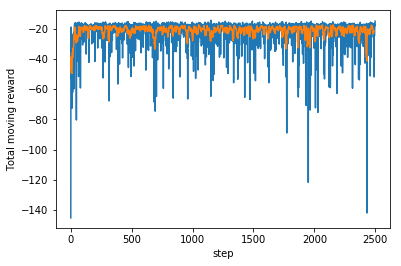

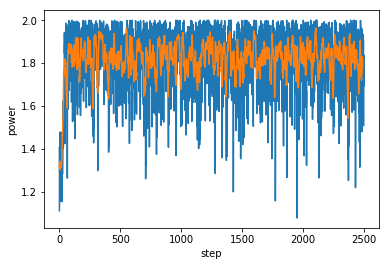

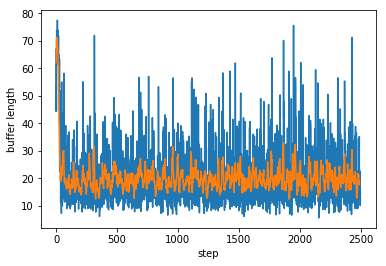

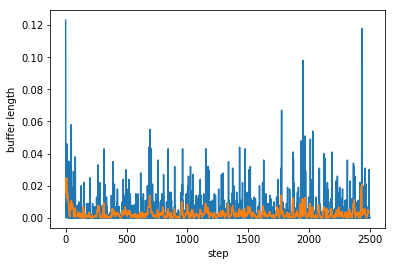

In [3]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

In [1]:
cur_init_ds_ep = env.reset()
    
cur_r_ep = np.zeros(len(user_list))
cur_p_ep = np.zeros(len(user_list))
cur_n_ep = np.zeros(len(user_list))
cur_ts_ep = np.zeros(len(user_list))
cur_rs_ep = np.zeros(len(user_list))
cur_ps_ep = np.zeros(len(user_list))
cur_ds_ep = np.zeros(len(user_list))
cur_ch_ep = np.zeros(len(user_list))
    
for j in range(1000):
    # first try to transmit from current state
    [cur_r, done, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
    cur_r_ep += cur_r
    cur_p_ep += cur_p
    cur_ts_ep += cur_ts
    cur_ps_ep += cur_ps
    cur_rs_ep += cur_rs
    cur_ds_ep += cur_ds
    cur_ch_ep += cur_ch
        
    print('%d:r:%f,p:%s,n:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (j, cur_r, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_init_ds_ep))
        
print('r:%f,p:%s,n:%s,tr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_n_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep))

NameError: name 'env' is not defined

In [3]:
graph = tf.get_default_graph()
inputs = graph.get_tensor_by_name("input_1"+":0")
scaled_out = graph.get_tensor_by_name("output_1"+":0")
print sess.run(scaled_out, feed_dict={inputs: [[7.22254768,2.3384,2.7784888e-05]]})

[[0.78826445 1.        ]]


In [2]:
res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit(False)
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])

0:r:-50.8910,p:1.4033,tr:1.4707,pr:1.3505,rev:2.9594,dbuf:72.5261,ch:0.00002568,ibuf:4
1:r:-57.9454,p:1.3913,tr:1.6529,pr:1.2218,rev:3.0360,dbuf:74.1439,ch:0.00002761,ibuf:30
2:r:-51.0844,p:1.1953,tr:1.5476,pr:1.2320,rev:2.8984,dbuf:73.1955,ch:0.00002990,ibuf:39
3:r:-18.2811,p:1.3469,tr:1.5860,pr:1.3673,rev:2.9762,dbuf:61.5868,ch:0.00002683,ibuf:35
4:r:-17.5547,p:1.2180,tr:1.7657,pr:1.2518,rev:3.0115,dbuf:55.9275,ch:0.00003238,ibuf:63
5:r:-55.6239,p:1.4116,tr:1.4240,pr:1.3390,rev:2.8791,dbuf:69.1011,ch:0.00002492,ibuf:48
6:r:-37.3900,p:1.2706,tr:1.3830,pr:1.5578,rev:3.0240,dbuf:59.5109,ch:0.00002915,ibuf:8
7:r:-32.6223,p:1.4738,tr:1.3452,pr:1.6902,rev:3.0674,dbuf:63.5657,ch:0.00002512,ibuf:71
8:r:-20.8140,p:1.2057,tr:1.4394,pr:1.5456,rev:3.0451,dbuf:49.6221,ch:0.00002902,ibuf:38
9:r:-19.3836,p:1.1973,tr:1.4459,pr:1.4838,rev:2.9358,dbuf:56.0717,ch:0.00002922,ibuf:86


In [3]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

MAX_EPISODE = 50
MAX_EPISODE_LEN = 1000

NUM_T = 1
NUM_R = 1
SIGMA2 = 0.3e-9

config = {'state_dim':3, 'action_dim':2};
train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                 'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                 'random_seed':1234}
user_config = [{'id':'1', 'rate':3, 'dis':100, 'action_bound':1, 
                'data_buf_size':100, 't_factor':0.9, 'penalty':1000}];

print user_config
# 0. initialize the session object
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
    
# 1. include all user in the system according to the user_config
user_list = [];
for info in user_config:
    info.update(config)
    user_list.append(MecTermLD(sess, info, train_config))
    print 'test'

# 2. create the simulation env
env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)
env.init_target_network()

res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])
sess.close()

[{'data_buf_size': 100, 'penalty': 1000, 'rate': 3, 'action_bound': 1, 'id': '1', 't_factor': 0.9, 'dis': 100}]
INFO:tensorflow:Restoring parameters from model/my_test_model
--Return--
None
> <ipython-input-3-a12846566f97>(30)<module>()
     29 graph = tf.get_default_graph()
---> 30 pdb.set_trace()
     31 

ipdb> graph
ipdb> graph.trainable_variables
*** AttributeError: 'Graph' object has no attribute 'trainable_variables'
ipdb> tf.trainable_variables()
[<tf.Variable 'fully_connected/weights:0' shape=(3, 400) dtype=float32_ref>, <tf.Variable 'fully_connected/BatchNorm/beta:0' shape=(400,) dtype=float32_ref>, <tf.Variable 'fully_connected_1/weights:0' shape=(3, 300) dtype=float32_ref>, <tf.Variable 'fully_connected_1/BatchNorm/beta:0' shape=(300,) dtype=float32_ref>, <tf.Variable 'fully_connected_2/weights:0' shape=(300, 2) dtype=float32_ref>, <tf.Variable 'fully_connected_2/biases:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'fully_connected_3/weights:0' shape=(3, 400) dtype=float32

BdbQuit: 

In [9]:
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
variable_names = [v.name for v in tf.trainable_variables()]
values = sess.run(variable_names)
print sess.run('fully_connected_2/weights:0')

INFO:tensorflow:Restoring parameters from model/my_test_model
[[0.1545126  0.15780352]
 [0.15616506 0.15971294]
 [0.06559879 0.09880391]
 [0.06487427 0.10064688]
 [0.15168335 0.16229852]
 [0.06257845 0.09748891]
 [0.06430701 0.09924787]
 [0.06548443 0.10012874]
 [0.15782878 0.15414344]
 [0.15429462 0.17596859]
 [0.05945097 0.0991616 ]
 [0.06383383 0.09632684]
 [0.06522399 0.10438306]
 [0.06095436 0.09916781]
 [0.06635379 0.0955418 ]
 [0.06379106 0.09433711]
 [0.06133086 0.09875894]
 [0.06503102 0.09639146]
 [0.15047684 0.17412661]
 [0.15663381 0.15740666]
 [0.17768952 0.15899988]
 [0.15730077 0.14491995]
 [0.05902164 0.10017106]
 [0.06845198 0.09686822]
 [0.15724926 0.14774598]
 [0.1529071  0.16426612]
 [0.1520101  0.15706535]
 [0.16091335 0.16260217]
 [0.15082897 0.16070077]
 [0.06310375 0.09398151]
 [0.06018374 0.10056869]
 [0.05968894 0.10066012]
 [0.15474424 0.16255529]
 [0.15111688 0.1622602 ]
 [0.0838669  0.18973866]
 [0.06870251 0.24295035]
 [0.06702217 0.10505467]
 [0.1529     

In [3]:
np.save('t_08/1', [1])